In [1]:
# IMPORTING NECCESSARY LIBRARIES 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import roc_curve, roc_auc_score

%matplotlib inline
sns.set_style("darkgrid")

In [2]:
# IMPORTING THE DATASET
df_loan = pd.read_csv('german_credit_data.csv', index_col=0)
df_loan.head()


Age     Sex  Job Housing Saving accounts Checking account  Credit amount  \
0   67    male    2     own             NaN           little           1169   
1   22  female    2     own          little         moderate           5951   
2   49    male    1     own          little              NaN           2096   
3   45    male    2    free          little           little           7882   
4   53    male    2    free          little           little           4870   

   Duration              Purpose  Risk  
0         6             radio/TV  good  
1        48             radio/TV   bad  
2        12            education  good  
3        42  furniture/equipment  good  
4        24                  car   bad

# Pre-processing

In [3]:
## Sex

df_loan["Sex"].value_counts()

male      690
female    310
Name: Sex, dtype: int64

In [4]:
#cross table for the 'Sex' feature
cross_sex = pd.crosstab(df_loan['Risk'], df_loan['Sex']).apply(lambda x: x/x.sum() * 100)
decimals = pd.Series([2,2], index=['Male', 'Female'])
cross_sex = cross_sex.round(2)
cross_sex_transposed = cross_sex.T
cross_sex_transposed

Risk      bad   good
Sex                 
female  35.16  64.84
male    27.68  72.32

In [5]:
## Performing OneHotEncoding

df_loan["Sex"] = df_loan["Sex"].apply(lambda x:1 if x=="male" else 0)
df_loan["Sex"].head()

0    1
1    0
2    1
3    1
4    1
Name: Sex, dtype: int64

In [6]:
## job

# Where; 0 - unskilled and non-resident, 1 - unskilled and resident, 2 - skilled, 3 - highly skilled
df_loan["Job"].head()

0    2
1    2
2    1
3    2
4    2
Name: Job, dtype: int64

In [7]:
## Housing

df_loan["Housing"].value_counts()

own     713
rent    179
free    108
Name: Housing, dtype: int64

In [8]:
#cross table for the 'housing' feature
cross_housing = pd.crosstab(df_loan['Risk'], df_loan['Housing']).apply(lambda x: x/x.sum() * 100)
cross_housing = cross_housing.round(2)
cross_housing_transposed = cross_housing.T
cross_housing_transposed

Risk       bad   good
Housing              
free     40.74  59.26
own      26.09  73.91
rent     39.11  60.89

In [9]:
## Performing OneHotEncoding
# 1- Own, 2- Rent, 0- Free

df_loan["Housing"].replace(["own", "rent", "free"], [1, 2, 0], inplace = True)
df_loan["Housing"].head()

0    1
1    1
2    1
3    0
4    0
Name: Housing, dtype: int64

In [10]:
## Purpose

df_loan["Purpose"].value_counts(normalize = True)

car                    0.337
radio/TV               0.280
furniture/equipment    0.181
business               0.097
education              0.059
repairs                0.022
domestic appliances    0.012
vacation/others        0.012
Name: Purpose, dtype: float64

In [11]:
df_loan["Purpose"].replace(["repairs", "radio/TV", "vacation/others"], "others", inplace = True)
df_loan["Purpose"].replace(["furniture/equipment", "domestic appliances"], "domestic equipments", inplace = True)

In [12]:
df_loan["Purpose"].value_counts(normalize= True)

car                    0.337
others                 0.314
domestic equipments    0.193
business               0.097
education              0.059
Name: Purpose, dtype: float64

In [13]:
#cross table for the 'Purpose' feature
cross_sex = pd.crosstab(df_loan['Risk'], df_loan['Purpose']).apply(lambda x: x/x.sum() * 100)
cross_sex = cross_sex.round(2)
cross_sex_transposed = cross_sex.T
cross_sex_transposed

Risk                   bad   good
Purpose                          
business             35.05  64.95
car                  31.45  68.55
domestic equipments  32.12  67.88
education            38.98  61.02
others               23.89  76.11

In [14]:
## Performing OneHotEncoding

df_loan["Purpose"].replace(["others", "business", "car", "domestic equipments", "education"], [0, 1, 2, 3, 4], inplace = True)
df_loan.head()

Age  Sex  Job  Housing Saving accounts Checking account  Credit amount  \
0   67    1    2        1             NaN           little           1169   
1   22    0    2        1          little         moderate           5951   
2   49    1    1        1          little              NaN           2096   
3   45    1    2        0          little           little           7882   
4   53    1    2        0          little           little           4870   

   Duration  Purpose  Risk  
0         6        0  good  
1        48        0   bad  
2        12        4  good  
3        42        3  good  
4        24        2   bad

In [15]:
## Saving Accounts

df_loan["Saving accounts"].value_counts(normalize= True)

little        0.738066
moderate      0.126071
quite rich    0.077111
rich          0.058752
Name: Saving accounts, dtype: float64

In [16]:
df_loan["Saving accounts"].fillna("None", inplace= True)
df_loan["Saving accounts"].value_counts(normalize= True)

little        0.603
None          0.183
moderate      0.103
quite rich    0.063
rich          0.048
Name: Saving accounts, dtype: float64

In [17]:
#cross table for the 'Saving accounts' feature
cross_sex = pd.crosstab(df_loan['Risk'], df_loan['Saving accounts']).apply(lambda x: x/x.sum() * 100)
cross_sex = cross_sex.round(2)
cross_sex_transposed = cross_sex.T
cross_sex_transposed

Risk               bad   good
Saving accounts              
None             17.49  82.51
little           35.99  64.01
moderate         33.01  66.99
quite rich       17.46  82.54
rich             12.50  87.50

In [18]:
## Performing OneHotEncoding

df_loan["Saving accounts"].replace(["little", "None", "moderate", "quite rich", "rich"], [1, 0, 2, 4, 3], inplace= True)
df_loan["Saving accounts"].head()

0    0
1    1
2    1
3    1
4    1
Name: Saving accounts, dtype: int64

In [19]:
## Checking Amount

df_loan["Checking account"].value_counts(normalize= True)

little      0.452145
moderate    0.443894
rich        0.103960
Name: Checking account, dtype: float64

In [20]:
df_loan["Checking account"].fillna("None", inplace= True)
df_loan["Checking account"].value_counts(normalize= True)

None        0.394
little      0.274
moderate    0.269
rich        0.063
Name: Checking account, dtype: float64

In [21]:
#cross table for the 'Sex' feature
cross_sex = pd.crosstab(df_loan['Risk'], df_loan['Checking account']).apply(lambda x: x/x.sum() * 100)
cross_sex = cross_sex.round(2)
cross_sex_transposed = cross_sex.T
cross_sex_transposed

Risk                bad   good
Checking account              
None              11.68  88.32
little            49.27  50.73
moderate          39.03  60.97
rich              22.22  77.78

In [22]:
## Performing OneHotEncoding

df_loan["Checking account"].replace(["little", "None", "moderate", "rich"], [1, 0, 2, 3], inplace= True)
df_loan["Checking account"].head()

0    1
1    2
2    0
3    1
4    1
Name: Checking account, dtype: int64

In [23]:
df_loan.head()

Age  Sex  Job  Housing  Saving accounts  Checking account  Credit amount  \
0   67    1    2        1                0                 1           1169   
1   22    0    2        1                1                 2           5951   
2   49    1    1        1                1                 0           2096   
3   45    1    2        0                1                 1           7882   
4   53    1    2        0                1                 1           4870   

   Duration  Purpose  Risk  
0         6        0  good  
1        48        0   bad  
2        12        4  good  
3        42        3  good  
4        24        2   bad

In [24]:
## Preprocessing the dependent variable - Risk

df_loan["Risk"].value_counts(normalize= True)

good    0.7
bad     0.3
Name: Risk, dtype: float64

In [25]:
## Encoding the dependent variable


df_loan["Risk_Status"] = df_loan["Risk"].apply(lambda x:1 if x == "bad" else 0)
df_loan["Risk_Status"].head()

0    0
1    1
2    0
3    0
4    1
Name: Risk_Status, dtype: int64

In [26]:
df_loan.head()

Age  Sex  Job  Housing  Saving accounts  Checking account  Credit amount  \
0   67    1    2        1                0                 1           1169   
1   22    0    2        1                1                 2           5951   
2   49    1    1        1                1                 0           2096   
3   45    1    2        0                1                 1           7882   
4   53    1    2        0                1                 1           4870   

   Duration  Purpose  Risk  Risk_Status  
0         6        0  good            0  
1        48        0   bad            1  
2        12        4  good            0  
3        42        3  good            0  
4        24        2   bad            1

In [27]:
df_loan.drop("Risk", axis = 1, inplace = True)
df_loan.head()

Age  Sex  Job  Housing  Saving accounts  Checking account  Credit amount  \
0   67    1    2        1                0                 1           1169   
1   22    0    2        1                1                 2           5951   
2   49    1    1        1                1                 0           2096   
3   45    1    2        0                1                 1           7882   
4   53    1    2        0                1                 1           4870   

   Duration  Purpose  Risk_Status  
0         6        0            0  
1        48        0            1  
2        12        4            0  
3        42        3            0  
4        24        2            1

## Scalling the dataset

In [28]:
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()

scaler.fit(df_loan.drop("Risk_Status", axis = 1)) 

scaled_features = scaler.transform(df_loan.drop("Risk_Status", axis = 1))

scaled_features

array([[ 2.76645648,  0.67028006,  0.14694918, ..., -0.74513141,
        -1.23647786, -1.24970871],
       [-1.19140394, -1.49191369,  0.14694918, ...,  0.94981679,
         2.24819436, -1.24970871],
       [ 1.18331231,  0.67028006, -1.38377145, ..., -0.41656241,
        -0.73866754,  1.90214175],
       ...,
       [ 0.21583532,  0.67028006,  0.14694918, ..., -0.87450324,
        -0.73866754, -1.24970871],
       [-1.10345149,  0.67028006,  0.14694918, ..., -0.50552769,
         1.9992892 , -1.24970871],
       [-0.75164167,  0.67028006,  0.14694918, ...,  0.46245715,
         1.9992892 ,  0.32621652]])

In [29]:
df_feat = pd.DataFrame(scaled_features, columns = df_loan.columns[:-1])

In [30]:
df_feat.head()

Age       Sex       Job   Housing  Saving accounts  Checking account  \
0  2.766456  0.670280  0.146949 -0.133710        -1.203212         -0.001045   
1 -1.191404 -1.491914  0.146949 -0.133710        -0.204696          1.044372   
2  1.183312  0.670280 -1.383771 -0.133710        -0.204696         -1.046463   
3  0.831502  0.670280  0.146949 -2.016956        -0.204696         -0.001045   
4  1.535122  0.670280  0.146949 -2.016956        -0.204696         -0.001045   

   Credit amount  Duration   Purpose  
0      -0.745131 -1.236478 -1.249709  
1       0.949817  2.248194 -1.249709  
2      -0.416562 -0.738668  1.902142  
3       1.634247  1.750384  1.114179  
4       0.566664  0.256953  0.326217

# Splitting the data

In [31]:
X = df_feat
y = df_loan["Risk_Status"]

In [32]:
X.head()

Age       Sex       Job   Housing  Saving accounts  Checking account  \
0  2.766456  0.670280  0.146949 -0.133710        -1.203212         -0.001045   
1 -1.191404 -1.491914  0.146949 -0.133710        -0.204696          1.044372   
2  1.183312  0.670280 -1.383771 -0.133710        -0.204696         -1.046463   
3  0.831502  0.670280  0.146949 -2.016956        -0.204696         -0.001045   
4  1.535122  0.670280  0.146949 -2.016956        -0.204696         -0.001045   

   Credit amount  Duration   Purpose  
0      -0.745131 -1.236478 -1.249709  
1       0.949817  2.248194 -1.249709  
2      -0.416562 -0.738668  1.902142  
3       1.634247  1.750384  1.114179  
4       0.566664  0.256953  0.326217

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 101)

In [35]:
X_train.shape

(700, 9)

In [36]:
y_train.shape

(700,)

# Building the models

## KNN model

In [37]:
knn = KNeighborsClassifier(n_neighbors=5, metric = "euclidean")

knn.fit(X_train, y_train)

pred = knn.predict(X_test)

### Evaluation of the KNN model

In [38]:
print(confusion_matrix(y_test, pred))
print("===========================================================")
print(classification_report(y_test, pred))

[[169  35]
 [ 60  36]]
              precision    recall  f1-score   support

           0       0.74      0.83      0.78       204
           1       0.51      0.38      0.43        96

    accuracy                           0.68       300
   macro avg       0.62      0.60      0.61       300
weighted avg       0.66      0.68      0.67       300



In [39]:
print(f"Train Accuracy : {knn.score(X_train, y_train):.3f}")
print(f"Test Accuracy : {knn.score(X_test, y_test):.3f}")

Train Accuracy : 0.796
Test Accuracy : 0.683


### Exploring the model using Grid search cv

In [40]:
knn_gs = KNeighborsClassifier()


In [41]:
parameters = {
    "n_neighbors": [2, 3, 21, 22],
    "metric": ["minkowski", "euclidean"],
    "weights": ["uniform", "distance"],
    "p": [1,2,3,4,5]
}


grid_search = GridSearchCV(estimator = knn_gs, 
                           param_grid = parameters, 
                           scoring = "accuracy", 
                           cv = 10)

In [42]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['minkowski', 'euclidean'],
                         'n_neighbors': [2, 3, 21, 22], 'p': [1, 2, 3, 4, 5],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [43]:
grid_search.best_params_

{'metric': 'minkowski', 'n_neighbors': 21, 'p': 1, 'weights': 'distance'}

In [44]:
accuracy = grid_search.best_score_
accuracy

0.7228571428571429

In [45]:
knn_model = KNeighborsClassifier(n_neighbors = 21, p = 2, weights = "uniform")

In [46]:
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=21)

In [47]:
print(f"Train Accuracy : {knn_model.score(X_train, y_train):.3f}")
print(f"Test Accuracy : {knn_model.score(X_test, y_test):.3f}")

Train Accuracy : 0.734
Test Accuracy : 0.720


In [48]:
pred = knn_model.predict(X_test)

print(confusion_matrix(y_test, pred))
print("===========================================================")
print(classification_report(y_test, pred))

[[194  10]
 [ 74  22]]
              precision    recall  f1-score   support

           0       0.72      0.95      0.82       204
           1       0.69      0.23      0.34        96

    accuracy                           0.72       300
   macro avg       0.71      0.59      0.58       300
weighted avg       0.71      0.72      0.67       300



In [49]:
cv = ShuffleSplit(test_size =0.2, random_state = 101)

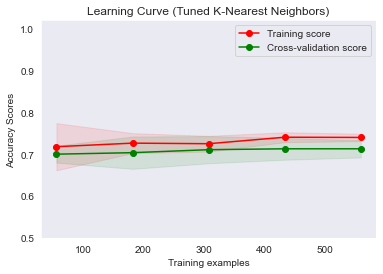

In [50]:
### Learning Curve

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Accuracy Scores")
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    plt.grid()
    
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, 
                     alpha=0.1,color="r")
    
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, 
                     alpha=0.1, color="g")
    
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

X, y = X_train, y_train

title = "Learning Curve (Tuned K-Nearest Neighbors)"
cv = ShuffleSplit(test_size=0.2, random_state=0)

plot_learning_curve(knn_model, title, X, y, ylim=(0.5, 1.02), cv=cv, n_jobs=4)


plt.show()

# Logistic Regression

In [51]:
logmode = LogisticRegression()

In [52]:
logmode.fit(X_train, y_train)

LogisticRegression()

In [53]:
predictions = logmode.predict(X_test)

In [54]:
logmode.intercept_, logmode.coef_

(array([-0.99458002]),
 array([[-0.12497212, -0.12630405,  0.0728758 ,  0.15995021,  0.02037077,
          0.43865427, -0.08121654,  0.5275504 ,  0.24002978]]))

**** Evaluation of the data

In [55]:
print(f"Train Accuracy : {logmode.score(X_train, y_train):.3f}")
print(f"Test Accuracy : {logmode.score(X_test, y_test):.3f}")

Train Accuracy : 0.707
Test Accuracy : 0.700


In [56]:
confusion_matrix(y_test, predictions)

array([[193,  11],
       [ 79,  17]], dtype=int64)

In [57]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.71      0.95      0.81       204
           1       0.61      0.18      0.27        96

    accuracy                           0.70       300
   macro avg       0.66      0.56      0.54       300
weighted avg       0.68      0.70      0.64       300



### Best Parameter

In [58]:
log_gs = LogisticRegression()

In [59]:
parameter = {
    "C": np.logspace(-4, 4, 20), 
    "penalty": ["l1", "l2", 'elasticnet'], ## L1- Lasso, L2- Ridge
    "solver": ["newton-cg", "lbfgs", "liblinear", "sag", "saga"], 
    "max_iter": [100, 10]
}

In [60]:
grid_search = GridSearchCV(log_gs, parameter, scoring = "accuracy",cv = 10, verbose = True, n_jobs = 1)


In [61]:
grid_search.fit(X_train, y_train)

Fitting 10 folds for each of 600 candidates, totalling 6000 fits


C:\Users\USR\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\USR\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\USR\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\USR\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\USR\anaconda3\lib\site-packages\sklearn\model_selection\_validat

C:\Users\USR\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\USR\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\USR\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\USR\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\USR\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py

C:\Users\USR\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\USR\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\USR\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\USR\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\USR\anaconda3\lib\site-packages\sklearn\model_selection\

C:\Users\USR\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\USR\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\USR\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1314, in fit
    raise ValueError("l1_ratio must be between 0 and 1;"
ValueError: l1_ratio must be between 0 and 1; got (l1_ratio=None)

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\USR\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\USR\anaconda3\lib\s

C:\Users\USR\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\USR\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\USR\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\USR\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\USR\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py

C:\Users\USR\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\USR\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\USR\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\USR\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\USR\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef

C:\Users\USR\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\USR\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\USR\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\USR\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\USR\anaconda3\lib\site-packages\sklearn\model_selection\_val

C:\Users\USR\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\USR\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\USR\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\USR\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\USR\anaconda3\lib\site-packages\sklearn\model_selection\_validat

C:\Users\USR\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\USR\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\USR\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\USR\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\USR\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py

C:\Users\USR\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\USR\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\USR\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\USR\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\USR\anaconda3\lib\site-packages\sklearn\model_selection\

C:\Users\USR\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\USR\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\USR\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1314, in fit
    raise ValueError("l1_ratio must be between 0 and 1;"
ValueError: l1_ratio must be between 0 and 1; got (l1_ratio=None)

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\USR\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\USR\anaconda3\lib\s

C:\Users\USR\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\USR\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\USR\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\USR\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\USR\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py

C:\Users\USR\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\USR\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\USR\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\USR\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\USR\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef

C:\Users\USR\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\USR\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\USR\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\USR\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\USR\anaconda3\lib\site-packages\sklearn\model_selection\_val

C:\Users\USR\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\USR\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\USR\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\USR\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\USR\anaconda3\lib\site-packages\sklearn\model_selection\_validat

C:\Users\USR\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\USR\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\USR\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\USR\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\USR\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py

C:\Users\USR\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\USR\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\USR\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\USR\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\USR\anaconda3\lib\site-packages\sklearn\model_selection\

C:\Users\USR\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\USR\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\USR\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1314, in fit
    raise ValueError("l1_ratio must be between 0 and 1;"
ValueError: l1_ratio must be between 0 and 1; got (l1_ratio=None)

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\USR\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\USR\anaconda3\lib\s

C:\Users\USR\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\USR\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\USR\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\USR\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\USR\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py

C:\Users\USR\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\USR\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\USR\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\USR\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\USR\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef

C:\Users\USR\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\USR\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\USR\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\USR\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\USR\anaconda3\lib\site-packages\sklearn\model_selection\_val

C:\Users\USR\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\USR\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\USR\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\USR\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\USR\anaconda3\lib\site-packages\sklearn\model_selection\_validat

C:\Users\USR\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\USR\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\USR\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\USR\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\USR\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py

C:\Users\USR\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\USR\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\USR\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\USR\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\USR\anaconda3\lib\site-packages\sklearn\model_selection\

C:\Users\USR\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\USR\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\USR\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1314, in fit
    raise ValueError("l1_ratio must be between 0 and 1;"
ValueError: l1_ratio must be between 0 and 1; got (l1_ratio=None)

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\USR\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\USR\anaconda3\lib\s

C:\Users\USR\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\USR\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\USR\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\USR\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\USR\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py

C:\Users\USR\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\USR\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\USR\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\USR\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\USR\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef

C:\Users\USR\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\USR\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\USR\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\USR\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\USR\anaconda3\lib\site-packages\sklearn\model_selection\_val

C:\Users\USR\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\USR\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\USR\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\USR\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\USR\anaconda3\lib\site-packages\sklearn\model_selection\_validat

C:\Users\USR\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\USR\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\USR\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\USR\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\USR\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py

C:\Users\USR\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\USR\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\USR\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\USR\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\USR\anaconda3\lib\site-packages\sklearn\model_selection\

C:\Users\USR\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\USR\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\USR\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1314, in fit
    raise ValueError("l1_ratio must be between 0 and 1;"
ValueError: l1_ratio must be between 0 and 1; got (l1_ratio=None)

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\USR\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\USR\anaconda3\lib\s

C:\Users\USR\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\USR\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\USR\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\USR\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\USR\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py

C:\Users\USR\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\USR\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\USR\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\USR\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\USR\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef

C:\Users\USR\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\USR\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\USR\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\USR\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 450, in _check_solver
    raise ValueError("Only 'saga' solver supports elasticnet penalty,"
ValueError: Only 'saga' solver supports elasticnet penalty, got solver=liblinear.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\USR\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py

C:\Users\USR\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\USR\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\USR\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\USR\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\USR\anaconda3\lib\site-packages\sklearn\model_selection\_validation.

C:\Users\USR\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\USR\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\USR\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\USR\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\USR\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py

C:\Users\USR\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\USR\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\USR\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1314, in fit
    raise ValueError("l1_ratio must be between 0 and 1;"
ValueError: l1_ratio must be between 0 and 1; got (l1_ratio=None)

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\USR\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\USR\anaconda3\lib\s

C:\Users\USR\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\USR\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\USR\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\USR\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\USR\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py

C:\Users\USR\anaconda3\lib\site-packages\sklearn\utils\optimize.py:202: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn("newton-cg failed to converge. Increase the "
C:\Users\USR\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\USR\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\USR\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\USR\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the 

C:\Users\USR\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\USR\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\USR\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\USR\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\USR\anaconda3\lib\site-packages\sklearn\model_selection\_val

C:\Users\USR\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\USR\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\USR\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\USR\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\USR\anaconda3\lib\site-packages\sklearn\model_selection\_validat

C:\Users\USR\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\USR\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\USR\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\USR\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\USR\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py

C:\Users\USR\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\USR\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\USR\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\USR\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\USR\anaconda3\lib\site-packages\sklearn\model_selection\

C:\Users\USR\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\USR\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\USR\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1314, in fit
    raise ValueError("l1_ratio must be between 0 and 1;"
ValueError: l1_ratio must be between 0 and 1; got (l1_ratio=None)

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\USR\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\USR\anaconda3\lib\s

C:\Users\USR\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\USR\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\USR\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\USR\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\USR\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py

C:\Users\USR\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\USR\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\USR\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\USR\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\USR\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef

C:\Users\USR\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\USR\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\USR\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\USR\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\USR\anaconda3\lib\site-packages\sklearn\model_selection\_val

C:\Users\USR\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\USR\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\USR\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\USR\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\USR\anaconda3\lib\site-packages\sklearn\model_selection\_validation.

C:\Users\USR\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\USR\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\USR\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\USR\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\USR\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py

C:\Users\USR\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\USR\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\USR\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\USR\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\USR\anaconda3\lib\site-packages\sklearn\model_selection\

C:\Users\USR\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\USR\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\USR\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1314, in fit
    raise ValueError("l1_ratio must be between 0 and 1;"
ValueError: l1_ratio must be between 0 and 1; got (l1_ratio=None)

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\USR\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\USR\anaconda3\lib\s

C:\Users\USR\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\USR\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\USR\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\USR\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\USR\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py

C:\Users\USR\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\USR\anaconda3\lib\site-packages\sklearn\utils\optimize.py:202: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn("newton-cg failed to converge. Increase the "
C:\Users\USR\anaconda3\lib\site-packages\sklearn\utils\optimize.py:202: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn("newton-cg failed to converge. Increase the "
C:\Users\USR\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the 

C:\Users\USR\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\USR\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\USR\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\USR\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\USR\anaconda3\lib\site-packages\sklearn\model_selection\_val

C:\Users\USR\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\USR\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\USR\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\USR\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\USR\anaconda3\lib\site-packages\sklearn\model_selection\_validat

C:\Users\USR\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\USR\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\USR\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\USR\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\USR\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py

C:\Users\USR\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\USR\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\USR\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\USR\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\USR\anaconda3\lib\site-packages\sklearn\model_selection\

C:\Users\USR\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\USR\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\USR\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1314, in fit
    raise ValueError("l1_ratio must be between 0 and 1;"
ValueError: l1_ratio must be between 0 and 1; got (l1_ratio=None)

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\USR\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\USR\anaconda3\lib\s

C:\Users\USR\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\USR\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\USR\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\USR\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\USR\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver

C:\Users\USR\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\USR\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\USR\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\USR\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\USR\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef

C:\Users\USR\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\USR\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\USR\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\USR\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\USR\anaconda3\lib\site-packages\sklearn\model_selection\_val

C:\Users\USR\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\USR\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\USR\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\USR\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\USR\anaconda3\lib\site-packages\sklearn\model_selection\_validat

C:\Users\USR\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\USR\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\USR\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\USR\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\USR\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py

C:\Users\USR\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\USR\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\USR\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\USR\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\USR\anaconda3\lib\site-packages\sklearn\model_selection\

C:\Users\USR\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\USR\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\USR\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1314, in fit
    raise ValueError("l1_ratio must be between 0 and 1;"
ValueError: l1_ratio must be between 0 and 1; got (l1_ratio=None)

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\USR\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\USR\anaconda3\lib\s

C:\Users\USR\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\USR\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\USR\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\USR\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\USR\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partit

C:\Users\USR\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\USR\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\USR\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\USR\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\USR\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef

C:\Users\USR\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\USR\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\USR\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\USR\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\USR\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef

C:\Users\USR\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\USR\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\USR\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\USR\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\USR\anaconda3\lib\site-packages\sklearn\model_selection\

C:\Users\USR\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\USR\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\USR\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\USR\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\USR\anaconda3\lib\site-packages\sklearn\model_selection\_validat

C:\Users\USR\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\USR\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\USR\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\USR\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\USR\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py

C:\Users\USR\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\USR\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\USR\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\USR\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\USR\anaconda3\lib\site-packages\sklearn\model_selection\

C:\Users\USR\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\USR\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\USR\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1314, in fit
    raise ValueError("l1_ratio must be between 0 and 1;"
ValueError: l1_ratio must be between 0 and 1; got (l1_ratio=None)

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\USR\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\USR\anaconda3\lib\s

C:\Users\USR\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\USR\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\USR\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\USR\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\USR\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnin

C:\Users\USR\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\USR\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\USR\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\USR\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\USR\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef

C:\Users\USR\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\USR\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\USR\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\USR\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\USR\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef

C:\Users\USR\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\USR\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\USR\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\USR\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\USR\anaconda3\lib\site-packages\sklearn\model_selection\_val

C:\Users\USR\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\USR\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\USR\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\USR\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\USR\anaconda3\lib\site-packages\sklearn\model_selection\_validat

C:\Users\USR\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\USR\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\USR\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\USR\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\USR\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py

C:\Users\USR\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\USR\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\USR\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\USR\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\USR\anaconda3\lib\site-packages\sklearn\model_selection\

C:\Users\USR\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\USR\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\USR\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1314, in fit
    raise ValueError("l1_ratio must be between 0 and 1;"
ValueError: l1_ratio must be between 0 and 1; got (l1_ratio=None)

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\USR\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\USR\anaconda3\lib\s

C:\Users\USR\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\USR\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\USR\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\USR\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\USR\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnin

C:\Users\USR\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\USR\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\USR\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\USR\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\USR\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef

C:\Users\USR\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\USR\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\USR\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\USR\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\USR\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef

C:\Users\USR\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\USR\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\USR\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\USR\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\USR\anaconda3\lib\site-packages\sklearn\model_selection\_val

C:\Users\USR\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\USR\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\USR\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\USR\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\USR\anaconda3\lib\site-packages\sklearn\model_selection\_validat

C:\Users\USR\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\USR\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\USR\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\USR\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\USR\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py

C:\Users\USR\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\USR\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\USR\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\USR\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\USR\anaconda3\lib\site-packages\sklearn\model_selection\

C:\Users\USR\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\USR\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\USR\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1314, in fit
    raise ValueError("l1_ratio must be between 0 and 1;"
ValueError: l1_ratio must be between 0 and 1; got (l1_ratio=None)

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\USR\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\USR\anaconda3\lib\s

C:\Users\USR\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\USR\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\USR\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\USR\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\USR\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnin

C:\Users\USR\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\USR\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\USR\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\USR\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\USR\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef

C:\Users\USR\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\USR\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\USR\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\USR\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\USR\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef

C:\Users\USR\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\USR\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\USR\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\USR\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\USR\anaconda3\lib\site-packages\sklearn\model_selection\_val

C:\Users\USR\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\USR\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\USR\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\USR\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\USR\anaconda3\lib\site-packages\sklearn\model_selection\_validation.

C:\Users\USR\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\USR\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\USR\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\USR\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\USR\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py

C:\Users\USR\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\USR\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\USR\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\USR\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\USR\anaconda3\lib\site-packages\sklearn\model_selection\

C:\Users\USR\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\USR\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\USR\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1314, in fit
    raise ValueError("l1_ratio must be between 0 and 1;"
ValueError: l1_ratio must be between 0 and 1; got (l1_ratio=None)

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\USR\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\USR\anaconda3\lib\s

C:\Users\USR\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\USR\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\USR\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\USR\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\USR\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnin

C:\Users\USR\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\USR\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\USR\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\USR\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\USR\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef

C:\Users\USR\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\USR\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\USR\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\USR\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\USR\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef

C:\Users\USR\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\USR\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\USR\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\USR\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\USR\anaconda3\lib\site-packages\sklearn\model_selection\_val

C:\Users\USR\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\USR\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\USR\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\USR\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\USR\anaconda3\lib\site-packages\sklearn\model_selection\_validat

C:\Users\USR\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\USR\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\USR\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\USR\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\USR\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py

C:\Users\USR\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\USR\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\USR\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\USR\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\USR\anaconda3\lib\site-packages\sklearn\model_selection\

C:\Users\USR\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\USR\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\USR\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1314, in fit
    raise ValueError("l1_ratio must be between 0 and 1;"
ValueError: l1_ratio must be between 0 and 1; got (l1_ratio=None)

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\USR\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\USR\anaconda3\lib\s

C:\Users\USR\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\USR\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\USR\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\USR\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\USR\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnin

C:\Users\USR\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\USR\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\USR\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\USR\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\USR\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef

C:\Users\USR\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\USR\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\USR\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\USR\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\USR\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef

C:\Users\USR\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\USR\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\USR\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\USR\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\USR\anaconda3\lib\site-packages\sklearn\model_selection\_val

C:\Users\USR\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\USR\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\USR\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\USR\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\USR\anaconda3\lib\site-packages\sklearn\model_selection\_validat

C:\Users\USR\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\USR\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\USR\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\USR\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\USR\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py

C:\Users\USR\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\USR\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\USR\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\USR\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\USR\anaconda3\lib\site-packages\sklearn\model_selection\

C:\Users\USR\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\USR\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\USR\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1314, in fit
    raise ValueError("l1_ratio must be between 0 and 1;"
ValueError: l1_ratio must be between 0 and 1; got (l1_ratio=None)

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\USR\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\USR\anaconda3\lib\s

C:\Users\USR\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\USR\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\USR\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\USR\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\USR\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partit

C:\Users\USR\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\USR\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\USR\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\USR\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\USR\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef

C:\Users\USR\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\USR\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\USR\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\USR\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\USR\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef

C:\Users\USR\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\USR\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\USR\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\USR\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\USR\anaconda3\lib\site-packages\sklearn\model_selection\_val

C:\Users\USR\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\USR\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\USR\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\USR\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\USR\anaconda3\lib\site-packages\sklearn\model_selection\_validat

C:\Users\USR\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\USR\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\USR\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\USR\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\USR\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py

C:\Users\USR\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\USR\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\USR\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\USR\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\USR\anaconda3\lib\site-packages\sklearn\model_selection\

C:\Users\USR\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\USR\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\USR\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1314, in fit
    raise ValueError("l1_ratio must be between 0 and 1;"
ValueError: l1_ratio must be between 0 and 1; got (l1_ratio=None)

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\USR\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\USR\anaconda3\lib\s

C:\Users\USR\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\USR\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\USR\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\USR\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\USR\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnin

C:\Users\USR\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\USR\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\USR\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\USR\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\USR\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef

C:\Users\USR\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\USR\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\USR\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\USR\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\USR\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef

C:\Users\USR\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\USR\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\USR\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\USR\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\USR\anaconda3\lib\site-packages\sklearn\model_selection\_val

C:\Users\USR\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\USR\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\USR\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\USR\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\USR\anaconda3\lib\site-packages\sklearn\model_selection\_validat

C:\Users\USR\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\USR\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\USR\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\USR\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\USR\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py

C:\Users\USR\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\USR\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\USR\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\USR\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\USR\anaconda3\lib\site-packages\sklearn\model_selection\

C:\Users\USR\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\USR\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\USR\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1314, in fit
    raise ValueError("l1_ratio must be between 0 and 1;"
ValueError: l1_ratio must be between 0 and 1; got (l1_ratio=None)

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\USR\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\USR\anaconda3\lib\s

C:\Users\USR\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\USR\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\USR\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\USR\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\USR\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
  

C:\Users\USR\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\USR\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\USR\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\USR\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\USR\anaconda3\lib\site-packages\sklearn\utils\optimize.py:202: ConvergenceWarning: newton-cg failed to converge. Increase the numbe

C:\Users\USR\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\USR\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\USR\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\USR\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\USR\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef

C:\Users\USR\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\USR\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\USR\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\USR\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\USR\anaconda3\lib\site-packages\sklearn\model_selection\_val

C:\Users\USR\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\USR\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\USR\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\USR\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\USR\anaconda3\lib\site-packages\sklearn\model_selection\_validation.

C:\Users\USR\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\USR\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\USR\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\USR\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\USR\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py

C:\Users\USR\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\USR\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\USR\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1314, in fit
    raise ValueError("l1_ratio must be between 0 and 1;"
ValueError: l1_ratio must be between 0 and 1; got (l1_ratio=None)

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\USR\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\USR\anaconda3\lib\s

C:\Users\USR\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\USR\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\USR\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\USR\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\USR\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnin

C:\Users\USR\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\USR\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\USR\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\USR\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\USR\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef

C:\Users\USR\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\USR\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\USR\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\USR\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\USR\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef

C:\Users\USR\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\USR\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\USR\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\USR\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\USR\anaconda3\lib\site-packages\sklearn\model_selection\_val

C:\Users\USR\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\USR\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\USR\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\USR\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\USR\anaconda3\lib\site-packages\sklearn\model_selection\_validat

C:\Users\USR\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\USR\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\USR\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\USR\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\USR\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py

C:\Users\USR\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\USR\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\USR\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\USR\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\USR\anaconda3\lib\site-packages\sklearn\model_selection\

C:\Users\USR\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\USR\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\USR\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1314, in fit
    raise ValueError("l1_ratio must be between 0 and 1;"
ValueError: l1_ratio must be between 0 and 1; got (l1_ratio=None)

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\USR\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\USR\anaconda3\lib\s

C:\Users\USR\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\USR\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\USR\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\USR\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\USR\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partit

C:\Users\USR\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\USR\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\USR\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\USR\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\USR\anaconda3\lib\site-packages\sklearn\utils\optimize.py:202: ConvergenceWarning: newton-cg failed to converge. Increase the numbe

C:\Users\USR\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\USR\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\USR\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\USR\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\USR\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef

C:\Users\USR\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\USR\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\USR\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\USR\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\USR\anaconda3\lib\site-packages\sklearn\model_selection\_val

C:\Users\USR\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [       nan        nan 0.70857143        nan 0.70857143 0.70857143
 0.70857143 0.70285714 0.70857143 0.70857143        nan        nan
        nan        nan        nan        nan        nan 0.70857143
        nan 0.70857143 0.70857143 0.70857143 0.70285714 0.70857143
 0.70857143        nan        nan        nan        nan        nan
        nan        nan 0.70857143        nan 0.70857143 0.70857143
 0.70857143 0.70285714 0.70857143 0.70857143        nan        nan
        nan        nan        nan        nan        nan 0.70857143
        nan 0.70857143 0.70857143 0.70857143 0.70285714 0.70857143
 0.70857143        nan        nan        nan        nan        nan
        nan        nan 0.70857143        nan 0.70857143 0.70857143
 0.70857143 0.70142857 0.70857143 0.70857143        nan        nan
        nan        nan        nan        nan        nan

GridSearchCV(cv=10, estimator=LogisticRegression(), n_jobs=1,
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'max_iter': [100, 10],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy', verbose=True)

In [62]:
print(grid_search.best_params_)

{'C': 0.012742749857031334, 'max_iter': 100, 'penalty': 'l2', 'solver': 'newton-cg'}


In [63]:
accuracy = grid_search.best_score_
accuracy

0.7157142857142857

In [64]:
grid_search.best_estimator_

LogisticRegression(C=0.012742749857031334, solver='newton-cg')

In [65]:
log_model = LogisticRegression(C = 0.004832930238571752, solver='liblinear', max_iter = 100)

In [66]:
log_model.fit(X_train, y_train)

LogisticRegression(C=0.004832930238571752, solver='liblinear')

In [67]:
print(f"Train Accuracy : {log_model.score(X_train, y_train):.3f}")
print(f"Test Accuracy : {log_model.score(X_test, y_test):.3f}")

Train Accuracy : 0.706
Test Accuracy : 0.703


In [68]:
pred = log_model.predict(X_test)

print(confusion_matrix(y_test, pred))
print("===========================================================")
print(classification_report(y_test, pred))

[[195   9]
 [ 80  16]]
              precision    recall  f1-score   support

           0       0.71      0.96      0.81       204
           1       0.64      0.17      0.26        96

    accuracy                           0.70       300
   macro avg       0.67      0.56      0.54       300
weighted avg       0.69      0.70      0.64       300



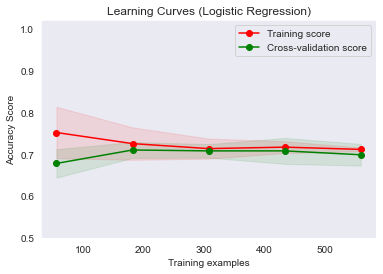

In [69]:
### Learning Curve
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Accuracy Score")
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    plt.grid()
    
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, 
                     alpha=0.1,color="r")
    
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, 
                     alpha=0.1, color="g")
    
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt


X, y = X_train, y_train


title = "Learning Curves (Logistic Regression)"
cv = ShuffleSplit(test_size=0.2, random_state=0)

estimator = LogisticRegression()
plot_learning_curve(estimator, title, X, y, ylim=(0.5, 1.02), cv=cv, n_jobs=4)

plt.show()

# Naive bayes

In [70]:
naive_bayes = GaussianNB()

In [71]:
naive_bayes.fit(X_train, y_train)

GaussianNB()

In [72]:
pred = naive_bayes.predict(X_test)

In [73]:
print(f"Train Accuracy : {naive_bayes.score(X_train, y_train):.3f}")
print(f"Test Accuracy : {naive_bayes.score(X_test, y_test):.3f}")

Train Accuracy : 0.719
Test Accuracy : 0.717


In [74]:
accuracy_score(y_test, pred)

0.7166666666666667

In [75]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, pred)

array([[182,  22],
       [ 63,  33]], dtype=int64)

In [76]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.74      0.89      0.81       204
           1       0.60      0.34      0.44        96

    accuracy                           0.72       300
   macro avg       0.67      0.62      0.62       300
weighted avg       0.70      0.72      0.69       300



### Best Parameter

In [77]:
nb_gs = GaussianNB()


In [78]:
parameters = {
    "var_smoothing": np.logspace(0, -9, num = 100), 
}


grid_search = GridSearchCV(estimator = nb_gs, 
                           param_grid = parameters, 
                           scoring = "accuracy", 
                           cv = 10, 
                           n_jobs = -1)

In [79]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=GaussianNB(), n_jobs=-1,
             param_grid={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5.33669923e-02, 4.32876128e-02,
       3.51119173e-02, 2.848035...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])},
             scoring='accuracy')

In [80]:
nb_gs.get_params().keys()

dict_keys(['priors', 'var_smoothing'])

In [81]:
grid_search.best_params_

{'var_smoothing': 1.0}

In [82]:
accuracy = grid_search.best_score_
accuracy

0.7257142857142858

In [83]:
grid_search.best_estimator_

GaussianNB(var_smoothing=1.0)

In [84]:
nb_model = GaussianNB(var_smoothing = 8.111308307896873e-06)

In [85]:
nb_model.fit(X_train, y_train)

GaussianNB(var_smoothing=8.111308307896873e-06)

In [86]:
print(f"Train Accuracy : {nb_model.score(X_train, y_train):.3f}")
print(f"Test Accuracy : {nb_model.score(X_test, y_test):.3f}")

Train Accuracy : 0.719
Test Accuracy : 0.717


In [87]:
pred = nb_model.predict(X_test)

print(confusion_matrix(y_test, pred))
print("===========================================================")
print(classification_report(y_test, pred))

[[182  22]
 [ 63  33]]
              precision    recall  f1-score   support

           0       0.74      0.89      0.81       204
           1       0.60      0.34      0.44        96

    accuracy                           0.72       300
   macro avg       0.67      0.62      0.62       300
weighted avg       0.70      0.72      0.69       300



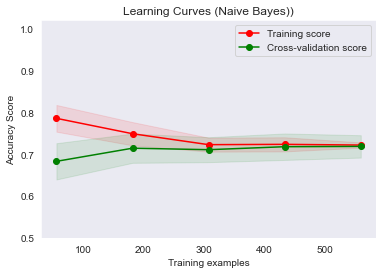

In [88]:
### Learning Curve

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Accuracy Score")
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    plt.grid()
    
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, 
                     alpha=0.1,color="r")
    
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, 
                     alpha=0.1, color="g")
    
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt


X, y = X_train, y_train


title = "Learning Curves (Naive Bayes))"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(test_size=0.2, random_state=0)

estimator = GaussianNB()
plot_learning_curve(estimator, title, X, y, ylim=(0.5, 1.02), cv=cv, n_jobs=4)

plt.show()

# Support Vector Machines

In [89]:
svc_classifier = SVC()
svc_classifier.fit(X_train, y_train)

SVC()

In [90]:
y_pred = svc_classifier.predict(X_test)

In [91]:
confusion_matrix(y_test, y_pred)

array([[194,  10],
       [ 78,  18]], dtype=int64)

In [92]:
print(f"Train Accuracy : {svc_classifier.score(X_train, y_train):.3f}")
print(f"Test Accuracy : {svc_classifier.score(X_test, y_test):.3f}")

Train Accuracy : 0.781
Test Accuracy : 0.707


In [93]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.95      0.82       204
           1       0.64      0.19      0.29        96

    accuracy                           0.71       300
   macro avg       0.68      0.57      0.55       300
weighted avg       0.69      0.71      0.65       300



### Best Parameter

In [94]:
svm_gs = SVC()


In [95]:
parameters = {
    'kernel': ['rbf','poly'], 
    'degree': [1, 2, 3, 4, 5, 6, 7]
}


grid_search = GridSearchCV(estimator = svm_gs, 
                           param_grid = parameters, 
                           scoring = "accuracy", 
                           cv = 5, 
                           n_jobs = -1)

In [96]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'degree': [1, 2, 3, 4, 5, 6, 7],
                         'kernel': ['rbf', 'poly']},
             scoring='accuracy')

In [97]:
grid_search.best_params_

{'degree': 2, 'kernel': 'poly'}

In [98]:
accuracy = grid_search.best_score_
accuracy

0.7142857142857143

In [99]:
grid_search.best_estimator_

SVC(degree=2, kernel='poly')

In [100]:
svm_model = SVC(degree=6, kernel='poly')

In [101]:
svm_model.fit(X_train, y_train)

SVC(degree=6, kernel='poly')

In [102]:
print(f"Train Accuracy : {svm_model.score(X_train, y_train):.3f}")
print(f"Test Accuracy : {svm_model.score(X_test, y_test):.3f}")

Train Accuracy : 0.829
Test Accuracy : 0.693


In [103]:
pred = svm_model.predict(X_test)

print(confusion_matrix(y_test, pred))
print("===========================================================")
print(classification_report(y_test, pred))

[[192  12]
 [ 80  16]]
              precision    recall  f1-score   support

           0       0.71      0.94      0.81       204
           1       0.57      0.17      0.26        96

    accuracy                           0.69       300
   macro avg       0.64      0.55      0.53       300
weighted avg       0.66      0.69      0.63       300



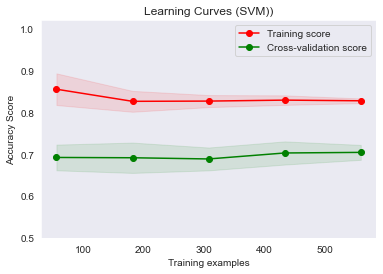

In [104]:
### Learning Curve

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit



def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Accuracy Score")
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    plt.grid()
    
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, 
                     alpha=0.1,color="r")
    
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, 
                     alpha=0.1, color="g")
    
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt


X, y = X_train, y_train


title = "Learning Curves (SVM))"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(test_size=0.2, random_state=0)

estimator = svm_model
plot_learning_curve(estimator, title, X, y, ylim=(0.5, 1.02), cv=cv, n_jobs=4)

plt.show()

# Decision Trees

In [105]:
dtree = DecisionTreeClassifier()

In [106]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

In [107]:
pred = dtree.predict(X_test)

In [108]:
print(f"Train Accuracy : {dtree.score(X_train, y_train):.3f}")
print(f"Test Accuracy : {dtree.score(X_test, y_test):.3f}")

Train Accuracy : 1.000
Test Accuracy : 0.667


In [109]:
print(confusion_matrix(y_test, pred))
print("===========================================================")
print(classification_report(y_test, pred))

[[156  48]
 [ 52  44]]
              precision    recall  f1-score   support

           0       0.75      0.76      0.76       204
           1       0.48      0.46      0.47        96

    accuracy                           0.67       300
   macro avg       0.61      0.61      0.61       300
weighted avg       0.66      0.67      0.66       300



### Best Parameter

In [110]:
dtree_gs = DecisionTreeClassifier()


In [111]:
parameters = {
    'criterion': ['gini','entropy'], 
    'min_samples_split': [2 ,4 ,6 ,8 ,10 ,15]
}


grid_search = GridSearchCV(estimator = dtree_gs, 
                           param_grid = parameters, 
                           scoring = "accuracy", 
                           cv = 5, 
                           n_jobs = -1)

In [112]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'min_samples_split': [2, 4, 6, 8, 10, 15]},
             scoring='accuracy')

In [113]:
grid_search.best_params_

{'criterion': 'gini', 'min_samples_split': 8}

In [114]:
accuracy = grid_search.best_score_
accuracy

0.7185714285714286

In [115]:
grid_search.best_estimator_

DecisionTreeClassifier(min_samples_split=8)

In [116]:
dtree_model = DecisionTreeClassifier(min_samples_split=15)

In [117]:
dtree_model.fit(X_train, y_train)

DecisionTreeClassifier(min_samples_split=15)

In [118]:
print(f"Train Accuracy : {dtree_model.score(X_train, y_train):.3f}")
print(f"Test Accuracy : {dtree_model.score(X_test, y_test):.3f}")

Train Accuracy : 0.874
Test Accuracy : 0.703


In [119]:
pred = dtree_model.predict(X_test)

print(confusion_matrix(y_test, pred))
print("===========================================================")
print(classification_report(y_test, pred))

[[171  33]
 [ 56  40]]
              precision    recall  f1-score   support

           0       0.75      0.84      0.79       204
           1       0.55      0.42      0.47        96

    accuracy                           0.70       300
   macro avg       0.65      0.63      0.63       300
weighted avg       0.69      0.70      0.69       300



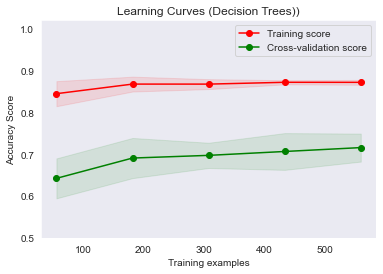

In [120]:
### Learning Curve

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Accuracy Score")
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    plt.grid()
    
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, 
                     alpha=0.1,color="r")
    
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, 
                     alpha=0.1, color="g")
    
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt


X, y = X_train, y_train


title = "Learning Curves (Decision Trees))"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(test_size=0.2, random_state=0)

estimator = dtree_model
plot_learning_curve(estimator, title, X, y, ylim=(0.5, 1.02), cv=cv, n_jobs=4)

plt.show()

# Random Forest

In [121]:
rfc_classifier = RandomForestClassifier(n_jobs= -1, oob_score= False, random_state= 0)

In [122]:
rfc_classifier.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1, random_state=0)

In [123]:
pred = rfc_classifier.predict(X_test)

In [124]:
accuracy_score(y_test, pred)

0.7333333333333333

In [125]:
confusion_matrix(y_test, pred)

array([[185,  19],
       [ 61,  35]], dtype=int64)

In [126]:
print(f"Train Accuracy : {rfc_classifier.score(X_train, y_train):.3f}")
print(f"Test Accuracy : {rfc_classifier.score(X_test, y_test):.3f}")

Train Accuracy : 1.000
Test Accuracy : 0.733


In [127]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.75      0.91      0.82       204
           1       0.65      0.36      0.47        96

    accuracy                           0.73       300
   macro avg       0.70      0.64      0.64       300
weighted avg       0.72      0.73      0.71       300



### Applying GridSearchCV

In [128]:
grid = {
    'n_estimators': [50, 60, 70, 75, 80, 90], 
    'max_depth': [5, 7, 8, 9, 10, 12, 15], 
    'max_features': [2, 3, 4, 5], 
    'min_samples_leaf' :[1, 2, 3, 4], 
    'min_samples_split': [2, 4, 5, 6, 7, 8], 
    'criterion': ["gini", "entropy"]
}

grid_search_1 = GridSearchCV(estimator = rfc_classifier, 
                           param_grid = grid, 
                           scoring = "accuracy", 
                           verbose = 2,
                           cv = 4)

grid_search_1 = grid_search_1.fit(X_train, y_train)

Fitting 4 folds for each of 8064 candidates, totalling 32256 fits
[CV] END criterion=gini, max_depth=5, max_features=2, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END criterion=gini, max_depth=5, max_features=2, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END criterion=gini, max_depth=5, max_features=2, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END criterion=gini, max_depth=5, max_features=2, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END criterion=gini, max_depth=5, max_features=2, min_samples_leaf=1, min_samples_split=2, n_estimators=60; total time=   0.2s
[CV] END criterion=gini, max_depth=5, max_features=2, min_samples_leaf=1, min_samples_split=2, n_estimators=60; total time=   0.2s
[CV] END criterion=gini, max_depth=5, max_features=2, min_samples_leaf=1, min_samples_split=2, n_estimators=60; total time=   0.2s
[CV] END criterio

[CV] END criterion=gini, max_depth=5, max_features=2, min_samples_leaf=1, min_samples_split=5, n_estimators=75; total time=   0.3s
[CV] END criterion=gini, max_depth=5, max_features=2, min_samples_leaf=1, min_samples_split=5, n_estimators=80; total time=   0.3s
[CV] END criterion=gini, max_depth=5, max_features=2, min_samples_leaf=1, min_samples_split=5, n_estimators=80; total time=   0.3s
[CV] END criterion=gini, max_depth=5, max_features=2, min_samples_leaf=1, min_samples_split=5, n_estimators=80; total time=   0.3s
[CV] END criterion=gini, max_depth=5, max_features=2, min_samples_leaf=1, min_samples_split=5, n_estimators=80; total time=   0.3s
[CV] END criterion=gini, max_depth=5, max_features=2, min_samples_leaf=1, min_samples_split=5, n_estimators=90; total time=   0.3s
[CV] END criterion=gini, max_depth=5, max_features=2, min_samples_leaf=1, min_samples_split=5, n_estimators=90; total time=   0.3s
[CV] END criterion=gini, max_depth=5, max_features=2, min_samples_leaf=1, min_sampl

[CV] END criterion=gini, max_depth=5, max_features=2, min_samples_leaf=1, min_samples_split=8, n_estimators=60; total time=   0.2s
[CV] END criterion=gini, max_depth=5, max_features=2, min_samples_leaf=1, min_samples_split=8, n_estimators=60; total time=   0.2s
[CV] END criterion=gini, max_depth=5, max_features=2, min_samples_leaf=1, min_samples_split=8, n_estimators=70; total time=   0.2s
[CV] END criterion=gini, max_depth=5, max_features=2, min_samples_leaf=1, min_samples_split=8, n_estimators=70; total time=   0.2s
[CV] END criterion=gini, max_depth=5, max_features=2, min_samples_leaf=1, min_samples_split=8, n_estimators=70; total time=   0.2s
[CV] END criterion=gini, max_depth=5, max_features=2, min_samples_leaf=1, min_samples_split=8, n_estimators=70; total time=   0.2s
[CV] END criterion=gini, max_depth=5, max_features=2, min_samples_leaf=1, min_samples_split=8, n_estimators=75; total time=   0.2s
[CV] END criterion=gini, max_depth=5, max_features=2, min_samples_leaf=1, min_sampl

[CV] END criterion=gini, max_depth=5, max_features=2, min_samples_leaf=2, min_samples_split=4, n_estimators=90; total time=   0.4s
[CV] END criterion=gini, max_depth=5, max_features=2, min_samples_leaf=2, min_samples_split=4, n_estimators=90; total time=   0.3s
[CV] END criterion=gini, max_depth=5, max_features=2, min_samples_leaf=2, min_samples_split=4, n_estimators=90; total time=   0.3s
[CV] END criterion=gini, max_depth=5, max_features=2, min_samples_leaf=2, min_samples_split=5, n_estimators=50; total time=   0.1s
[CV] END criterion=gini, max_depth=5, max_features=2, min_samples_leaf=2, min_samples_split=5, n_estimators=50; total time=   0.1s
[CV] END criterion=gini, max_depth=5, max_features=2, min_samples_leaf=2, min_samples_split=5, n_estimators=50; total time=   0.1s
[CV] END criterion=gini, max_depth=5, max_features=2, min_samples_leaf=2, min_samples_split=5, n_estimators=50; total time=   0.1s
[CV] END criterion=gini, max_depth=5, max_features=2, min_samples_leaf=2, min_sampl

[CV] END criterion=gini, max_depth=5, max_features=2, min_samples_leaf=2, min_samples_split=7, n_estimators=75; total time=   0.2s
[CV] END criterion=gini, max_depth=5, max_features=2, min_samples_leaf=2, min_samples_split=7, n_estimators=75; total time=   0.2s
[CV] END criterion=gini, max_depth=5, max_features=2, min_samples_leaf=2, min_samples_split=7, n_estimators=75; total time=   0.3s
[CV] END criterion=gini, max_depth=5, max_features=2, min_samples_leaf=2, min_samples_split=7, n_estimators=75; total time=   0.3s
[CV] END criterion=gini, max_depth=5, max_features=2, min_samples_leaf=2, min_samples_split=7, n_estimators=80; total time=   0.3s
[CV] END criterion=gini, max_depth=5, max_features=2, min_samples_leaf=2, min_samples_split=7, n_estimators=80; total time=   0.3s
[CV] END criterion=gini, max_depth=5, max_features=2, min_samples_leaf=2, min_samples_split=7, n_estimators=80; total time=   0.3s
[CV] END criterion=gini, max_depth=5, max_features=2, min_samples_leaf=2, min_sampl

[CV] END criterion=gini, max_depth=5, max_features=2, min_samples_leaf=3, min_samples_split=4, n_estimators=50; total time=   0.1s
[CV] END criterion=gini, max_depth=5, max_features=2, min_samples_leaf=3, min_samples_split=4, n_estimators=60; total time=   0.2s
[CV] END criterion=gini, max_depth=5, max_features=2, min_samples_leaf=3, min_samples_split=4, n_estimators=60; total time=   0.2s
[CV] END criterion=gini, max_depth=5, max_features=2, min_samples_leaf=3, min_samples_split=4, n_estimators=60; total time=   0.2s
[CV] END criterion=gini, max_depth=5, max_features=2, min_samples_leaf=3, min_samples_split=4, n_estimators=60; total time=   0.2s
[CV] END criterion=gini, max_depth=5, max_features=2, min_samples_leaf=3, min_samples_split=4, n_estimators=70; total time=   0.2s
[CV] END criterion=gini, max_depth=5, max_features=2, min_samples_leaf=3, min_samples_split=4, n_estimators=70; total time=   0.2s
[CV] END criterion=gini, max_depth=5, max_features=2, min_samples_leaf=3, min_sampl

[CV] END criterion=gini, max_depth=5, max_features=2, min_samples_leaf=3, min_samples_split=6, n_estimators=80; total time=   0.3s
[CV] END criterion=gini, max_depth=5, max_features=2, min_samples_leaf=3, min_samples_split=6, n_estimators=80; total time=   0.3s
[CV] END criterion=gini, max_depth=5, max_features=2, min_samples_leaf=3, min_samples_split=6, n_estimators=90; total time=   0.3s
[CV] END criterion=gini, max_depth=5, max_features=2, min_samples_leaf=3, min_samples_split=6, n_estimators=90; total time=   0.3s
[CV] END criterion=gini, max_depth=5, max_features=2, min_samples_leaf=3, min_samples_split=6, n_estimators=90; total time=   0.3s
[CV] END criterion=gini, max_depth=5, max_features=2, min_samples_leaf=3, min_samples_split=6, n_estimators=90; total time=   0.3s
[CV] END criterion=gini, max_depth=5, max_features=2, min_samples_leaf=3, min_samples_split=7, n_estimators=50; total time=   0.2s
[CV] END criterion=gini, max_depth=5, max_features=2, min_samples_leaf=3, min_sampl

[CV] END criterion=gini, max_depth=5, max_features=2, min_samples_leaf=4, min_samples_split=2, n_estimators=70; total time=   0.2s
[CV] END criterion=gini, max_depth=5, max_features=2, min_samples_leaf=4, min_samples_split=2, n_estimators=70; total time=   0.3s
[CV] END criterion=gini, max_depth=5, max_features=2, min_samples_leaf=4, min_samples_split=2, n_estimators=70; total time=   0.2s
[CV] END criterion=gini, max_depth=5, max_features=2, min_samples_leaf=4, min_samples_split=2, n_estimators=75; total time=   0.2s
[CV] END criterion=gini, max_depth=5, max_features=2, min_samples_leaf=4, min_samples_split=2, n_estimators=75; total time=   0.3s
[CV] END criterion=gini, max_depth=5, max_features=2, min_samples_leaf=4, min_samples_split=2, n_estimators=75; total time=   0.2s
[CV] END criterion=gini, max_depth=5, max_features=2, min_samples_leaf=4, min_samples_split=2, n_estimators=75; total time=   0.2s
[CV] END criterion=gini, max_depth=5, max_features=2, min_samples_leaf=4, min_sampl

[CV] END criterion=gini, max_depth=5, max_features=2, min_samples_leaf=4, min_samples_split=6, n_estimators=50; total time=   0.1s
[CV] END criterion=gini, max_depth=5, max_features=2, min_samples_leaf=4, min_samples_split=6, n_estimators=50; total time=   0.1s
[CV] END criterion=gini, max_depth=5, max_features=2, min_samples_leaf=4, min_samples_split=6, n_estimators=50; total time=   0.1s
[CV] END criterion=gini, max_depth=5, max_features=2, min_samples_leaf=4, min_samples_split=6, n_estimators=50; total time=   0.1s
[CV] END criterion=gini, max_depth=5, max_features=2, min_samples_leaf=4, min_samples_split=6, n_estimators=60; total time=   0.2s
[CV] END criterion=gini, max_depth=5, max_features=2, min_samples_leaf=4, min_samples_split=6, n_estimators=60; total time=   0.2s
[CV] END criterion=gini, max_depth=5, max_features=2, min_samples_leaf=4, min_samples_split=6, n_estimators=60; total time=   0.2s
[CV] END criterion=gini, max_depth=5, max_features=2, min_samples_leaf=4, min_sampl

[CV] END criterion=gini, max_depth=5, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=75; total time=   0.3s
[CV] END criterion=gini, max_depth=5, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=80; total time=   0.3s
[CV] END criterion=gini, max_depth=5, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=80; total time=   0.3s
[CV] END criterion=gini, max_depth=5, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=80; total time=   0.3s
[CV] END criterion=gini, max_depth=5, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=80; total time=   0.3s
[CV] END criterion=gini, max_depth=5, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=90; total time=   0.3s
[CV] END criterion=gini, max_depth=5, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=90; total time=   0.3s
[CV] END criterion=gini, max_depth=5, max_features=2, min_samples_leaf=4, min_sampl

[CV] END criterion=gini, max_depth=5, max_features=3, min_samples_leaf=1, min_samples_split=5, n_estimators=60; total time=   0.2s
[CV] END criterion=gini, max_depth=5, max_features=3, min_samples_leaf=1, min_samples_split=5, n_estimators=60; total time=   0.2s
[CV] END criterion=gini, max_depth=5, max_features=3, min_samples_leaf=1, min_samples_split=5, n_estimators=70; total time=   0.2s
[CV] END criterion=gini, max_depth=5, max_features=3, min_samples_leaf=1, min_samples_split=5, n_estimators=70; total time=   0.2s
[CV] END criterion=gini, max_depth=5, max_features=3, min_samples_leaf=1, min_samples_split=5, n_estimators=70; total time=   0.2s
[CV] END criterion=gini, max_depth=5, max_features=3, min_samples_leaf=1, min_samples_split=5, n_estimators=70; total time=   0.3s
[CV] END criterion=gini, max_depth=5, max_features=3, min_samples_leaf=1, min_samples_split=5, n_estimators=75; total time=   0.3s
[CV] END criterion=gini, max_depth=5, max_features=3, min_samples_leaf=1, min_sampl

[CV] END criterion=gini, max_depth=5, max_features=3, min_samples_leaf=1, min_samples_split=7, n_estimators=90; total time=   0.3s
[CV] END criterion=gini, max_depth=5, max_features=3, min_samples_leaf=1, min_samples_split=7, n_estimators=90; total time=   0.3s
[CV] END criterion=gini, max_depth=5, max_features=3, min_samples_leaf=1, min_samples_split=7, n_estimators=90; total time=   0.3s
[CV] END criterion=gini, max_depth=5, max_features=3, min_samples_leaf=1, min_samples_split=8, n_estimators=50; total time=   0.2s
[CV] END criterion=gini, max_depth=5, max_features=3, min_samples_leaf=1, min_samples_split=8, n_estimators=50; total time=   0.1s
[CV] END criterion=gini, max_depth=5, max_features=3, min_samples_leaf=1, min_samples_split=8, n_estimators=50; total time=   0.2s
[CV] END criterion=gini, max_depth=5, max_features=3, min_samples_leaf=1, min_samples_split=8, n_estimators=50; total time=   0.1s
[CV] END criterion=gini, max_depth=5, max_features=3, min_samples_leaf=1, min_sampl

[CV] END criterion=gini, max_depth=5, max_features=3, min_samples_leaf=2, min_samples_split=4, n_estimators=75; total time=   0.3s
[CV] END criterion=gini, max_depth=5, max_features=3, min_samples_leaf=2, min_samples_split=4, n_estimators=75; total time=   0.2s
[CV] END criterion=gini, max_depth=5, max_features=3, min_samples_leaf=2, min_samples_split=4, n_estimators=75; total time=   0.2s
[CV] END criterion=gini, max_depth=5, max_features=3, min_samples_leaf=2, min_samples_split=4, n_estimators=75; total time=   0.3s
[CV] END criterion=gini, max_depth=5, max_features=3, min_samples_leaf=2, min_samples_split=4, n_estimators=80; total time=   0.3s
[CV] END criterion=gini, max_depth=5, max_features=3, min_samples_leaf=2, min_samples_split=4, n_estimators=80; total time=   0.3s
[CV] END criterion=gini, max_depth=5, max_features=3, min_samples_leaf=2, min_samples_split=4, n_estimators=80; total time=   0.3s
[CV] END criterion=gini, max_depth=5, max_features=3, min_samples_leaf=2, min_sampl

[CV] END criterion=gini, max_depth=5, max_features=3, min_samples_leaf=2, min_samples_split=7, n_estimators=50; total time=   0.1s
[CV] END criterion=gini, max_depth=5, max_features=3, min_samples_leaf=2, min_samples_split=7, n_estimators=60; total time=   0.2s
[CV] END criterion=gini, max_depth=5, max_features=3, min_samples_leaf=2, min_samples_split=7, n_estimators=60; total time=   0.2s
[CV] END criterion=gini, max_depth=5, max_features=3, min_samples_leaf=2, min_samples_split=7, n_estimators=60; total time=   0.2s
[CV] END criterion=gini, max_depth=5, max_features=3, min_samples_leaf=2, min_samples_split=7, n_estimators=60; total time=   0.2s
[CV] END criterion=gini, max_depth=5, max_features=3, min_samples_leaf=2, min_samples_split=7, n_estimators=70; total time=   0.2s
[CV] END criterion=gini, max_depth=5, max_features=3, min_samples_leaf=2, min_samples_split=7, n_estimators=70; total time=   0.2s
[CV] END criterion=gini, max_depth=5, max_features=3, min_samples_leaf=2, min_sampl

[CV] END criterion=gini, max_depth=5, max_features=3, min_samples_leaf=3, min_samples_split=2, n_estimators=80; total time=   0.3s
[CV] END criterion=gini, max_depth=5, max_features=3, min_samples_leaf=3, min_samples_split=2, n_estimators=80; total time=   0.3s
[CV] END criterion=gini, max_depth=5, max_features=3, min_samples_leaf=3, min_samples_split=2, n_estimators=90; total time=   0.3s
[CV] END criterion=gini, max_depth=5, max_features=3, min_samples_leaf=3, min_samples_split=2, n_estimators=90; total time=   0.3s
[CV] END criterion=gini, max_depth=5, max_features=3, min_samples_leaf=3, min_samples_split=2, n_estimators=90; total time=   0.3s
[CV] END criterion=gini, max_depth=5, max_features=3, min_samples_leaf=3, min_samples_split=2, n_estimators=90; total time=   0.3s
[CV] END criterion=gini, max_depth=5, max_features=3, min_samples_leaf=3, min_samples_split=4, n_estimators=50; total time=   0.2s
[CV] END criterion=gini, max_depth=5, max_features=3, min_samples_leaf=3, min_sampl

[CV] END criterion=gini, max_depth=5, max_features=3, min_samples_leaf=3, min_samples_split=6, n_estimators=70; total time=   0.2s
[CV] END criterion=gini, max_depth=5, max_features=3, min_samples_leaf=3, min_samples_split=6, n_estimators=70; total time=   0.2s
[CV] END criterion=gini, max_depth=5, max_features=3, min_samples_leaf=3, min_samples_split=6, n_estimators=70; total time=   0.2s
[CV] END criterion=gini, max_depth=5, max_features=3, min_samples_leaf=3, min_samples_split=6, n_estimators=75; total time=   0.3s
[CV] END criterion=gini, max_depth=5, max_features=3, min_samples_leaf=3, min_samples_split=6, n_estimators=75; total time=   0.2s
[CV] END criterion=gini, max_depth=5, max_features=3, min_samples_leaf=3, min_samples_split=6, n_estimators=75; total time=   0.2s
[CV] END criterion=gini, max_depth=5, max_features=3, min_samples_leaf=3, min_samples_split=6, n_estimators=75; total time=   0.3s
[CV] END criterion=gini, max_depth=5, max_features=3, min_samples_leaf=3, min_sampl

[CV] END criterion=gini, max_depth=5, max_features=3, min_samples_leaf=4, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END criterion=gini, max_depth=5, max_features=3, min_samples_leaf=4, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END criterion=gini, max_depth=5, max_features=3, min_samples_leaf=4, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END criterion=gini, max_depth=5, max_features=3, min_samples_leaf=4, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END criterion=gini, max_depth=5, max_features=3, min_samples_leaf=4, min_samples_split=2, n_estimators=60; total time=   0.2s
[CV] END criterion=gini, max_depth=5, max_features=3, min_samples_leaf=4, min_samples_split=2, n_estimators=60; total time=   0.2s
[CV] END criterion=gini, max_depth=5, max_features=3, min_samples_leaf=4, min_samples_split=2, n_estimators=60; total time=   0.2s
[CV] END criterion=gini, max_depth=5, max_features=3, min_samples_leaf=4, min_sampl

[CV] END criterion=gini, max_depth=5, max_features=3, min_samples_leaf=4, min_samples_split=5, n_estimators=75; total time=   0.3s
[CV] END criterion=gini, max_depth=5, max_features=3, min_samples_leaf=4, min_samples_split=5, n_estimators=80; total time=   0.3s
[CV] END criterion=gini, max_depth=5, max_features=3, min_samples_leaf=4, min_samples_split=5, n_estimators=80; total time=   0.3s
[CV] END criterion=gini, max_depth=5, max_features=3, min_samples_leaf=4, min_samples_split=5, n_estimators=80; total time=   0.3s
[CV] END criterion=gini, max_depth=5, max_features=3, min_samples_leaf=4, min_samples_split=5, n_estimators=80; total time=   0.3s
[CV] END criterion=gini, max_depth=5, max_features=3, min_samples_leaf=4, min_samples_split=5, n_estimators=90; total time=   0.3s
[CV] END criterion=gini, max_depth=5, max_features=3, min_samples_leaf=4, min_samples_split=5, n_estimators=90; total time=   0.3s
[CV] END criterion=gini, max_depth=5, max_features=3, min_samples_leaf=4, min_sampl

[CV] END criterion=gini, max_depth=5, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=60; total time=   0.2s
[CV] END criterion=gini, max_depth=5, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=60; total time=   0.2s
[CV] END criterion=gini, max_depth=5, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=70; total time=   0.2s
[CV] END criterion=gini, max_depth=5, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=70; total time=   0.2s
[CV] END criterion=gini, max_depth=5, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=70; total time=   0.2s
[CV] END criterion=gini, max_depth=5, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=70; total time=   0.2s
[CV] END criterion=gini, max_depth=5, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=75; total time=   0.3s
[CV] END criterion=gini, max_depth=5, max_features=3, min_samples_leaf=4, min_sampl

[CV] END criterion=gini, max_depth=5, max_features=4, min_samples_leaf=1, min_samples_split=4, n_estimators=90; total time=   0.3s
[CV] END criterion=gini, max_depth=5, max_features=4, min_samples_leaf=1, min_samples_split=4, n_estimators=90; total time=   0.3s
[CV] END criterion=gini, max_depth=5, max_features=4, min_samples_leaf=1, min_samples_split=4, n_estimators=90; total time=   0.3s
[CV] END criterion=gini, max_depth=5, max_features=4, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.1s
[CV] END criterion=gini, max_depth=5, max_features=4, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.2s
[CV] END criterion=gini, max_depth=5, max_features=4, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.1s
[CV] END criterion=gini, max_depth=5, max_features=4, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.1s
[CV] END criterion=gini, max_depth=5, max_features=4, min_samples_leaf=1, min_sampl

[CV] END criterion=gini, max_depth=5, max_features=4, min_samples_leaf=1, min_samples_split=7, n_estimators=75; total time=   0.3s
[CV] END criterion=gini, max_depth=5, max_features=4, min_samples_leaf=1, min_samples_split=7, n_estimators=75; total time=   0.3s
[CV] END criterion=gini, max_depth=5, max_features=4, min_samples_leaf=1, min_samples_split=7, n_estimators=75; total time=   0.3s
[CV] END criterion=gini, max_depth=5, max_features=4, min_samples_leaf=1, min_samples_split=7, n_estimators=75; total time=   0.2s
[CV] END criterion=gini, max_depth=5, max_features=4, min_samples_leaf=1, min_samples_split=7, n_estimators=80; total time=   0.3s
[CV] END criterion=gini, max_depth=5, max_features=4, min_samples_leaf=1, min_samples_split=7, n_estimators=80; total time=   0.3s
[CV] END criterion=gini, max_depth=5, max_features=4, min_samples_leaf=1, min_samples_split=7, n_estimators=80; total time=   0.3s
[CV] END criterion=gini, max_depth=5, max_features=4, min_samples_leaf=1, min_sampl

[CV] END criterion=gini, max_depth=5, max_features=4, min_samples_leaf=2, min_samples_split=4, n_estimators=50; total time=   0.1s
[CV] END criterion=gini, max_depth=5, max_features=4, min_samples_leaf=2, min_samples_split=4, n_estimators=60; total time=   0.2s
[CV] END criterion=gini, max_depth=5, max_features=4, min_samples_leaf=2, min_samples_split=4, n_estimators=60; total time=   0.2s
[CV] END criterion=gini, max_depth=5, max_features=4, min_samples_leaf=2, min_samples_split=4, n_estimators=60; total time=   0.2s
[CV] END criterion=gini, max_depth=5, max_features=4, min_samples_leaf=2, min_samples_split=4, n_estimators=60; total time=   0.2s
[CV] END criterion=gini, max_depth=5, max_features=4, min_samples_leaf=2, min_samples_split=4, n_estimators=70; total time=   0.2s
[CV] END criterion=gini, max_depth=5, max_features=4, min_samples_leaf=2, min_samples_split=4, n_estimators=70; total time=   0.2s
[CV] END criterion=gini, max_depth=5, max_features=4, min_samples_leaf=2, min_sampl

[CV] END criterion=gini, max_depth=5, max_features=4, min_samples_leaf=2, min_samples_split=6, n_estimators=80; total time=   0.3s
[CV] END criterion=gini, max_depth=5, max_features=4, min_samples_leaf=2, min_samples_split=6, n_estimators=80; total time=   0.3s
[CV] END criterion=gini, max_depth=5, max_features=4, min_samples_leaf=2, min_samples_split=6, n_estimators=90; total time=   0.3s
[CV] END criterion=gini, max_depth=5, max_features=4, min_samples_leaf=2, min_samples_split=6, n_estimators=90; total time=   0.2s
[CV] END criterion=gini, max_depth=5, max_features=4, min_samples_leaf=2, min_samples_split=6, n_estimators=90; total time=   0.3s
[CV] END criterion=gini, max_depth=5, max_features=4, min_samples_leaf=2, min_samples_split=6, n_estimators=90; total time=   0.3s
[CV] END criterion=gini, max_depth=5, max_features=4, min_samples_leaf=2, min_samples_split=7, n_estimators=50; total time=   0.1s
[CV] END criterion=gini, max_depth=5, max_features=4, min_samples_leaf=2, min_sampl

[CV] END criterion=gini, max_depth=5, max_features=4, min_samples_leaf=3, min_samples_split=2, n_estimators=70; total time=   0.2s
[CV] END criterion=gini, max_depth=5, max_features=4, min_samples_leaf=3, min_samples_split=2, n_estimators=70; total time=   0.2s
[CV] END criterion=gini, max_depth=5, max_features=4, min_samples_leaf=3, min_samples_split=2, n_estimators=70; total time=   0.2s
[CV] END criterion=gini, max_depth=5, max_features=4, min_samples_leaf=3, min_samples_split=2, n_estimators=75; total time=   0.3s
[CV] END criterion=gini, max_depth=5, max_features=4, min_samples_leaf=3, min_samples_split=2, n_estimators=75; total time=   0.2s
[CV] END criterion=gini, max_depth=5, max_features=4, min_samples_leaf=3, min_samples_split=2, n_estimators=75; total time=   0.2s
[CV] END criterion=gini, max_depth=5, max_features=4, min_samples_leaf=3, min_samples_split=2, n_estimators=75; total time=   0.3s
[CV] END criterion=gini, max_depth=5, max_features=4, min_samples_leaf=3, min_sampl

[CV] END criterion=gini, max_depth=5, max_features=4, min_samples_leaf=3, min_samples_split=6, n_estimators=50; total time=   0.1s
[CV] END criterion=gini, max_depth=5, max_features=4, min_samples_leaf=3, min_samples_split=6, n_estimators=50; total time=   0.1s
[CV] END criterion=gini, max_depth=5, max_features=4, min_samples_leaf=3, min_samples_split=6, n_estimators=50; total time=   0.1s
[CV] END criterion=gini, max_depth=5, max_features=4, min_samples_leaf=3, min_samples_split=6, n_estimators=50; total time=   0.1s
[CV] END criterion=gini, max_depth=5, max_features=4, min_samples_leaf=3, min_samples_split=6, n_estimators=60; total time=   0.2s
[CV] END criterion=gini, max_depth=5, max_features=4, min_samples_leaf=3, min_samples_split=6, n_estimators=60; total time=   0.2s
[CV] END criterion=gini, max_depth=5, max_features=4, min_samples_leaf=3, min_samples_split=6, n_estimators=60; total time=   0.2s
[CV] END criterion=gini, max_depth=5, max_features=4, min_samples_leaf=3, min_sampl

[CV] END criterion=gini, max_depth=5, max_features=4, min_samples_leaf=3, min_samples_split=8, n_estimators=75; total time=   0.2s
[CV] END criterion=gini, max_depth=5, max_features=4, min_samples_leaf=3, min_samples_split=8, n_estimators=80; total time=   0.3s
[CV] END criterion=gini, max_depth=5, max_features=4, min_samples_leaf=3, min_samples_split=8, n_estimators=80; total time=   0.3s
[CV] END criterion=gini, max_depth=5, max_features=4, min_samples_leaf=3, min_samples_split=8, n_estimators=80; total time=   0.3s
[CV] END criterion=gini, max_depth=5, max_features=4, min_samples_leaf=3, min_samples_split=8, n_estimators=80; total time=   0.3s
[CV] END criterion=gini, max_depth=5, max_features=4, min_samples_leaf=3, min_samples_split=8, n_estimators=90; total time=   0.3s
[CV] END criterion=gini, max_depth=5, max_features=4, min_samples_leaf=3, min_samples_split=8, n_estimators=90; total time=   0.3s
[CV] END criterion=gini, max_depth=5, max_features=4, min_samples_leaf=3, min_sampl

[CV] END criterion=gini, max_depth=5, max_features=4, min_samples_leaf=4, min_samples_split=5, n_estimators=60; total time=   0.2s
[CV] END criterion=gini, max_depth=5, max_features=4, min_samples_leaf=4, min_samples_split=5, n_estimators=60; total time=   0.2s
[CV] END criterion=gini, max_depth=5, max_features=4, min_samples_leaf=4, min_samples_split=5, n_estimators=70; total time=   0.2s
[CV] END criterion=gini, max_depth=5, max_features=4, min_samples_leaf=4, min_samples_split=5, n_estimators=70; total time=   0.2s
[CV] END criterion=gini, max_depth=5, max_features=4, min_samples_leaf=4, min_samples_split=5, n_estimators=70; total time=   0.2s
[CV] END criterion=gini, max_depth=5, max_features=4, min_samples_leaf=4, min_samples_split=5, n_estimators=70; total time=   0.2s
[CV] END criterion=gini, max_depth=5, max_features=4, min_samples_leaf=4, min_samples_split=5, n_estimators=75; total time=   0.2s
[CV] END criterion=gini, max_depth=5, max_features=4, min_samples_leaf=4, min_sampl

[CV] END criterion=gini, max_depth=5, max_features=4, min_samples_leaf=4, min_samples_split=7, n_estimators=90; total time=   0.3s
[CV] END criterion=gini, max_depth=5, max_features=4, min_samples_leaf=4, min_samples_split=7, n_estimators=90; total time=   0.3s
[CV] END criterion=gini, max_depth=5, max_features=4, min_samples_leaf=4, min_samples_split=7, n_estimators=90; total time=   0.3s
[CV] END criterion=gini, max_depth=5, max_features=4, min_samples_leaf=4, min_samples_split=8, n_estimators=50; total time=   0.1s
[CV] END criterion=gini, max_depth=5, max_features=4, min_samples_leaf=4, min_samples_split=8, n_estimators=50; total time=   0.1s
[CV] END criterion=gini, max_depth=5, max_features=4, min_samples_leaf=4, min_samples_split=8, n_estimators=50; total time=   0.1s
[CV] END criterion=gini, max_depth=5, max_features=4, min_samples_leaf=4, min_samples_split=8, n_estimators=50; total time=   0.1s
[CV] END criterion=gini, max_depth=5, max_features=4, min_samples_leaf=4, min_sampl

[CV] END criterion=gini, max_depth=5, max_features=5, min_samples_leaf=1, min_samples_split=4, n_estimators=75; total time=   0.2s
[CV] END criterion=gini, max_depth=5, max_features=5, min_samples_leaf=1, min_samples_split=4, n_estimators=75; total time=   0.3s
[CV] END criterion=gini, max_depth=5, max_features=5, min_samples_leaf=1, min_samples_split=4, n_estimators=75; total time=   0.2s
[CV] END criterion=gini, max_depth=5, max_features=5, min_samples_leaf=1, min_samples_split=4, n_estimators=75; total time=   0.2s
[CV] END criterion=gini, max_depth=5, max_features=5, min_samples_leaf=1, min_samples_split=4, n_estimators=80; total time=   0.3s
[CV] END criterion=gini, max_depth=5, max_features=5, min_samples_leaf=1, min_samples_split=4, n_estimators=80; total time=   0.3s
[CV] END criterion=gini, max_depth=5, max_features=5, min_samples_leaf=1, min_samples_split=4, n_estimators=80; total time=   0.3s
[CV] END criterion=gini, max_depth=5, max_features=5, min_samples_leaf=1, min_sampl

[CV] END criterion=gini, max_depth=5, max_features=5, min_samples_leaf=1, min_samples_split=7, n_estimators=50; total time=   0.1s
[CV] END criterion=gini, max_depth=5, max_features=5, min_samples_leaf=1, min_samples_split=7, n_estimators=60; total time=   0.2s
[CV] END criterion=gini, max_depth=5, max_features=5, min_samples_leaf=1, min_samples_split=7, n_estimators=60; total time=   0.2s
[CV] END criterion=gini, max_depth=5, max_features=5, min_samples_leaf=1, min_samples_split=7, n_estimators=60; total time=   0.2s
[CV] END criterion=gini, max_depth=5, max_features=5, min_samples_leaf=1, min_samples_split=7, n_estimators=60; total time=   0.2s
[CV] END criterion=gini, max_depth=5, max_features=5, min_samples_leaf=1, min_samples_split=7, n_estimators=70; total time=   0.2s
[CV] END criterion=gini, max_depth=5, max_features=5, min_samples_leaf=1, min_samples_split=7, n_estimators=70; total time=   0.2s
[CV] END criterion=gini, max_depth=5, max_features=5, min_samples_leaf=1, min_sampl

[CV] END criterion=gini, max_depth=5, max_features=5, min_samples_leaf=2, min_samples_split=2, n_estimators=80; total time=   0.3s
[CV] END criterion=gini, max_depth=5, max_features=5, min_samples_leaf=2, min_samples_split=2, n_estimators=80; total time=   0.3s
[CV] END criterion=gini, max_depth=5, max_features=5, min_samples_leaf=2, min_samples_split=2, n_estimators=90; total time=   0.3s
[CV] END criterion=gini, max_depth=5, max_features=5, min_samples_leaf=2, min_samples_split=2, n_estimators=90; total time=   0.3s
[CV] END criterion=gini, max_depth=5, max_features=5, min_samples_leaf=2, min_samples_split=2, n_estimators=90; total time=   0.3s
[CV] END criterion=gini, max_depth=5, max_features=5, min_samples_leaf=2, min_samples_split=2, n_estimators=90; total time=   0.3s
[CV] END criterion=gini, max_depth=5, max_features=5, min_samples_leaf=2, min_samples_split=4, n_estimators=50; total time=   0.1s
[CV] END criterion=gini, max_depth=5, max_features=5, min_samples_leaf=2, min_sampl

[CV] END criterion=gini, max_depth=5, max_features=5, min_samples_leaf=2, min_samples_split=6, n_estimators=70; total time=   0.2s
[CV] END criterion=gini, max_depth=5, max_features=5, min_samples_leaf=2, min_samples_split=6, n_estimators=70; total time=   0.2s
[CV] END criterion=gini, max_depth=5, max_features=5, min_samples_leaf=2, min_samples_split=6, n_estimators=70; total time=   0.2s
[CV] END criterion=gini, max_depth=5, max_features=5, min_samples_leaf=2, min_samples_split=6, n_estimators=75; total time=   0.2s
[CV] END criterion=gini, max_depth=5, max_features=5, min_samples_leaf=2, min_samples_split=6, n_estimators=75; total time=   0.3s
[CV] END criterion=gini, max_depth=5, max_features=5, min_samples_leaf=2, min_samples_split=6, n_estimators=75; total time=   0.2s
[CV] END criterion=gini, max_depth=5, max_features=5, min_samples_leaf=2, min_samples_split=6, n_estimators=75; total time=   0.2s
[CV] END criterion=gini, max_depth=5, max_features=5, min_samples_leaf=2, min_sampl

[CV] END criterion=gini, max_depth=5, max_features=5, min_samples_leaf=3, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END criterion=gini, max_depth=5, max_features=5, min_samples_leaf=3, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END criterion=gini, max_depth=5, max_features=5, min_samples_leaf=3, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END criterion=gini, max_depth=5, max_features=5, min_samples_leaf=3, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END criterion=gini, max_depth=5, max_features=5, min_samples_leaf=3, min_samples_split=2, n_estimators=60; total time=   0.2s
[CV] END criterion=gini, max_depth=5, max_features=5, min_samples_leaf=3, min_samples_split=2, n_estimators=60; total time=   0.2s
[CV] END criterion=gini, max_depth=5, max_features=5, min_samples_leaf=3, min_samples_split=2, n_estimators=60; total time=   0.2s
[CV] END criterion=gini, max_depth=5, max_features=5, min_samples_leaf=3, min_sampl

[CV] END criterion=gini, max_depth=5, max_features=5, min_samples_leaf=3, min_samples_split=5, n_estimators=75; total time=   0.2s
[CV] END criterion=gini, max_depth=5, max_features=5, min_samples_leaf=3, min_samples_split=5, n_estimators=80; total time=   0.3s
[CV] END criterion=gini, max_depth=5, max_features=5, min_samples_leaf=3, min_samples_split=5, n_estimators=80; total time=   0.3s
[CV] END criterion=gini, max_depth=5, max_features=5, min_samples_leaf=3, min_samples_split=5, n_estimators=80; total time=   0.3s
[CV] END criterion=gini, max_depth=5, max_features=5, min_samples_leaf=3, min_samples_split=5, n_estimators=80; total time=   0.3s
[CV] END criterion=gini, max_depth=5, max_features=5, min_samples_leaf=3, min_samples_split=5, n_estimators=90; total time=   0.3s
[CV] END criterion=gini, max_depth=5, max_features=5, min_samples_leaf=3, min_samples_split=5, n_estimators=90; total time=   0.3s
[CV] END criterion=gini, max_depth=5, max_features=5, min_samples_leaf=3, min_sampl

[CV] END criterion=gini, max_depth=5, max_features=5, min_samples_leaf=3, min_samples_split=8, n_estimators=60; total time=   0.2s
[CV] END criterion=gini, max_depth=5, max_features=5, min_samples_leaf=3, min_samples_split=8, n_estimators=60; total time=   0.2s
[CV] END criterion=gini, max_depth=5, max_features=5, min_samples_leaf=3, min_samples_split=8, n_estimators=70; total time=   0.2s
[CV] END criterion=gini, max_depth=5, max_features=5, min_samples_leaf=3, min_samples_split=8, n_estimators=70; total time=   0.2s
[CV] END criterion=gini, max_depth=5, max_features=5, min_samples_leaf=3, min_samples_split=8, n_estimators=70; total time=   0.2s
[CV] END criterion=gini, max_depth=5, max_features=5, min_samples_leaf=3, min_samples_split=8, n_estimators=70; total time=   0.2s
[CV] END criterion=gini, max_depth=5, max_features=5, min_samples_leaf=3, min_samples_split=8, n_estimators=75; total time=   0.2s
[CV] END criterion=gini, max_depth=5, max_features=5, min_samples_leaf=3, min_sampl

[CV] END criterion=gini, max_depth=5, max_features=5, min_samples_leaf=4, min_samples_split=4, n_estimators=90; total time=   0.2s
[CV] END criterion=gini, max_depth=5, max_features=5, min_samples_leaf=4, min_samples_split=4, n_estimators=90; total time=   0.3s
[CV] END criterion=gini, max_depth=5, max_features=5, min_samples_leaf=4, min_samples_split=4, n_estimators=90; total time=   0.3s
[CV] END criterion=gini, max_depth=5, max_features=5, min_samples_leaf=4, min_samples_split=5, n_estimators=50; total time=   0.1s
[CV] END criterion=gini, max_depth=5, max_features=5, min_samples_leaf=4, min_samples_split=5, n_estimators=50; total time=   0.1s
[CV] END criterion=gini, max_depth=5, max_features=5, min_samples_leaf=4, min_samples_split=5, n_estimators=50; total time=   0.1s
[CV] END criterion=gini, max_depth=5, max_features=5, min_samples_leaf=4, min_samples_split=5, n_estimators=50; total time=   0.1s
[CV] END criterion=gini, max_depth=5, max_features=5, min_samples_leaf=4, min_sampl

[CV] END criterion=gini, max_depth=5, max_features=5, min_samples_leaf=4, min_samples_split=7, n_estimators=75; total time=   0.3s
[CV] END criterion=gini, max_depth=5, max_features=5, min_samples_leaf=4, min_samples_split=7, n_estimators=75; total time=   0.2s
[CV] END criterion=gini, max_depth=5, max_features=5, min_samples_leaf=4, min_samples_split=7, n_estimators=75; total time=   0.2s
[CV] END criterion=gini, max_depth=5, max_features=5, min_samples_leaf=4, min_samples_split=7, n_estimators=75; total time=   0.2s
[CV] END criterion=gini, max_depth=5, max_features=5, min_samples_leaf=4, min_samples_split=7, n_estimators=80; total time=   0.3s
[CV] END criterion=gini, max_depth=5, max_features=5, min_samples_leaf=4, min_samples_split=7, n_estimators=80; total time=   0.3s
[CV] END criterion=gini, max_depth=5, max_features=5, min_samples_leaf=4, min_samples_split=7, n_estimators=80; total time=   0.3s
[CV] END criterion=gini, max_depth=5, max_features=5, min_samples_leaf=4, min_sampl

[CV] END criterion=gini, max_depth=7, max_features=2, min_samples_leaf=1, min_samples_split=4, n_estimators=50; total time=   0.1s
[CV] END criterion=gini, max_depth=7, max_features=2, min_samples_leaf=1, min_samples_split=4, n_estimators=60; total time=   0.2s
[CV] END criterion=gini, max_depth=7, max_features=2, min_samples_leaf=1, min_samples_split=4, n_estimators=60; total time=   0.2s
[CV] END criterion=gini, max_depth=7, max_features=2, min_samples_leaf=1, min_samples_split=4, n_estimators=60; total time=   0.2s
[CV] END criterion=gini, max_depth=7, max_features=2, min_samples_leaf=1, min_samples_split=4, n_estimators=60; total time=   0.2s
[CV] END criterion=gini, max_depth=7, max_features=2, min_samples_leaf=1, min_samples_split=4, n_estimators=70; total time=   0.2s
[CV] END criterion=gini, max_depth=7, max_features=2, min_samples_leaf=1, min_samples_split=4, n_estimators=70; total time=   0.2s
[CV] END criterion=gini, max_depth=7, max_features=2, min_samples_leaf=1, min_sampl

[CV] END criterion=gini, max_depth=7, max_features=2, min_samples_leaf=1, min_samples_split=6, n_estimators=80; total time=   0.3s
[CV] END criterion=gini, max_depth=7, max_features=2, min_samples_leaf=1, min_samples_split=6, n_estimators=80; total time=   0.3s
[CV] END criterion=gini, max_depth=7, max_features=2, min_samples_leaf=1, min_samples_split=6, n_estimators=90; total time=   0.3s
[CV] END criterion=gini, max_depth=7, max_features=2, min_samples_leaf=1, min_samples_split=6, n_estimators=90; total time=   0.3s
[CV] END criterion=gini, max_depth=7, max_features=2, min_samples_leaf=1, min_samples_split=6, n_estimators=90; total time=   0.3s
[CV] END criterion=gini, max_depth=7, max_features=2, min_samples_leaf=1, min_samples_split=6, n_estimators=90; total time=   0.3s
[CV] END criterion=gini, max_depth=7, max_features=2, min_samples_leaf=1, min_samples_split=7, n_estimators=50; total time=   0.1s
[CV] END criterion=gini, max_depth=7, max_features=2, min_samples_leaf=1, min_sampl

[CV] END criterion=gini, max_depth=7, max_features=2, min_samples_leaf=2, min_samples_split=2, n_estimators=70; total time=   0.2s
[CV] END criterion=gini, max_depth=7, max_features=2, min_samples_leaf=2, min_samples_split=2, n_estimators=70; total time=   0.2s
[CV] END criterion=gini, max_depth=7, max_features=2, min_samples_leaf=2, min_samples_split=2, n_estimators=70; total time=   0.2s
[CV] END criterion=gini, max_depth=7, max_features=2, min_samples_leaf=2, min_samples_split=2, n_estimators=75; total time=   0.3s
[CV] END criterion=gini, max_depth=7, max_features=2, min_samples_leaf=2, min_samples_split=2, n_estimators=75; total time=   0.2s
[CV] END criterion=gini, max_depth=7, max_features=2, min_samples_leaf=2, min_samples_split=2, n_estimators=75; total time=   0.2s
[CV] END criterion=gini, max_depth=7, max_features=2, min_samples_leaf=2, min_samples_split=2, n_estimators=75; total time=   0.3s
[CV] END criterion=gini, max_depth=7, max_features=2, min_samples_leaf=2, min_sampl

[CV] END criterion=gini, max_depth=7, max_features=2, min_samples_leaf=2, min_samples_split=6, n_estimators=50; total time=   0.2s
[CV] END criterion=gini, max_depth=7, max_features=2, min_samples_leaf=2, min_samples_split=6, n_estimators=50; total time=   0.1s
[CV] END criterion=gini, max_depth=7, max_features=2, min_samples_leaf=2, min_samples_split=6, n_estimators=50; total time=   0.1s
[CV] END criterion=gini, max_depth=7, max_features=2, min_samples_leaf=2, min_samples_split=6, n_estimators=50; total time=   0.1s
[CV] END criterion=gini, max_depth=7, max_features=2, min_samples_leaf=2, min_samples_split=6, n_estimators=60; total time=   0.2s
[CV] END criterion=gini, max_depth=7, max_features=2, min_samples_leaf=2, min_samples_split=6, n_estimators=60; total time=   0.2s
[CV] END criterion=gini, max_depth=7, max_features=2, min_samples_leaf=2, min_samples_split=6, n_estimators=60; total time=   0.2s
[CV] END criterion=gini, max_depth=7, max_features=2, min_samples_leaf=2, min_sampl

[CV] END criterion=gini, max_depth=7, max_features=2, min_samples_leaf=2, min_samples_split=8, n_estimators=75; total time=   0.2s
[CV] END criterion=gini, max_depth=7, max_features=2, min_samples_leaf=2, min_samples_split=8, n_estimators=80; total time=   0.3s
[CV] END criterion=gini, max_depth=7, max_features=2, min_samples_leaf=2, min_samples_split=8, n_estimators=80; total time=   0.3s
[CV] END criterion=gini, max_depth=7, max_features=2, min_samples_leaf=2, min_samples_split=8, n_estimators=80; total time=   0.3s
[CV] END criterion=gini, max_depth=7, max_features=2, min_samples_leaf=2, min_samples_split=8, n_estimators=80; total time=   0.3s
[CV] END criterion=gini, max_depth=7, max_features=2, min_samples_leaf=2, min_samples_split=8, n_estimators=90; total time=   0.4s
[CV] END criterion=gini, max_depth=7, max_features=2, min_samples_leaf=2, min_samples_split=8, n_estimators=90; total time=   0.3s
[CV] END criterion=gini, max_depth=7, max_features=2, min_samples_leaf=2, min_sampl

[CV] END criterion=gini, max_depth=7, max_features=2, min_samples_leaf=3, min_samples_split=5, n_estimators=60; total time=   0.2s
[CV] END criterion=gini, max_depth=7, max_features=2, min_samples_leaf=3, min_samples_split=5, n_estimators=60; total time=   0.2s
[CV] END criterion=gini, max_depth=7, max_features=2, min_samples_leaf=3, min_samples_split=5, n_estimators=70; total time=   0.2s
[CV] END criterion=gini, max_depth=7, max_features=2, min_samples_leaf=3, min_samples_split=5, n_estimators=70; total time=   0.2s
[CV] END criterion=gini, max_depth=7, max_features=2, min_samples_leaf=3, min_samples_split=5, n_estimators=70; total time=   0.2s
[CV] END criterion=gini, max_depth=7, max_features=2, min_samples_leaf=3, min_samples_split=5, n_estimators=70; total time=   0.2s
[CV] END criterion=gini, max_depth=7, max_features=2, min_samples_leaf=3, min_samples_split=5, n_estimators=75; total time=   0.3s
[CV] END criterion=gini, max_depth=7, max_features=2, min_samples_leaf=3, min_sampl

[CV] END criterion=gini, max_depth=7, max_features=2, min_samples_leaf=3, min_samples_split=7, n_estimators=90; total time=   0.3s
[CV] END criterion=gini, max_depth=7, max_features=2, min_samples_leaf=3, min_samples_split=7, n_estimators=90; total time=   0.3s
[CV] END criterion=gini, max_depth=7, max_features=2, min_samples_leaf=3, min_samples_split=7, n_estimators=90; total time=   0.3s
[CV] END criterion=gini, max_depth=7, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=50; total time=   0.1s
[CV] END criterion=gini, max_depth=7, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=50; total time=   0.1s
[CV] END criterion=gini, max_depth=7, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=50; total time=   0.1s
[CV] END criterion=gini, max_depth=7, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=50; total time=   0.1s
[CV] END criterion=gini, max_depth=7, max_features=2, min_samples_leaf=3, min_sampl

[CV] END criterion=gini, max_depth=7, max_features=2, min_samples_leaf=4, min_samples_split=4, n_estimators=75; total time=   0.2s
[CV] END criterion=gini, max_depth=7, max_features=2, min_samples_leaf=4, min_samples_split=4, n_estimators=75; total time=   0.3s
[CV] END criterion=gini, max_depth=7, max_features=2, min_samples_leaf=4, min_samples_split=4, n_estimators=75; total time=   0.2s
[CV] END criterion=gini, max_depth=7, max_features=2, min_samples_leaf=4, min_samples_split=4, n_estimators=75; total time=   0.2s
[CV] END criterion=gini, max_depth=7, max_features=2, min_samples_leaf=4, min_samples_split=4, n_estimators=80; total time=   0.3s
[CV] END criterion=gini, max_depth=7, max_features=2, min_samples_leaf=4, min_samples_split=4, n_estimators=80; total time=   0.3s
[CV] END criterion=gini, max_depth=7, max_features=2, min_samples_leaf=4, min_samples_split=4, n_estimators=80; total time=   0.3s
[CV] END criterion=gini, max_depth=7, max_features=2, min_samples_leaf=4, min_sampl

[CV] END criterion=gini, max_depth=7, max_features=2, min_samples_leaf=4, min_samples_split=7, n_estimators=50; total time=   0.1s
[CV] END criterion=gini, max_depth=7, max_features=2, min_samples_leaf=4, min_samples_split=7, n_estimators=60; total time=   0.2s
[CV] END criterion=gini, max_depth=7, max_features=2, min_samples_leaf=4, min_samples_split=7, n_estimators=60; total time=   0.2s
[CV] END criterion=gini, max_depth=7, max_features=2, min_samples_leaf=4, min_samples_split=7, n_estimators=60; total time=   0.1s
[CV] END criterion=gini, max_depth=7, max_features=2, min_samples_leaf=4, min_samples_split=7, n_estimators=60; total time=   0.2s
[CV] END criterion=gini, max_depth=7, max_features=2, min_samples_leaf=4, min_samples_split=7, n_estimators=70; total time=   0.2s
[CV] END criterion=gini, max_depth=7, max_features=2, min_samples_leaf=4, min_samples_split=7, n_estimators=70; total time=   0.2s
[CV] END criterion=gini, max_depth=7, max_features=2, min_samples_leaf=4, min_sampl

[CV] END criterion=gini, max_depth=7, max_features=3, min_samples_leaf=1, min_samples_split=2, n_estimators=80; total time=   0.3s
[CV] END criterion=gini, max_depth=7, max_features=3, min_samples_leaf=1, min_samples_split=2, n_estimators=80; total time=   0.3s
[CV] END criterion=gini, max_depth=7, max_features=3, min_samples_leaf=1, min_samples_split=2, n_estimators=90; total time=   0.3s
[CV] END criterion=gini, max_depth=7, max_features=3, min_samples_leaf=1, min_samples_split=2, n_estimators=90; total time=   0.3s
[CV] END criterion=gini, max_depth=7, max_features=3, min_samples_leaf=1, min_samples_split=2, n_estimators=90; total time=   0.3s
[CV] END criterion=gini, max_depth=7, max_features=3, min_samples_leaf=1, min_samples_split=2, n_estimators=90; total time=   0.3s
[CV] END criterion=gini, max_depth=7, max_features=3, min_samples_leaf=1, min_samples_split=4, n_estimators=50; total time=   0.1s
[CV] END criterion=gini, max_depth=7, max_features=3, min_samples_leaf=1, min_sampl

[CV] END criterion=gini, max_depth=7, max_features=3, min_samples_leaf=1, min_samples_split=6, n_estimators=70; total time=   0.2s
[CV] END criterion=gini, max_depth=7, max_features=3, min_samples_leaf=1, min_samples_split=6, n_estimators=70; total time=   0.2s
[CV] END criterion=gini, max_depth=7, max_features=3, min_samples_leaf=1, min_samples_split=6, n_estimators=70; total time=   0.2s
[CV] END criterion=gini, max_depth=7, max_features=3, min_samples_leaf=1, min_samples_split=6, n_estimators=75; total time=   0.2s
[CV] END criterion=gini, max_depth=7, max_features=3, min_samples_leaf=1, min_samples_split=6, n_estimators=75; total time=   0.2s
[CV] END criterion=gini, max_depth=7, max_features=3, min_samples_leaf=1, min_samples_split=6, n_estimators=75; total time=   0.3s
[CV] END criterion=gini, max_depth=7, max_features=3, min_samples_leaf=1, min_samples_split=6, n_estimators=75; total time=   0.2s
[CV] END criterion=gini, max_depth=7, max_features=3, min_samples_leaf=1, min_sampl

[CV] END criterion=gini, max_depth=7, max_features=3, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END criterion=gini, max_depth=7, max_features=3, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END criterion=gini, max_depth=7, max_features=3, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END criterion=gini, max_depth=7, max_features=3, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END criterion=gini, max_depth=7, max_features=3, min_samples_leaf=2, min_samples_split=2, n_estimators=60; total time=   0.2s
[CV] END criterion=gini, max_depth=7, max_features=3, min_samples_leaf=2, min_samples_split=2, n_estimators=60; total time=   0.2s
[CV] END criterion=gini, max_depth=7, max_features=3, min_samples_leaf=2, min_samples_split=2, n_estimators=60; total time=   0.2s
[CV] END criterion=gini, max_depth=7, max_features=3, min_samples_leaf=2, min_sampl

[CV] END criterion=gini, max_depth=7, max_features=3, min_samples_leaf=2, min_samples_split=5, n_estimators=75; total time=   0.3s
[CV] END criterion=gini, max_depth=7, max_features=3, min_samples_leaf=2, min_samples_split=5, n_estimators=80; total time=   0.3s
[CV] END criterion=gini, max_depth=7, max_features=3, min_samples_leaf=2, min_samples_split=5, n_estimators=80; total time=   0.3s
[CV] END criterion=gini, max_depth=7, max_features=3, min_samples_leaf=2, min_samples_split=5, n_estimators=80; total time=   0.3s
[CV] END criterion=gini, max_depth=7, max_features=3, min_samples_leaf=2, min_samples_split=5, n_estimators=80; total time=   0.3s
[CV] END criterion=gini, max_depth=7, max_features=3, min_samples_leaf=2, min_samples_split=5, n_estimators=90; total time=   0.3s
[CV] END criterion=gini, max_depth=7, max_features=3, min_samples_leaf=2, min_samples_split=5, n_estimators=90; total time=   0.3s
[CV] END criterion=gini, max_depth=7, max_features=3, min_samples_leaf=2, min_sampl

[CV] END criterion=gini, max_depth=7, max_features=3, min_samples_leaf=2, min_samples_split=8, n_estimators=60; total time=   0.1s
[CV] END criterion=gini, max_depth=7, max_features=3, min_samples_leaf=2, min_samples_split=8, n_estimators=60; total time=   0.2s
[CV] END criterion=gini, max_depth=7, max_features=3, min_samples_leaf=2, min_samples_split=8, n_estimators=70; total time=   0.2s
[CV] END criterion=gini, max_depth=7, max_features=3, min_samples_leaf=2, min_samples_split=8, n_estimators=70; total time=   0.2s
[CV] END criterion=gini, max_depth=7, max_features=3, min_samples_leaf=2, min_samples_split=8, n_estimators=70; total time=   0.2s
[CV] END criterion=gini, max_depth=7, max_features=3, min_samples_leaf=2, min_samples_split=8, n_estimators=70; total time=   0.2s
[CV] END criterion=gini, max_depth=7, max_features=3, min_samples_leaf=2, min_samples_split=8, n_estimators=75; total time=   0.2s
[CV] END criterion=gini, max_depth=7, max_features=3, min_samples_leaf=2, min_sampl

[CV] END criterion=gini, max_depth=7, max_features=3, min_samples_leaf=3, min_samples_split=4, n_estimators=90; total time=   0.3s
[CV] END criterion=gini, max_depth=7, max_features=3, min_samples_leaf=3, min_samples_split=4, n_estimators=90; total time=   0.3s
[CV] END criterion=gini, max_depth=7, max_features=3, min_samples_leaf=3, min_samples_split=4, n_estimators=90; total time=   0.4s
[CV] END criterion=gini, max_depth=7, max_features=3, min_samples_leaf=3, min_samples_split=5, n_estimators=50; total time=   0.2s
[CV] END criterion=gini, max_depth=7, max_features=3, min_samples_leaf=3, min_samples_split=5, n_estimators=50; total time=   0.2s
[CV] END criterion=gini, max_depth=7, max_features=3, min_samples_leaf=3, min_samples_split=5, n_estimators=50; total time=   0.2s
[CV] END criterion=gini, max_depth=7, max_features=3, min_samples_leaf=3, min_samples_split=5, n_estimators=50; total time=   0.2s
[CV] END criterion=gini, max_depth=7, max_features=3, min_samples_leaf=3, min_sampl

[CV] END criterion=gini, max_depth=7, max_features=3, min_samples_leaf=3, min_samples_split=7, n_estimators=75; total time=   0.3s
[CV] END criterion=gini, max_depth=7, max_features=3, min_samples_leaf=3, min_samples_split=7, n_estimators=75; total time=   0.3s
[CV] END criterion=gini, max_depth=7, max_features=3, min_samples_leaf=3, min_samples_split=7, n_estimators=75; total time=   0.3s
[CV] END criterion=gini, max_depth=7, max_features=3, min_samples_leaf=3, min_samples_split=7, n_estimators=75; total time=   0.3s
[CV] END criterion=gini, max_depth=7, max_features=3, min_samples_leaf=3, min_samples_split=7, n_estimators=80; total time=   0.3s
[CV] END criterion=gini, max_depth=7, max_features=3, min_samples_leaf=3, min_samples_split=7, n_estimators=80; total time=   0.3s
[CV] END criterion=gini, max_depth=7, max_features=3, min_samples_leaf=3, min_samples_split=7, n_estimators=80; total time=   0.4s
[CV] END criterion=gini, max_depth=7, max_features=3, min_samples_leaf=3, min_sampl

[CV] END criterion=gini, max_depth=7, max_features=3, min_samples_leaf=4, min_samples_split=4, n_estimators=50; total time=   0.1s
[CV] END criterion=gini, max_depth=7, max_features=3, min_samples_leaf=4, min_samples_split=4, n_estimators=60; total time=   0.2s
[CV] END criterion=gini, max_depth=7, max_features=3, min_samples_leaf=4, min_samples_split=4, n_estimators=60; total time=   0.2s
[CV] END criterion=gini, max_depth=7, max_features=3, min_samples_leaf=4, min_samples_split=4, n_estimators=60; total time=   0.2s
[CV] END criterion=gini, max_depth=7, max_features=3, min_samples_leaf=4, min_samples_split=4, n_estimators=60; total time=   0.2s
[CV] END criterion=gini, max_depth=7, max_features=3, min_samples_leaf=4, min_samples_split=4, n_estimators=70; total time=   0.2s
[CV] END criterion=gini, max_depth=7, max_features=3, min_samples_leaf=4, min_samples_split=4, n_estimators=70; total time=   0.2s
[CV] END criterion=gini, max_depth=7, max_features=3, min_samples_leaf=4, min_sampl

[CV] END criterion=gini, max_depth=7, max_features=3, min_samples_leaf=4, min_samples_split=6, n_estimators=80; total time=   0.3s
[CV] END criterion=gini, max_depth=7, max_features=3, min_samples_leaf=4, min_samples_split=6, n_estimators=80; total time=   0.3s
[CV] END criterion=gini, max_depth=7, max_features=3, min_samples_leaf=4, min_samples_split=6, n_estimators=90; total time=   0.3s
[CV] END criterion=gini, max_depth=7, max_features=3, min_samples_leaf=4, min_samples_split=6, n_estimators=90; total time=   0.4s
[CV] END criterion=gini, max_depth=7, max_features=3, min_samples_leaf=4, min_samples_split=6, n_estimators=90; total time=   0.2s
[CV] END criterion=gini, max_depth=7, max_features=3, min_samples_leaf=4, min_samples_split=6, n_estimators=90; total time=   0.3s
[CV] END criterion=gini, max_depth=7, max_features=3, min_samples_leaf=4, min_samples_split=7, n_estimators=50; total time=   0.1s
[CV] END criterion=gini, max_depth=7, max_features=3, min_samples_leaf=4, min_sampl

[CV] END criterion=gini, max_depth=7, max_features=4, min_samples_leaf=1, min_samples_split=2, n_estimators=70; total time=   0.2s
[CV] END criterion=gini, max_depth=7, max_features=4, min_samples_leaf=1, min_samples_split=2, n_estimators=70; total time=   0.2s
[CV] END criterion=gini, max_depth=7, max_features=4, min_samples_leaf=1, min_samples_split=2, n_estimators=70; total time=   0.2s
[CV] END criterion=gini, max_depth=7, max_features=4, min_samples_leaf=1, min_samples_split=2, n_estimators=75; total time=   0.2s
[CV] END criterion=gini, max_depth=7, max_features=4, min_samples_leaf=1, min_samples_split=2, n_estimators=75; total time=   0.2s
[CV] END criterion=gini, max_depth=7, max_features=4, min_samples_leaf=1, min_samples_split=2, n_estimators=75; total time=   0.3s
[CV] END criterion=gini, max_depth=7, max_features=4, min_samples_leaf=1, min_samples_split=2, n_estimators=75; total time=   0.2s
[CV] END criterion=gini, max_depth=7, max_features=4, min_samples_leaf=1, min_sampl

[CV] END criterion=gini, max_depth=7, max_features=4, min_samples_leaf=1, min_samples_split=6, n_estimators=50; total time=   0.1s
[CV] END criterion=gini, max_depth=7, max_features=4, min_samples_leaf=1, min_samples_split=6, n_estimators=50; total time=   0.2s
[CV] END criterion=gini, max_depth=7, max_features=4, min_samples_leaf=1, min_samples_split=6, n_estimators=50; total time=   0.1s
[CV] END criterion=gini, max_depth=7, max_features=4, min_samples_leaf=1, min_samples_split=6, n_estimators=50; total time=   0.2s
[CV] END criterion=gini, max_depth=7, max_features=4, min_samples_leaf=1, min_samples_split=6, n_estimators=60; total time=   0.2s
[CV] END criterion=gini, max_depth=7, max_features=4, min_samples_leaf=1, min_samples_split=6, n_estimators=60; total time=   0.2s
[CV] END criterion=gini, max_depth=7, max_features=4, min_samples_leaf=1, min_samples_split=6, n_estimators=60; total time=   0.2s
[CV] END criterion=gini, max_depth=7, max_features=4, min_samples_leaf=1, min_sampl

[CV] END criterion=gini, max_depth=7, max_features=4, min_samples_leaf=1, min_samples_split=8, n_estimators=75; total time=   0.3s
[CV] END criterion=gini, max_depth=7, max_features=4, min_samples_leaf=1, min_samples_split=8, n_estimators=80; total time=   0.2s
[CV] END criterion=gini, max_depth=7, max_features=4, min_samples_leaf=1, min_samples_split=8, n_estimators=80; total time=   0.3s
[CV] END criterion=gini, max_depth=7, max_features=4, min_samples_leaf=1, min_samples_split=8, n_estimators=80; total time=   0.3s
[CV] END criterion=gini, max_depth=7, max_features=4, min_samples_leaf=1, min_samples_split=8, n_estimators=80; total time=   0.3s
[CV] END criterion=gini, max_depth=7, max_features=4, min_samples_leaf=1, min_samples_split=8, n_estimators=90; total time=   0.3s
[CV] END criterion=gini, max_depth=7, max_features=4, min_samples_leaf=1, min_samples_split=8, n_estimators=90; total time=   0.4s
[CV] END criterion=gini, max_depth=7, max_features=4, min_samples_leaf=1, min_sampl

[CV] END criterion=gini, max_depth=7, max_features=4, min_samples_leaf=2, min_samples_split=5, n_estimators=60; total time=   0.2s
[CV] END criterion=gini, max_depth=7, max_features=4, min_samples_leaf=2, min_samples_split=5, n_estimators=60; total time=   0.2s
[CV] END criterion=gini, max_depth=7, max_features=4, min_samples_leaf=2, min_samples_split=5, n_estimators=70; total time=   0.2s
[CV] END criterion=gini, max_depth=7, max_features=4, min_samples_leaf=2, min_samples_split=5, n_estimators=70; total time=   0.2s
[CV] END criterion=gini, max_depth=7, max_features=4, min_samples_leaf=2, min_samples_split=5, n_estimators=70; total time=   0.2s
[CV] END criterion=gini, max_depth=7, max_features=4, min_samples_leaf=2, min_samples_split=5, n_estimators=70; total time=   0.3s
[CV] END criterion=gini, max_depth=7, max_features=4, min_samples_leaf=2, min_samples_split=5, n_estimators=75; total time=   0.2s
[CV] END criterion=gini, max_depth=7, max_features=4, min_samples_leaf=2, min_sampl

[CV] END criterion=gini, max_depth=7, max_features=4, min_samples_leaf=2, min_samples_split=7, n_estimators=90; total time=   0.3s
[CV] END criterion=gini, max_depth=7, max_features=4, min_samples_leaf=2, min_samples_split=7, n_estimators=90; total time=   0.3s
[CV] END criterion=gini, max_depth=7, max_features=4, min_samples_leaf=2, min_samples_split=7, n_estimators=90; total time=   0.3s
[CV] END criterion=gini, max_depth=7, max_features=4, min_samples_leaf=2, min_samples_split=8, n_estimators=50; total time=   0.1s
[CV] END criterion=gini, max_depth=7, max_features=4, min_samples_leaf=2, min_samples_split=8, n_estimators=50; total time=   0.1s
[CV] END criterion=gini, max_depth=7, max_features=4, min_samples_leaf=2, min_samples_split=8, n_estimators=50; total time=   0.1s
[CV] END criterion=gini, max_depth=7, max_features=4, min_samples_leaf=2, min_samples_split=8, n_estimators=50; total time=   0.1s
[CV] END criterion=gini, max_depth=7, max_features=4, min_samples_leaf=2, min_sampl

[CV] END criterion=gini, max_depth=7, max_features=4, min_samples_leaf=3, min_samples_split=4, n_estimators=75; total time=   0.2s
[CV] END criterion=gini, max_depth=7, max_features=4, min_samples_leaf=3, min_samples_split=4, n_estimators=75; total time=   0.3s
[CV] END criterion=gini, max_depth=7, max_features=4, min_samples_leaf=3, min_samples_split=4, n_estimators=75; total time=   0.3s
[CV] END criterion=gini, max_depth=7, max_features=4, min_samples_leaf=3, min_samples_split=4, n_estimators=75; total time=   0.2s
[CV] END criterion=gini, max_depth=7, max_features=4, min_samples_leaf=3, min_samples_split=4, n_estimators=80; total time=   0.3s
[CV] END criterion=gini, max_depth=7, max_features=4, min_samples_leaf=3, min_samples_split=4, n_estimators=80; total time=   0.3s
[CV] END criterion=gini, max_depth=7, max_features=4, min_samples_leaf=3, min_samples_split=4, n_estimators=80; total time=   0.3s
[CV] END criterion=gini, max_depth=7, max_features=4, min_samples_leaf=3, min_sampl

[CV] END criterion=gini, max_depth=7, max_features=4, min_samples_leaf=3, min_samples_split=7, n_estimators=50; total time=   0.1s
[CV] END criterion=gini, max_depth=7, max_features=4, min_samples_leaf=3, min_samples_split=7, n_estimators=60; total time=   0.2s
[CV] END criterion=gini, max_depth=7, max_features=4, min_samples_leaf=3, min_samples_split=7, n_estimators=60; total time=   0.2s
[CV] END criterion=gini, max_depth=7, max_features=4, min_samples_leaf=3, min_samples_split=7, n_estimators=60; total time=   0.2s
[CV] END criterion=gini, max_depth=7, max_features=4, min_samples_leaf=3, min_samples_split=7, n_estimators=60; total time=   0.2s
[CV] END criterion=gini, max_depth=7, max_features=4, min_samples_leaf=3, min_samples_split=7, n_estimators=70; total time=   0.2s
[CV] END criterion=gini, max_depth=7, max_features=4, min_samples_leaf=3, min_samples_split=7, n_estimators=70; total time=   0.2s
[CV] END criterion=gini, max_depth=7, max_features=4, min_samples_leaf=3, min_sampl

[CV] END criterion=gini, max_depth=7, max_features=4, min_samples_leaf=4, min_samples_split=2, n_estimators=80; total time=   0.3s
[CV] END criterion=gini, max_depth=7, max_features=4, min_samples_leaf=4, min_samples_split=2, n_estimators=80; total time=   0.3s
[CV] END criterion=gini, max_depth=7, max_features=4, min_samples_leaf=4, min_samples_split=2, n_estimators=90; total time=   0.2s
[CV] END criterion=gini, max_depth=7, max_features=4, min_samples_leaf=4, min_samples_split=2, n_estimators=90; total time=   0.3s
[CV] END criterion=gini, max_depth=7, max_features=4, min_samples_leaf=4, min_samples_split=2, n_estimators=90; total time=   0.3s
[CV] END criterion=gini, max_depth=7, max_features=4, min_samples_leaf=4, min_samples_split=2, n_estimators=90; total time=   0.3s
[CV] END criterion=gini, max_depth=7, max_features=4, min_samples_leaf=4, min_samples_split=4, n_estimators=50; total time=   0.2s
[CV] END criterion=gini, max_depth=7, max_features=4, min_samples_leaf=4, min_sampl

[CV] END criterion=gini, max_depth=7, max_features=4, min_samples_leaf=4, min_samples_split=6, n_estimators=70; total time=   0.2s
[CV] END criterion=gini, max_depth=7, max_features=4, min_samples_leaf=4, min_samples_split=6, n_estimators=70; total time=   0.2s
[CV] END criterion=gini, max_depth=7, max_features=4, min_samples_leaf=4, min_samples_split=6, n_estimators=70; total time=   0.2s
[CV] END criterion=gini, max_depth=7, max_features=4, min_samples_leaf=4, min_samples_split=6, n_estimators=75; total time=   0.2s
[CV] END criterion=gini, max_depth=7, max_features=4, min_samples_leaf=4, min_samples_split=6, n_estimators=75; total time=   0.2s
[CV] END criterion=gini, max_depth=7, max_features=4, min_samples_leaf=4, min_samples_split=6, n_estimators=75; total time=   0.3s
[CV] END criterion=gini, max_depth=7, max_features=4, min_samples_leaf=4, min_samples_split=6, n_estimators=75; total time=   0.2s
[CV] END criterion=gini, max_depth=7, max_features=4, min_samples_leaf=4, min_sampl

[CV] END criterion=gini, max_depth=7, max_features=5, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END criterion=gini, max_depth=7, max_features=5, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END criterion=gini, max_depth=7, max_features=5, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END criterion=gini, max_depth=7, max_features=5, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END criterion=gini, max_depth=7, max_features=5, min_samples_leaf=1, min_samples_split=2, n_estimators=60; total time=   0.2s
[CV] END criterion=gini, max_depth=7, max_features=5, min_samples_leaf=1, min_samples_split=2, n_estimators=60; total time=   0.2s
[CV] END criterion=gini, max_depth=7, max_features=5, min_samples_leaf=1, min_samples_split=2, n_estimators=60; total time=   0.2s
[CV] END criterion=gini, max_depth=7, max_features=5, min_samples_leaf=1, min_sampl

[CV] END criterion=gini, max_depth=7, max_features=5, min_samples_leaf=1, min_samples_split=5, n_estimators=75; total time=   0.3s
[CV] END criterion=gini, max_depth=7, max_features=5, min_samples_leaf=1, min_samples_split=5, n_estimators=80; total time=   0.3s
[CV] END criterion=gini, max_depth=7, max_features=5, min_samples_leaf=1, min_samples_split=5, n_estimators=80; total time=   0.3s
[CV] END criterion=gini, max_depth=7, max_features=5, min_samples_leaf=1, min_samples_split=5, n_estimators=80; total time=   0.3s
[CV] END criterion=gini, max_depth=7, max_features=5, min_samples_leaf=1, min_samples_split=5, n_estimators=80; total time=   0.3s
[CV] END criterion=gini, max_depth=7, max_features=5, min_samples_leaf=1, min_samples_split=5, n_estimators=90; total time=   0.3s
[CV] END criterion=gini, max_depth=7, max_features=5, min_samples_leaf=1, min_samples_split=5, n_estimators=90; total time=   0.3s
[CV] END criterion=gini, max_depth=7, max_features=5, min_samples_leaf=1, min_sampl

[CV] END criterion=gini, max_depth=7, max_features=5, min_samples_leaf=1, min_samples_split=8, n_estimators=60; total time=   0.2s
[CV] END criterion=gini, max_depth=7, max_features=5, min_samples_leaf=1, min_samples_split=8, n_estimators=60; total time=   0.2s
[CV] END criterion=gini, max_depth=7, max_features=5, min_samples_leaf=1, min_samples_split=8, n_estimators=70; total time=   0.2s
[CV] END criterion=gini, max_depth=7, max_features=5, min_samples_leaf=1, min_samples_split=8, n_estimators=70; total time=   0.2s
[CV] END criterion=gini, max_depth=7, max_features=5, min_samples_leaf=1, min_samples_split=8, n_estimators=70; total time=   0.3s
[CV] END criterion=gini, max_depth=7, max_features=5, min_samples_leaf=1, min_samples_split=8, n_estimators=70; total time=   0.2s
[CV] END criterion=gini, max_depth=7, max_features=5, min_samples_leaf=1, min_samples_split=8, n_estimators=75; total time=   0.3s
[CV] END criterion=gini, max_depth=7, max_features=5, min_samples_leaf=1, min_sampl

[CV] END criterion=gini, max_depth=7, max_features=5, min_samples_leaf=2, min_samples_split=4, n_estimators=90; total time=   0.3s
[CV] END criterion=gini, max_depth=7, max_features=5, min_samples_leaf=2, min_samples_split=4, n_estimators=90; total time=   0.3s
[CV] END criterion=gini, max_depth=7, max_features=5, min_samples_leaf=2, min_samples_split=4, n_estimators=90; total time=   0.3s
[CV] END criterion=gini, max_depth=7, max_features=5, min_samples_leaf=2, min_samples_split=5, n_estimators=50; total time=   0.2s
[CV] END criterion=gini, max_depth=7, max_features=5, min_samples_leaf=2, min_samples_split=5, n_estimators=50; total time=   0.1s
[CV] END criterion=gini, max_depth=7, max_features=5, min_samples_leaf=2, min_samples_split=5, n_estimators=50; total time=   0.2s
[CV] END criterion=gini, max_depth=7, max_features=5, min_samples_leaf=2, min_samples_split=5, n_estimators=50; total time=   0.1s
[CV] END criterion=gini, max_depth=7, max_features=5, min_samples_leaf=2, min_sampl

[CV] END criterion=gini, max_depth=7, max_features=5, min_samples_leaf=2, min_samples_split=7, n_estimators=75; total time=   0.2s
[CV] END criterion=gini, max_depth=7, max_features=5, min_samples_leaf=2, min_samples_split=7, n_estimators=75; total time=   0.3s
[CV] END criterion=gini, max_depth=7, max_features=5, min_samples_leaf=2, min_samples_split=7, n_estimators=75; total time=   0.2s
[CV] END criterion=gini, max_depth=7, max_features=5, min_samples_leaf=2, min_samples_split=7, n_estimators=75; total time=   0.3s
[CV] END criterion=gini, max_depth=7, max_features=5, min_samples_leaf=2, min_samples_split=7, n_estimators=80; total time=   0.3s
[CV] END criterion=gini, max_depth=7, max_features=5, min_samples_leaf=2, min_samples_split=7, n_estimators=80; total time=   0.3s
[CV] END criterion=gini, max_depth=7, max_features=5, min_samples_leaf=2, min_samples_split=7, n_estimators=80; total time=   0.3s
[CV] END criterion=gini, max_depth=7, max_features=5, min_samples_leaf=2, min_sampl

[CV] END criterion=gini, max_depth=7, max_features=5, min_samples_leaf=3, min_samples_split=4, n_estimators=50; total time=   0.1s
[CV] END criterion=gini, max_depth=7, max_features=5, min_samples_leaf=3, min_samples_split=4, n_estimators=60; total time=   0.2s
[CV] END criterion=gini, max_depth=7, max_features=5, min_samples_leaf=3, min_samples_split=4, n_estimators=60; total time=   0.2s
[CV] END criterion=gini, max_depth=7, max_features=5, min_samples_leaf=3, min_samples_split=4, n_estimators=60; total time=   0.4s
[CV] END criterion=gini, max_depth=7, max_features=5, min_samples_leaf=3, min_samples_split=4, n_estimators=60; total time=   0.2s
[CV] END criterion=gini, max_depth=7, max_features=5, min_samples_leaf=3, min_samples_split=4, n_estimators=70; total time=   0.2s
[CV] END criterion=gini, max_depth=7, max_features=5, min_samples_leaf=3, min_samples_split=4, n_estimators=70; total time=   0.2s
[CV] END criterion=gini, max_depth=7, max_features=5, min_samples_leaf=3, min_sampl

[CV] END criterion=gini, max_depth=7, max_features=5, min_samples_leaf=3, min_samples_split=6, n_estimators=80; total time=   0.3s
[CV] END criterion=gini, max_depth=7, max_features=5, min_samples_leaf=3, min_samples_split=6, n_estimators=80; total time=   0.3s
[CV] END criterion=gini, max_depth=7, max_features=5, min_samples_leaf=3, min_samples_split=6, n_estimators=90; total time=   0.3s
[CV] END criterion=gini, max_depth=7, max_features=5, min_samples_leaf=3, min_samples_split=6, n_estimators=90; total time=   0.3s
[CV] END criterion=gini, max_depth=7, max_features=5, min_samples_leaf=3, min_samples_split=6, n_estimators=90; total time=   0.3s
[CV] END criterion=gini, max_depth=7, max_features=5, min_samples_leaf=3, min_samples_split=6, n_estimators=90; total time=   0.3s
[CV] END criterion=gini, max_depth=7, max_features=5, min_samples_leaf=3, min_samples_split=7, n_estimators=50; total time=   0.2s
[CV] END criterion=gini, max_depth=7, max_features=5, min_samples_leaf=3, min_sampl

[CV] END criterion=gini, max_depth=7, max_features=5, min_samples_leaf=4, min_samples_split=2, n_estimators=70; total time=   0.2s
[CV] END criterion=gini, max_depth=7, max_features=5, min_samples_leaf=4, min_samples_split=2, n_estimators=70; total time=   0.2s
[CV] END criterion=gini, max_depth=7, max_features=5, min_samples_leaf=4, min_samples_split=2, n_estimators=70; total time=   0.3s
[CV] END criterion=gini, max_depth=7, max_features=5, min_samples_leaf=4, min_samples_split=2, n_estimators=75; total time=   0.3s
[CV] END criterion=gini, max_depth=7, max_features=5, min_samples_leaf=4, min_samples_split=2, n_estimators=75; total time=   0.3s
[CV] END criterion=gini, max_depth=7, max_features=5, min_samples_leaf=4, min_samples_split=2, n_estimators=75; total time=   0.3s
[CV] END criterion=gini, max_depth=7, max_features=5, min_samples_leaf=4, min_samples_split=2, n_estimators=75; total time=   0.3s
[CV] END criterion=gini, max_depth=7, max_features=5, min_samples_leaf=4, min_sampl

[CV] END criterion=gini, max_depth=7, max_features=5, min_samples_leaf=4, min_samples_split=6, n_estimators=50; total time=   0.2s
[CV] END criterion=gini, max_depth=7, max_features=5, min_samples_leaf=4, min_samples_split=6, n_estimators=50; total time=   0.1s
[CV] END criterion=gini, max_depth=7, max_features=5, min_samples_leaf=4, min_samples_split=6, n_estimators=50; total time=   0.2s
[CV] END criterion=gini, max_depth=7, max_features=5, min_samples_leaf=4, min_samples_split=6, n_estimators=50; total time=   0.1s
[CV] END criterion=gini, max_depth=7, max_features=5, min_samples_leaf=4, min_samples_split=6, n_estimators=60; total time=   0.2s
[CV] END criterion=gini, max_depth=7, max_features=5, min_samples_leaf=4, min_samples_split=6, n_estimators=60; total time=   0.2s
[CV] END criterion=gini, max_depth=7, max_features=5, min_samples_leaf=4, min_samples_split=6, n_estimators=60; total time=   0.2s
[CV] END criterion=gini, max_depth=7, max_features=5, min_samples_leaf=4, min_sampl

[CV] END criterion=gini, max_depth=7, max_features=5, min_samples_leaf=4, min_samples_split=8, n_estimators=75; total time=   0.3s
[CV] END criterion=gini, max_depth=7, max_features=5, min_samples_leaf=4, min_samples_split=8, n_estimators=80; total time=   0.3s
[CV] END criterion=gini, max_depth=7, max_features=5, min_samples_leaf=4, min_samples_split=8, n_estimators=80; total time=   0.3s
[CV] END criterion=gini, max_depth=7, max_features=5, min_samples_leaf=4, min_samples_split=8, n_estimators=80; total time=   0.3s
[CV] END criterion=gini, max_depth=7, max_features=5, min_samples_leaf=4, min_samples_split=8, n_estimators=80; total time=   0.3s
[CV] END criterion=gini, max_depth=7, max_features=5, min_samples_leaf=4, min_samples_split=8, n_estimators=90; total time=   0.4s
[CV] END criterion=gini, max_depth=7, max_features=5, min_samples_leaf=4, min_samples_split=8, n_estimators=90; total time=   0.3s
[CV] END criterion=gini, max_depth=7, max_features=5, min_samples_leaf=4, min_sampl

[CV] END criterion=gini, max_depth=8, max_features=2, min_samples_leaf=1, min_samples_split=5, n_estimators=60; total time=   0.2s
[CV] END criterion=gini, max_depth=8, max_features=2, min_samples_leaf=1, min_samples_split=5, n_estimators=60; total time=   0.2s
[CV] END criterion=gini, max_depth=8, max_features=2, min_samples_leaf=1, min_samples_split=5, n_estimators=70; total time=   0.2s
[CV] END criterion=gini, max_depth=8, max_features=2, min_samples_leaf=1, min_samples_split=5, n_estimators=70; total time=   0.2s
[CV] END criterion=gini, max_depth=8, max_features=2, min_samples_leaf=1, min_samples_split=5, n_estimators=70; total time=   0.2s
[CV] END criterion=gini, max_depth=8, max_features=2, min_samples_leaf=1, min_samples_split=5, n_estimators=70; total time=   0.2s
[CV] END criterion=gini, max_depth=8, max_features=2, min_samples_leaf=1, min_samples_split=5, n_estimators=75; total time=   0.2s
[CV] END criterion=gini, max_depth=8, max_features=2, min_samples_leaf=1, min_sampl

[CV] END criterion=gini, max_depth=8, max_features=2, min_samples_leaf=1, min_samples_split=7, n_estimators=90; total time=   0.6s
[CV] END criterion=gini, max_depth=8, max_features=2, min_samples_leaf=1, min_samples_split=7, n_estimators=90; total time=   0.5s
[CV] END criterion=gini, max_depth=8, max_features=2, min_samples_leaf=1, min_samples_split=7, n_estimators=90; total time=   0.4s
[CV] END criterion=gini, max_depth=8, max_features=2, min_samples_leaf=1, min_samples_split=8, n_estimators=50; total time=   0.3s
[CV] END criterion=gini, max_depth=8, max_features=2, min_samples_leaf=1, min_samples_split=8, n_estimators=50; total time=   0.2s
[CV] END criterion=gini, max_depth=8, max_features=2, min_samples_leaf=1, min_samples_split=8, n_estimators=50; total time=   0.3s
[CV] END criterion=gini, max_depth=8, max_features=2, min_samples_leaf=1, min_samples_split=8, n_estimators=50; total time=   0.2s
[CV] END criterion=gini, max_depth=8, max_features=2, min_samples_leaf=1, min_sampl

[CV] END criterion=gini, max_depth=8, max_features=2, min_samples_leaf=2, min_samples_split=4, n_estimators=75; total time=   0.3s
[CV] END criterion=gini, max_depth=8, max_features=2, min_samples_leaf=2, min_samples_split=4, n_estimators=75; total time=   0.3s
[CV] END criterion=gini, max_depth=8, max_features=2, min_samples_leaf=2, min_samples_split=4, n_estimators=75; total time=   0.3s
[CV] END criterion=gini, max_depth=8, max_features=2, min_samples_leaf=2, min_samples_split=4, n_estimators=75; total time=   0.3s
[CV] END criterion=gini, max_depth=8, max_features=2, min_samples_leaf=2, min_samples_split=4, n_estimators=80; total time=   0.3s
[CV] END criterion=gini, max_depth=8, max_features=2, min_samples_leaf=2, min_samples_split=4, n_estimators=80; total time=   0.3s
[CV] END criterion=gini, max_depth=8, max_features=2, min_samples_leaf=2, min_samples_split=4, n_estimators=80; total time=   0.3s
[CV] END criterion=gini, max_depth=8, max_features=2, min_samples_leaf=2, min_sampl

C:\Users\USR\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[CV] END criterion=gini, max_depth=8, max_features=2, min_samples_leaf=2, min_samples_split=5, n_estimators=50; total time=683.7min
[CV] END criterion=gini, max_depth=8, max_features=2, min_samples_leaf=2, min_samples_split=5, n_estimators=50; total time=   0.2s
[CV] END criterion=gini, max_depth=8, max_features=2, min_samples_leaf=2, min_samples_split=5, n_estimators=60; total time=   0.3s
[CV] END criterion=gini, max_depth=8, max_features=2, min_samples_leaf=2, min_samples_split=5, n_estimators=60; total time=   0.3s
[CV] END criterion=gini, max_depth=8, max_features=2, min_samples_leaf=2, min_samples_split=5, n_estimators=60; total time=   0.3s
[CV] END criterion=gini, max_depth=8, max_features=2, min_samples_leaf=2, min_samples_split=5, n_estimators=60; total time=   0.3s
[CV] END criterion=gini, max_depth=8, max_features=2, min_samples_leaf=2, min_samples_split=5, n_estimators=70; total time=   0.4s
[CV] END criterion=gini, max_depth=8, max_features=2, min_samples_leaf=2, min_samp

[CV] END criterion=gini, max_depth=8, max_features=2, min_samples_leaf=2, min_samples_split=7, n_estimators=80; total time=   0.2s
[CV] END criterion=gini, max_depth=8, max_features=2, min_samples_leaf=2, min_samples_split=7, n_estimators=80; total time=   0.2s
[CV] END criterion=gini, max_depth=8, max_features=2, min_samples_leaf=2, min_samples_split=7, n_estimators=80; total time=   0.2s
[CV] END criterion=gini, max_depth=8, max_features=2, min_samples_leaf=2, min_samples_split=7, n_estimators=90; total time=   0.2s
[CV] END criterion=gini, max_depth=8, max_features=2, min_samples_leaf=2, min_samples_split=7, n_estimators=90; total time=   0.2s
[CV] END criterion=gini, max_depth=8, max_features=2, min_samples_leaf=2, min_samples_split=7, n_estimators=90; total time=   0.2s
[CV] END criterion=gini, max_depth=8, max_features=2, min_samples_leaf=2, min_samples_split=7, n_estimators=90; total time=   0.3s
[CV] END criterion=gini, max_depth=8, max_features=2, min_samples_leaf=2, min_sampl

[CV] END criterion=gini, max_depth=8, max_features=2, min_samples_leaf=3, min_samples_split=4, n_estimators=70; total time=   0.2s
[CV] END criterion=gini, max_depth=8, max_features=2, min_samples_leaf=3, min_samples_split=4, n_estimators=70; total time=   0.2s
[CV] END criterion=gini, max_depth=8, max_features=2, min_samples_leaf=3, min_samples_split=4, n_estimators=70; total time=   0.2s
[CV] END criterion=gini, max_depth=8, max_features=2, min_samples_leaf=3, min_samples_split=4, n_estimators=70; total time=   0.2s
[CV] END criterion=gini, max_depth=8, max_features=2, min_samples_leaf=3, min_samples_split=4, n_estimators=75; total time=   0.3s
[CV] END criterion=gini, max_depth=8, max_features=2, min_samples_leaf=3, min_samples_split=4, n_estimators=75; total time=   0.2s
[CV] END criterion=gini, max_depth=8, max_features=2, min_samples_leaf=3, min_samples_split=4, n_estimators=75; total time=   0.2s
[CV] END criterion=gini, max_depth=8, max_features=2, min_samples_leaf=3, min_sampl

[CV] END criterion=gini, max_depth=8, max_features=2, min_samples_leaf=3, min_samples_split=6, n_estimators=90; total time=   0.3s
[CV] END criterion=gini, max_depth=8, max_features=2, min_samples_leaf=3, min_samples_split=7, n_estimators=50; total time=   0.1s
[CV] END criterion=gini, max_depth=8, max_features=2, min_samples_leaf=3, min_samples_split=7, n_estimators=50; total time=   0.1s
[CV] END criterion=gini, max_depth=8, max_features=2, min_samples_leaf=3, min_samples_split=7, n_estimators=50; total time=   0.1s
[CV] END criterion=gini, max_depth=8, max_features=2, min_samples_leaf=3, min_samples_split=7, n_estimators=50; total time=   0.1s
[CV] END criterion=gini, max_depth=8, max_features=2, min_samples_leaf=3, min_samples_split=7, n_estimators=60; total time=   0.1s
[CV] END criterion=gini, max_depth=8, max_features=2, min_samples_leaf=3, min_samples_split=7, n_estimators=60; total time=   0.1s
[CV] END criterion=gini, max_depth=8, max_features=2, min_samples_leaf=3, min_sampl

[CV] END criterion=gini, max_depth=8, max_features=2, min_samples_leaf=4, min_samples_split=2, n_estimators=75; total time=   0.2s
[CV] END criterion=gini, max_depth=8, max_features=2, min_samples_leaf=4, min_samples_split=2, n_estimators=75; total time=   0.2s
[CV] END criterion=gini, max_depth=8, max_features=2, min_samples_leaf=4, min_samples_split=2, n_estimators=80; total time=   0.2s
[CV] END criterion=gini, max_depth=8, max_features=2, min_samples_leaf=4, min_samples_split=2, n_estimators=80; total time=   0.2s
[CV] END criterion=gini, max_depth=8, max_features=2, min_samples_leaf=4, min_samples_split=2, n_estimators=80; total time=   0.2s
[CV] END criterion=gini, max_depth=8, max_features=2, min_samples_leaf=4, min_samples_split=2, n_estimators=80; total time=   0.2s
[CV] END criterion=gini, max_depth=8, max_features=2, min_samples_leaf=4, min_samples_split=2, n_estimators=90; total time=   0.2s
[CV] END criterion=gini, max_depth=8, max_features=2, min_samples_leaf=4, min_sampl

[CV] END criterion=gini, max_depth=8, max_features=2, min_samples_leaf=4, min_samples_split=6, n_estimators=60; total time=   0.1s
[CV] END criterion=gini, max_depth=8, max_features=2, min_samples_leaf=4, min_samples_split=6, n_estimators=60; total time=   0.1s
[CV] END criterion=gini, max_depth=8, max_features=2, min_samples_leaf=4, min_samples_split=6, n_estimators=60; total time=   0.1s
[CV] END criterion=gini, max_depth=8, max_features=2, min_samples_leaf=4, min_samples_split=6, n_estimators=70; total time=   0.2s
[CV] END criterion=gini, max_depth=8, max_features=2, min_samples_leaf=4, min_samples_split=6, n_estimators=70; total time=   0.2s
[CV] END criterion=gini, max_depth=8, max_features=2, min_samples_leaf=4, min_samples_split=6, n_estimators=70; total time=   0.2s
[CV] END criterion=gini, max_depth=8, max_features=2, min_samples_leaf=4, min_samples_split=6, n_estimators=70; total time=   0.2s
[CV] END criterion=gini, max_depth=8, max_features=2, min_samples_leaf=4, min_sampl

[CV] END criterion=gini, max_depth=8, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=90; total time=   0.3s
[CV] END criterion=gini, max_depth=8, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=90; total time=   0.2s
[CV] END criterion=gini, max_depth=8, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=90; total time=   0.2s
[CV] END criterion=gini, max_depth=8, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=90; total time=   0.2s
[CV] END criterion=gini, max_depth=8, max_features=3, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END criterion=gini, max_depth=8, max_features=3, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END criterion=gini, max_depth=8, max_features=3, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END criterion=gini, max_depth=8, max_features=3, min_samples_leaf=1, min_sampl

[CV] END criterion=gini, max_depth=8, max_features=3, min_samples_leaf=1, min_samples_split=5, n_estimators=70; total time=   0.2s
[CV] END criterion=gini, max_depth=8, max_features=3, min_samples_leaf=1, min_samples_split=5, n_estimators=75; total time=   0.2s
[CV] END criterion=gini, max_depth=8, max_features=3, min_samples_leaf=1, min_samples_split=5, n_estimators=75; total time=   0.2s
[CV] END criterion=gini, max_depth=8, max_features=3, min_samples_leaf=1, min_samples_split=5, n_estimators=75; total time=   0.2s
[CV] END criterion=gini, max_depth=8, max_features=3, min_samples_leaf=1, min_samples_split=5, n_estimators=75; total time=   0.2s
[CV] END criterion=gini, max_depth=8, max_features=3, min_samples_leaf=1, min_samples_split=5, n_estimators=80; total time=   0.2s
[CV] END criterion=gini, max_depth=8, max_features=3, min_samples_leaf=1, min_samples_split=5, n_estimators=80; total time=   0.2s
[CV] END criterion=gini, max_depth=8, max_features=3, min_samples_leaf=1, min_sampl

[CV] END criterion=gini, max_depth=8, max_features=3, min_samples_leaf=1, min_samples_split=8, n_estimators=50; total time=   0.1s
[CV] END criterion=gini, max_depth=8, max_features=3, min_samples_leaf=1, min_samples_split=8, n_estimators=50; total time=   0.1s
[CV] END criterion=gini, max_depth=8, max_features=3, min_samples_leaf=1, min_samples_split=8, n_estimators=60; total time=   0.1s
[CV] END criterion=gini, max_depth=8, max_features=3, min_samples_leaf=1, min_samples_split=8, n_estimators=60; total time=   0.1s
[CV] END criterion=gini, max_depth=8, max_features=3, min_samples_leaf=1, min_samples_split=8, n_estimators=60; total time=   0.1s
[CV] END criterion=gini, max_depth=8, max_features=3, min_samples_leaf=1, min_samples_split=8, n_estimators=60; total time=   0.1s
[CV] END criterion=gini, max_depth=8, max_features=3, min_samples_leaf=1, min_samples_split=8, n_estimators=70; total time=   0.2s
[CV] END criterion=gini, max_depth=8, max_features=3, min_samples_leaf=1, min_sampl

[CV] END criterion=gini, max_depth=8, max_features=3, min_samples_leaf=2, min_samples_split=4, n_estimators=80; total time=   0.2s
[CV] END criterion=gini, max_depth=8, max_features=3, min_samples_leaf=2, min_samples_split=4, n_estimators=80; total time=   0.3s
[CV] END criterion=gini, max_depth=8, max_features=3, min_samples_leaf=2, min_samples_split=4, n_estimators=80; total time=   0.2s
[CV] END criterion=gini, max_depth=8, max_features=3, min_samples_leaf=2, min_samples_split=4, n_estimators=90; total time=   0.3s
[CV] END criterion=gini, max_depth=8, max_features=3, min_samples_leaf=2, min_samples_split=4, n_estimators=90; total time=   0.2s
[CV] END criterion=gini, max_depth=8, max_features=3, min_samples_leaf=2, min_samples_split=4, n_estimators=90; total time=   0.3s
[CV] END criterion=gini, max_depth=8, max_features=3, min_samples_leaf=2, min_samples_split=4, n_estimators=90; total time=   0.2s
[CV] END criterion=gini, max_depth=8, max_features=3, min_samples_leaf=2, min_sampl

[CV] END criterion=gini, max_depth=8, max_features=3, min_samples_leaf=2, min_samples_split=7, n_estimators=70; total time=   0.2s
[CV] END criterion=gini, max_depth=8, max_features=3, min_samples_leaf=2, min_samples_split=7, n_estimators=70; total time=   0.2s
[CV] END criterion=gini, max_depth=8, max_features=3, min_samples_leaf=2, min_samples_split=7, n_estimators=70; total time=   0.2s
[CV] END criterion=gini, max_depth=8, max_features=3, min_samples_leaf=2, min_samples_split=7, n_estimators=70; total time=   0.2s
[CV] END criterion=gini, max_depth=8, max_features=3, min_samples_leaf=2, min_samples_split=7, n_estimators=75; total time=   0.2s
[CV] END criterion=gini, max_depth=8, max_features=3, min_samples_leaf=2, min_samples_split=7, n_estimators=75; total time=   0.2s
[CV] END criterion=gini, max_depth=8, max_features=3, min_samples_leaf=2, min_samples_split=7, n_estimators=75; total time=   0.2s
[CV] END criterion=gini, max_depth=8, max_features=3, min_samples_leaf=2, min_sampl

[CV] END criterion=gini, max_depth=8, max_features=3, min_samples_leaf=3, min_samples_split=2, n_estimators=90; total time=   0.3s
[CV] END criterion=gini, max_depth=8, max_features=3, min_samples_leaf=3, min_samples_split=4, n_estimators=50; total time=   0.1s
[CV] END criterion=gini, max_depth=8, max_features=3, min_samples_leaf=3, min_samples_split=4, n_estimators=50; total time=   0.1s
[CV] END criterion=gini, max_depth=8, max_features=3, min_samples_leaf=3, min_samples_split=4, n_estimators=50; total time=   0.1s
[CV] END criterion=gini, max_depth=8, max_features=3, min_samples_leaf=3, min_samples_split=4, n_estimators=50; total time=   0.1s
[CV] END criterion=gini, max_depth=8, max_features=3, min_samples_leaf=3, min_samples_split=4, n_estimators=60; total time=   0.1s
[CV] END criterion=gini, max_depth=8, max_features=3, min_samples_leaf=3, min_samples_split=4, n_estimators=60; total time=   0.1s
[CV] END criterion=gini, max_depth=8, max_features=3, min_samples_leaf=3, min_sampl

[CV] END criterion=gini, max_depth=8, max_features=3, min_samples_leaf=3, min_samples_split=6, n_estimators=75; total time=   0.2s
[CV] END criterion=gini, max_depth=8, max_features=3, min_samples_leaf=3, min_samples_split=6, n_estimators=75; total time=   0.2s
[CV] END criterion=gini, max_depth=8, max_features=3, min_samples_leaf=3, min_samples_split=6, n_estimators=80; total time=   0.2s
[CV] END criterion=gini, max_depth=8, max_features=3, min_samples_leaf=3, min_samples_split=6, n_estimators=80; total time=   0.2s
[CV] END criterion=gini, max_depth=8, max_features=3, min_samples_leaf=3, min_samples_split=6, n_estimators=80; total time=   0.2s
[CV] END criterion=gini, max_depth=8, max_features=3, min_samples_leaf=3, min_samples_split=6, n_estimators=80; total time=   0.2s
[CV] END criterion=gini, max_depth=8, max_features=3, min_samples_leaf=3, min_samples_split=6, n_estimators=90; total time=   0.2s
[CV] END criterion=gini, max_depth=8, max_features=3, min_samples_leaf=3, min_sampl

[CV] END criterion=gini, max_depth=8, max_features=3, min_samples_leaf=4, min_samples_split=2, n_estimators=60; total time=   0.1s
[CV] END criterion=gini, max_depth=8, max_features=3, min_samples_leaf=4, min_samples_split=2, n_estimators=60; total time=   0.2s
[CV] END criterion=gini, max_depth=8, max_features=3, min_samples_leaf=4, min_samples_split=2, n_estimators=60; total time=   0.1s
[CV] END criterion=gini, max_depth=8, max_features=3, min_samples_leaf=4, min_samples_split=2, n_estimators=70; total time=   0.2s
[CV] END criterion=gini, max_depth=8, max_features=3, min_samples_leaf=4, min_samples_split=2, n_estimators=70; total time=   0.2s
[CV] END criterion=gini, max_depth=8, max_features=3, min_samples_leaf=4, min_samples_split=2, n_estimators=70; total time=   0.2s
[CV] END criterion=gini, max_depth=8, max_features=3, min_samples_leaf=4, min_samples_split=2, n_estimators=70; total time=   0.2s
[CV] END criterion=gini, max_depth=8, max_features=3, min_samples_leaf=4, min_sampl

[CV] END criterion=gini, max_depth=8, max_features=3, min_samples_leaf=4, min_samples_split=5, n_estimators=90; total time=   0.2s
[CV] END criterion=gini, max_depth=8, max_features=3, min_samples_leaf=4, min_samples_split=5, n_estimators=90; total time=   0.3s
[CV] END criterion=gini, max_depth=8, max_features=3, min_samples_leaf=4, min_samples_split=5, n_estimators=90; total time=   0.2s
[CV] END criterion=gini, max_depth=8, max_features=3, min_samples_leaf=4, min_samples_split=5, n_estimators=90; total time=   0.3s
[CV] END criterion=gini, max_depth=8, max_features=3, min_samples_leaf=4, min_samples_split=6, n_estimators=50; total time=   0.1s
[CV] END criterion=gini, max_depth=8, max_features=3, min_samples_leaf=4, min_samples_split=6, n_estimators=50; total time=   0.1s
[CV] END criterion=gini, max_depth=8, max_features=3, min_samples_leaf=4, min_samples_split=6, n_estimators=50; total time=   0.1s
[CV] END criterion=gini, max_depth=8, max_features=3, min_samples_leaf=4, min_sampl

[CV] END criterion=gini, max_depth=8, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=70; total time=   0.2s
[CV] END criterion=gini, max_depth=8, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=75; total time=   0.2s
[CV] END criterion=gini, max_depth=8, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=75; total time=   0.2s
[CV] END criterion=gini, max_depth=8, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=75; total time=   0.2s
[CV] END criterion=gini, max_depth=8, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=75; total time=   0.2s
[CV] END criterion=gini, max_depth=8, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=80; total time=   0.2s
[CV] END criterion=gini, max_depth=8, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=80; total time=   0.2s
[CV] END criterion=gini, max_depth=8, max_features=3, min_samples_leaf=4, min_sampl

[CV] END criterion=gini, max_depth=8, max_features=4, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.1s
[CV] END criterion=gini, max_depth=8, max_features=4, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.2s
[CV] END criterion=gini, max_depth=8, max_features=4, min_samples_leaf=1, min_samples_split=5, n_estimators=60; total time=   0.1s
[CV] END criterion=gini, max_depth=8, max_features=4, min_samples_leaf=1, min_samples_split=5, n_estimators=60; total time=   0.1s
[CV] END criterion=gini, max_depth=8, max_features=4, min_samples_leaf=1, min_samples_split=5, n_estimators=60; total time=   0.1s
[CV] END criterion=gini, max_depth=8, max_features=4, min_samples_leaf=1, min_samples_split=5, n_estimators=60; total time=   0.2s
[CV] END criterion=gini, max_depth=8, max_features=4, min_samples_leaf=1, min_samples_split=5, n_estimators=70; total time=   0.2s
[CV] END criterion=gini, max_depth=8, max_features=4, min_samples_leaf=1, min_sampl

[CV] END criterion=gini, max_depth=8, max_features=4, min_samples_leaf=1, min_samples_split=7, n_estimators=80; total time=   0.2s
[CV] END criterion=gini, max_depth=8, max_features=4, min_samples_leaf=1, min_samples_split=7, n_estimators=80; total time=   0.2s
[CV] END criterion=gini, max_depth=8, max_features=4, min_samples_leaf=1, min_samples_split=7, n_estimators=80; total time=   0.2s
[CV] END criterion=gini, max_depth=8, max_features=4, min_samples_leaf=1, min_samples_split=7, n_estimators=90; total time=   0.2s
[CV] END criterion=gini, max_depth=8, max_features=4, min_samples_leaf=1, min_samples_split=7, n_estimators=90; total time=   0.2s
[CV] END criterion=gini, max_depth=8, max_features=4, min_samples_leaf=1, min_samples_split=7, n_estimators=90; total time=   0.3s
[CV] END criterion=gini, max_depth=8, max_features=4, min_samples_leaf=1, min_samples_split=7, n_estimators=90; total time=   0.3s
[CV] END criterion=gini, max_depth=8, max_features=4, min_samples_leaf=1, min_sampl

[CV] END criterion=gini, max_depth=8, max_features=4, min_samples_leaf=2, min_samples_split=4, n_estimators=70; total time=   0.2s
[CV] END criterion=gini, max_depth=8, max_features=4, min_samples_leaf=2, min_samples_split=4, n_estimators=70; total time=   0.2s
[CV] END criterion=gini, max_depth=8, max_features=4, min_samples_leaf=2, min_samples_split=4, n_estimators=70; total time=   0.2s
[CV] END criterion=gini, max_depth=8, max_features=4, min_samples_leaf=2, min_samples_split=4, n_estimators=70; total time=   0.2s
[CV] END criterion=gini, max_depth=8, max_features=4, min_samples_leaf=2, min_samples_split=4, n_estimators=75; total time=   0.2s
[CV] END criterion=gini, max_depth=8, max_features=4, min_samples_leaf=2, min_samples_split=4, n_estimators=75; total time=   0.2s
[CV] END criterion=gini, max_depth=8, max_features=4, min_samples_leaf=2, min_samples_split=4, n_estimators=75; total time=   0.2s
[CV] END criterion=gini, max_depth=8, max_features=4, min_samples_leaf=2, min_sampl

[CV] END criterion=gini, max_depth=8, max_features=4, min_samples_leaf=2, min_samples_split=6, n_estimators=90; total time=   0.3s
[CV] END criterion=gini, max_depth=8, max_features=4, min_samples_leaf=2, min_samples_split=7, n_estimators=50; total time=   0.1s
[CV] END criterion=gini, max_depth=8, max_features=4, min_samples_leaf=2, min_samples_split=7, n_estimators=50; total time=   0.2s
[CV] END criterion=gini, max_depth=8, max_features=4, min_samples_leaf=2, min_samples_split=7, n_estimators=50; total time=   0.1s
[CV] END criterion=gini, max_depth=8, max_features=4, min_samples_leaf=2, min_samples_split=7, n_estimators=50; total time=   0.1s
[CV] END criterion=gini, max_depth=8, max_features=4, min_samples_leaf=2, min_samples_split=7, n_estimators=60; total time=   0.2s
[CV] END criterion=gini, max_depth=8, max_features=4, min_samples_leaf=2, min_samples_split=7, n_estimators=60; total time=   0.2s
[CV] END criterion=gini, max_depth=8, max_features=4, min_samples_leaf=2, min_sampl

[CV] END criterion=gini, max_depth=8, max_features=4, min_samples_leaf=3, min_samples_split=2, n_estimators=75; total time=   0.3s
[CV] END criterion=gini, max_depth=8, max_features=4, min_samples_leaf=3, min_samples_split=2, n_estimators=75; total time=   0.3s
[CV] END criterion=gini, max_depth=8, max_features=4, min_samples_leaf=3, min_samples_split=2, n_estimators=80; total time=   0.3s
[CV] END criterion=gini, max_depth=8, max_features=4, min_samples_leaf=3, min_samples_split=2, n_estimators=80; total time=   0.3s
[CV] END criterion=gini, max_depth=8, max_features=4, min_samples_leaf=3, min_samples_split=2, n_estimators=80; total time=   0.3s
[CV] END criterion=gini, max_depth=8, max_features=4, min_samples_leaf=3, min_samples_split=2, n_estimators=80; total time=   0.4s
[CV] END criterion=gini, max_depth=8, max_features=4, min_samples_leaf=3, min_samples_split=2, n_estimators=90; total time=   0.4s
[CV] END criterion=gini, max_depth=8, max_features=4, min_samples_leaf=3, min_sampl

[CV] END criterion=gini, max_depth=8, max_features=4, min_samples_leaf=3, min_samples_split=6, n_estimators=60; total time=   0.1s
[CV] END criterion=gini, max_depth=8, max_features=4, min_samples_leaf=3, min_samples_split=6, n_estimators=60; total time=   0.1s
[CV] END criterion=gini, max_depth=8, max_features=4, min_samples_leaf=3, min_samples_split=6, n_estimators=60; total time=   0.1s
[CV] END criterion=gini, max_depth=8, max_features=4, min_samples_leaf=3, min_samples_split=6, n_estimators=70; total time=   0.2s
[CV] END criterion=gini, max_depth=8, max_features=4, min_samples_leaf=3, min_samples_split=6, n_estimators=70; total time=   0.2s
[CV] END criterion=gini, max_depth=8, max_features=4, min_samples_leaf=3, min_samples_split=6, n_estimators=70; total time=   0.2s
[CV] END criterion=gini, max_depth=8, max_features=4, min_samples_leaf=3, min_samples_split=6, n_estimators=70; total time=   0.2s
[CV] END criterion=gini, max_depth=8, max_features=4, min_samples_leaf=3, min_sampl

[CV] END criterion=gini, max_depth=8, max_features=4, min_samples_leaf=3, min_samples_split=8, n_estimators=90; total time=   0.3s
[CV] END criterion=gini, max_depth=8, max_features=4, min_samples_leaf=3, min_samples_split=8, n_estimators=90; total time=   0.2s
[CV] END criterion=gini, max_depth=8, max_features=4, min_samples_leaf=3, min_samples_split=8, n_estimators=90; total time=   0.2s
[CV] END criterion=gini, max_depth=8, max_features=4, min_samples_leaf=3, min_samples_split=8, n_estimators=90; total time=   0.2s
[CV] END criterion=gini, max_depth=8, max_features=4, min_samples_leaf=4, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END criterion=gini, max_depth=8, max_features=4, min_samples_leaf=4, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END criterion=gini, max_depth=8, max_features=4, min_samples_leaf=4, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END criterion=gini, max_depth=8, max_features=4, min_samples_leaf=4, min_sampl

[CV] END criterion=gini, max_depth=8, max_features=4, min_samples_leaf=4, min_samples_split=5, n_estimators=70; total time=   0.2s
[CV] END criterion=gini, max_depth=8, max_features=4, min_samples_leaf=4, min_samples_split=5, n_estimators=75; total time=   0.2s
[CV] END criterion=gini, max_depth=8, max_features=4, min_samples_leaf=4, min_samples_split=5, n_estimators=75; total time=   0.2s
[CV] END criterion=gini, max_depth=8, max_features=4, min_samples_leaf=4, min_samples_split=5, n_estimators=75; total time=   0.2s
[CV] END criterion=gini, max_depth=8, max_features=4, min_samples_leaf=4, min_samples_split=5, n_estimators=75; total time=   0.2s
[CV] END criterion=gini, max_depth=8, max_features=4, min_samples_leaf=4, min_samples_split=5, n_estimators=80; total time=   0.2s
[CV] END criterion=gini, max_depth=8, max_features=4, min_samples_leaf=4, min_samples_split=5, n_estimators=80; total time=   0.2s
[CV] END criterion=gini, max_depth=8, max_features=4, min_samples_leaf=4, min_sampl

[CV] END criterion=gini, max_depth=8, max_features=4, min_samples_leaf=4, min_samples_split=8, n_estimators=50; total time=   0.1s
[CV] END criterion=gini, max_depth=8, max_features=4, min_samples_leaf=4, min_samples_split=8, n_estimators=50; total time=   0.1s
[CV] END criterion=gini, max_depth=8, max_features=4, min_samples_leaf=4, min_samples_split=8, n_estimators=60; total time=   0.1s
[CV] END criterion=gini, max_depth=8, max_features=4, min_samples_leaf=4, min_samples_split=8, n_estimators=60; total time=   0.1s
[CV] END criterion=gini, max_depth=8, max_features=4, min_samples_leaf=4, min_samples_split=8, n_estimators=60; total time=   0.1s
[CV] END criterion=gini, max_depth=8, max_features=4, min_samples_leaf=4, min_samples_split=8, n_estimators=60; total time=   0.1s
[CV] END criterion=gini, max_depth=8, max_features=4, min_samples_leaf=4, min_samples_split=8, n_estimators=70; total time=   0.2s
[CV] END criterion=gini, max_depth=8, max_features=4, min_samples_leaf=4, min_sampl

[CV] END criterion=gini, max_depth=8, max_features=5, min_samples_leaf=1, min_samples_split=4, n_estimators=80; total time=   0.3s
[CV] END criterion=gini, max_depth=8, max_features=5, min_samples_leaf=1, min_samples_split=4, n_estimators=80; total time=   0.2s
[CV] END criterion=gini, max_depth=8, max_features=5, min_samples_leaf=1, min_samples_split=4, n_estimators=80; total time=   0.2s
[CV] END criterion=gini, max_depth=8, max_features=5, min_samples_leaf=1, min_samples_split=4, n_estimators=90; total time=   0.3s
[CV] END criterion=gini, max_depth=8, max_features=5, min_samples_leaf=1, min_samples_split=4, n_estimators=90; total time=   0.2s
[CV] END criterion=gini, max_depth=8, max_features=5, min_samples_leaf=1, min_samples_split=4, n_estimators=90; total time=   0.2s
[CV] END criterion=gini, max_depth=8, max_features=5, min_samples_leaf=1, min_samples_split=4, n_estimators=90; total time=   0.3s
[CV] END criterion=gini, max_depth=8, max_features=5, min_samples_leaf=1, min_sampl

[CV] END criterion=gini, max_depth=8, max_features=5, min_samples_leaf=1, min_samples_split=7, n_estimators=70; total time=   0.2s
[CV] END criterion=gini, max_depth=8, max_features=5, min_samples_leaf=1, min_samples_split=7, n_estimators=70; total time=   0.2s
[CV] END criterion=gini, max_depth=8, max_features=5, min_samples_leaf=1, min_samples_split=7, n_estimators=70; total time=   0.2s
[CV] END criterion=gini, max_depth=8, max_features=5, min_samples_leaf=1, min_samples_split=7, n_estimators=70; total time=   0.2s
[CV] END criterion=gini, max_depth=8, max_features=5, min_samples_leaf=1, min_samples_split=7, n_estimators=75; total time=   0.2s
[CV] END criterion=gini, max_depth=8, max_features=5, min_samples_leaf=1, min_samples_split=7, n_estimators=75; total time=   0.2s
[CV] END criterion=gini, max_depth=8, max_features=5, min_samples_leaf=1, min_samples_split=7, n_estimators=75; total time=   0.2s
[CV] END criterion=gini, max_depth=8, max_features=5, min_samples_leaf=1, min_sampl

[CV] END criterion=gini, max_depth=8, max_features=5, min_samples_leaf=2, min_samples_split=2, n_estimators=90; total time=   0.3s
[CV] END criterion=gini, max_depth=8, max_features=5, min_samples_leaf=2, min_samples_split=4, n_estimators=50; total time=   0.2s
[CV] END criterion=gini, max_depth=8, max_features=5, min_samples_leaf=2, min_samples_split=4, n_estimators=50; total time=   0.2s
[CV] END criterion=gini, max_depth=8, max_features=5, min_samples_leaf=2, min_samples_split=4, n_estimators=50; total time=   0.2s
[CV] END criterion=gini, max_depth=8, max_features=5, min_samples_leaf=2, min_samples_split=4, n_estimators=50; total time=   0.1s
[CV] END criterion=gini, max_depth=8, max_features=5, min_samples_leaf=2, min_samples_split=4, n_estimators=60; total time=   0.2s
[CV] END criterion=gini, max_depth=8, max_features=5, min_samples_leaf=2, min_samples_split=4, n_estimators=60; total time=   0.2s
[CV] END criterion=gini, max_depth=8, max_features=5, min_samples_leaf=2, min_sampl

[CV] END criterion=gini, max_depth=8, max_features=5, min_samples_leaf=2, min_samples_split=6, n_estimators=75; total time=   0.3s
[CV] END criterion=gini, max_depth=8, max_features=5, min_samples_leaf=2, min_samples_split=6, n_estimators=75; total time=   0.3s
[CV] END criterion=gini, max_depth=8, max_features=5, min_samples_leaf=2, min_samples_split=6, n_estimators=80; total time=   0.3s
[CV] END criterion=gini, max_depth=8, max_features=5, min_samples_leaf=2, min_samples_split=6, n_estimators=80; total time=   0.3s
[CV] END criterion=gini, max_depth=8, max_features=5, min_samples_leaf=2, min_samples_split=6, n_estimators=80; total time=   0.3s
[CV] END criterion=gini, max_depth=8, max_features=5, min_samples_leaf=2, min_samples_split=6, n_estimators=80; total time=   0.3s
[CV] END criterion=gini, max_depth=8, max_features=5, min_samples_leaf=2, min_samples_split=6, n_estimators=90; total time=   0.3s
[CV] END criterion=gini, max_depth=8, max_features=5, min_samples_leaf=2, min_sampl

[CV] END criterion=gini, max_depth=8, max_features=5, min_samples_leaf=3, min_samples_split=2, n_estimators=60; total time=   0.2s
[CV] END criterion=gini, max_depth=8, max_features=5, min_samples_leaf=3, min_samples_split=2, n_estimators=60; total time=   0.2s
[CV] END criterion=gini, max_depth=8, max_features=5, min_samples_leaf=3, min_samples_split=2, n_estimators=60; total time=   0.2s
[CV] END criterion=gini, max_depth=8, max_features=5, min_samples_leaf=3, min_samples_split=2, n_estimators=70; total time=   0.2s
[CV] END criterion=gini, max_depth=8, max_features=5, min_samples_leaf=3, min_samples_split=2, n_estimators=70; total time=   0.2s
[CV] END criterion=gini, max_depth=8, max_features=5, min_samples_leaf=3, min_samples_split=2, n_estimators=70; total time=   0.2s
[CV] END criterion=gini, max_depth=8, max_features=5, min_samples_leaf=3, min_samples_split=2, n_estimators=70; total time=   0.3s
[CV] END criterion=gini, max_depth=8, max_features=5, min_samples_leaf=3, min_sampl

[CV] END criterion=gini, max_depth=8, max_features=5, min_samples_leaf=3, min_samples_split=5, n_estimators=90; total time=   0.2s
[CV] END criterion=gini, max_depth=8, max_features=5, min_samples_leaf=3, min_samples_split=5, n_estimators=90; total time=   0.2s
[CV] END criterion=gini, max_depth=8, max_features=5, min_samples_leaf=3, min_samples_split=5, n_estimators=90; total time=   0.2s
[CV] END criterion=gini, max_depth=8, max_features=5, min_samples_leaf=3, min_samples_split=5, n_estimators=90; total time=   0.3s
[CV] END criterion=gini, max_depth=8, max_features=5, min_samples_leaf=3, min_samples_split=6, n_estimators=50; total time=   0.1s
[CV] END criterion=gini, max_depth=8, max_features=5, min_samples_leaf=3, min_samples_split=6, n_estimators=50; total time=   0.1s
[CV] END criterion=gini, max_depth=8, max_features=5, min_samples_leaf=3, min_samples_split=6, n_estimators=50; total time=   0.1s
[CV] END criterion=gini, max_depth=8, max_features=5, min_samples_leaf=3, min_sampl

[CV] END criterion=gini, max_depth=8, max_features=5, min_samples_leaf=3, min_samples_split=8, n_estimators=70; total time=   0.2s
[CV] END criterion=gini, max_depth=8, max_features=5, min_samples_leaf=3, min_samples_split=8, n_estimators=75; total time=   0.2s
[CV] END criterion=gini, max_depth=8, max_features=5, min_samples_leaf=3, min_samples_split=8, n_estimators=75; total time=   0.2s
[CV] END criterion=gini, max_depth=8, max_features=5, min_samples_leaf=3, min_samples_split=8, n_estimators=75; total time=   0.2s
[CV] END criterion=gini, max_depth=8, max_features=5, min_samples_leaf=3, min_samples_split=8, n_estimators=75; total time=   0.2s
[CV] END criterion=gini, max_depth=8, max_features=5, min_samples_leaf=3, min_samples_split=8, n_estimators=80; total time=   0.2s
[CV] END criterion=gini, max_depth=8, max_features=5, min_samples_leaf=3, min_samples_split=8, n_estimators=80; total time=   0.2s
[CV] END criterion=gini, max_depth=8, max_features=5, min_samples_leaf=3, min_sampl

[CV] END criterion=gini, max_depth=8, max_features=5, min_samples_leaf=4, min_samples_split=5, n_estimators=50; total time=   0.1s
[CV] END criterion=gini, max_depth=8, max_features=5, min_samples_leaf=4, min_samples_split=5, n_estimators=50; total time=   0.2s
[CV] END criterion=gini, max_depth=8, max_features=5, min_samples_leaf=4, min_samples_split=5, n_estimators=60; total time=   0.2s
[CV] END criterion=gini, max_depth=8, max_features=5, min_samples_leaf=4, min_samples_split=5, n_estimators=60; total time=   0.2s
[CV] END criterion=gini, max_depth=8, max_features=5, min_samples_leaf=4, min_samples_split=5, n_estimators=60; total time=   0.2s
[CV] END criterion=gini, max_depth=8, max_features=5, min_samples_leaf=4, min_samples_split=5, n_estimators=60; total time=   0.2s
[CV] END criterion=gini, max_depth=8, max_features=5, min_samples_leaf=4, min_samples_split=5, n_estimators=70; total time=   0.2s
[CV] END criterion=gini, max_depth=8, max_features=5, min_samples_leaf=4, min_sampl

[CV] END criterion=gini, max_depth=8, max_features=5, min_samples_leaf=4, min_samples_split=7, n_estimators=80; total time=   0.3s
[CV] END criterion=gini, max_depth=8, max_features=5, min_samples_leaf=4, min_samples_split=7, n_estimators=80; total time=   0.3s
[CV] END criterion=gini, max_depth=8, max_features=5, min_samples_leaf=4, min_samples_split=7, n_estimators=80; total time=   0.3s
[CV] END criterion=gini, max_depth=8, max_features=5, min_samples_leaf=4, min_samples_split=7, n_estimators=90; total time=   0.3s
[CV] END criterion=gini, max_depth=8, max_features=5, min_samples_leaf=4, min_samples_split=7, n_estimators=90; total time=   0.3s
[CV] END criterion=gini, max_depth=8, max_features=5, min_samples_leaf=4, min_samples_split=7, n_estimators=90; total time=   0.3s
[CV] END criterion=gini, max_depth=8, max_features=5, min_samples_leaf=4, min_samples_split=7, n_estimators=90; total time=   0.3s
[CV] END criterion=gini, max_depth=8, max_features=5, min_samples_leaf=4, min_sampl

[CV] END criterion=gini, max_depth=9, max_features=2, min_samples_leaf=1, min_samples_split=4, n_estimators=70; total time=   0.2s
[CV] END criterion=gini, max_depth=9, max_features=2, min_samples_leaf=1, min_samples_split=4, n_estimators=70; total time=   0.2s
[CV] END criterion=gini, max_depth=9, max_features=2, min_samples_leaf=1, min_samples_split=4, n_estimators=70; total time=   0.2s
[CV] END criterion=gini, max_depth=9, max_features=2, min_samples_leaf=1, min_samples_split=4, n_estimators=70; total time=   0.3s
[CV] END criterion=gini, max_depth=9, max_features=2, min_samples_leaf=1, min_samples_split=4, n_estimators=75; total time=   0.2s
[CV] END criterion=gini, max_depth=9, max_features=2, min_samples_leaf=1, min_samples_split=4, n_estimators=75; total time=   0.3s
[CV] END criterion=gini, max_depth=9, max_features=2, min_samples_leaf=1, min_samples_split=4, n_estimators=75; total time=   0.3s
[CV] END criterion=gini, max_depth=9, max_features=2, min_samples_leaf=1, min_sampl

[CV] END criterion=gini, max_depth=9, max_features=2, min_samples_leaf=1, min_samples_split=6, n_estimators=90; total time=   0.3s
[CV] END criterion=gini, max_depth=9, max_features=2, min_samples_leaf=1, min_samples_split=7, n_estimators=50; total time=   0.1s
[CV] END criterion=gini, max_depth=9, max_features=2, min_samples_leaf=1, min_samples_split=7, n_estimators=50; total time=   0.1s
[CV] END criterion=gini, max_depth=9, max_features=2, min_samples_leaf=1, min_samples_split=7, n_estimators=50; total time=   0.1s
[CV] END criterion=gini, max_depth=9, max_features=2, min_samples_leaf=1, min_samples_split=7, n_estimators=50; total time=   0.1s
[CV] END criterion=gini, max_depth=9, max_features=2, min_samples_leaf=1, min_samples_split=7, n_estimators=60; total time=   0.2s
[CV] END criterion=gini, max_depth=9, max_features=2, min_samples_leaf=1, min_samples_split=7, n_estimators=60; total time=   0.2s
[CV] END criterion=gini, max_depth=9, max_features=2, min_samples_leaf=1, min_sampl

[CV] END criterion=gini, max_depth=9, max_features=2, min_samples_leaf=2, min_samples_split=2, n_estimators=75; total time=   0.2s
[CV] END criterion=gini, max_depth=9, max_features=2, min_samples_leaf=2, min_samples_split=2, n_estimators=75; total time=   0.2s
[CV] END criterion=gini, max_depth=9, max_features=2, min_samples_leaf=2, min_samples_split=2, n_estimators=80; total time=   0.2s
[CV] END criterion=gini, max_depth=9, max_features=2, min_samples_leaf=2, min_samples_split=2, n_estimators=80; total time=   0.2s
[CV] END criterion=gini, max_depth=9, max_features=2, min_samples_leaf=2, min_samples_split=2, n_estimators=80; total time=   0.2s
[CV] END criterion=gini, max_depth=9, max_features=2, min_samples_leaf=2, min_samples_split=2, n_estimators=80; total time=   0.2s
[CV] END criterion=gini, max_depth=9, max_features=2, min_samples_leaf=2, min_samples_split=2, n_estimators=90; total time=   0.2s
[CV] END criterion=gini, max_depth=9, max_features=2, min_samples_leaf=2, min_sampl

[CV] END criterion=gini, max_depth=9, max_features=2, min_samples_leaf=2, min_samples_split=6, n_estimators=60; total time=   0.1s
[CV] END criterion=gini, max_depth=9, max_features=2, min_samples_leaf=2, min_samples_split=6, n_estimators=60; total time=   0.1s
[CV] END criterion=gini, max_depth=9, max_features=2, min_samples_leaf=2, min_samples_split=6, n_estimators=60; total time=   0.1s
[CV] END criterion=gini, max_depth=9, max_features=2, min_samples_leaf=2, min_samples_split=6, n_estimators=70; total time=   0.1s
[CV] END criterion=gini, max_depth=9, max_features=2, min_samples_leaf=2, min_samples_split=6, n_estimators=70; total time=   0.2s
[CV] END criterion=gini, max_depth=9, max_features=2, min_samples_leaf=2, min_samples_split=6, n_estimators=70; total time=   0.1s
[CV] END criterion=gini, max_depth=9, max_features=2, min_samples_leaf=2, min_samples_split=6, n_estimators=70; total time=   0.1s
[CV] END criterion=gini, max_depth=9, max_features=2, min_samples_leaf=2, min_sampl

[CV] END criterion=gini, max_depth=9, max_features=2, min_samples_leaf=2, min_samples_split=8, n_estimators=90; total time=   0.2s
[CV] END criterion=gini, max_depth=9, max_features=2, min_samples_leaf=2, min_samples_split=8, n_estimators=90; total time=   0.2s
[CV] END criterion=gini, max_depth=9, max_features=2, min_samples_leaf=2, min_samples_split=8, n_estimators=90; total time=   0.2s
[CV] END criterion=gini, max_depth=9, max_features=2, min_samples_leaf=2, min_samples_split=8, n_estimators=90; total time=   0.2s
[CV] END criterion=gini, max_depth=9, max_features=2, min_samples_leaf=3, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END criterion=gini, max_depth=9, max_features=2, min_samples_leaf=3, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END criterion=gini, max_depth=9, max_features=2, min_samples_leaf=3, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END criterion=gini, max_depth=9, max_features=2, min_samples_leaf=3, min_sampl

[CV] END criterion=gini, max_depth=9, max_features=2, min_samples_leaf=3, min_samples_split=5, n_estimators=70; total time=   0.2s
[CV] END criterion=gini, max_depth=9, max_features=2, min_samples_leaf=3, min_samples_split=5, n_estimators=75; total time=   0.2s
[CV] END criterion=gini, max_depth=9, max_features=2, min_samples_leaf=3, min_samples_split=5, n_estimators=75; total time=   0.2s
[CV] END criterion=gini, max_depth=9, max_features=2, min_samples_leaf=3, min_samples_split=5, n_estimators=75; total time=   0.3s
[CV] END criterion=gini, max_depth=9, max_features=2, min_samples_leaf=3, min_samples_split=5, n_estimators=75; total time=   0.3s
[CV] END criterion=gini, max_depth=9, max_features=2, min_samples_leaf=3, min_samples_split=5, n_estimators=80; total time=   0.5s
[CV] END criterion=gini, max_depth=9, max_features=2, min_samples_leaf=3, min_samples_split=5, n_estimators=80; total time=   0.3s
[CV] END criterion=gini, max_depth=9, max_features=2, min_samples_leaf=3, min_sampl

[CV] END criterion=gini, max_depth=9, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=50; total time=   0.1s
[CV] END criterion=gini, max_depth=9, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=50; total time=   0.2s
[CV] END criterion=gini, max_depth=9, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=60; total time=   0.2s
[CV] END criterion=gini, max_depth=9, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=60; total time=   0.2s
[CV] END criterion=gini, max_depth=9, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=60; total time=   0.2s
[CV] END criterion=gini, max_depth=9, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=60; total time=   0.2s
[CV] END criterion=gini, max_depth=9, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=70; total time=   0.2s
[CV] END criterion=gini, max_depth=9, max_features=2, min_samples_leaf=3, min_sampl

[CV] END criterion=gini, max_depth=9, max_features=2, min_samples_leaf=4, min_samples_split=4, n_estimators=80; total time=   0.3s
[CV] END criterion=gini, max_depth=9, max_features=2, min_samples_leaf=4, min_samples_split=4, n_estimators=80; total time=   0.3s
[CV] END criterion=gini, max_depth=9, max_features=2, min_samples_leaf=4, min_samples_split=4, n_estimators=80; total time=   0.3s
[CV] END criterion=gini, max_depth=9, max_features=2, min_samples_leaf=4, min_samples_split=4, n_estimators=90; total time=   0.3s
[CV] END criterion=gini, max_depth=9, max_features=2, min_samples_leaf=4, min_samples_split=4, n_estimators=90; total time=   0.3s
[CV] END criterion=gini, max_depth=9, max_features=2, min_samples_leaf=4, min_samples_split=4, n_estimators=90; total time=   0.3s
[CV] END criterion=gini, max_depth=9, max_features=2, min_samples_leaf=4, min_samples_split=4, n_estimators=90; total time=   0.3s
[CV] END criterion=gini, max_depth=9, max_features=2, min_samples_leaf=4, min_sampl

[CV] END criterion=gini, max_depth=9, max_features=2, min_samples_leaf=4, min_samples_split=7, n_estimators=70; total time=   0.2s
[CV] END criterion=gini, max_depth=9, max_features=2, min_samples_leaf=4, min_samples_split=7, n_estimators=70; total time=   0.2s
[CV] END criterion=gini, max_depth=9, max_features=2, min_samples_leaf=4, min_samples_split=7, n_estimators=70; total time=   0.2s
[CV] END criterion=gini, max_depth=9, max_features=2, min_samples_leaf=4, min_samples_split=7, n_estimators=70; total time=   0.2s
[CV] END criterion=gini, max_depth=9, max_features=2, min_samples_leaf=4, min_samples_split=7, n_estimators=75; total time=   0.2s
[CV] END criterion=gini, max_depth=9, max_features=2, min_samples_leaf=4, min_samples_split=7, n_estimators=75; total time=   0.3s
[CV] END criterion=gini, max_depth=9, max_features=2, min_samples_leaf=4, min_samples_split=7, n_estimators=75; total time=   0.2s
[CV] END criterion=gini, max_depth=9, max_features=2, min_samples_leaf=4, min_sampl

[CV] END criterion=gini, max_depth=9, max_features=3, min_samples_leaf=1, min_samples_split=2, n_estimators=90; total time=   0.3s
[CV] END criterion=gini, max_depth=9, max_features=3, min_samples_leaf=1, min_samples_split=4, n_estimators=50; total time=   0.1s
[CV] END criterion=gini, max_depth=9, max_features=3, min_samples_leaf=1, min_samples_split=4, n_estimators=50; total time=   0.1s
[CV] END criterion=gini, max_depth=9, max_features=3, min_samples_leaf=1, min_samples_split=4, n_estimators=50; total time=   0.1s
[CV] END criterion=gini, max_depth=9, max_features=3, min_samples_leaf=1, min_samples_split=4, n_estimators=50; total time=   0.1s
[CV] END criterion=gini, max_depth=9, max_features=3, min_samples_leaf=1, min_samples_split=4, n_estimators=60; total time=   0.1s
[CV] END criterion=gini, max_depth=9, max_features=3, min_samples_leaf=1, min_samples_split=4, n_estimators=60; total time=   0.1s
[CV] END criterion=gini, max_depth=9, max_features=3, min_samples_leaf=1, min_sampl

[CV] END criterion=gini, max_depth=9, max_features=3, min_samples_leaf=1, min_samples_split=6, n_estimators=75; total time=   0.2s
[CV] END criterion=gini, max_depth=9, max_features=3, min_samples_leaf=1, min_samples_split=6, n_estimators=75; total time=   0.2s
[CV] END criterion=gini, max_depth=9, max_features=3, min_samples_leaf=1, min_samples_split=6, n_estimators=80; total time=   0.2s
[CV] END criterion=gini, max_depth=9, max_features=3, min_samples_leaf=1, min_samples_split=6, n_estimators=80; total time=   0.2s
[CV] END criterion=gini, max_depth=9, max_features=3, min_samples_leaf=1, min_samples_split=6, n_estimators=80; total time=   0.2s
[CV] END criterion=gini, max_depth=9, max_features=3, min_samples_leaf=1, min_samples_split=6, n_estimators=80; total time=   0.2s
[CV] END criterion=gini, max_depth=9, max_features=3, min_samples_leaf=1, min_samples_split=6, n_estimators=90; total time=   0.2s
[CV] END criterion=gini, max_depth=9, max_features=3, min_samples_leaf=1, min_sampl

[CV] END criterion=gini, max_depth=9, max_features=3, min_samples_leaf=2, min_samples_split=2, n_estimators=60; total time=   0.2s
[CV] END criterion=gini, max_depth=9, max_features=3, min_samples_leaf=2, min_samples_split=2, n_estimators=60; total time=   0.2s
[CV] END criterion=gini, max_depth=9, max_features=3, min_samples_leaf=2, min_samples_split=2, n_estimators=60; total time=   0.2s
[CV] END criterion=gini, max_depth=9, max_features=3, min_samples_leaf=2, min_samples_split=2, n_estimators=70; total time=   0.2s
[CV] END criterion=gini, max_depth=9, max_features=3, min_samples_leaf=2, min_samples_split=2, n_estimators=70; total time=   0.2s
[CV] END criterion=gini, max_depth=9, max_features=3, min_samples_leaf=2, min_samples_split=2, n_estimators=70; total time=   0.2s
[CV] END criterion=gini, max_depth=9, max_features=3, min_samples_leaf=2, min_samples_split=2, n_estimators=70; total time=   0.2s
[CV] END criterion=gini, max_depth=9, max_features=3, min_samples_leaf=2, min_sampl

[CV] END criterion=gini, max_depth=9, max_features=3, min_samples_leaf=2, min_samples_split=5, n_estimators=90; total time=   0.3s
[CV] END criterion=gini, max_depth=9, max_features=3, min_samples_leaf=2, min_samples_split=5, n_estimators=90; total time=   0.3s
[CV] END criterion=gini, max_depth=9, max_features=3, min_samples_leaf=2, min_samples_split=5, n_estimators=90; total time=   0.3s
[CV] END criterion=gini, max_depth=9, max_features=3, min_samples_leaf=2, min_samples_split=5, n_estimators=90; total time=   0.3s
[CV] END criterion=gini, max_depth=9, max_features=3, min_samples_leaf=2, min_samples_split=6, n_estimators=50; total time=   0.1s
[CV] END criterion=gini, max_depth=9, max_features=3, min_samples_leaf=2, min_samples_split=6, n_estimators=50; total time=   0.1s
[CV] END criterion=gini, max_depth=9, max_features=3, min_samples_leaf=2, min_samples_split=6, n_estimators=50; total time=   0.1s
[CV] END criterion=gini, max_depth=9, max_features=3, min_samples_leaf=2, min_sampl

[CV] END criterion=gini, max_depth=9, max_features=3, min_samples_leaf=2, min_samples_split=8, n_estimators=70; total time=   0.2s
[CV] END criterion=gini, max_depth=9, max_features=3, min_samples_leaf=2, min_samples_split=8, n_estimators=75; total time=   0.3s
[CV] END criterion=gini, max_depth=9, max_features=3, min_samples_leaf=2, min_samples_split=8, n_estimators=75; total time=   0.2s
[CV] END criterion=gini, max_depth=9, max_features=3, min_samples_leaf=2, min_samples_split=8, n_estimators=75; total time=   0.3s
[CV] END criterion=gini, max_depth=9, max_features=3, min_samples_leaf=2, min_samples_split=8, n_estimators=75; total time=   0.2s
[CV] END criterion=gini, max_depth=9, max_features=3, min_samples_leaf=2, min_samples_split=8, n_estimators=80; total time=   0.3s
[CV] END criterion=gini, max_depth=9, max_features=3, min_samples_leaf=2, min_samples_split=8, n_estimators=80; total time=   0.3s
[CV] END criterion=gini, max_depth=9, max_features=3, min_samples_leaf=2, min_sampl

[CV] END criterion=gini, max_depth=9, max_features=3, min_samples_leaf=3, min_samples_split=5, n_estimators=50; total time=   0.1s
[CV] END criterion=gini, max_depth=9, max_features=3, min_samples_leaf=3, min_samples_split=5, n_estimators=50; total time=   0.1s
[CV] END criterion=gini, max_depth=9, max_features=3, min_samples_leaf=3, min_samples_split=5, n_estimators=60; total time=   0.2s
[CV] END criterion=gini, max_depth=9, max_features=3, min_samples_leaf=3, min_samples_split=5, n_estimators=60; total time=   0.2s
[CV] END criterion=gini, max_depth=9, max_features=3, min_samples_leaf=3, min_samples_split=5, n_estimators=60; total time=   0.2s
[CV] END criterion=gini, max_depth=9, max_features=3, min_samples_leaf=3, min_samples_split=5, n_estimators=60; total time=   0.2s
[CV] END criterion=gini, max_depth=9, max_features=3, min_samples_leaf=3, min_samples_split=5, n_estimators=70; total time=   0.2s
[CV] END criterion=gini, max_depth=9, max_features=3, min_samples_leaf=3, min_sampl

[CV] END criterion=gini, max_depth=9, max_features=3, min_samples_leaf=3, min_samples_split=7, n_estimators=80; total time=   0.3s
[CV] END criterion=gini, max_depth=9, max_features=3, min_samples_leaf=3, min_samples_split=7, n_estimators=80; total time=   0.3s
[CV] END criterion=gini, max_depth=9, max_features=3, min_samples_leaf=3, min_samples_split=7, n_estimators=80; total time=   0.3s
[CV] END criterion=gini, max_depth=9, max_features=3, min_samples_leaf=3, min_samples_split=7, n_estimators=90; total time=   0.3s
[CV] END criterion=gini, max_depth=9, max_features=3, min_samples_leaf=3, min_samples_split=7, n_estimators=90; total time=   0.3s
[CV] END criterion=gini, max_depth=9, max_features=3, min_samples_leaf=3, min_samples_split=7, n_estimators=90; total time=   0.3s
[CV] END criterion=gini, max_depth=9, max_features=3, min_samples_leaf=3, min_samples_split=7, n_estimators=90; total time=   0.3s
[CV] END criterion=gini, max_depth=9, max_features=3, min_samples_leaf=3, min_sampl

[CV] END criterion=gini, max_depth=9, max_features=3, min_samples_leaf=4, min_samples_split=4, n_estimators=70; total time=   0.2s
[CV] END criterion=gini, max_depth=9, max_features=3, min_samples_leaf=4, min_samples_split=4, n_estimators=70; total time=   0.1s
[CV] END criterion=gini, max_depth=9, max_features=3, min_samples_leaf=4, min_samples_split=4, n_estimators=70; total time=   0.2s
[CV] END criterion=gini, max_depth=9, max_features=3, min_samples_leaf=4, min_samples_split=4, n_estimators=70; total time=   0.1s
[CV] END criterion=gini, max_depth=9, max_features=3, min_samples_leaf=4, min_samples_split=4, n_estimators=75; total time=   0.2s
[CV] END criterion=gini, max_depth=9, max_features=3, min_samples_leaf=4, min_samples_split=4, n_estimators=75; total time=   0.2s
[CV] END criterion=gini, max_depth=9, max_features=3, min_samples_leaf=4, min_samples_split=4, n_estimators=75; total time=   0.2s
[CV] END criterion=gini, max_depth=9, max_features=3, min_samples_leaf=4, min_sampl

[CV] END criterion=gini, max_depth=9, max_features=3, min_samples_leaf=4, min_samples_split=6, n_estimators=90; total time=   0.2s
[CV] END criterion=gini, max_depth=9, max_features=3, min_samples_leaf=4, min_samples_split=7, n_estimators=50; total time=   0.1s
[CV] END criterion=gini, max_depth=9, max_features=3, min_samples_leaf=4, min_samples_split=7, n_estimators=50; total time=   0.1s
[CV] END criterion=gini, max_depth=9, max_features=3, min_samples_leaf=4, min_samples_split=7, n_estimators=50; total time=   0.1s
[CV] END criterion=gini, max_depth=9, max_features=3, min_samples_leaf=4, min_samples_split=7, n_estimators=50; total time=   0.1s
[CV] END criterion=gini, max_depth=9, max_features=3, min_samples_leaf=4, min_samples_split=7, n_estimators=60; total time=   0.1s
[CV] END criterion=gini, max_depth=9, max_features=3, min_samples_leaf=4, min_samples_split=7, n_estimators=60; total time=   0.1s
[CV] END criterion=gini, max_depth=9, max_features=3, min_samples_leaf=4, min_sampl

[CV] END criterion=gini, max_depth=9, max_features=4, min_samples_leaf=1, min_samples_split=2, n_estimators=75; total time=   0.2s
[CV] END criterion=gini, max_depth=9, max_features=4, min_samples_leaf=1, min_samples_split=2, n_estimators=75; total time=   0.3s
[CV] END criterion=gini, max_depth=9, max_features=4, min_samples_leaf=1, min_samples_split=2, n_estimators=80; total time=   0.3s
[CV] END criterion=gini, max_depth=9, max_features=4, min_samples_leaf=1, min_samples_split=2, n_estimators=80; total time=   0.3s
[CV] END criterion=gini, max_depth=9, max_features=4, min_samples_leaf=1, min_samples_split=2, n_estimators=80; total time=   0.3s
[CV] END criterion=gini, max_depth=9, max_features=4, min_samples_leaf=1, min_samples_split=2, n_estimators=80; total time=   0.3s
[CV] END criterion=gini, max_depth=9, max_features=4, min_samples_leaf=1, min_samples_split=2, n_estimators=90; total time=   0.3s
[CV] END criterion=gini, max_depth=9, max_features=4, min_samples_leaf=1, min_sampl

[CV] END criterion=gini, max_depth=9, max_features=4, min_samples_leaf=1, min_samples_split=6, n_estimators=60; total time=   0.2s
[CV] END criterion=gini, max_depth=9, max_features=4, min_samples_leaf=1, min_samples_split=6, n_estimators=60; total time=   0.2s
[CV] END criterion=gini, max_depth=9, max_features=4, min_samples_leaf=1, min_samples_split=6, n_estimators=60; total time=   0.2s
[CV] END criterion=gini, max_depth=9, max_features=4, min_samples_leaf=1, min_samples_split=6, n_estimators=70; total time=   0.2s
[CV] END criterion=gini, max_depth=9, max_features=4, min_samples_leaf=1, min_samples_split=6, n_estimators=70; total time=   0.2s
[CV] END criterion=gini, max_depth=9, max_features=4, min_samples_leaf=1, min_samples_split=6, n_estimators=70; total time=   0.3s
[CV] END criterion=gini, max_depth=9, max_features=4, min_samples_leaf=1, min_samples_split=6, n_estimators=70; total time=   0.2s
[CV] END criterion=gini, max_depth=9, max_features=4, min_samples_leaf=1, min_sampl

[CV] END criterion=gini, max_depth=9, max_features=4, min_samples_leaf=1, min_samples_split=8, n_estimators=90; total time=   0.3s
[CV] END criterion=gini, max_depth=9, max_features=4, min_samples_leaf=1, min_samples_split=8, n_estimators=90; total time=   0.3s
[CV] END criterion=gini, max_depth=9, max_features=4, min_samples_leaf=1, min_samples_split=8, n_estimators=90; total time=   0.3s
[CV] END criterion=gini, max_depth=9, max_features=4, min_samples_leaf=1, min_samples_split=8, n_estimators=90; total time=   0.3s
[CV] END criterion=gini, max_depth=9, max_features=4, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END criterion=gini, max_depth=9, max_features=4, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END criterion=gini, max_depth=9, max_features=4, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END criterion=gini, max_depth=9, max_features=4, min_samples_leaf=2, min_sampl

[CV] END criterion=gini, max_depth=9, max_features=4, min_samples_leaf=2, min_samples_split=5, n_estimators=70; total time=   0.3s
[CV] END criterion=gini, max_depth=9, max_features=4, min_samples_leaf=2, min_samples_split=5, n_estimators=75; total time=   0.3s
[CV] END criterion=gini, max_depth=9, max_features=4, min_samples_leaf=2, min_samples_split=5, n_estimators=75; total time=   0.3s
[CV] END criterion=gini, max_depth=9, max_features=4, min_samples_leaf=2, min_samples_split=5, n_estimators=75; total time=   0.2s
[CV] END criterion=gini, max_depth=9, max_features=4, min_samples_leaf=2, min_samples_split=5, n_estimators=75; total time=   0.3s
[CV] END criterion=gini, max_depth=9, max_features=4, min_samples_leaf=2, min_samples_split=5, n_estimators=80; total time=   0.3s
[CV] END criterion=gini, max_depth=9, max_features=4, min_samples_leaf=2, min_samples_split=5, n_estimators=80; total time=   0.3s
[CV] END criterion=gini, max_depth=9, max_features=4, min_samples_leaf=2, min_sampl

[CV] END criterion=gini, max_depth=9, max_features=4, min_samples_leaf=2, min_samples_split=8, n_estimators=50; total time=   0.1s
[CV] END criterion=gini, max_depth=9, max_features=4, min_samples_leaf=2, min_samples_split=8, n_estimators=50; total time=   0.1s
[CV] END criterion=gini, max_depth=9, max_features=4, min_samples_leaf=2, min_samples_split=8, n_estimators=60; total time=   0.2s
[CV] END criterion=gini, max_depth=9, max_features=4, min_samples_leaf=2, min_samples_split=8, n_estimators=60; total time=   0.2s
[CV] END criterion=gini, max_depth=9, max_features=4, min_samples_leaf=2, min_samples_split=8, n_estimators=60; total time=   0.2s
[CV] END criterion=gini, max_depth=9, max_features=4, min_samples_leaf=2, min_samples_split=8, n_estimators=60; total time=   0.2s
[CV] END criterion=gini, max_depth=9, max_features=4, min_samples_leaf=2, min_samples_split=8, n_estimators=70; total time=   0.2s
[CV] END criterion=gini, max_depth=9, max_features=4, min_samples_leaf=2, min_sampl

[CV] END criterion=gini, max_depth=9, max_features=4, min_samples_leaf=3, min_samples_split=4, n_estimators=80; total time=   0.3s
[CV] END criterion=gini, max_depth=9, max_features=4, min_samples_leaf=3, min_samples_split=4, n_estimators=80; total time=   0.3s
[CV] END criterion=gini, max_depth=9, max_features=4, min_samples_leaf=3, min_samples_split=4, n_estimators=80; total time=   0.3s
[CV] END criterion=gini, max_depth=9, max_features=4, min_samples_leaf=3, min_samples_split=4, n_estimators=90; total time=   0.3s
[CV] END criterion=gini, max_depth=9, max_features=4, min_samples_leaf=3, min_samples_split=4, n_estimators=90; total time=   0.3s
[CV] END criterion=gini, max_depth=9, max_features=4, min_samples_leaf=3, min_samples_split=4, n_estimators=90; total time=   0.3s
[CV] END criterion=gini, max_depth=9, max_features=4, min_samples_leaf=3, min_samples_split=4, n_estimators=90; total time=   0.3s
[CV] END criterion=gini, max_depth=9, max_features=4, min_samples_leaf=3, min_sampl

[CV] END criterion=gini, max_depth=9, max_features=4, min_samples_leaf=3, min_samples_split=7, n_estimators=70; total time=   0.2s
[CV] END criterion=gini, max_depth=9, max_features=4, min_samples_leaf=3, min_samples_split=7, n_estimators=70; total time=   0.2s
[CV] END criterion=gini, max_depth=9, max_features=4, min_samples_leaf=3, min_samples_split=7, n_estimators=70; total time=   0.2s
[CV] END criterion=gini, max_depth=9, max_features=4, min_samples_leaf=3, min_samples_split=7, n_estimators=70; total time=   0.2s
[CV] END criterion=gini, max_depth=9, max_features=4, min_samples_leaf=3, min_samples_split=7, n_estimators=75; total time=   0.2s
[CV] END criterion=gini, max_depth=9, max_features=4, min_samples_leaf=3, min_samples_split=7, n_estimators=75; total time=   0.2s
[CV] END criterion=gini, max_depth=9, max_features=4, min_samples_leaf=3, min_samples_split=7, n_estimators=75; total time=   0.3s
[CV] END criterion=gini, max_depth=9, max_features=4, min_samples_leaf=3, min_sampl

[CV] END criterion=gini, max_depth=9, max_features=4, min_samples_leaf=4, min_samples_split=2, n_estimators=90; total time=   0.3s
[CV] END criterion=gini, max_depth=9, max_features=4, min_samples_leaf=4, min_samples_split=4, n_estimators=50; total time=   0.1s
[CV] END criterion=gini, max_depth=9, max_features=4, min_samples_leaf=4, min_samples_split=4, n_estimators=50; total time=   0.2s
[CV] END criterion=gini, max_depth=9, max_features=4, min_samples_leaf=4, min_samples_split=4, n_estimators=50; total time=   0.1s
[CV] END criterion=gini, max_depth=9, max_features=4, min_samples_leaf=4, min_samples_split=4, n_estimators=50; total time=   0.1s
[CV] END criterion=gini, max_depth=9, max_features=4, min_samples_leaf=4, min_samples_split=4, n_estimators=60; total time=   0.2s
[CV] END criterion=gini, max_depth=9, max_features=4, min_samples_leaf=4, min_samples_split=4, n_estimators=60; total time=   0.2s
[CV] END criterion=gini, max_depth=9, max_features=4, min_samples_leaf=4, min_sampl

[CV] END criterion=gini, max_depth=9, max_features=4, min_samples_leaf=4, min_samples_split=6, n_estimators=75; total time=   0.2s
[CV] END criterion=gini, max_depth=9, max_features=4, min_samples_leaf=4, min_samples_split=6, n_estimators=75; total time=   0.2s
[CV] END criterion=gini, max_depth=9, max_features=4, min_samples_leaf=4, min_samples_split=6, n_estimators=80; total time=   0.2s
[CV] END criterion=gini, max_depth=9, max_features=4, min_samples_leaf=4, min_samples_split=6, n_estimators=80; total time=   0.2s
[CV] END criterion=gini, max_depth=9, max_features=4, min_samples_leaf=4, min_samples_split=6, n_estimators=80; total time=   0.2s
[CV] END criterion=gini, max_depth=9, max_features=4, min_samples_leaf=4, min_samples_split=6, n_estimators=80; total time=   0.2s
[CV] END criterion=gini, max_depth=9, max_features=4, min_samples_leaf=4, min_samples_split=6, n_estimators=90; total time=   0.2s
[CV] END criterion=gini, max_depth=9, max_features=4, min_samples_leaf=4, min_sampl

[CV] END criterion=gini, max_depth=9, max_features=5, min_samples_leaf=1, min_samples_split=2, n_estimators=60; total time=   0.1s
[CV] END criterion=gini, max_depth=9, max_features=5, min_samples_leaf=1, min_samples_split=2, n_estimators=60; total time=   0.1s
[CV] END criterion=gini, max_depth=9, max_features=5, min_samples_leaf=1, min_samples_split=2, n_estimators=60; total time=   0.1s
[CV] END criterion=gini, max_depth=9, max_features=5, min_samples_leaf=1, min_samples_split=2, n_estimators=70; total time=   0.2s
[CV] END criterion=gini, max_depth=9, max_features=5, min_samples_leaf=1, min_samples_split=2, n_estimators=70; total time=   0.2s
[CV] END criterion=gini, max_depth=9, max_features=5, min_samples_leaf=1, min_samples_split=2, n_estimators=70; total time=   0.1s
[CV] END criterion=gini, max_depth=9, max_features=5, min_samples_leaf=1, min_samples_split=2, n_estimators=70; total time=   0.2s
[CV] END criterion=gini, max_depth=9, max_features=5, min_samples_leaf=1, min_sampl

[CV] END criterion=gini, max_depth=9, max_features=5, min_samples_leaf=1, min_samples_split=5, n_estimators=90; total time=   0.5s
[CV] END criterion=gini, max_depth=9, max_features=5, min_samples_leaf=1, min_samples_split=5, n_estimators=90; total time=   0.3s
[CV] END criterion=gini, max_depth=9, max_features=5, min_samples_leaf=1, min_samples_split=5, n_estimators=90; total time=   0.3s
[CV] END criterion=gini, max_depth=9, max_features=5, min_samples_leaf=1, min_samples_split=5, n_estimators=90; total time=   0.3s
[CV] END criterion=gini, max_depth=9, max_features=5, min_samples_leaf=1, min_samples_split=6, n_estimators=50; total time=   0.2s
[CV] END criterion=gini, max_depth=9, max_features=5, min_samples_leaf=1, min_samples_split=6, n_estimators=50; total time=   0.1s
[CV] END criterion=gini, max_depth=9, max_features=5, min_samples_leaf=1, min_samples_split=6, n_estimators=50; total time=   0.2s
[CV] END criterion=gini, max_depth=9, max_features=5, min_samples_leaf=1, min_sampl

[CV] END criterion=gini, max_depth=9, max_features=5, min_samples_leaf=1, min_samples_split=8, n_estimators=70; total time=   0.2s
[CV] END criterion=gini, max_depth=9, max_features=5, min_samples_leaf=1, min_samples_split=8, n_estimators=75; total time=   0.2s
[CV] END criterion=gini, max_depth=9, max_features=5, min_samples_leaf=1, min_samples_split=8, n_estimators=75; total time=   0.3s
[CV] END criterion=gini, max_depth=9, max_features=5, min_samples_leaf=1, min_samples_split=8, n_estimators=75; total time=   0.2s
[CV] END criterion=gini, max_depth=9, max_features=5, min_samples_leaf=1, min_samples_split=8, n_estimators=75; total time=   0.3s
[CV] END criterion=gini, max_depth=9, max_features=5, min_samples_leaf=1, min_samples_split=8, n_estimators=80; total time=   0.3s
[CV] END criterion=gini, max_depth=9, max_features=5, min_samples_leaf=1, min_samples_split=8, n_estimators=80; total time=   0.3s
[CV] END criterion=gini, max_depth=9, max_features=5, min_samples_leaf=1, min_sampl

[CV] END criterion=gini, max_depth=9, max_features=5, min_samples_leaf=2, min_samples_split=5, n_estimators=50; total time=   0.1s
[CV] END criterion=gini, max_depth=9, max_features=5, min_samples_leaf=2, min_samples_split=5, n_estimators=50; total time=   0.1s
[CV] END criterion=gini, max_depth=9, max_features=5, min_samples_leaf=2, min_samples_split=5, n_estimators=60; total time=   0.2s
[CV] END criterion=gini, max_depth=9, max_features=5, min_samples_leaf=2, min_samples_split=5, n_estimators=60; total time=   0.2s
[CV] END criterion=gini, max_depth=9, max_features=5, min_samples_leaf=2, min_samples_split=5, n_estimators=60; total time=   0.2s
[CV] END criterion=gini, max_depth=9, max_features=5, min_samples_leaf=2, min_samples_split=5, n_estimators=60; total time=   0.2s
[CV] END criterion=gini, max_depth=9, max_features=5, min_samples_leaf=2, min_samples_split=5, n_estimators=70; total time=   0.2s
[CV] END criterion=gini, max_depth=9, max_features=5, min_samples_leaf=2, min_sampl

[CV] END criterion=gini, max_depth=9, max_features=5, min_samples_leaf=2, min_samples_split=7, n_estimators=80; total time=   0.3s
[CV] END criterion=gini, max_depth=9, max_features=5, min_samples_leaf=2, min_samples_split=7, n_estimators=80; total time=   0.3s
[CV] END criterion=gini, max_depth=9, max_features=5, min_samples_leaf=2, min_samples_split=7, n_estimators=80; total time=   0.3s
[CV] END criterion=gini, max_depth=9, max_features=5, min_samples_leaf=2, min_samples_split=7, n_estimators=90; total time=   0.3s
[CV] END criterion=gini, max_depth=9, max_features=5, min_samples_leaf=2, min_samples_split=7, n_estimators=90; total time=   0.3s
[CV] END criterion=gini, max_depth=9, max_features=5, min_samples_leaf=2, min_samples_split=7, n_estimators=90; total time=   0.3s
[CV] END criterion=gini, max_depth=9, max_features=5, min_samples_leaf=2, min_samples_split=7, n_estimators=90; total time=   0.3s
[CV] END criterion=gini, max_depth=9, max_features=5, min_samples_leaf=2, min_sampl

[CV] END criterion=gini, max_depth=9, max_features=5, min_samples_leaf=3, min_samples_split=4, n_estimators=70; total time=   0.2s
[CV] END criterion=gini, max_depth=9, max_features=5, min_samples_leaf=3, min_samples_split=4, n_estimators=70; total time=   0.2s
[CV] END criterion=gini, max_depth=9, max_features=5, min_samples_leaf=3, min_samples_split=4, n_estimators=70; total time=   0.2s
[CV] END criterion=gini, max_depth=9, max_features=5, min_samples_leaf=3, min_samples_split=4, n_estimators=70; total time=   0.2s
[CV] END criterion=gini, max_depth=9, max_features=5, min_samples_leaf=3, min_samples_split=4, n_estimators=75; total time=   0.2s
[CV] END criterion=gini, max_depth=9, max_features=5, min_samples_leaf=3, min_samples_split=4, n_estimators=75; total time=   0.3s
[CV] END criterion=gini, max_depth=9, max_features=5, min_samples_leaf=3, min_samples_split=4, n_estimators=75; total time=   0.3s
[CV] END criterion=gini, max_depth=9, max_features=5, min_samples_leaf=3, min_sampl

[CV] END criterion=gini, max_depth=9, max_features=5, min_samples_leaf=3, min_samples_split=6, n_estimators=90; total time=   0.3s
[CV] END criterion=gini, max_depth=9, max_features=5, min_samples_leaf=3, min_samples_split=7, n_estimators=50; total time=   0.2s
[CV] END criterion=gini, max_depth=9, max_features=5, min_samples_leaf=3, min_samples_split=7, n_estimators=50; total time=   0.1s
[CV] END criterion=gini, max_depth=9, max_features=5, min_samples_leaf=3, min_samples_split=7, n_estimators=50; total time=   0.2s
[CV] END criterion=gini, max_depth=9, max_features=5, min_samples_leaf=3, min_samples_split=7, n_estimators=50; total time=   0.2s
[CV] END criterion=gini, max_depth=9, max_features=5, min_samples_leaf=3, min_samples_split=7, n_estimators=60; total time=   0.2s
[CV] END criterion=gini, max_depth=9, max_features=5, min_samples_leaf=3, min_samples_split=7, n_estimators=60; total time=   0.2s
[CV] END criterion=gini, max_depth=9, max_features=5, min_samples_leaf=3, min_sampl

[CV] END criterion=gini, max_depth=9, max_features=5, min_samples_leaf=4, min_samples_split=2, n_estimators=75; total time=   0.4s
[CV] END criterion=gini, max_depth=9, max_features=5, min_samples_leaf=4, min_samples_split=2, n_estimators=75; total time=   0.3s
[CV] END criterion=gini, max_depth=9, max_features=5, min_samples_leaf=4, min_samples_split=2, n_estimators=80; total time=   0.3s
[CV] END criterion=gini, max_depth=9, max_features=5, min_samples_leaf=4, min_samples_split=2, n_estimators=80; total time=   0.3s
[CV] END criterion=gini, max_depth=9, max_features=5, min_samples_leaf=4, min_samples_split=2, n_estimators=80; total time=   0.3s
[CV] END criterion=gini, max_depth=9, max_features=5, min_samples_leaf=4, min_samples_split=2, n_estimators=80; total time=   0.3s
[CV] END criterion=gini, max_depth=9, max_features=5, min_samples_leaf=4, min_samples_split=2, n_estimators=90; total time=   0.3s
[CV] END criterion=gini, max_depth=9, max_features=5, min_samples_leaf=4, min_sampl

[CV] END criterion=gini, max_depth=9, max_features=5, min_samples_leaf=4, min_samples_split=6, n_estimators=60; total time=   0.2s
[CV] END criterion=gini, max_depth=9, max_features=5, min_samples_leaf=4, min_samples_split=6, n_estimators=60; total time=   0.2s
[CV] END criterion=gini, max_depth=9, max_features=5, min_samples_leaf=4, min_samples_split=6, n_estimators=60; total time=   0.2s
[CV] END criterion=gini, max_depth=9, max_features=5, min_samples_leaf=4, min_samples_split=6, n_estimators=70; total time=   0.2s
[CV] END criterion=gini, max_depth=9, max_features=5, min_samples_leaf=4, min_samples_split=6, n_estimators=70; total time=   0.2s
[CV] END criterion=gini, max_depth=9, max_features=5, min_samples_leaf=4, min_samples_split=6, n_estimators=70; total time=   0.2s
[CV] END criterion=gini, max_depth=9, max_features=5, min_samples_leaf=4, min_samples_split=6, n_estimators=70; total time=   0.2s
[CV] END criterion=gini, max_depth=9, max_features=5, min_samples_leaf=4, min_sampl

[CV] END criterion=gini, max_depth=9, max_features=5, min_samples_leaf=4, min_samples_split=8, n_estimators=90; total time=   0.3s
[CV] END criterion=gini, max_depth=9, max_features=5, min_samples_leaf=4, min_samples_split=8, n_estimators=90; total time=   0.3s
[CV] END criterion=gini, max_depth=9, max_features=5, min_samples_leaf=4, min_samples_split=8, n_estimators=90; total time=   0.3s
[CV] END criterion=gini, max_depth=9, max_features=5, min_samples_leaf=4, min_samples_split=8, n_estimators=90; total time=   0.3s
[CV] END criterion=gini, max_depth=10, max_features=2, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END criterion=gini, max_depth=10, max_features=2, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END criterion=gini, max_depth=10, max_features=2, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END criterion=gini, max_depth=10, max_features=2, min_samples_leaf=1, min_s

[CV] END criterion=gini, max_depth=10, max_features=2, min_samples_leaf=1, min_samples_split=5, n_estimators=70; total time=   0.2s
[CV] END criterion=gini, max_depth=10, max_features=2, min_samples_leaf=1, min_samples_split=5, n_estimators=75; total time=   0.3s
[CV] END criterion=gini, max_depth=10, max_features=2, min_samples_leaf=1, min_samples_split=5, n_estimators=75; total time=   0.2s
[CV] END criterion=gini, max_depth=10, max_features=2, min_samples_leaf=1, min_samples_split=5, n_estimators=75; total time=   0.3s
[CV] END criterion=gini, max_depth=10, max_features=2, min_samples_leaf=1, min_samples_split=5, n_estimators=75; total time=   0.2s
[CV] END criterion=gini, max_depth=10, max_features=2, min_samples_leaf=1, min_samples_split=5, n_estimators=80; total time=   0.3s
[CV] END criterion=gini, max_depth=10, max_features=2, min_samples_leaf=1, min_samples_split=5, n_estimators=80; total time=   0.3s
[CV] END criterion=gini, max_depth=10, max_features=2, min_samples_leaf=1, m

[CV] END criterion=gini, max_depth=10, max_features=2, min_samples_leaf=1, min_samples_split=8, n_estimators=50; total time=   0.1s
[CV] END criterion=gini, max_depth=10, max_features=2, min_samples_leaf=1, min_samples_split=8, n_estimators=50; total time=   0.1s
[CV] END criterion=gini, max_depth=10, max_features=2, min_samples_leaf=1, min_samples_split=8, n_estimators=60; total time=   0.2s
[CV] END criterion=gini, max_depth=10, max_features=2, min_samples_leaf=1, min_samples_split=8, n_estimators=60; total time=   0.2s
[CV] END criterion=gini, max_depth=10, max_features=2, min_samples_leaf=1, min_samples_split=8, n_estimators=60; total time=   0.2s
[CV] END criterion=gini, max_depth=10, max_features=2, min_samples_leaf=1, min_samples_split=8, n_estimators=60; total time=   0.2s
[CV] END criterion=gini, max_depth=10, max_features=2, min_samples_leaf=1, min_samples_split=8, n_estimators=70; total time=   0.2s
[CV] END criterion=gini, max_depth=10, max_features=2, min_samples_leaf=1, m

[CV] END criterion=gini, max_depth=10, max_features=2, min_samples_leaf=2, min_samples_split=4, n_estimators=80; total time=   0.3s
[CV] END criterion=gini, max_depth=10, max_features=2, min_samples_leaf=2, min_samples_split=4, n_estimators=80; total time=   0.3s
[CV] END criterion=gini, max_depth=10, max_features=2, min_samples_leaf=2, min_samples_split=4, n_estimators=80; total time=   0.3s
[CV] END criterion=gini, max_depth=10, max_features=2, min_samples_leaf=2, min_samples_split=4, n_estimators=90; total time=   0.3s
[CV] END criterion=gini, max_depth=10, max_features=2, min_samples_leaf=2, min_samples_split=4, n_estimators=90; total time=   0.3s
[CV] END criterion=gini, max_depth=10, max_features=2, min_samples_leaf=2, min_samples_split=4, n_estimators=90; total time=   0.3s
[CV] END criterion=gini, max_depth=10, max_features=2, min_samples_leaf=2, min_samples_split=4, n_estimators=90; total time=   0.3s
[CV] END criterion=gini, max_depth=10, max_features=2, min_samples_leaf=2, m

[CV] END criterion=gini, max_depth=10, max_features=2, min_samples_leaf=2, min_samples_split=7, n_estimators=70; total time=   0.2s
[CV] END criterion=gini, max_depth=10, max_features=2, min_samples_leaf=2, min_samples_split=7, n_estimators=70; total time=   0.2s
[CV] END criterion=gini, max_depth=10, max_features=2, min_samples_leaf=2, min_samples_split=7, n_estimators=70; total time=   0.2s
[CV] END criterion=gini, max_depth=10, max_features=2, min_samples_leaf=2, min_samples_split=7, n_estimators=70; total time=   0.2s
[CV] END criterion=gini, max_depth=10, max_features=2, min_samples_leaf=2, min_samples_split=7, n_estimators=75; total time=   0.2s
[CV] END criterion=gini, max_depth=10, max_features=2, min_samples_leaf=2, min_samples_split=7, n_estimators=75; total time=   0.2s
[CV] END criterion=gini, max_depth=10, max_features=2, min_samples_leaf=2, min_samples_split=7, n_estimators=75; total time=   0.3s
[CV] END criterion=gini, max_depth=10, max_features=2, min_samples_leaf=2, m

[CV] END criterion=gini, max_depth=10, max_features=2, min_samples_leaf=3, min_samples_split=2, n_estimators=90; total time=   0.3s
[CV] END criterion=gini, max_depth=10, max_features=2, min_samples_leaf=3, min_samples_split=4, n_estimators=50; total time=   0.2s
[CV] END criterion=gini, max_depth=10, max_features=2, min_samples_leaf=3, min_samples_split=4, n_estimators=50; total time=   0.1s
[CV] END criterion=gini, max_depth=10, max_features=2, min_samples_leaf=3, min_samples_split=4, n_estimators=50; total time=   0.1s
[CV] END criterion=gini, max_depth=10, max_features=2, min_samples_leaf=3, min_samples_split=4, n_estimators=50; total time=   0.1s
[CV] END criterion=gini, max_depth=10, max_features=2, min_samples_leaf=3, min_samples_split=4, n_estimators=60; total time=   0.2s
[CV] END criterion=gini, max_depth=10, max_features=2, min_samples_leaf=3, min_samples_split=4, n_estimators=60; total time=   0.2s
[CV] END criterion=gini, max_depth=10, max_features=2, min_samples_leaf=3, m

[CV] END criterion=gini, max_depth=10, max_features=2, min_samples_leaf=3, min_samples_split=6, n_estimators=75; total time=   0.2s
[CV] END criterion=gini, max_depth=10, max_features=2, min_samples_leaf=3, min_samples_split=6, n_estimators=75; total time=   0.2s
[CV] END criterion=gini, max_depth=10, max_features=2, min_samples_leaf=3, min_samples_split=6, n_estimators=80; total time=   0.3s
[CV] END criterion=gini, max_depth=10, max_features=2, min_samples_leaf=3, min_samples_split=6, n_estimators=80; total time=   0.3s
[CV] END criterion=gini, max_depth=10, max_features=2, min_samples_leaf=3, min_samples_split=6, n_estimators=80; total time=   0.3s
[CV] END criterion=gini, max_depth=10, max_features=2, min_samples_leaf=3, min_samples_split=6, n_estimators=80; total time=   0.3s
[CV] END criterion=gini, max_depth=10, max_features=2, min_samples_leaf=3, min_samples_split=6, n_estimators=90; total time=   0.3s
[CV] END criterion=gini, max_depth=10, max_features=2, min_samples_leaf=3, m

[CV] END criterion=gini, max_depth=10, max_features=2, min_samples_leaf=4, min_samples_split=2, n_estimators=60; total time=   0.2s
[CV] END criterion=gini, max_depth=10, max_features=2, min_samples_leaf=4, min_samples_split=2, n_estimators=60; total time=   0.2s
[CV] END criterion=gini, max_depth=10, max_features=2, min_samples_leaf=4, min_samples_split=2, n_estimators=60; total time=   0.2s
[CV] END criterion=gini, max_depth=10, max_features=2, min_samples_leaf=4, min_samples_split=2, n_estimators=70; total time=   0.2s
[CV] END criterion=gini, max_depth=10, max_features=2, min_samples_leaf=4, min_samples_split=2, n_estimators=70; total time=   0.2s
[CV] END criterion=gini, max_depth=10, max_features=2, min_samples_leaf=4, min_samples_split=2, n_estimators=70; total time=   0.2s
[CV] END criterion=gini, max_depth=10, max_features=2, min_samples_leaf=4, min_samples_split=2, n_estimators=70; total time=   0.2s
[CV] END criterion=gini, max_depth=10, max_features=2, min_samples_leaf=4, m

[CV] END criterion=gini, max_depth=10, max_features=2, min_samples_leaf=4, min_samples_split=5, n_estimators=90; total time=   0.3s
[CV] END criterion=gini, max_depth=10, max_features=2, min_samples_leaf=4, min_samples_split=5, n_estimators=90; total time=   0.3s
[CV] END criterion=gini, max_depth=10, max_features=2, min_samples_leaf=4, min_samples_split=5, n_estimators=90; total time=   0.3s
[CV] END criterion=gini, max_depth=10, max_features=2, min_samples_leaf=4, min_samples_split=5, n_estimators=90; total time=   0.3s
[CV] END criterion=gini, max_depth=10, max_features=2, min_samples_leaf=4, min_samples_split=6, n_estimators=50; total time=   0.1s
[CV] END criterion=gini, max_depth=10, max_features=2, min_samples_leaf=4, min_samples_split=6, n_estimators=50; total time=   0.1s
[CV] END criterion=gini, max_depth=10, max_features=2, min_samples_leaf=4, min_samples_split=6, n_estimators=50; total time=   0.1s
[CV] END criterion=gini, max_depth=10, max_features=2, min_samples_leaf=4, m

[CV] END criterion=gini, max_depth=10, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=70; total time=   0.2s
[CV] END criterion=gini, max_depth=10, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=75; total time=   0.2s
[CV] END criterion=gini, max_depth=10, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=75; total time=   0.3s
[CV] END criterion=gini, max_depth=10, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=75; total time=   0.2s
[CV] END criterion=gini, max_depth=10, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=75; total time=   0.3s
[CV] END criterion=gini, max_depth=10, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=80; total time=   0.3s
[CV] END criterion=gini, max_depth=10, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=80; total time=   0.3s
[CV] END criterion=gini, max_depth=10, max_features=2, min_samples_leaf=4, m

[CV] END criterion=gini, max_depth=10, max_features=3, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.1s
[CV] END criterion=gini, max_depth=10, max_features=3, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.1s
[CV] END criterion=gini, max_depth=10, max_features=3, min_samples_leaf=1, min_samples_split=5, n_estimators=60; total time=   0.2s
[CV] END criterion=gini, max_depth=10, max_features=3, min_samples_leaf=1, min_samples_split=5, n_estimators=60; total time=   0.2s
[CV] END criterion=gini, max_depth=10, max_features=3, min_samples_leaf=1, min_samples_split=5, n_estimators=60; total time=   0.2s
[CV] END criterion=gini, max_depth=10, max_features=3, min_samples_leaf=1, min_samples_split=5, n_estimators=60; total time=   0.2s
[CV] END criterion=gini, max_depth=10, max_features=3, min_samples_leaf=1, min_samples_split=5, n_estimators=70; total time=   0.3s
[CV] END criterion=gini, max_depth=10, max_features=3, min_samples_leaf=1, m

[CV] END criterion=gini, max_depth=10, max_features=3, min_samples_leaf=1, min_samples_split=7, n_estimators=80; total time=   0.3s
[CV] END criterion=gini, max_depth=10, max_features=3, min_samples_leaf=1, min_samples_split=7, n_estimators=80; total time=   0.3s
[CV] END criterion=gini, max_depth=10, max_features=3, min_samples_leaf=1, min_samples_split=7, n_estimators=80; total time=   0.3s
[CV] END criterion=gini, max_depth=10, max_features=3, min_samples_leaf=1, min_samples_split=7, n_estimators=90; total time=   0.3s
[CV] END criterion=gini, max_depth=10, max_features=3, min_samples_leaf=1, min_samples_split=7, n_estimators=90; total time=   0.3s
[CV] END criterion=gini, max_depth=10, max_features=3, min_samples_leaf=1, min_samples_split=7, n_estimators=90; total time=   0.3s
[CV] END criterion=gini, max_depth=10, max_features=3, min_samples_leaf=1, min_samples_split=7, n_estimators=90; total time=   0.3s
[CV] END criterion=gini, max_depth=10, max_features=3, min_samples_leaf=1, m

[CV] END criterion=gini, max_depth=10, max_features=3, min_samples_leaf=2, min_samples_split=4, n_estimators=70; total time=   0.2s
[CV] END criterion=gini, max_depth=10, max_features=3, min_samples_leaf=2, min_samples_split=4, n_estimators=70; total time=   0.2s
[CV] END criterion=gini, max_depth=10, max_features=3, min_samples_leaf=2, min_samples_split=4, n_estimators=70; total time=   0.2s
[CV] END criterion=gini, max_depth=10, max_features=3, min_samples_leaf=2, min_samples_split=4, n_estimators=70; total time=   0.2s
[CV] END criterion=gini, max_depth=10, max_features=3, min_samples_leaf=2, min_samples_split=4, n_estimators=75; total time=   0.2s
[CV] END criterion=gini, max_depth=10, max_features=3, min_samples_leaf=2, min_samples_split=4, n_estimators=75; total time=   0.2s
[CV] END criterion=gini, max_depth=10, max_features=3, min_samples_leaf=2, min_samples_split=4, n_estimators=75; total time=   0.3s
[CV] END criterion=gini, max_depth=10, max_features=3, min_samples_leaf=2, m

[CV] END criterion=gini, max_depth=10, max_features=3, min_samples_leaf=2, min_samples_split=6, n_estimators=90; total time=   0.3s
[CV] END criterion=gini, max_depth=10, max_features=3, min_samples_leaf=2, min_samples_split=7, n_estimators=50; total time=   0.1s
[CV] END criterion=gini, max_depth=10, max_features=3, min_samples_leaf=2, min_samples_split=7, n_estimators=50; total time=   0.1s
[CV] END criterion=gini, max_depth=10, max_features=3, min_samples_leaf=2, min_samples_split=7, n_estimators=50; total time=   0.1s
[CV] END criterion=gini, max_depth=10, max_features=3, min_samples_leaf=2, min_samples_split=7, n_estimators=50; total time=   0.1s
[CV] END criterion=gini, max_depth=10, max_features=3, min_samples_leaf=2, min_samples_split=7, n_estimators=60; total time=   0.2s
[CV] END criterion=gini, max_depth=10, max_features=3, min_samples_leaf=2, min_samples_split=7, n_estimators=60; total time=   0.2s
[CV] END criterion=gini, max_depth=10, max_features=3, min_samples_leaf=2, m

[CV] END criterion=gini, max_depth=10, max_features=3, min_samples_leaf=3, min_samples_split=2, n_estimators=75; total time=   0.2s
[CV] END criterion=gini, max_depth=10, max_features=3, min_samples_leaf=3, min_samples_split=2, n_estimators=75; total time=   0.2s
[CV] END criterion=gini, max_depth=10, max_features=3, min_samples_leaf=3, min_samples_split=2, n_estimators=80; total time=   0.3s
[CV] END criterion=gini, max_depth=10, max_features=3, min_samples_leaf=3, min_samples_split=2, n_estimators=80; total time=   0.3s
[CV] END criterion=gini, max_depth=10, max_features=3, min_samples_leaf=3, min_samples_split=2, n_estimators=80; total time=   0.3s
[CV] END criterion=gini, max_depth=10, max_features=3, min_samples_leaf=3, min_samples_split=2, n_estimators=80; total time=   0.3s
[CV] END criterion=gini, max_depth=10, max_features=3, min_samples_leaf=3, min_samples_split=2, n_estimators=90; total time=   0.3s
[CV] END criterion=gini, max_depth=10, max_features=3, min_samples_leaf=3, m

[CV] END criterion=gini, max_depth=10, max_features=3, min_samples_leaf=3, min_samples_split=6, n_estimators=60; total time=   0.2s
[CV] END criterion=gini, max_depth=10, max_features=3, min_samples_leaf=3, min_samples_split=6, n_estimators=60; total time=   0.2s
[CV] END criterion=gini, max_depth=10, max_features=3, min_samples_leaf=3, min_samples_split=6, n_estimators=60; total time=   0.2s
[CV] END criterion=gini, max_depth=10, max_features=3, min_samples_leaf=3, min_samples_split=6, n_estimators=70; total time=   0.2s
[CV] END criterion=gini, max_depth=10, max_features=3, min_samples_leaf=3, min_samples_split=6, n_estimators=70; total time=   0.2s
[CV] END criterion=gini, max_depth=10, max_features=3, min_samples_leaf=3, min_samples_split=6, n_estimators=70; total time=   0.2s
[CV] END criterion=gini, max_depth=10, max_features=3, min_samples_leaf=3, min_samples_split=6, n_estimators=70; total time=   0.2s
[CV] END criterion=gini, max_depth=10, max_features=3, min_samples_leaf=3, m

[CV] END criterion=gini, max_depth=10, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=90; total time=   0.3s
[CV] END criterion=gini, max_depth=10, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=90; total time=   0.3s
[CV] END criterion=gini, max_depth=10, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=90; total time=   0.3s
[CV] END criterion=gini, max_depth=10, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=90; total time=   0.3s
[CV] END criterion=gini, max_depth=10, max_features=3, min_samples_leaf=4, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END criterion=gini, max_depth=10, max_features=3, min_samples_leaf=4, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END criterion=gini, max_depth=10, max_features=3, min_samples_leaf=4, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END criterion=gini, max_depth=10, max_features=3, min_samples_leaf=4, m

[CV] END criterion=gini, max_depth=10, max_features=3, min_samples_leaf=4, min_samples_split=5, n_estimators=70; total time=   0.3s
[CV] END criterion=gini, max_depth=10, max_features=3, min_samples_leaf=4, min_samples_split=5, n_estimators=75; total time=   0.3s
[CV] END criterion=gini, max_depth=10, max_features=3, min_samples_leaf=4, min_samples_split=5, n_estimators=75; total time=   0.4s
[CV] END criterion=gini, max_depth=10, max_features=3, min_samples_leaf=4, min_samples_split=5, n_estimators=75; total time=   0.3s
[CV] END criterion=gini, max_depth=10, max_features=3, min_samples_leaf=4, min_samples_split=5, n_estimators=75; total time=   0.3s
[CV] END criterion=gini, max_depth=10, max_features=3, min_samples_leaf=4, min_samples_split=5, n_estimators=80; total time=   0.4s
[CV] END criterion=gini, max_depth=10, max_features=3, min_samples_leaf=4, min_samples_split=5, n_estimators=80; total time=   0.4s
[CV] END criterion=gini, max_depth=10, max_features=3, min_samples_leaf=4, m

[CV] END criterion=gini, max_depth=10, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=50; total time=   0.2s
[CV] END criterion=gini, max_depth=10, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=50; total time=   0.1s
[CV] END criterion=gini, max_depth=10, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=60; total time=   0.2s
[CV] END criterion=gini, max_depth=10, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=60; total time=   0.2s
[CV] END criterion=gini, max_depth=10, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=60; total time=   0.2s
[CV] END criterion=gini, max_depth=10, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=60; total time=   0.2s
[CV] END criterion=gini, max_depth=10, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=70; total time=   0.2s
[CV] END criterion=gini, max_depth=10, max_features=3, min_samples_leaf=4, m

[CV] END criterion=gini, max_depth=10, max_features=4, min_samples_leaf=1, min_samples_split=4, n_estimators=80; total time=   0.3s
[CV] END criterion=gini, max_depth=10, max_features=4, min_samples_leaf=1, min_samples_split=4, n_estimators=80; total time=   0.3s
[CV] END criterion=gini, max_depth=10, max_features=4, min_samples_leaf=1, min_samples_split=4, n_estimators=80; total time=   0.3s
[CV] END criterion=gini, max_depth=10, max_features=4, min_samples_leaf=1, min_samples_split=4, n_estimators=90; total time=   0.3s
[CV] END criterion=gini, max_depth=10, max_features=4, min_samples_leaf=1, min_samples_split=4, n_estimators=90; total time=   0.3s
[CV] END criterion=gini, max_depth=10, max_features=4, min_samples_leaf=1, min_samples_split=4, n_estimators=90; total time=   0.3s
[CV] END criterion=gini, max_depth=10, max_features=4, min_samples_leaf=1, min_samples_split=4, n_estimators=90; total time=   0.3s
[CV] END criterion=gini, max_depth=10, max_features=4, min_samples_leaf=1, m

[CV] END criterion=gini, max_depth=10, max_features=4, min_samples_leaf=1, min_samples_split=7, n_estimators=70; total time=   0.2s
[CV] END criterion=gini, max_depth=10, max_features=4, min_samples_leaf=1, min_samples_split=7, n_estimators=70; total time=   0.3s
[CV] END criterion=gini, max_depth=10, max_features=4, min_samples_leaf=1, min_samples_split=7, n_estimators=70; total time=   0.2s
[CV] END criterion=gini, max_depth=10, max_features=4, min_samples_leaf=1, min_samples_split=7, n_estimators=70; total time=   0.2s
[CV] END criterion=gini, max_depth=10, max_features=4, min_samples_leaf=1, min_samples_split=7, n_estimators=75; total time=   0.3s
[CV] END criterion=gini, max_depth=10, max_features=4, min_samples_leaf=1, min_samples_split=7, n_estimators=75; total time=   0.3s
[CV] END criterion=gini, max_depth=10, max_features=4, min_samples_leaf=1, min_samples_split=7, n_estimators=75; total time=   0.3s
[CV] END criterion=gini, max_depth=10, max_features=4, min_samples_leaf=1, m

[CV] END criterion=gini, max_depth=10, max_features=4, min_samples_leaf=2, min_samples_split=2, n_estimators=90; total time=   0.3s
[CV] END criterion=gini, max_depth=10, max_features=4, min_samples_leaf=2, min_samples_split=4, n_estimators=50; total time=   0.2s
[CV] END criterion=gini, max_depth=10, max_features=4, min_samples_leaf=2, min_samples_split=4, n_estimators=50; total time=   0.2s
[CV] END criterion=gini, max_depth=10, max_features=4, min_samples_leaf=2, min_samples_split=4, n_estimators=50; total time=   0.2s
[CV] END criterion=gini, max_depth=10, max_features=4, min_samples_leaf=2, min_samples_split=4, n_estimators=50; total time=   0.2s
[CV] END criterion=gini, max_depth=10, max_features=4, min_samples_leaf=2, min_samples_split=4, n_estimators=60; total time=   0.2s
[CV] END criterion=gini, max_depth=10, max_features=4, min_samples_leaf=2, min_samples_split=4, n_estimators=60; total time=   0.2s
[CV] END criterion=gini, max_depth=10, max_features=4, min_samples_leaf=2, m

[CV] END criterion=gini, max_depth=10, max_features=4, min_samples_leaf=2, min_samples_split=6, n_estimators=75; total time=   0.3s
[CV] END criterion=gini, max_depth=10, max_features=4, min_samples_leaf=2, min_samples_split=6, n_estimators=75; total time=   0.3s
[CV] END criterion=gini, max_depth=10, max_features=4, min_samples_leaf=2, min_samples_split=6, n_estimators=80; total time=   0.3s
[CV] END criterion=gini, max_depth=10, max_features=4, min_samples_leaf=2, min_samples_split=6, n_estimators=80; total time=   0.3s
[CV] END criterion=gini, max_depth=10, max_features=4, min_samples_leaf=2, min_samples_split=6, n_estimators=80; total time=   0.3s
[CV] END criterion=gini, max_depth=10, max_features=4, min_samples_leaf=2, min_samples_split=6, n_estimators=80; total time=   0.3s
[CV] END criterion=gini, max_depth=10, max_features=4, min_samples_leaf=2, min_samples_split=6, n_estimators=90; total time=   0.3s
[CV] END criterion=gini, max_depth=10, max_features=4, min_samples_leaf=2, m

[CV] END criterion=gini, max_depth=10, max_features=4, min_samples_leaf=3, min_samples_split=2, n_estimators=60; total time=   0.2s
[CV] END criterion=gini, max_depth=10, max_features=4, min_samples_leaf=3, min_samples_split=2, n_estimators=60; total time=   0.2s
[CV] END criterion=gini, max_depth=10, max_features=4, min_samples_leaf=3, min_samples_split=2, n_estimators=60; total time=   0.2s
[CV] END criterion=gini, max_depth=10, max_features=4, min_samples_leaf=3, min_samples_split=2, n_estimators=70; total time=   0.2s
[CV] END criterion=gini, max_depth=10, max_features=4, min_samples_leaf=3, min_samples_split=2, n_estimators=70; total time=   0.2s
[CV] END criterion=gini, max_depth=10, max_features=4, min_samples_leaf=3, min_samples_split=2, n_estimators=70; total time=   0.2s
[CV] END criterion=gini, max_depth=10, max_features=4, min_samples_leaf=3, min_samples_split=2, n_estimators=70; total time=   0.2s
[CV] END criterion=gini, max_depth=10, max_features=4, min_samples_leaf=3, m

[CV] END criterion=gini, max_depth=10, max_features=4, min_samples_leaf=3, min_samples_split=5, n_estimators=90; total time=   0.3s
[CV] END criterion=gini, max_depth=10, max_features=4, min_samples_leaf=3, min_samples_split=5, n_estimators=90; total time=   0.3s
[CV] END criterion=gini, max_depth=10, max_features=4, min_samples_leaf=3, min_samples_split=5, n_estimators=90; total time=   0.3s
[CV] END criterion=gini, max_depth=10, max_features=4, min_samples_leaf=3, min_samples_split=5, n_estimators=90; total time=   0.3s
[CV] END criterion=gini, max_depth=10, max_features=4, min_samples_leaf=3, min_samples_split=6, n_estimators=50; total time=   0.2s
[CV] END criterion=gini, max_depth=10, max_features=4, min_samples_leaf=3, min_samples_split=6, n_estimators=50; total time=   0.1s
[CV] END criterion=gini, max_depth=10, max_features=4, min_samples_leaf=3, min_samples_split=6, n_estimators=50; total time=   0.1s
[CV] END criterion=gini, max_depth=10, max_features=4, min_samples_leaf=3, m

[CV] END criterion=gini, max_depth=10, max_features=4, min_samples_leaf=3, min_samples_split=8, n_estimators=70; total time=   0.2s
[CV] END criterion=gini, max_depth=10, max_features=4, min_samples_leaf=3, min_samples_split=8, n_estimators=75; total time=   0.3s
[CV] END criterion=gini, max_depth=10, max_features=4, min_samples_leaf=3, min_samples_split=8, n_estimators=75; total time=   0.3s
[CV] END criterion=gini, max_depth=10, max_features=4, min_samples_leaf=3, min_samples_split=8, n_estimators=75; total time=   0.3s
[CV] END criterion=gini, max_depth=10, max_features=4, min_samples_leaf=3, min_samples_split=8, n_estimators=75; total time=   0.3s
[CV] END criterion=gini, max_depth=10, max_features=4, min_samples_leaf=3, min_samples_split=8, n_estimators=80; total time=   0.3s
[CV] END criterion=gini, max_depth=10, max_features=4, min_samples_leaf=3, min_samples_split=8, n_estimators=80; total time=   0.3s
[CV] END criterion=gini, max_depth=10, max_features=4, min_samples_leaf=3, m

[CV] END criterion=gini, max_depth=10, max_features=4, min_samples_leaf=4, min_samples_split=5, n_estimators=50; total time=   0.1s
[CV] END criterion=gini, max_depth=10, max_features=4, min_samples_leaf=4, min_samples_split=5, n_estimators=50; total time=   0.2s
[CV] END criterion=gini, max_depth=10, max_features=4, min_samples_leaf=4, min_samples_split=5, n_estimators=60; total time=   0.2s
[CV] END criterion=gini, max_depth=10, max_features=4, min_samples_leaf=4, min_samples_split=5, n_estimators=60; total time=   0.2s
[CV] END criterion=gini, max_depth=10, max_features=4, min_samples_leaf=4, min_samples_split=5, n_estimators=60; total time=   0.2s
[CV] END criterion=gini, max_depth=10, max_features=4, min_samples_leaf=4, min_samples_split=5, n_estimators=60; total time=   0.2s
[CV] END criterion=gini, max_depth=10, max_features=4, min_samples_leaf=4, min_samples_split=5, n_estimators=70; total time=   0.2s
[CV] END criterion=gini, max_depth=10, max_features=4, min_samples_leaf=4, m

[CV] END criterion=gini, max_depth=10, max_features=4, min_samples_leaf=4, min_samples_split=7, n_estimators=80; total time=   0.3s
[CV] END criterion=gini, max_depth=10, max_features=4, min_samples_leaf=4, min_samples_split=7, n_estimators=80; total time=   0.3s
[CV] END criterion=gini, max_depth=10, max_features=4, min_samples_leaf=4, min_samples_split=7, n_estimators=80; total time=   0.3s
[CV] END criterion=gini, max_depth=10, max_features=4, min_samples_leaf=4, min_samples_split=7, n_estimators=90; total time=   0.3s
[CV] END criterion=gini, max_depth=10, max_features=4, min_samples_leaf=4, min_samples_split=7, n_estimators=90; total time=   0.3s
[CV] END criterion=gini, max_depth=10, max_features=4, min_samples_leaf=4, min_samples_split=7, n_estimators=90; total time=   0.3s
[CV] END criterion=gini, max_depth=10, max_features=4, min_samples_leaf=4, min_samples_split=7, n_estimators=90; total time=   0.3s
[CV] END criterion=gini, max_depth=10, max_features=4, min_samples_leaf=4, m

[CV] END criterion=gini, max_depth=10, max_features=5, min_samples_leaf=1, min_samples_split=4, n_estimators=70; total time=   0.2s
[CV] END criterion=gini, max_depth=10, max_features=5, min_samples_leaf=1, min_samples_split=4, n_estimators=70; total time=   0.2s
[CV] END criterion=gini, max_depth=10, max_features=5, min_samples_leaf=1, min_samples_split=4, n_estimators=70; total time=   0.3s
[CV] END criterion=gini, max_depth=10, max_features=5, min_samples_leaf=1, min_samples_split=4, n_estimators=70; total time=   0.2s
[CV] END criterion=gini, max_depth=10, max_features=5, min_samples_leaf=1, min_samples_split=4, n_estimators=75; total time=   0.3s
[CV] END criterion=gini, max_depth=10, max_features=5, min_samples_leaf=1, min_samples_split=4, n_estimators=75; total time=   0.3s
[CV] END criterion=gini, max_depth=10, max_features=5, min_samples_leaf=1, min_samples_split=4, n_estimators=75; total time=   0.3s
[CV] END criterion=gini, max_depth=10, max_features=5, min_samples_leaf=1, m

[CV] END criterion=gini, max_depth=10, max_features=5, min_samples_leaf=1, min_samples_split=6, n_estimators=90; total time=   0.3s
[CV] END criterion=gini, max_depth=10, max_features=5, min_samples_leaf=1, min_samples_split=7, n_estimators=50; total time=   0.1s
[CV] END criterion=gini, max_depth=10, max_features=5, min_samples_leaf=1, min_samples_split=7, n_estimators=50; total time=   0.2s
[CV] END criterion=gini, max_depth=10, max_features=5, min_samples_leaf=1, min_samples_split=7, n_estimators=50; total time=   0.1s
[CV] END criterion=gini, max_depth=10, max_features=5, min_samples_leaf=1, min_samples_split=7, n_estimators=50; total time=   0.2s
[CV] END criterion=gini, max_depth=10, max_features=5, min_samples_leaf=1, min_samples_split=7, n_estimators=60; total time=   0.2s
[CV] END criterion=gini, max_depth=10, max_features=5, min_samples_leaf=1, min_samples_split=7, n_estimators=60; total time=   0.2s
[CV] END criterion=gini, max_depth=10, max_features=5, min_samples_leaf=1, m

[CV] END criterion=gini, max_depth=10, max_features=5, min_samples_leaf=2, min_samples_split=2, n_estimators=75; total time=   0.3s
[CV] END criterion=gini, max_depth=10, max_features=5, min_samples_leaf=2, min_samples_split=2, n_estimators=75; total time=   0.3s
[CV] END criterion=gini, max_depth=10, max_features=5, min_samples_leaf=2, min_samples_split=2, n_estimators=80; total time=   0.3s
[CV] END criterion=gini, max_depth=10, max_features=5, min_samples_leaf=2, min_samples_split=2, n_estimators=80; total time=   0.3s
[CV] END criterion=gini, max_depth=10, max_features=5, min_samples_leaf=2, min_samples_split=2, n_estimators=80; total time=   0.3s
[CV] END criterion=gini, max_depth=10, max_features=5, min_samples_leaf=2, min_samples_split=2, n_estimators=80; total time=   0.3s
[CV] END criterion=gini, max_depth=10, max_features=5, min_samples_leaf=2, min_samples_split=2, n_estimators=90; total time=   0.3s
[CV] END criterion=gini, max_depth=10, max_features=5, min_samples_leaf=2, m

[CV] END criterion=gini, max_depth=10, max_features=5, min_samples_leaf=2, min_samples_split=6, n_estimators=60; total time=   0.2s
[CV] END criterion=gini, max_depth=10, max_features=5, min_samples_leaf=2, min_samples_split=6, n_estimators=60; total time=   0.2s
[CV] END criterion=gini, max_depth=10, max_features=5, min_samples_leaf=2, min_samples_split=6, n_estimators=60; total time=   0.2s
[CV] END criterion=gini, max_depth=10, max_features=5, min_samples_leaf=2, min_samples_split=6, n_estimators=70; total time=   0.2s
[CV] END criterion=gini, max_depth=10, max_features=5, min_samples_leaf=2, min_samples_split=6, n_estimators=70; total time=   0.2s
[CV] END criterion=gini, max_depth=10, max_features=5, min_samples_leaf=2, min_samples_split=6, n_estimators=70; total time=   0.3s
[CV] END criterion=gini, max_depth=10, max_features=5, min_samples_leaf=2, min_samples_split=6, n_estimators=70; total time=   0.2s
[CV] END criterion=gini, max_depth=10, max_features=5, min_samples_leaf=2, m

[CV] END criterion=gini, max_depth=10, max_features=5, min_samples_leaf=2, min_samples_split=8, n_estimators=90; total time=   0.3s
[CV] END criterion=gini, max_depth=10, max_features=5, min_samples_leaf=2, min_samples_split=8, n_estimators=90; total time=   0.3s
[CV] END criterion=gini, max_depth=10, max_features=5, min_samples_leaf=2, min_samples_split=8, n_estimators=90; total time=   0.3s
[CV] END criterion=gini, max_depth=10, max_features=5, min_samples_leaf=2, min_samples_split=8, n_estimators=90; total time=   0.3s
[CV] END criterion=gini, max_depth=10, max_features=5, min_samples_leaf=3, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END criterion=gini, max_depth=10, max_features=5, min_samples_leaf=3, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END criterion=gini, max_depth=10, max_features=5, min_samples_leaf=3, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END criterion=gini, max_depth=10, max_features=5, min_samples_leaf=3, m

[CV] END criterion=gini, max_depth=10, max_features=5, min_samples_leaf=3, min_samples_split=5, n_estimators=70; total time=   0.2s
[CV] END criterion=gini, max_depth=10, max_features=5, min_samples_leaf=3, min_samples_split=5, n_estimators=75; total time=   0.3s
[CV] END criterion=gini, max_depth=10, max_features=5, min_samples_leaf=3, min_samples_split=5, n_estimators=75; total time=   0.3s
[CV] END criterion=gini, max_depth=10, max_features=5, min_samples_leaf=3, min_samples_split=5, n_estimators=75; total time=   0.3s
[CV] END criterion=gini, max_depth=10, max_features=5, min_samples_leaf=3, min_samples_split=5, n_estimators=75; total time=   0.3s
[CV] END criterion=gini, max_depth=10, max_features=5, min_samples_leaf=3, min_samples_split=5, n_estimators=80; total time=   0.3s
[CV] END criterion=gini, max_depth=10, max_features=5, min_samples_leaf=3, min_samples_split=5, n_estimators=80; total time=   0.3s
[CV] END criterion=gini, max_depth=10, max_features=5, min_samples_leaf=3, m

[CV] END criterion=gini, max_depth=10, max_features=5, min_samples_leaf=3, min_samples_split=8, n_estimators=50; total time=   0.1s
[CV] END criterion=gini, max_depth=10, max_features=5, min_samples_leaf=3, min_samples_split=8, n_estimators=50; total time=   0.2s
[CV] END criterion=gini, max_depth=10, max_features=5, min_samples_leaf=3, min_samples_split=8, n_estimators=60; total time=   0.2s
[CV] END criterion=gini, max_depth=10, max_features=5, min_samples_leaf=3, min_samples_split=8, n_estimators=60; total time=   0.2s
[CV] END criterion=gini, max_depth=10, max_features=5, min_samples_leaf=3, min_samples_split=8, n_estimators=60; total time=   0.2s
[CV] END criterion=gini, max_depth=10, max_features=5, min_samples_leaf=3, min_samples_split=8, n_estimators=60; total time=   0.2s
[CV] END criterion=gini, max_depth=10, max_features=5, min_samples_leaf=3, min_samples_split=8, n_estimators=70; total time=   0.2s
[CV] END criterion=gini, max_depth=10, max_features=5, min_samples_leaf=3, m

[CV] END criterion=gini, max_depth=10, max_features=5, min_samples_leaf=4, min_samples_split=4, n_estimators=80; total time=   0.3s
[CV] END criterion=gini, max_depth=10, max_features=5, min_samples_leaf=4, min_samples_split=4, n_estimators=80; total time=   0.3s
[CV] END criterion=gini, max_depth=10, max_features=5, min_samples_leaf=4, min_samples_split=4, n_estimators=80; total time=   0.3s
[CV] END criterion=gini, max_depth=10, max_features=5, min_samples_leaf=4, min_samples_split=4, n_estimators=90; total time=   0.3s
[CV] END criterion=gini, max_depth=10, max_features=5, min_samples_leaf=4, min_samples_split=4, n_estimators=90; total time=   0.3s
[CV] END criterion=gini, max_depth=10, max_features=5, min_samples_leaf=4, min_samples_split=4, n_estimators=90; total time=   0.4s
[CV] END criterion=gini, max_depth=10, max_features=5, min_samples_leaf=4, min_samples_split=4, n_estimators=90; total time=   0.3s
[CV] END criterion=gini, max_depth=10, max_features=5, min_samples_leaf=4, m

[CV] END criterion=gini, max_depth=10, max_features=5, min_samples_leaf=4, min_samples_split=7, n_estimators=70; total time=   0.2s
[CV] END criterion=gini, max_depth=10, max_features=5, min_samples_leaf=4, min_samples_split=7, n_estimators=70; total time=   0.3s
[CV] END criterion=gini, max_depth=10, max_features=5, min_samples_leaf=4, min_samples_split=7, n_estimators=70; total time=   0.2s
[CV] END criterion=gini, max_depth=10, max_features=5, min_samples_leaf=4, min_samples_split=7, n_estimators=70; total time=   0.2s
[CV] END criterion=gini, max_depth=10, max_features=5, min_samples_leaf=4, min_samples_split=7, n_estimators=75; total time=   0.3s
[CV] END criterion=gini, max_depth=10, max_features=5, min_samples_leaf=4, min_samples_split=7, n_estimators=75; total time=   0.3s
[CV] END criterion=gini, max_depth=10, max_features=5, min_samples_leaf=4, min_samples_split=7, n_estimators=75; total time=   0.2s
[CV] END criterion=gini, max_depth=10, max_features=5, min_samples_leaf=4, m

[CV] END criterion=gini, max_depth=12, max_features=2, min_samples_leaf=1, min_samples_split=2, n_estimators=90; total time=   0.3s
[CV] END criterion=gini, max_depth=12, max_features=2, min_samples_leaf=1, min_samples_split=4, n_estimators=50; total time=   0.1s
[CV] END criterion=gini, max_depth=12, max_features=2, min_samples_leaf=1, min_samples_split=4, n_estimators=50; total time=   0.1s
[CV] END criterion=gini, max_depth=12, max_features=2, min_samples_leaf=1, min_samples_split=4, n_estimators=50; total time=   0.1s
[CV] END criterion=gini, max_depth=12, max_features=2, min_samples_leaf=1, min_samples_split=4, n_estimators=50; total time=   0.1s
[CV] END criterion=gini, max_depth=12, max_features=2, min_samples_leaf=1, min_samples_split=4, n_estimators=60; total time=   0.2s
[CV] END criterion=gini, max_depth=12, max_features=2, min_samples_leaf=1, min_samples_split=4, n_estimators=60; total time=   0.2s
[CV] END criterion=gini, max_depth=12, max_features=2, min_samples_leaf=1, m

[CV] END criterion=gini, max_depth=12, max_features=2, min_samples_leaf=1, min_samples_split=6, n_estimators=75; total time=   0.2s
[CV] END criterion=gini, max_depth=12, max_features=2, min_samples_leaf=1, min_samples_split=6, n_estimators=75; total time=   0.3s
[CV] END criterion=gini, max_depth=12, max_features=2, min_samples_leaf=1, min_samples_split=6, n_estimators=80; total time=   0.3s
[CV] END criterion=gini, max_depth=12, max_features=2, min_samples_leaf=1, min_samples_split=6, n_estimators=80; total time=   0.3s
[CV] END criterion=gini, max_depth=12, max_features=2, min_samples_leaf=1, min_samples_split=6, n_estimators=80; total time=   0.3s
[CV] END criterion=gini, max_depth=12, max_features=2, min_samples_leaf=1, min_samples_split=6, n_estimators=80; total time=   0.3s
[CV] END criterion=gini, max_depth=12, max_features=2, min_samples_leaf=1, min_samples_split=6, n_estimators=90; total time=   0.3s
[CV] END criterion=gini, max_depth=12, max_features=2, min_samples_leaf=1, m

[CV] END criterion=gini, max_depth=12, max_features=2, min_samples_leaf=2, min_samples_split=2, n_estimators=60; total time=   0.2s
[CV] END criterion=gini, max_depth=12, max_features=2, min_samples_leaf=2, min_samples_split=2, n_estimators=60; total time=   0.2s
[CV] END criterion=gini, max_depth=12, max_features=2, min_samples_leaf=2, min_samples_split=2, n_estimators=60; total time=   0.2s
[CV] END criterion=gini, max_depth=12, max_features=2, min_samples_leaf=2, min_samples_split=2, n_estimators=70; total time=   0.2s
[CV] END criterion=gini, max_depth=12, max_features=2, min_samples_leaf=2, min_samples_split=2, n_estimators=70; total time=   0.2s
[CV] END criterion=gini, max_depth=12, max_features=2, min_samples_leaf=2, min_samples_split=2, n_estimators=70; total time=   0.2s
[CV] END criterion=gini, max_depth=12, max_features=2, min_samples_leaf=2, min_samples_split=2, n_estimators=70; total time=   0.3s
[CV] END criterion=gini, max_depth=12, max_features=2, min_samples_leaf=2, m

[CV] END criterion=gini, max_depth=12, max_features=2, min_samples_leaf=2, min_samples_split=5, n_estimators=90; total time=   0.3s
[CV] END criterion=gini, max_depth=12, max_features=2, min_samples_leaf=2, min_samples_split=5, n_estimators=90; total time=   0.3s
[CV] END criterion=gini, max_depth=12, max_features=2, min_samples_leaf=2, min_samples_split=5, n_estimators=90; total time=   0.3s
[CV] END criterion=gini, max_depth=12, max_features=2, min_samples_leaf=2, min_samples_split=5, n_estimators=90; total time=   0.3s
[CV] END criterion=gini, max_depth=12, max_features=2, min_samples_leaf=2, min_samples_split=6, n_estimators=50; total time=   0.1s
[CV] END criterion=gini, max_depth=12, max_features=2, min_samples_leaf=2, min_samples_split=6, n_estimators=50; total time=   0.1s
[CV] END criterion=gini, max_depth=12, max_features=2, min_samples_leaf=2, min_samples_split=6, n_estimators=50; total time=   0.1s
[CV] END criterion=gini, max_depth=12, max_features=2, min_samples_leaf=2, m

[CV] END criterion=gini, max_depth=12, max_features=2, min_samples_leaf=2, min_samples_split=8, n_estimators=70; total time=   0.2s
[CV] END criterion=gini, max_depth=12, max_features=2, min_samples_leaf=2, min_samples_split=8, n_estimators=75; total time=   0.3s
[CV] END criterion=gini, max_depth=12, max_features=2, min_samples_leaf=2, min_samples_split=8, n_estimators=75; total time=   0.3s
[CV] END criterion=gini, max_depth=12, max_features=2, min_samples_leaf=2, min_samples_split=8, n_estimators=75; total time=   0.3s
[CV] END criterion=gini, max_depth=12, max_features=2, min_samples_leaf=2, min_samples_split=8, n_estimators=75; total time=   0.3s
[CV] END criterion=gini, max_depth=12, max_features=2, min_samples_leaf=2, min_samples_split=8, n_estimators=80; total time=   0.3s
[CV] END criterion=gini, max_depth=12, max_features=2, min_samples_leaf=2, min_samples_split=8, n_estimators=80; total time=   0.3s
[CV] END criterion=gini, max_depth=12, max_features=2, min_samples_leaf=2, m

[CV] END criterion=gini, max_depth=12, max_features=2, min_samples_leaf=3, min_samples_split=5, n_estimators=50; total time=   0.2s
[CV] END criterion=gini, max_depth=12, max_features=2, min_samples_leaf=3, min_samples_split=5, n_estimators=50; total time=   0.2s
[CV] END criterion=gini, max_depth=12, max_features=2, min_samples_leaf=3, min_samples_split=5, n_estimators=60; total time=   0.2s
[CV] END criterion=gini, max_depth=12, max_features=2, min_samples_leaf=3, min_samples_split=5, n_estimators=60; total time=   0.2s
[CV] END criterion=gini, max_depth=12, max_features=2, min_samples_leaf=3, min_samples_split=5, n_estimators=60; total time=   0.2s
[CV] END criterion=gini, max_depth=12, max_features=2, min_samples_leaf=3, min_samples_split=5, n_estimators=60; total time=   0.1s
[CV] END criterion=gini, max_depth=12, max_features=2, min_samples_leaf=3, min_samples_split=5, n_estimators=70; total time=   0.2s
[CV] END criterion=gini, max_depth=12, max_features=2, min_samples_leaf=3, m

[CV] END criterion=gini, max_depth=12, max_features=2, min_samples_leaf=3, min_samples_split=7, n_estimators=80; total time=   0.3s
[CV] END criterion=gini, max_depth=12, max_features=2, min_samples_leaf=3, min_samples_split=7, n_estimators=80; total time=   0.3s
[CV] END criterion=gini, max_depth=12, max_features=2, min_samples_leaf=3, min_samples_split=7, n_estimators=80; total time=   0.3s
[CV] END criterion=gini, max_depth=12, max_features=2, min_samples_leaf=3, min_samples_split=7, n_estimators=90; total time=   0.3s
[CV] END criterion=gini, max_depth=12, max_features=2, min_samples_leaf=3, min_samples_split=7, n_estimators=90; total time=   0.3s
[CV] END criterion=gini, max_depth=12, max_features=2, min_samples_leaf=3, min_samples_split=7, n_estimators=90; total time=   0.3s
[CV] END criterion=gini, max_depth=12, max_features=2, min_samples_leaf=3, min_samples_split=7, n_estimators=90; total time=   0.3s
[CV] END criterion=gini, max_depth=12, max_features=2, min_samples_leaf=3, m

[CV] END criterion=gini, max_depth=12, max_features=2, min_samples_leaf=4, min_samples_split=4, n_estimators=70; total time=   0.2s
[CV] END criterion=gini, max_depth=12, max_features=2, min_samples_leaf=4, min_samples_split=4, n_estimators=70; total time=   0.2s
[CV] END criterion=gini, max_depth=12, max_features=2, min_samples_leaf=4, min_samples_split=4, n_estimators=70; total time=   0.3s
[CV] END criterion=gini, max_depth=12, max_features=2, min_samples_leaf=4, min_samples_split=4, n_estimators=70; total time=   0.2s
[CV] END criterion=gini, max_depth=12, max_features=2, min_samples_leaf=4, min_samples_split=4, n_estimators=75; total time=   0.2s
[CV] END criterion=gini, max_depth=12, max_features=2, min_samples_leaf=4, min_samples_split=4, n_estimators=75; total time=   0.3s
[CV] END criterion=gini, max_depth=12, max_features=2, min_samples_leaf=4, min_samples_split=4, n_estimators=75; total time=   0.2s
[CV] END criterion=gini, max_depth=12, max_features=2, min_samples_leaf=4, m

[CV] END criterion=gini, max_depth=12, max_features=2, min_samples_leaf=4, min_samples_split=6, n_estimators=90; total time=   0.3s
[CV] END criterion=gini, max_depth=12, max_features=2, min_samples_leaf=4, min_samples_split=7, n_estimators=50; total time=   0.1s
[CV] END criterion=gini, max_depth=12, max_features=2, min_samples_leaf=4, min_samples_split=7, n_estimators=50; total time=   0.1s
[CV] END criterion=gini, max_depth=12, max_features=2, min_samples_leaf=4, min_samples_split=7, n_estimators=50; total time=   0.1s
[CV] END criterion=gini, max_depth=12, max_features=2, min_samples_leaf=4, min_samples_split=7, n_estimators=50; total time=   0.1s
[CV] END criterion=gini, max_depth=12, max_features=2, min_samples_leaf=4, min_samples_split=7, n_estimators=60; total time=   0.2s
[CV] END criterion=gini, max_depth=12, max_features=2, min_samples_leaf=4, min_samples_split=7, n_estimators=60; total time=   0.2s
[CV] END criterion=gini, max_depth=12, max_features=2, min_samples_leaf=4, m

[CV] END criterion=gini, max_depth=12, max_features=3, min_samples_leaf=1, min_samples_split=2, n_estimators=75; total time=   0.3s
[CV] END criterion=gini, max_depth=12, max_features=3, min_samples_leaf=1, min_samples_split=2, n_estimators=75; total time=   0.2s
[CV] END criterion=gini, max_depth=12, max_features=3, min_samples_leaf=1, min_samples_split=2, n_estimators=80; total time=   0.3s
[CV] END criterion=gini, max_depth=12, max_features=3, min_samples_leaf=1, min_samples_split=2, n_estimators=80; total time=   0.3s
[CV] END criterion=gini, max_depth=12, max_features=3, min_samples_leaf=1, min_samples_split=2, n_estimators=80; total time=   0.3s
[CV] END criterion=gini, max_depth=12, max_features=3, min_samples_leaf=1, min_samples_split=2, n_estimators=80; total time=   0.3s
[CV] END criterion=gini, max_depth=12, max_features=3, min_samples_leaf=1, min_samples_split=2, n_estimators=90; total time=   0.3s
[CV] END criterion=gini, max_depth=12, max_features=3, min_samples_leaf=1, m

[CV] END criterion=gini, max_depth=12, max_features=3, min_samples_leaf=1, min_samples_split=6, n_estimators=60; total time=   0.2s
[CV] END criterion=gini, max_depth=12, max_features=3, min_samples_leaf=1, min_samples_split=6, n_estimators=60; total time=   0.2s
[CV] END criterion=gini, max_depth=12, max_features=3, min_samples_leaf=1, min_samples_split=6, n_estimators=60; total time=   0.2s
[CV] END criterion=gini, max_depth=12, max_features=3, min_samples_leaf=1, min_samples_split=6, n_estimators=70; total time=   0.2s
[CV] END criterion=gini, max_depth=12, max_features=3, min_samples_leaf=1, min_samples_split=6, n_estimators=70; total time=   0.2s
[CV] END criterion=gini, max_depth=12, max_features=3, min_samples_leaf=1, min_samples_split=6, n_estimators=70; total time=   0.2s
[CV] END criterion=gini, max_depth=12, max_features=3, min_samples_leaf=1, min_samples_split=6, n_estimators=70; total time=   0.2s
[CV] END criterion=gini, max_depth=12, max_features=3, min_samples_leaf=1, m

[CV] END criterion=gini, max_depth=12, max_features=3, min_samples_leaf=1, min_samples_split=8, n_estimators=90; total time=   0.3s
[CV] END criterion=gini, max_depth=12, max_features=3, min_samples_leaf=1, min_samples_split=8, n_estimators=90; total time=   0.3s
[CV] END criterion=gini, max_depth=12, max_features=3, min_samples_leaf=1, min_samples_split=8, n_estimators=90; total time=   0.3s
[CV] END criterion=gini, max_depth=12, max_features=3, min_samples_leaf=1, min_samples_split=8, n_estimators=90; total time=   0.3s
[CV] END criterion=gini, max_depth=12, max_features=3, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END criterion=gini, max_depth=12, max_features=3, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END criterion=gini, max_depth=12, max_features=3, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END criterion=gini, max_depth=12, max_features=3, min_samples_leaf=2, m

[CV] END criterion=gini, max_depth=12, max_features=3, min_samples_leaf=2, min_samples_split=5, n_estimators=70; total time=   0.2s
[CV] END criterion=gini, max_depth=12, max_features=3, min_samples_leaf=2, min_samples_split=5, n_estimators=75; total time=   0.2s
[CV] END criterion=gini, max_depth=12, max_features=3, min_samples_leaf=2, min_samples_split=5, n_estimators=75; total time=   0.3s
[CV] END criterion=gini, max_depth=12, max_features=3, min_samples_leaf=2, min_samples_split=5, n_estimators=75; total time=   0.2s
[CV] END criterion=gini, max_depth=12, max_features=3, min_samples_leaf=2, min_samples_split=5, n_estimators=75; total time=   0.3s
[CV] END criterion=gini, max_depth=12, max_features=3, min_samples_leaf=2, min_samples_split=5, n_estimators=80; total time=   0.3s
[CV] END criterion=gini, max_depth=12, max_features=3, min_samples_leaf=2, min_samples_split=5, n_estimators=80; total time=   0.3s
[CV] END criterion=gini, max_depth=12, max_features=3, min_samples_leaf=2, m

[CV] END criterion=gini, max_depth=12, max_features=3, min_samples_leaf=2, min_samples_split=8, n_estimators=50; total time=   0.2s
[CV] END criterion=gini, max_depth=12, max_features=3, min_samples_leaf=2, min_samples_split=8, n_estimators=50; total time=   0.1s
[CV] END criterion=gini, max_depth=12, max_features=3, min_samples_leaf=2, min_samples_split=8, n_estimators=60; total time=   0.2s
[CV] END criterion=gini, max_depth=12, max_features=3, min_samples_leaf=2, min_samples_split=8, n_estimators=60; total time=   0.2s
[CV] END criterion=gini, max_depth=12, max_features=3, min_samples_leaf=2, min_samples_split=8, n_estimators=60; total time=   0.2s
[CV] END criterion=gini, max_depth=12, max_features=3, min_samples_leaf=2, min_samples_split=8, n_estimators=60; total time=   0.2s
[CV] END criterion=gini, max_depth=12, max_features=3, min_samples_leaf=2, min_samples_split=8, n_estimators=70; total time=   0.2s
[CV] END criterion=gini, max_depth=12, max_features=3, min_samples_leaf=2, m

[CV] END criterion=gini, max_depth=12, max_features=3, min_samples_leaf=3, min_samples_split=4, n_estimators=80; total time=   0.3s
[CV] END criterion=gini, max_depth=12, max_features=3, min_samples_leaf=3, min_samples_split=4, n_estimators=80; total time=   0.3s
[CV] END criterion=gini, max_depth=12, max_features=3, min_samples_leaf=3, min_samples_split=4, n_estimators=80; total time=   0.3s
[CV] END criterion=gini, max_depth=12, max_features=3, min_samples_leaf=3, min_samples_split=4, n_estimators=90; total time=   0.2s
[CV] END criterion=gini, max_depth=12, max_features=3, min_samples_leaf=3, min_samples_split=4, n_estimators=90; total time=   0.3s
[CV] END criterion=gini, max_depth=12, max_features=3, min_samples_leaf=3, min_samples_split=4, n_estimators=90; total time=   0.3s
[CV] END criterion=gini, max_depth=12, max_features=3, min_samples_leaf=3, min_samples_split=4, n_estimators=90; total time=   0.3s
[CV] END criterion=gini, max_depth=12, max_features=3, min_samples_leaf=3, m

[CV] END criterion=gini, max_depth=12, max_features=3, min_samples_leaf=3, min_samples_split=7, n_estimators=70; total time=   0.2s
[CV] END criterion=gini, max_depth=12, max_features=3, min_samples_leaf=3, min_samples_split=7, n_estimators=70; total time=   0.2s
[CV] END criterion=gini, max_depth=12, max_features=3, min_samples_leaf=3, min_samples_split=7, n_estimators=70; total time=   0.2s
[CV] END criterion=gini, max_depth=12, max_features=3, min_samples_leaf=3, min_samples_split=7, n_estimators=70; total time=   0.2s
[CV] END criterion=gini, max_depth=12, max_features=3, min_samples_leaf=3, min_samples_split=7, n_estimators=75; total time=   0.3s
[CV] END criterion=gini, max_depth=12, max_features=3, min_samples_leaf=3, min_samples_split=7, n_estimators=75; total time=   0.2s
[CV] END criterion=gini, max_depth=12, max_features=3, min_samples_leaf=3, min_samples_split=7, n_estimators=75; total time=   0.2s
[CV] END criterion=gini, max_depth=12, max_features=3, min_samples_leaf=3, m

[CV] END criterion=gini, max_depth=12, max_features=3, min_samples_leaf=4, min_samples_split=2, n_estimators=90; total time=   0.3s
[CV] END criterion=gini, max_depth=12, max_features=3, min_samples_leaf=4, min_samples_split=4, n_estimators=50; total time=   0.1s
[CV] END criterion=gini, max_depth=12, max_features=3, min_samples_leaf=4, min_samples_split=4, n_estimators=50; total time=   0.2s
[CV] END criterion=gini, max_depth=12, max_features=3, min_samples_leaf=4, min_samples_split=4, n_estimators=50; total time=   0.1s
[CV] END criterion=gini, max_depth=12, max_features=3, min_samples_leaf=4, min_samples_split=4, n_estimators=50; total time=   0.1s
[CV] END criterion=gini, max_depth=12, max_features=3, min_samples_leaf=4, min_samples_split=4, n_estimators=60; total time=   0.2s
[CV] END criterion=gini, max_depth=12, max_features=3, min_samples_leaf=4, min_samples_split=4, n_estimators=60; total time=   0.2s
[CV] END criterion=gini, max_depth=12, max_features=3, min_samples_leaf=4, m

[CV] END criterion=gini, max_depth=12, max_features=3, min_samples_leaf=4, min_samples_split=6, n_estimators=75; total time=   0.2s
[CV] END criterion=gini, max_depth=12, max_features=3, min_samples_leaf=4, min_samples_split=6, n_estimators=75; total time=   0.2s
[CV] END criterion=gini, max_depth=12, max_features=3, min_samples_leaf=4, min_samples_split=6, n_estimators=80; total time=   0.3s
[CV] END criterion=gini, max_depth=12, max_features=3, min_samples_leaf=4, min_samples_split=6, n_estimators=80; total time=   0.3s
[CV] END criterion=gini, max_depth=12, max_features=3, min_samples_leaf=4, min_samples_split=6, n_estimators=80; total time=   0.3s
[CV] END criterion=gini, max_depth=12, max_features=3, min_samples_leaf=4, min_samples_split=6, n_estimators=80; total time=   0.3s
[CV] END criterion=gini, max_depth=12, max_features=3, min_samples_leaf=4, min_samples_split=6, n_estimators=90; total time=   0.3s
[CV] END criterion=gini, max_depth=12, max_features=3, min_samples_leaf=4, m

[CV] END criterion=gini, max_depth=12, max_features=4, min_samples_leaf=1, min_samples_split=2, n_estimators=60; total time=   0.2s
[CV] END criterion=gini, max_depth=12, max_features=4, min_samples_leaf=1, min_samples_split=2, n_estimators=60; total time=   0.2s
[CV] END criterion=gini, max_depth=12, max_features=4, min_samples_leaf=1, min_samples_split=2, n_estimators=60; total time=   0.2s
[CV] END criterion=gini, max_depth=12, max_features=4, min_samples_leaf=1, min_samples_split=2, n_estimators=70; total time=   0.2s
[CV] END criterion=gini, max_depth=12, max_features=4, min_samples_leaf=1, min_samples_split=2, n_estimators=70; total time=   0.5s
[CV] END criterion=gini, max_depth=12, max_features=4, min_samples_leaf=1, min_samples_split=2, n_estimators=70; total time=   0.2s
[CV] END criterion=gini, max_depth=12, max_features=4, min_samples_leaf=1, min_samples_split=2, n_estimators=70; total time=   0.2s
[CV] END criterion=gini, max_depth=12, max_features=4, min_samples_leaf=1, m

[CV] END criterion=gini, max_depth=12, max_features=4, min_samples_leaf=1, min_samples_split=5, n_estimators=90; total time=   0.3s
[CV] END criterion=gini, max_depth=12, max_features=4, min_samples_leaf=1, min_samples_split=5, n_estimators=90; total time=   0.3s
[CV] END criterion=gini, max_depth=12, max_features=4, min_samples_leaf=1, min_samples_split=5, n_estimators=90; total time=   0.3s
[CV] END criterion=gini, max_depth=12, max_features=4, min_samples_leaf=1, min_samples_split=5, n_estimators=90; total time=   0.3s
[CV] END criterion=gini, max_depth=12, max_features=4, min_samples_leaf=1, min_samples_split=6, n_estimators=50; total time=   0.2s
[CV] END criterion=gini, max_depth=12, max_features=4, min_samples_leaf=1, min_samples_split=6, n_estimators=50; total time=   0.1s
[CV] END criterion=gini, max_depth=12, max_features=4, min_samples_leaf=1, min_samples_split=6, n_estimators=50; total time=   0.1s
[CV] END criterion=gini, max_depth=12, max_features=4, min_samples_leaf=1, m

[CV] END criterion=gini, max_depth=12, max_features=4, min_samples_leaf=1, min_samples_split=8, n_estimators=70; total time=   0.2s
[CV] END criterion=gini, max_depth=12, max_features=4, min_samples_leaf=1, min_samples_split=8, n_estimators=75; total time=   0.3s
[CV] END criterion=gini, max_depth=12, max_features=4, min_samples_leaf=1, min_samples_split=8, n_estimators=75; total time=   0.2s
[CV] END criterion=gini, max_depth=12, max_features=4, min_samples_leaf=1, min_samples_split=8, n_estimators=75; total time=   0.3s
[CV] END criterion=gini, max_depth=12, max_features=4, min_samples_leaf=1, min_samples_split=8, n_estimators=75; total time=   0.2s
[CV] END criterion=gini, max_depth=12, max_features=4, min_samples_leaf=1, min_samples_split=8, n_estimators=80; total time=   0.3s
[CV] END criterion=gini, max_depth=12, max_features=4, min_samples_leaf=1, min_samples_split=8, n_estimators=80; total time=   0.3s
[CV] END criterion=gini, max_depth=12, max_features=4, min_samples_leaf=1, m

[CV] END criterion=gini, max_depth=12, max_features=4, min_samples_leaf=2, min_samples_split=5, n_estimators=50; total time=   0.1s
[CV] END criterion=gini, max_depth=12, max_features=4, min_samples_leaf=2, min_samples_split=5, n_estimators=50; total time=   0.1s
[CV] END criterion=gini, max_depth=12, max_features=4, min_samples_leaf=2, min_samples_split=5, n_estimators=60; total time=   0.2s
[CV] END criterion=gini, max_depth=12, max_features=4, min_samples_leaf=2, min_samples_split=5, n_estimators=60; total time=   0.2s
[CV] END criterion=gini, max_depth=12, max_features=4, min_samples_leaf=2, min_samples_split=5, n_estimators=60; total time=   0.2s
[CV] END criterion=gini, max_depth=12, max_features=4, min_samples_leaf=2, min_samples_split=5, n_estimators=60; total time=   0.2s
[CV] END criterion=gini, max_depth=12, max_features=4, min_samples_leaf=2, min_samples_split=5, n_estimators=70; total time=   0.2s
[CV] END criterion=gini, max_depth=12, max_features=4, min_samples_leaf=2, m

[CV] END criterion=gini, max_depth=12, max_features=4, min_samples_leaf=2, min_samples_split=7, n_estimators=80; total time=   0.4s
[CV] END criterion=gini, max_depth=12, max_features=4, min_samples_leaf=2, min_samples_split=7, n_estimators=80; total time=   0.4s
[CV] END criterion=gini, max_depth=12, max_features=4, min_samples_leaf=2, min_samples_split=7, n_estimators=80; total time=   0.4s
[CV] END criterion=gini, max_depth=12, max_features=4, min_samples_leaf=2, min_samples_split=7, n_estimators=90; total time=   0.3s
[CV] END criterion=gini, max_depth=12, max_features=4, min_samples_leaf=2, min_samples_split=7, n_estimators=90; total time=   0.3s
[CV] END criterion=gini, max_depth=12, max_features=4, min_samples_leaf=2, min_samples_split=7, n_estimators=90; total time=   0.3s
[CV] END criterion=gini, max_depth=12, max_features=4, min_samples_leaf=2, min_samples_split=7, n_estimators=90; total time=   0.3s
[CV] END criterion=gini, max_depth=12, max_features=4, min_samples_leaf=2, m

[CV] END criterion=gini, max_depth=12, max_features=4, min_samples_leaf=3, min_samples_split=4, n_estimators=70; total time=   0.2s
[CV] END criterion=gini, max_depth=12, max_features=4, min_samples_leaf=3, min_samples_split=4, n_estimators=70; total time=   0.3s
[CV] END criterion=gini, max_depth=12, max_features=4, min_samples_leaf=3, min_samples_split=4, n_estimators=70; total time=   0.2s
[CV] END criterion=gini, max_depth=12, max_features=4, min_samples_leaf=3, min_samples_split=4, n_estimators=70; total time=   0.2s
[CV] END criterion=gini, max_depth=12, max_features=4, min_samples_leaf=3, min_samples_split=4, n_estimators=75; total time=   0.3s
[CV] END criterion=gini, max_depth=12, max_features=4, min_samples_leaf=3, min_samples_split=4, n_estimators=75; total time=   0.3s
[CV] END criterion=gini, max_depth=12, max_features=4, min_samples_leaf=3, min_samples_split=4, n_estimators=75; total time=   0.3s
[CV] END criterion=gini, max_depth=12, max_features=4, min_samples_leaf=3, m

[CV] END criterion=gini, max_depth=12, max_features=4, min_samples_leaf=3, min_samples_split=6, n_estimators=90; total time=   0.3s
[CV] END criterion=gini, max_depth=12, max_features=4, min_samples_leaf=3, min_samples_split=7, n_estimators=50; total time=   0.1s
[CV] END criterion=gini, max_depth=12, max_features=4, min_samples_leaf=3, min_samples_split=7, n_estimators=50; total time=   0.2s
[CV] END criterion=gini, max_depth=12, max_features=4, min_samples_leaf=3, min_samples_split=7, n_estimators=50; total time=   0.1s
[CV] END criterion=gini, max_depth=12, max_features=4, min_samples_leaf=3, min_samples_split=7, n_estimators=50; total time=   0.2s
[CV] END criterion=gini, max_depth=12, max_features=4, min_samples_leaf=3, min_samples_split=7, n_estimators=60; total time=   0.2s
[CV] END criterion=gini, max_depth=12, max_features=4, min_samples_leaf=3, min_samples_split=7, n_estimators=60; total time=   0.2s
[CV] END criterion=gini, max_depth=12, max_features=4, min_samples_leaf=3, m

[CV] END criterion=gini, max_depth=12, max_features=4, min_samples_leaf=4, min_samples_split=2, n_estimators=75; total time=   0.3s
[CV] END criterion=gini, max_depth=12, max_features=4, min_samples_leaf=4, min_samples_split=2, n_estimators=75; total time=   0.3s
[CV] END criterion=gini, max_depth=12, max_features=4, min_samples_leaf=4, min_samples_split=2, n_estimators=80; total time=   0.3s
[CV] END criterion=gini, max_depth=12, max_features=4, min_samples_leaf=4, min_samples_split=2, n_estimators=80; total time=   0.3s
[CV] END criterion=gini, max_depth=12, max_features=4, min_samples_leaf=4, min_samples_split=2, n_estimators=80; total time=   0.3s
[CV] END criterion=gini, max_depth=12, max_features=4, min_samples_leaf=4, min_samples_split=2, n_estimators=80; total time=   0.3s
[CV] END criterion=gini, max_depth=12, max_features=4, min_samples_leaf=4, min_samples_split=2, n_estimators=90; total time=   0.3s
[CV] END criterion=gini, max_depth=12, max_features=4, min_samples_leaf=4, m

[CV] END criterion=gini, max_depth=12, max_features=4, min_samples_leaf=4, min_samples_split=6, n_estimators=60; total time=   0.2s
[CV] END criterion=gini, max_depth=12, max_features=4, min_samples_leaf=4, min_samples_split=6, n_estimators=60; total time=   0.2s
[CV] END criterion=gini, max_depth=12, max_features=4, min_samples_leaf=4, min_samples_split=6, n_estimators=60; total time=   0.2s
[CV] END criterion=gini, max_depth=12, max_features=4, min_samples_leaf=4, min_samples_split=6, n_estimators=70; total time=   0.2s
[CV] END criterion=gini, max_depth=12, max_features=4, min_samples_leaf=4, min_samples_split=6, n_estimators=70; total time=   0.2s
[CV] END criterion=gini, max_depth=12, max_features=4, min_samples_leaf=4, min_samples_split=6, n_estimators=70; total time=   0.2s
[CV] END criterion=gini, max_depth=12, max_features=4, min_samples_leaf=4, min_samples_split=6, n_estimators=70; total time=   0.2s
[CV] END criterion=gini, max_depth=12, max_features=4, min_samples_leaf=4, m

[CV] END criterion=gini, max_depth=12, max_features=4, min_samples_leaf=4, min_samples_split=8, n_estimators=90; total time=   0.3s
[CV] END criterion=gini, max_depth=12, max_features=4, min_samples_leaf=4, min_samples_split=8, n_estimators=90; total time=   0.3s
[CV] END criterion=gini, max_depth=12, max_features=4, min_samples_leaf=4, min_samples_split=8, n_estimators=90; total time=   0.3s
[CV] END criterion=gini, max_depth=12, max_features=4, min_samples_leaf=4, min_samples_split=8, n_estimators=90; total time=   0.3s
[CV] END criterion=gini, max_depth=12, max_features=5, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END criterion=gini, max_depth=12, max_features=5, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END criterion=gini, max_depth=12, max_features=5, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END criterion=gini, max_depth=12, max_features=5, min_samples_leaf=1, m

[CV] END criterion=gini, max_depth=12, max_features=5, min_samples_leaf=1, min_samples_split=5, n_estimators=70; total time=   0.3s
[CV] END criterion=gini, max_depth=12, max_features=5, min_samples_leaf=1, min_samples_split=5, n_estimators=75; total time=   0.2s
[CV] END criterion=gini, max_depth=12, max_features=5, min_samples_leaf=1, min_samples_split=5, n_estimators=75; total time=   0.3s
[CV] END criterion=gini, max_depth=12, max_features=5, min_samples_leaf=1, min_samples_split=5, n_estimators=75; total time=   0.3s
[CV] END criterion=gini, max_depth=12, max_features=5, min_samples_leaf=1, min_samples_split=5, n_estimators=75; total time=   0.3s
[CV] END criterion=gini, max_depth=12, max_features=5, min_samples_leaf=1, min_samples_split=5, n_estimators=80; total time=   0.3s
[CV] END criterion=gini, max_depth=12, max_features=5, min_samples_leaf=1, min_samples_split=5, n_estimators=80; total time=   0.3s
[CV] END criterion=gini, max_depth=12, max_features=5, min_samples_leaf=1, m

[CV] END criterion=gini, max_depth=12, max_features=5, min_samples_leaf=1, min_samples_split=8, n_estimators=50; total time=   0.1s
[CV] END criterion=gini, max_depth=12, max_features=5, min_samples_leaf=1, min_samples_split=8, n_estimators=50; total time=   0.2s
[CV] END criterion=gini, max_depth=12, max_features=5, min_samples_leaf=1, min_samples_split=8, n_estimators=60; total time=   0.2s
[CV] END criterion=gini, max_depth=12, max_features=5, min_samples_leaf=1, min_samples_split=8, n_estimators=60; total time=   0.2s
[CV] END criterion=gini, max_depth=12, max_features=5, min_samples_leaf=1, min_samples_split=8, n_estimators=60; total time=   0.2s
[CV] END criterion=gini, max_depth=12, max_features=5, min_samples_leaf=1, min_samples_split=8, n_estimators=60; total time=   0.2s
[CV] END criterion=gini, max_depth=12, max_features=5, min_samples_leaf=1, min_samples_split=8, n_estimators=70; total time=   0.2s
[CV] END criterion=gini, max_depth=12, max_features=5, min_samples_leaf=1, m

[CV] END criterion=gini, max_depth=12, max_features=5, min_samples_leaf=2, min_samples_split=4, n_estimators=80; total time=   0.3s
[CV] END criterion=gini, max_depth=12, max_features=5, min_samples_leaf=2, min_samples_split=4, n_estimators=80; total time=   0.3s
[CV] END criterion=gini, max_depth=12, max_features=5, min_samples_leaf=2, min_samples_split=4, n_estimators=80; total time=   0.3s
[CV] END criterion=gini, max_depth=12, max_features=5, min_samples_leaf=2, min_samples_split=4, n_estimators=90; total time=   0.3s
[CV] END criterion=gini, max_depth=12, max_features=5, min_samples_leaf=2, min_samples_split=4, n_estimators=90; total time=   0.3s
[CV] END criterion=gini, max_depth=12, max_features=5, min_samples_leaf=2, min_samples_split=4, n_estimators=90; total time=   0.3s
[CV] END criterion=gini, max_depth=12, max_features=5, min_samples_leaf=2, min_samples_split=4, n_estimators=90; total time=   0.3s
[CV] END criterion=gini, max_depth=12, max_features=5, min_samples_leaf=2, m

[CV] END criterion=gini, max_depth=12, max_features=5, min_samples_leaf=2, min_samples_split=7, n_estimators=70; total time=   0.2s
[CV] END criterion=gini, max_depth=12, max_features=5, min_samples_leaf=2, min_samples_split=7, n_estimators=70; total time=   0.2s
[CV] END criterion=gini, max_depth=12, max_features=5, min_samples_leaf=2, min_samples_split=7, n_estimators=70; total time=   0.2s
[CV] END criterion=gini, max_depth=12, max_features=5, min_samples_leaf=2, min_samples_split=7, n_estimators=70; total time=   0.2s
[CV] END criterion=gini, max_depth=12, max_features=5, min_samples_leaf=2, min_samples_split=7, n_estimators=75; total time=   0.2s
[CV] END criterion=gini, max_depth=12, max_features=5, min_samples_leaf=2, min_samples_split=7, n_estimators=75; total time=   0.3s
[CV] END criterion=gini, max_depth=12, max_features=5, min_samples_leaf=2, min_samples_split=7, n_estimators=75; total time=   0.3s
[CV] END criterion=gini, max_depth=12, max_features=5, min_samples_leaf=2, m

[CV] END criterion=gini, max_depth=12, max_features=5, min_samples_leaf=3, min_samples_split=2, n_estimators=90; total time=   0.3s
[CV] END criterion=gini, max_depth=12, max_features=5, min_samples_leaf=3, min_samples_split=4, n_estimators=50; total time=   0.2s
[CV] END criterion=gini, max_depth=12, max_features=5, min_samples_leaf=3, min_samples_split=4, n_estimators=50; total time=   0.1s
[CV] END criterion=gini, max_depth=12, max_features=5, min_samples_leaf=3, min_samples_split=4, n_estimators=50; total time=   0.1s
[CV] END criterion=gini, max_depth=12, max_features=5, min_samples_leaf=3, min_samples_split=4, n_estimators=50; total time=   0.1s
[CV] END criterion=gini, max_depth=12, max_features=5, min_samples_leaf=3, min_samples_split=4, n_estimators=60; total time=   0.2s
[CV] END criterion=gini, max_depth=12, max_features=5, min_samples_leaf=3, min_samples_split=4, n_estimators=60; total time=   0.2s
[CV] END criterion=gini, max_depth=12, max_features=5, min_samples_leaf=3, m

[CV] END criterion=gini, max_depth=12, max_features=5, min_samples_leaf=3, min_samples_split=6, n_estimators=75; total time=   0.3s
[CV] END criterion=gini, max_depth=12, max_features=5, min_samples_leaf=3, min_samples_split=6, n_estimators=75; total time=   0.3s
[CV] END criterion=gini, max_depth=12, max_features=5, min_samples_leaf=3, min_samples_split=6, n_estimators=80; total time=   0.4s
[CV] END criterion=gini, max_depth=12, max_features=5, min_samples_leaf=3, min_samples_split=6, n_estimators=80; total time=   0.3s
[CV] END criterion=gini, max_depth=12, max_features=5, min_samples_leaf=3, min_samples_split=6, n_estimators=80; total time=   0.3s
[CV] END criterion=gini, max_depth=12, max_features=5, min_samples_leaf=3, min_samples_split=6, n_estimators=80; total time=   0.3s
[CV] END criterion=gini, max_depth=12, max_features=5, min_samples_leaf=3, min_samples_split=6, n_estimators=90; total time=   0.3s
[CV] END criterion=gini, max_depth=12, max_features=5, min_samples_leaf=3, m

[CV] END criterion=gini, max_depth=12, max_features=5, min_samples_leaf=4, min_samples_split=2, n_estimators=60; total time=   0.2s
[CV] END criterion=gini, max_depth=12, max_features=5, min_samples_leaf=4, min_samples_split=2, n_estimators=60; total time=   0.2s
[CV] END criterion=gini, max_depth=12, max_features=5, min_samples_leaf=4, min_samples_split=2, n_estimators=60; total time=   0.2s
[CV] END criterion=gini, max_depth=12, max_features=5, min_samples_leaf=4, min_samples_split=2, n_estimators=70; total time=   0.2s
[CV] END criterion=gini, max_depth=12, max_features=5, min_samples_leaf=4, min_samples_split=2, n_estimators=70; total time=   0.3s
[CV] END criterion=gini, max_depth=12, max_features=5, min_samples_leaf=4, min_samples_split=2, n_estimators=70; total time=   0.2s
[CV] END criterion=gini, max_depth=12, max_features=5, min_samples_leaf=4, min_samples_split=2, n_estimators=70; total time=   0.2s
[CV] END criterion=gini, max_depth=12, max_features=5, min_samples_leaf=4, m

[CV] END criterion=gini, max_depth=12, max_features=5, min_samples_leaf=4, min_samples_split=5, n_estimators=90; total time=   0.3s
[CV] END criterion=gini, max_depth=12, max_features=5, min_samples_leaf=4, min_samples_split=5, n_estimators=90; total time=   0.3s
[CV] END criterion=gini, max_depth=12, max_features=5, min_samples_leaf=4, min_samples_split=5, n_estimators=90; total time=   0.4s
[CV] END criterion=gini, max_depth=12, max_features=5, min_samples_leaf=4, min_samples_split=5, n_estimators=90; total time=   0.3s
[CV] END criterion=gini, max_depth=12, max_features=5, min_samples_leaf=4, min_samples_split=6, n_estimators=50; total time=   0.1s
[CV] END criterion=gini, max_depth=12, max_features=5, min_samples_leaf=4, min_samples_split=6, n_estimators=50; total time=   0.2s
[CV] END criterion=gini, max_depth=12, max_features=5, min_samples_leaf=4, min_samples_split=6, n_estimators=50; total time=   0.1s
[CV] END criterion=gini, max_depth=12, max_features=5, min_samples_leaf=4, m

[CV] END criterion=gini, max_depth=12, max_features=5, min_samples_leaf=4, min_samples_split=8, n_estimators=70; total time=   0.2s
[CV] END criterion=gini, max_depth=12, max_features=5, min_samples_leaf=4, min_samples_split=8, n_estimators=75; total time=   0.3s
[CV] END criterion=gini, max_depth=12, max_features=5, min_samples_leaf=4, min_samples_split=8, n_estimators=75; total time=   0.3s
[CV] END criterion=gini, max_depth=12, max_features=5, min_samples_leaf=4, min_samples_split=8, n_estimators=75; total time=   0.3s
[CV] END criterion=gini, max_depth=12, max_features=5, min_samples_leaf=4, min_samples_split=8, n_estimators=75; total time=   0.3s
[CV] END criterion=gini, max_depth=12, max_features=5, min_samples_leaf=4, min_samples_split=8, n_estimators=80; total time=   0.4s
[CV] END criterion=gini, max_depth=12, max_features=5, min_samples_leaf=4, min_samples_split=8, n_estimators=80; total time=   0.3s
[CV] END criterion=gini, max_depth=12, max_features=5, min_samples_leaf=4, m

[CV] END criterion=gini, max_depth=15, max_features=2, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.2s
[CV] END criterion=gini, max_depth=15, max_features=2, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.1s
[CV] END criterion=gini, max_depth=15, max_features=2, min_samples_leaf=1, min_samples_split=5, n_estimators=60; total time=   0.2s
[CV] END criterion=gini, max_depth=15, max_features=2, min_samples_leaf=1, min_samples_split=5, n_estimators=60; total time=   0.2s
[CV] END criterion=gini, max_depth=15, max_features=2, min_samples_leaf=1, min_samples_split=5, n_estimators=60; total time=   0.2s
[CV] END criterion=gini, max_depth=15, max_features=2, min_samples_leaf=1, min_samples_split=5, n_estimators=60; total time=   0.2s
[CV] END criterion=gini, max_depth=15, max_features=2, min_samples_leaf=1, min_samples_split=5, n_estimators=70; total time=   0.2s
[CV] END criterion=gini, max_depth=15, max_features=2, min_samples_leaf=1, m

[CV] END criterion=gini, max_depth=15, max_features=2, min_samples_leaf=1, min_samples_split=7, n_estimators=80; total time=   0.3s
[CV] END criterion=gini, max_depth=15, max_features=2, min_samples_leaf=1, min_samples_split=7, n_estimators=80; total time=   0.3s
[CV] END criterion=gini, max_depth=15, max_features=2, min_samples_leaf=1, min_samples_split=7, n_estimators=80; total time=   0.3s
[CV] END criterion=gini, max_depth=15, max_features=2, min_samples_leaf=1, min_samples_split=7, n_estimators=90; total time=   0.3s
[CV] END criterion=gini, max_depth=15, max_features=2, min_samples_leaf=1, min_samples_split=7, n_estimators=90; total time=   0.3s
[CV] END criterion=gini, max_depth=15, max_features=2, min_samples_leaf=1, min_samples_split=7, n_estimators=90; total time=   0.3s
[CV] END criterion=gini, max_depth=15, max_features=2, min_samples_leaf=1, min_samples_split=7, n_estimators=90; total time=   0.3s
[CV] END criterion=gini, max_depth=15, max_features=2, min_samples_leaf=1, m

[CV] END criterion=gini, max_depth=15, max_features=2, min_samples_leaf=2, min_samples_split=4, n_estimators=70; total time=   0.2s
[CV] END criterion=gini, max_depth=15, max_features=2, min_samples_leaf=2, min_samples_split=4, n_estimators=70; total time=   0.2s
[CV] END criterion=gini, max_depth=15, max_features=2, min_samples_leaf=2, min_samples_split=4, n_estimators=70; total time=   0.3s
[CV] END criterion=gini, max_depth=15, max_features=2, min_samples_leaf=2, min_samples_split=4, n_estimators=70; total time=   0.2s
[CV] END criterion=gini, max_depth=15, max_features=2, min_samples_leaf=2, min_samples_split=4, n_estimators=75; total time=   0.2s
[CV] END criterion=gini, max_depth=15, max_features=2, min_samples_leaf=2, min_samples_split=4, n_estimators=75; total time=   0.3s
[CV] END criterion=gini, max_depth=15, max_features=2, min_samples_leaf=2, min_samples_split=4, n_estimators=75; total time=   0.3s
[CV] END criterion=gini, max_depth=15, max_features=2, min_samples_leaf=2, m

[CV] END criterion=gini, max_depth=15, max_features=2, min_samples_leaf=2, min_samples_split=6, n_estimators=90; total time=   0.3s
[CV] END criterion=gini, max_depth=15, max_features=2, min_samples_leaf=2, min_samples_split=7, n_estimators=50; total time=   0.1s
[CV] END criterion=gini, max_depth=15, max_features=2, min_samples_leaf=2, min_samples_split=7, n_estimators=50; total time=   0.2s
[CV] END criterion=gini, max_depth=15, max_features=2, min_samples_leaf=2, min_samples_split=7, n_estimators=50; total time=   0.1s
[CV] END criterion=gini, max_depth=15, max_features=2, min_samples_leaf=2, min_samples_split=7, n_estimators=50; total time=   0.2s
[CV] END criterion=gini, max_depth=15, max_features=2, min_samples_leaf=2, min_samples_split=7, n_estimators=60; total time=   0.2s
[CV] END criterion=gini, max_depth=15, max_features=2, min_samples_leaf=2, min_samples_split=7, n_estimators=60; total time=   0.2s
[CV] END criterion=gini, max_depth=15, max_features=2, min_samples_leaf=2, m

[CV] END criterion=gini, max_depth=15, max_features=2, min_samples_leaf=3, min_samples_split=2, n_estimators=75; total time=   0.3s
[CV] END criterion=gini, max_depth=15, max_features=2, min_samples_leaf=3, min_samples_split=2, n_estimators=75; total time=   0.2s
[CV] END criterion=gini, max_depth=15, max_features=2, min_samples_leaf=3, min_samples_split=2, n_estimators=80; total time=   0.3s
[CV] END criterion=gini, max_depth=15, max_features=2, min_samples_leaf=3, min_samples_split=2, n_estimators=80; total time=   0.3s
[CV] END criterion=gini, max_depth=15, max_features=2, min_samples_leaf=3, min_samples_split=2, n_estimators=80; total time=   0.3s
[CV] END criterion=gini, max_depth=15, max_features=2, min_samples_leaf=3, min_samples_split=2, n_estimators=80; total time=   0.3s
[CV] END criterion=gini, max_depth=15, max_features=2, min_samples_leaf=3, min_samples_split=2, n_estimators=90; total time=   0.3s
[CV] END criterion=gini, max_depth=15, max_features=2, min_samples_leaf=3, m

[CV] END criterion=gini, max_depth=15, max_features=2, min_samples_leaf=3, min_samples_split=6, n_estimators=60; total time=   0.2s
[CV] END criterion=gini, max_depth=15, max_features=2, min_samples_leaf=3, min_samples_split=6, n_estimators=60; total time=   0.2s
[CV] END criterion=gini, max_depth=15, max_features=2, min_samples_leaf=3, min_samples_split=6, n_estimators=60; total time=   0.2s
[CV] END criterion=gini, max_depth=15, max_features=2, min_samples_leaf=3, min_samples_split=6, n_estimators=70; total time=   0.2s
[CV] END criterion=gini, max_depth=15, max_features=2, min_samples_leaf=3, min_samples_split=6, n_estimators=70; total time=   0.2s
[CV] END criterion=gini, max_depth=15, max_features=2, min_samples_leaf=3, min_samples_split=6, n_estimators=70; total time=   0.3s
[CV] END criterion=gini, max_depth=15, max_features=2, min_samples_leaf=3, min_samples_split=6, n_estimators=70; total time=   0.2s
[CV] END criterion=gini, max_depth=15, max_features=2, min_samples_leaf=3, m

[CV] END criterion=gini, max_depth=15, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=90; total time=   0.3s
[CV] END criterion=gini, max_depth=15, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=90; total time=   0.3s
[CV] END criterion=gini, max_depth=15, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=90; total time=   0.3s
[CV] END criterion=gini, max_depth=15, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=90; total time=   0.3s
[CV] END criterion=gini, max_depth=15, max_features=2, min_samples_leaf=4, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END criterion=gini, max_depth=15, max_features=2, min_samples_leaf=4, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END criterion=gini, max_depth=15, max_features=2, min_samples_leaf=4, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END criterion=gini, max_depth=15, max_features=2, min_samples_leaf=4, m

[CV] END criterion=gini, max_depth=15, max_features=2, min_samples_leaf=4, min_samples_split=5, n_estimators=70; total time=   0.2s
[CV] END criterion=gini, max_depth=15, max_features=2, min_samples_leaf=4, min_samples_split=5, n_estimators=75; total time=   0.3s
[CV] END criterion=gini, max_depth=15, max_features=2, min_samples_leaf=4, min_samples_split=5, n_estimators=75; total time=   0.2s
[CV] END criterion=gini, max_depth=15, max_features=2, min_samples_leaf=4, min_samples_split=5, n_estimators=75; total time=   0.2s
[CV] END criterion=gini, max_depth=15, max_features=2, min_samples_leaf=4, min_samples_split=5, n_estimators=75; total time=   0.3s
[CV] END criterion=gini, max_depth=15, max_features=2, min_samples_leaf=4, min_samples_split=5, n_estimators=80; total time=   0.3s
[CV] END criterion=gini, max_depth=15, max_features=2, min_samples_leaf=4, min_samples_split=5, n_estimators=80; total time=   0.3s
[CV] END criterion=gini, max_depth=15, max_features=2, min_samples_leaf=4, m

[CV] END criterion=gini, max_depth=15, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=50; total time=   0.1s
[CV] END criterion=gini, max_depth=15, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=50; total time=   0.1s
[CV] END criterion=gini, max_depth=15, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=60; total time=   0.2s
[CV] END criterion=gini, max_depth=15, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=60; total time=   0.2s
[CV] END criterion=gini, max_depth=15, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=60; total time=   0.2s
[CV] END criterion=gini, max_depth=15, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=60; total time=   0.2s
[CV] END criterion=gini, max_depth=15, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=70; total time=   0.2s
[CV] END criterion=gini, max_depth=15, max_features=2, min_samples_leaf=4, m

[CV] END criterion=gini, max_depth=15, max_features=3, min_samples_leaf=1, min_samples_split=4, n_estimators=80; total time=   0.3s
[CV] END criterion=gini, max_depth=15, max_features=3, min_samples_leaf=1, min_samples_split=4, n_estimators=80; total time=   0.3s
[CV] END criterion=gini, max_depth=15, max_features=3, min_samples_leaf=1, min_samples_split=4, n_estimators=80; total time=   0.3s
[CV] END criterion=gini, max_depth=15, max_features=3, min_samples_leaf=1, min_samples_split=4, n_estimators=90; total time=   0.3s
[CV] END criterion=gini, max_depth=15, max_features=3, min_samples_leaf=1, min_samples_split=4, n_estimators=90; total time=   0.3s
[CV] END criterion=gini, max_depth=15, max_features=3, min_samples_leaf=1, min_samples_split=4, n_estimators=90; total time=   0.3s
[CV] END criterion=gini, max_depth=15, max_features=3, min_samples_leaf=1, min_samples_split=4, n_estimators=90; total time=   0.4s
[CV] END criterion=gini, max_depth=15, max_features=3, min_samples_leaf=1, m

[CV] END criterion=gini, max_depth=15, max_features=3, min_samples_leaf=1, min_samples_split=7, n_estimators=70; total time=   0.2s
[CV] END criterion=gini, max_depth=15, max_features=3, min_samples_leaf=1, min_samples_split=7, n_estimators=70; total time=   0.2s
[CV] END criterion=gini, max_depth=15, max_features=3, min_samples_leaf=1, min_samples_split=7, n_estimators=70; total time=   0.2s
[CV] END criterion=gini, max_depth=15, max_features=3, min_samples_leaf=1, min_samples_split=7, n_estimators=70; total time=   0.2s
[CV] END criterion=gini, max_depth=15, max_features=3, min_samples_leaf=1, min_samples_split=7, n_estimators=75; total time=   0.2s
[CV] END criterion=gini, max_depth=15, max_features=3, min_samples_leaf=1, min_samples_split=7, n_estimators=75; total time=   0.2s
[CV] END criterion=gini, max_depth=15, max_features=3, min_samples_leaf=1, min_samples_split=7, n_estimators=75; total time=   0.3s
[CV] END criterion=gini, max_depth=15, max_features=3, min_samples_leaf=1, m

[CV] END criterion=gini, max_depth=15, max_features=3, min_samples_leaf=2, min_samples_split=2, n_estimators=90; total time=   0.4s
[CV] END criterion=gini, max_depth=15, max_features=3, min_samples_leaf=2, min_samples_split=4, n_estimators=50; total time=   0.1s
[CV] END criterion=gini, max_depth=15, max_features=3, min_samples_leaf=2, min_samples_split=4, n_estimators=50; total time=   0.2s
[CV] END criterion=gini, max_depth=15, max_features=3, min_samples_leaf=2, min_samples_split=4, n_estimators=50; total time=   0.1s
[CV] END criterion=gini, max_depth=15, max_features=3, min_samples_leaf=2, min_samples_split=4, n_estimators=50; total time=   0.2s
[CV] END criterion=gini, max_depth=15, max_features=3, min_samples_leaf=2, min_samples_split=4, n_estimators=60; total time=   0.2s
[CV] END criterion=gini, max_depth=15, max_features=3, min_samples_leaf=2, min_samples_split=4, n_estimators=60; total time=   0.2s
[CV] END criterion=gini, max_depth=15, max_features=3, min_samples_leaf=2, m

[CV] END criterion=gini, max_depth=15, max_features=3, min_samples_leaf=2, min_samples_split=6, n_estimators=75; total time=   0.3s
[CV] END criterion=gini, max_depth=15, max_features=3, min_samples_leaf=2, min_samples_split=6, n_estimators=75; total time=   0.2s
[CV] END criterion=gini, max_depth=15, max_features=3, min_samples_leaf=2, min_samples_split=6, n_estimators=80; total time=   0.3s
[CV] END criterion=gini, max_depth=15, max_features=3, min_samples_leaf=2, min_samples_split=6, n_estimators=80; total time=   0.3s
[CV] END criterion=gini, max_depth=15, max_features=3, min_samples_leaf=2, min_samples_split=6, n_estimators=80; total time=   0.3s
[CV] END criterion=gini, max_depth=15, max_features=3, min_samples_leaf=2, min_samples_split=6, n_estimators=80; total time=   0.3s
[CV] END criterion=gini, max_depth=15, max_features=3, min_samples_leaf=2, min_samples_split=6, n_estimators=90; total time=   0.3s
[CV] END criterion=gini, max_depth=15, max_features=3, min_samples_leaf=2, m

[CV] END criterion=gini, max_depth=15, max_features=3, min_samples_leaf=3, min_samples_split=2, n_estimators=60; total time=   0.2s
[CV] END criterion=gini, max_depth=15, max_features=3, min_samples_leaf=3, min_samples_split=2, n_estimators=60; total time=   0.2s
[CV] END criterion=gini, max_depth=15, max_features=3, min_samples_leaf=3, min_samples_split=2, n_estimators=60; total time=   0.2s
[CV] END criterion=gini, max_depth=15, max_features=3, min_samples_leaf=3, min_samples_split=2, n_estimators=70; total time=   0.2s
[CV] END criterion=gini, max_depth=15, max_features=3, min_samples_leaf=3, min_samples_split=2, n_estimators=70; total time=   0.2s
[CV] END criterion=gini, max_depth=15, max_features=3, min_samples_leaf=3, min_samples_split=2, n_estimators=70; total time=   0.3s
[CV] END criterion=gini, max_depth=15, max_features=3, min_samples_leaf=3, min_samples_split=2, n_estimators=70; total time=   0.2s
[CV] END criterion=gini, max_depth=15, max_features=3, min_samples_leaf=3, m

[CV] END criterion=gini, max_depth=15, max_features=3, min_samples_leaf=3, min_samples_split=5, n_estimators=90; total time=   0.3s
[CV] END criterion=gini, max_depth=15, max_features=3, min_samples_leaf=3, min_samples_split=5, n_estimators=90; total time=   0.3s
[CV] END criterion=gini, max_depth=15, max_features=3, min_samples_leaf=3, min_samples_split=5, n_estimators=90; total time=   0.4s
[CV] END criterion=gini, max_depth=15, max_features=3, min_samples_leaf=3, min_samples_split=5, n_estimators=90; total time=   0.3s
[CV] END criterion=gini, max_depth=15, max_features=3, min_samples_leaf=3, min_samples_split=6, n_estimators=50; total time=   0.1s
[CV] END criterion=gini, max_depth=15, max_features=3, min_samples_leaf=3, min_samples_split=6, n_estimators=50; total time=   0.2s
[CV] END criterion=gini, max_depth=15, max_features=3, min_samples_leaf=3, min_samples_split=6, n_estimators=50; total time=   0.1s
[CV] END criterion=gini, max_depth=15, max_features=3, min_samples_leaf=3, m

[CV] END criterion=gini, max_depth=15, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=70; total time=   0.2s
[CV] END criterion=gini, max_depth=15, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=75; total time=   0.3s
[CV] END criterion=gini, max_depth=15, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=75; total time=   0.3s
[CV] END criterion=gini, max_depth=15, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=75; total time=   0.3s
[CV] END criterion=gini, max_depth=15, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=75; total time=   0.3s
[CV] END criterion=gini, max_depth=15, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=80; total time=   0.3s
[CV] END criterion=gini, max_depth=15, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=80; total time=   0.3s
[CV] END criterion=gini, max_depth=15, max_features=3, min_samples_leaf=3, m

[CV] END criterion=gini, max_depth=15, max_features=3, min_samples_leaf=4, min_samples_split=5, n_estimators=50; total time=   0.1s
[CV] END criterion=gini, max_depth=15, max_features=3, min_samples_leaf=4, min_samples_split=5, n_estimators=50; total time=   0.1s
[CV] END criterion=gini, max_depth=15, max_features=3, min_samples_leaf=4, min_samples_split=5, n_estimators=60; total time=   0.2s
[CV] END criterion=gini, max_depth=15, max_features=3, min_samples_leaf=4, min_samples_split=5, n_estimators=60; total time=   0.2s
[CV] END criterion=gini, max_depth=15, max_features=3, min_samples_leaf=4, min_samples_split=5, n_estimators=60; total time=   0.2s
[CV] END criterion=gini, max_depth=15, max_features=3, min_samples_leaf=4, min_samples_split=5, n_estimators=60; total time=   0.2s
[CV] END criterion=gini, max_depth=15, max_features=3, min_samples_leaf=4, min_samples_split=5, n_estimators=70; total time=   0.2s
[CV] END criterion=gini, max_depth=15, max_features=3, min_samples_leaf=4, m

[CV] END criterion=gini, max_depth=15, max_features=3, min_samples_leaf=4, min_samples_split=7, n_estimators=80; total time=   0.3s
[CV] END criterion=gini, max_depth=15, max_features=3, min_samples_leaf=4, min_samples_split=7, n_estimators=80; total time=   0.3s
[CV] END criterion=gini, max_depth=15, max_features=3, min_samples_leaf=4, min_samples_split=7, n_estimators=80; total time=   0.3s
[CV] END criterion=gini, max_depth=15, max_features=3, min_samples_leaf=4, min_samples_split=7, n_estimators=90; total time=   0.3s
[CV] END criterion=gini, max_depth=15, max_features=3, min_samples_leaf=4, min_samples_split=7, n_estimators=90; total time=   0.3s
[CV] END criterion=gini, max_depth=15, max_features=3, min_samples_leaf=4, min_samples_split=7, n_estimators=90; total time=   0.3s
[CV] END criterion=gini, max_depth=15, max_features=3, min_samples_leaf=4, min_samples_split=7, n_estimators=90; total time=   0.4s
[CV] END criterion=gini, max_depth=15, max_features=3, min_samples_leaf=4, m

[CV] END criterion=gini, max_depth=15, max_features=4, min_samples_leaf=1, min_samples_split=4, n_estimators=70; total time=   0.2s
[CV] END criterion=gini, max_depth=15, max_features=4, min_samples_leaf=1, min_samples_split=4, n_estimators=70; total time=   0.2s
[CV] END criterion=gini, max_depth=15, max_features=4, min_samples_leaf=1, min_samples_split=4, n_estimators=70; total time=   0.3s
[CV] END criterion=gini, max_depth=15, max_features=4, min_samples_leaf=1, min_samples_split=4, n_estimators=70; total time=   0.2s
[CV] END criterion=gini, max_depth=15, max_features=4, min_samples_leaf=1, min_samples_split=4, n_estimators=75; total time=   0.2s
[CV] END criterion=gini, max_depth=15, max_features=4, min_samples_leaf=1, min_samples_split=4, n_estimators=75; total time=   0.3s
[CV] END criterion=gini, max_depth=15, max_features=4, min_samples_leaf=1, min_samples_split=4, n_estimators=75; total time=   0.3s
[CV] END criterion=gini, max_depth=15, max_features=4, min_samples_leaf=1, m

[CV] END criterion=gini, max_depth=15, max_features=4, min_samples_leaf=1, min_samples_split=6, n_estimators=90; total time=   0.3s
[CV] END criterion=gini, max_depth=15, max_features=4, min_samples_leaf=1, min_samples_split=7, n_estimators=50; total time=   0.1s
[CV] END criterion=gini, max_depth=15, max_features=4, min_samples_leaf=1, min_samples_split=7, n_estimators=50; total time=   0.1s
[CV] END criterion=gini, max_depth=15, max_features=4, min_samples_leaf=1, min_samples_split=7, n_estimators=50; total time=   0.2s
[CV] END criterion=gini, max_depth=15, max_features=4, min_samples_leaf=1, min_samples_split=7, n_estimators=50; total time=   0.1s
[CV] END criterion=gini, max_depth=15, max_features=4, min_samples_leaf=1, min_samples_split=7, n_estimators=60; total time=   0.2s
[CV] END criterion=gini, max_depth=15, max_features=4, min_samples_leaf=1, min_samples_split=7, n_estimators=60; total time=   0.2s
[CV] END criterion=gini, max_depth=15, max_features=4, min_samples_leaf=1, m

[CV] END criterion=gini, max_depth=15, max_features=4, min_samples_leaf=2, min_samples_split=2, n_estimators=75; total time=   0.3s
[CV] END criterion=gini, max_depth=15, max_features=4, min_samples_leaf=2, min_samples_split=2, n_estimators=75; total time=   0.3s
[CV] END criterion=gini, max_depth=15, max_features=4, min_samples_leaf=2, min_samples_split=2, n_estimators=80; total time=   0.3s
[CV] END criterion=gini, max_depth=15, max_features=4, min_samples_leaf=2, min_samples_split=2, n_estimators=80; total time=   0.3s
[CV] END criterion=gini, max_depth=15, max_features=4, min_samples_leaf=2, min_samples_split=2, n_estimators=80; total time=   0.3s
[CV] END criterion=gini, max_depth=15, max_features=4, min_samples_leaf=2, min_samples_split=2, n_estimators=80; total time=   0.3s
[CV] END criterion=gini, max_depth=15, max_features=4, min_samples_leaf=2, min_samples_split=2, n_estimators=90; total time=   0.3s
[CV] END criterion=gini, max_depth=15, max_features=4, min_samples_leaf=2, m

[CV] END criterion=gini, max_depth=15, max_features=4, min_samples_leaf=2, min_samples_split=6, n_estimators=60; total time=   0.2s
[CV] END criterion=gini, max_depth=15, max_features=4, min_samples_leaf=2, min_samples_split=6, n_estimators=60; total time=   0.2s
[CV] END criterion=gini, max_depth=15, max_features=4, min_samples_leaf=2, min_samples_split=6, n_estimators=60; total time=   0.2s
[CV] END criterion=gini, max_depth=15, max_features=4, min_samples_leaf=2, min_samples_split=6, n_estimators=70; total time=   0.2s
[CV] END criterion=gini, max_depth=15, max_features=4, min_samples_leaf=2, min_samples_split=6, n_estimators=70; total time=   0.2s
[CV] END criterion=gini, max_depth=15, max_features=4, min_samples_leaf=2, min_samples_split=6, n_estimators=70; total time=   0.2s
[CV] END criterion=gini, max_depth=15, max_features=4, min_samples_leaf=2, min_samples_split=6, n_estimators=70; total time=   0.2s
[CV] END criterion=gini, max_depth=15, max_features=4, min_samples_leaf=2, m

[CV] END criterion=gini, max_depth=15, max_features=4, min_samples_leaf=2, min_samples_split=8, n_estimators=90; total time=   0.3s
[CV] END criterion=gini, max_depth=15, max_features=4, min_samples_leaf=2, min_samples_split=8, n_estimators=90; total time=   0.3s
[CV] END criterion=gini, max_depth=15, max_features=4, min_samples_leaf=2, min_samples_split=8, n_estimators=90; total time=   0.3s
[CV] END criterion=gini, max_depth=15, max_features=4, min_samples_leaf=2, min_samples_split=8, n_estimators=90; total time=   0.3s
[CV] END criterion=gini, max_depth=15, max_features=4, min_samples_leaf=3, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END criterion=gini, max_depth=15, max_features=4, min_samples_leaf=3, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END criterion=gini, max_depth=15, max_features=4, min_samples_leaf=3, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END criterion=gini, max_depth=15, max_features=4, min_samples_leaf=3, m

[CV] END criterion=gini, max_depth=15, max_features=4, min_samples_leaf=3, min_samples_split=5, n_estimators=70; total time=   0.2s
[CV] END criterion=gini, max_depth=15, max_features=4, min_samples_leaf=3, min_samples_split=5, n_estimators=75; total time=   0.2s
[CV] END criterion=gini, max_depth=15, max_features=4, min_samples_leaf=3, min_samples_split=5, n_estimators=75; total time=   0.3s
[CV] END criterion=gini, max_depth=15, max_features=4, min_samples_leaf=3, min_samples_split=5, n_estimators=75; total time=   0.3s
[CV] END criterion=gini, max_depth=15, max_features=4, min_samples_leaf=3, min_samples_split=5, n_estimators=75; total time=   0.2s
[CV] END criterion=gini, max_depth=15, max_features=4, min_samples_leaf=3, min_samples_split=5, n_estimators=80; total time=   0.3s
[CV] END criterion=gini, max_depth=15, max_features=4, min_samples_leaf=3, min_samples_split=5, n_estimators=80; total time=   0.6s
[CV] END criterion=gini, max_depth=15, max_features=4, min_samples_leaf=3, m

[CV] END criterion=gini, max_depth=15, max_features=4, min_samples_leaf=3, min_samples_split=8, n_estimators=50; total time=   0.1s
[CV] END criterion=gini, max_depth=15, max_features=4, min_samples_leaf=3, min_samples_split=8, n_estimators=50; total time=   0.1s
[CV] END criterion=gini, max_depth=15, max_features=4, min_samples_leaf=3, min_samples_split=8, n_estimators=60; total time=   0.2s
[CV] END criterion=gini, max_depth=15, max_features=4, min_samples_leaf=3, min_samples_split=8, n_estimators=60; total time=   0.2s
[CV] END criterion=gini, max_depth=15, max_features=4, min_samples_leaf=3, min_samples_split=8, n_estimators=60; total time=   0.2s
[CV] END criterion=gini, max_depth=15, max_features=4, min_samples_leaf=3, min_samples_split=8, n_estimators=60; total time=   0.2s
[CV] END criterion=gini, max_depth=15, max_features=4, min_samples_leaf=3, min_samples_split=8, n_estimators=70; total time=   0.2s
[CV] END criterion=gini, max_depth=15, max_features=4, min_samples_leaf=3, m

[CV] END criterion=gini, max_depth=15, max_features=4, min_samples_leaf=4, min_samples_split=4, n_estimators=80; total time=   0.3s
[CV] END criterion=gini, max_depth=15, max_features=4, min_samples_leaf=4, min_samples_split=4, n_estimators=80; total time=   0.3s
[CV] END criterion=gini, max_depth=15, max_features=4, min_samples_leaf=4, min_samples_split=4, n_estimators=80; total time=   0.3s
[CV] END criterion=gini, max_depth=15, max_features=4, min_samples_leaf=4, min_samples_split=4, n_estimators=90; total time=   0.3s
[CV] END criterion=gini, max_depth=15, max_features=4, min_samples_leaf=4, min_samples_split=4, n_estimators=90; total time=   0.3s
[CV] END criterion=gini, max_depth=15, max_features=4, min_samples_leaf=4, min_samples_split=4, n_estimators=90; total time=   0.3s
[CV] END criterion=gini, max_depth=15, max_features=4, min_samples_leaf=4, min_samples_split=4, n_estimators=90; total time=   0.3s
[CV] END criterion=gini, max_depth=15, max_features=4, min_samples_leaf=4, m

[CV] END criterion=gini, max_depth=15, max_features=4, min_samples_leaf=4, min_samples_split=7, n_estimators=70; total time=   0.2s
[CV] END criterion=gini, max_depth=15, max_features=4, min_samples_leaf=4, min_samples_split=7, n_estimators=70; total time=   0.2s
[CV] END criterion=gini, max_depth=15, max_features=4, min_samples_leaf=4, min_samples_split=7, n_estimators=70; total time=   0.2s
[CV] END criterion=gini, max_depth=15, max_features=4, min_samples_leaf=4, min_samples_split=7, n_estimators=70; total time=   0.2s
[CV] END criterion=gini, max_depth=15, max_features=4, min_samples_leaf=4, min_samples_split=7, n_estimators=75; total time=   0.2s
[CV] END criterion=gini, max_depth=15, max_features=4, min_samples_leaf=4, min_samples_split=7, n_estimators=75; total time=   0.2s
[CV] END criterion=gini, max_depth=15, max_features=4, min_samples_leaf=4, min_samples_split=7, n_estimators=75; total time=   0.3s
[CV] END criterion=gini, max_depth=15, max_features=4, min_samples_leaf=4, m

[CV] END criterion=gini, max_depth=15, max_features=5, min_samples_leaf=1, min_samples_split=2, n_estimators=90; total time=   0.4s
[CV] END criterion=gini, max_depth=15, max_features=5, min_samples_leaf=1, min_samples_split=4, n_estimators=50; total time=   0.1s
[CV] END criterion=gini, max_depth=15, max_features=5, min_samples_leaf=1, min_samples_split=4, n_estimators=50; total time=   0.1s
[CV] END criterion=gini, max_depth=15, max_features=5, min_samples_leaf=1, min_samples_split=4, n_estimators=50; total time=   0.1s
[CV] END criterion=gini, max_depth=15, max_features=5, min_samples_leaf=1, min_samples_split=4, n_estimators=50; total time=   0.2s
[CV] END criterion=gini, max_depth=15, max_features=5, min_samples_leaf=1, min_samples_split=4, n_estimators=60; total time=   0.2s
[CV] END criterion=gini, max_depth=15, max_features=5, min_samples_leaf=1, min_samples_split=4, n_estimators=60; total time=   0.2s
[CV] END criterion=gini, max_depth=15, max_features=5, min_samples_leaf=1, m

[CV] END criterion=gini, max_depth=15, max_features=5, min_samples_leaf=1, min_samples_split=6, n_estimators=75; total time=   0.2s
[CV] END criterion=gini, max_depth=15, max_features=5, min_samples_leaf=1, min_samples_split=6, n_estimators=75; total time=   0.3s
[CV] END criterion=gini, max_depth=15, max_features=5, min_samples_leaf=1, min_samples_split=6, n_estimators=80; total time=   0.3s
[CV] END criterion=gini, max_depth=15, max_features=5, min_samples_leaf=1, min_samples_split=6, n_estimators=80; total time=   0.3s
[CV] END criterion=gini, max_depth=15, max_features=5, min_samples_leaf=1, min_samples_split=6, n_estimators=80; total time=   0.3s
[CV] END criterion=gini, max_depth=15, max_features=5, min_samples_leaf=1, min_samples_split=6, n_estimators=80; total time=   0.3s
[CV] END criterion=gini, max_depth=15, max_features=5, min_samples_leaf=1, min_samples_split=6, n_estimators=90; total time=   0.3s
[CV] END criterion=gini, max_depth=15, max_features=5, min_samples_leaf=1, m

[CV] END criterion=gini, max_depth=15, max_features=5, min_samples_leaf=2, min_samples_split=2, n_estimators=60; total time=   0.2s
[CV] END criterion=gini, max_depth=15, max_features=5, min_samples_leaf=2, min_samples_split=2, n_estimators=60; total time=   0.2s
[CV] END criterion=gini, max_depth=15, max_features=5, min_samples_leaf=2, min_samples_split=2, n_estimators=60; total time=   0.2s
[CV] END criterion=gini, max_depth=15, max_features=5, min_samples_leaf=2, min_samples_split=2, n_estimators=70; total time=   0.2s
[CV] END criterion=gini, max_depth=15, max_features=5, min_samples_leaf=2, min_samples_split=2, n_estimators=70; total time=   0.2s
[CV] END criterion=gini, max_depth=15, max_features=5, min_samples_leaf=2, min_samples_split=2, n_estimators=70; total time=   0.2s
[CV] END criterion=gini, max_depth=15, max_features=5, min_samples_leaf=2, min_samples_split=2, n_estimators=70; total time=   0.3s
[CV] END criterion=gini, max_depth=15, max_features=5, min_samples_leaf=2, m

[CV] END criterion=gini, max_depth=15, max_features=5, min_samples_leaf=2, min_samples_split=5, n_estimators=90; total time=   0.3s
[CV] END criterion=gini, max_depth=15, max_features=5, min_samples_leaf=2, min_samples_split=5, n_estimators=90; total time=   0.3s
[CV] END criterion=gini, max_depth=15, max_features=5, min_samples_leaf=2, min_samples_split=5, n_estimators=90; total time=   0.3s
[CV] END criterion=gini, max_depth=15, max_features=5, min_samples_leaf=2, min_samples_split=5, n_estimators=90; total time=   0.3s
[CV] END criterion=gini, max_depth=15, max_features=5, min_samples_leaf=2, min_samples_split=6, n_estimators=50; total time=   0.1s
[CV] END criterion=gini, max_depth=15, max_features=5, min_samples_leaf=2, min_samples_split=6, n_estimators=50; total time=   0.1s
[CV] END criterion=gini, max_depth=15, max_features=5, min_samples_leaf=2, min_samples_split=6, n_estimators=50; total time=   0.1s
[CV] END criterion=gini, max_depth=15, max_features=5, min_samples_leaf=2, m

[CV] END criterion=gini, max_depth=15, max_features=5, min_samples_leaf=2, min_samples_split=8, n_estimators=70; total time=   0.2s
[CV] END criterion=gini, max_depth=15, max_features=5, min_samples_leaf=2, min_samples_split=8, n_estimators=75; total time=   0.3s
[CV] END criterion=gini, max_depth=15, max_features=5, min_samples_leaf=2, min_samples_split=8, n_estimators=75; total time=   0.3s
[CV] END criterion=gini, max_depth=15, max_features=5, min_samples_leaf=2, min_samples_split=8, n_estimators=75; total time=   0.3s
[CV] END criterion=gini, max_depth=15, max_features=5, min_samples_leaf=2, min_samples_split=8, n_estimators=75; total time=   0.3s
[CV] END criterion=gini, max_depth=15, max_features=5, min_samples_leaf=2, min_samples_split=8, n_estimators=80; total time=   0.3s
[CV] END criterion=gini, max_depth=15, max_features=5, min_samples_leaf=2, min_samples_split=8, n_estimators=80; total time=   0.3s
[CV] END criterion=gini, max_depth=15, max_features=5, min_samples_leaf=2, m

[CV] END criterion=gini, max_depth=15, max_features=5, min_samples_leaf=3, min_samples_split=5, n_estimators=50; total time=   0.1s
[CV] END criterion=gini, max_depth=15, max_features=5, min_samples_leaf=3, min_samples_split=5, n_estimators=50; total time=   0.1s
[CV] END criterion=gini, max_depth=15, max_features=5, min_samples_leaf=3, min_samples_split=5, n_estimators=60; total time=   0.2s
[CV] END criterion=gini, max_depth=15, max_features=5, min_samples_leaf=3, min_samples_split=5, n_estimators=60; total time=   0.2s
[CV] END criterion=gini, max_depth=15, max_features=5, min_samples_leaf=3, min_samples_split=5, n_estimators=60; total time=   0.2s
[CV] END criterion=gini, max_depth=15, max_features=5, min_samples_leaf=3, min_samples_split=5, n_estimators=60; total time=   0.2s
[CV] END criterion=gini, max_depth=15, max_features=5, min_samples_leaf=3, min_samples_split=5, n_estimators=70; total time=   0.2s
[CV] END criterion=gini, max_depth=15, max_features=5, min_samples_leaf=3, m

[CV] END criterion=gini, max_depth=15, max_features=5, min_samples_leaf=3, min_samples_split=7, n_estimators=80; total time=   0.3s
[CV] END criterion=gini, max_depth=15, max_features=5, min_samples_leaf=3, min_samples_split=7, n_estimators=80; total time=   0.3s
[CV] END criterion=gini, max_depth=15, max_features=5, min_samples_leaf=3, min_samples_split=7, n_estimators=80; total time=   0.3s
[CV] END criterion=gini, max_depth=15, max_features=5, min_samples_leaf=3, min_samples_split=7, n_estimators=90; total time=   0.3s
[CV] END criterion=gini, max_depth=15, max_features=5, min_samples_leaf=3, min_samples_split=7, n_estimators=90; total time=   0.3s
[CV] END criterion=gini, max_depth=15, max_features=5, min_samples_leaf=3, min_samples_split=7, n_estimators=90; total time=   0.3s
[CV] END criterion=gini, max_depth=15, max_features=5, min_samples_leaf=3, min_samples_split=7, n_estimators=90; total time=   0.3s
[CV] END criterion=gini, max_depth=15, max_features=5, min_samples_leaf=3, m

[CV] END criterion=gini, max_depth=15, max_features=5, min_samples_leaf=4, min_samples_split=4, n_estimators=70; total time=   0.3s
[CV] END criterion=gini, max_depth=15, max_features=5, min_samples_leaf=4, min_samples_split=4, n_estimators=70; total time=   0.3s
[CV] END criterion=gini, max_depth=15, max_features=5, min_samples_leaf=4, min_samples_split=4, n_estimators=70; total time=   0.3s
[CV] END criterion=gini, max_depth=15, max_features=5, min_samples_leaf=4, min_samples_split=4, n_estimators=70; total time=   0.3s
[CV] END criterion=gini, max_depth=15, max_features=5, min_samples_leaf=4, min_samples_split=4, n_estimators=75; total time=   0.3s
[CV] END criterion=gini, max_depth=15, max_features=5, min_samples_leaf=4, min_samples_split=4, n_estimators=75; total time=   0.3s
[CV] END criterion=gini, max_depth=15, max_features=5, min_samples_leaf=4, min_samples_split=4, n_estimators=75; total time=   0.4s
[CV] END criterion=gini, max_depth=15, max_features=5, min_samples_leaf=4, m

[CV] END criterion=gini, max_depth=15, max_features=5, min_samples_leaf=4, min_samples_split=6, n_estimators=90; total time=   0.3s
[CV] END criterion=gini, max_depth=15, max_features=5, min_samples_leaf=4, min_samples_split=7, n_estimators=50; total time=   0.1s
[CV] END criterion=gini, max_depth=15, max_features=5, min_samples_leaf=4, min_samples_split=7, n_estimators=50; total time=   0.1s
[CV] END criterion=gini, max_depth=15, max_features=5, min_samples_leaf=4, min_samples_split=7, n_estimators=50; total time=   0.1s
[CV] END criterion=gini, max_depth=15, max_features=5, min_samples_leaf=4, min_samples_split=7, n_estimators=50; total time=   0.1s
[CV] END criterion=gini, max_depth=15, max_features=5, min_samples_leaf=4, min_samples_split=7, n_estimators=60; total time=   0.2s
[CV] END criterion=gini, max_depth=15, max_features=5, min_samples_leaf=4, min_samples_split=7, n_estimators=60; total time=   0.2s
[CV] END criterion=gini, max_depth=15, max_features=5, min_samples_leaf=4, m

[CV] END criterion=entropy, max_depth=5, max_features=2, min_samples_leaf=1, min_samples_split=2, n_estimators=75; total time=   0.3s
[CV] END criterion=entropy, max_depth=5, max_features=2, min_samples_leaf=1, min_samples_split=2, n_estimators=75; total time=   0.2s
[CV] END criterion=entropy, max_depth=5, max_features=2, min_samples_leaf=1, min_samples_split=2, n_estimators=75; total time=   0.2s
[CV] END criterion=entropy, max_depth=5, max_features=2, min_samples_leaf=1, min_samples_split=2, n_estimators=80; total time=   0.3s
[CV] END criterion=entropy, max_depth=5, max_features=2, min_samples_leaf=1, min_samples_split=2, n_estimators=80; total time=   0.3s
[CV] END criterion=entropy, max_depth=5, max_features=2, min_samples_leaf=1, min_samples_split=2, n_estimators=80; total time=   0.3s
[CV] END criterion=entropy, max_depth=5, max_features=2, min_samples_leaf=1, min_samples_split=2, n_estimators=80; total time=   0.3s
[CV] END criterion=entropy, max_depth=5, max_features=2, min_s

[CV] END criterion=entropy, max_depth=5, max_features=2, min_samples_leaf=1, min_samples_split=6, n_estimators=50; total time=   0.1s
[CV] END criterion=entropy, max_depth=5, max_features=2, min_samples_leaf=1, min_samples_split=6, n_estimators=60; total time=   0.2s
[CV] END criterion=entropy, max_depth=5, max_features=2, min_samples_leaf=1, min_samples_split=6, n_estimators=60; total time=   0.2s
[CV] END criterion=entropy, max_depth=5, max_features=2, min_samples_leaf=1, min_samples_split=6, n_estimators=60; total time=   0.1s
[CV] END criterion=entropy, max_depth=5, max_features=2, min_samples_leaf=1, min_samples_split=6, n_estimators=60; total time=   0.2s
[CV] END criterion=entropy, max_depth=5, max_features=2, min_samples_leaf=1, min_samples_split=6, n_estimators=70; total time=   0.2s
[CV] END criterion=entropy, max_depth=5, max_features=2, min_samples_leaf=1, min_samples_split=6, n_estimators=70; total time=   0.2s
[CV] END criterion=entropy, max_depth=5, max_features=2, min_s

[CV] END criterion=entropy, max_depth=5, max_features=2, min_samples_leaf=1, min_samples_split=8, n_estimators=80; total time=   0.3s
[CV] END criterion=entropy, max_depth=5, max_features=2, min_samples_leaf=1, min_samples_split=8, n_estimators=80; total time=   0.3s
[CV] END criterion=entropy, max_depth=5, max_features=2, min_samples_leaf=1, min_samples_split=8, n_estimators=80; total time=   0.3s
[CV] END criterion=entropy, max_depth=5, max_features=2, min_samples_leaf=1, min_samples_split=8, n_estimators=90; total time=   0.2s
[CV] END criterion=entropy, max_depth=5, max_features=2, min_samples_leaf=1, min_samples_split=8, n_estimators=90; total time=   0.6s
[CV] END criterion=entropy, max_depth=5, max_features=2, min_samples_leaf=1, min_samples_split=8, n_estimators=90; total time=   0.3s
[CV] END criterion=entropy, max_depth=5, max_features=2, min_samples_leaf=1, min_samples_split=8, n_estimators=90; total time=   0.3s
[CV] END criterion=entropy, max_depth=5, max_features=2, min_s

[CV] END criterion=entropy, max_depth=5, max_features=2, min_samples_leaf=2, min_samples_split=5, n_estimators=60; total time=   0.2s
[CV] END criterion=entropy, max_depth=5, max_features=2, min_samples_leaf=2, min_samples_split=5, n_estimators=70; total time=   0.2s
[CV] END criterion=entropy, max_depth=5, max_features=2, min_samples_leaf=2, min_samples_split=5, n_estimators=70; total time=   0.2s
[CV] END criterion=entropy, max_depth=5, max_features=2, min_samples_leaf=2, min_samples_split=5, n_estimators=70; total time=   0.2s
[CV] END criterion=entropy, max_depth=5, max_features=2, min_samples_leaf=2, min_samples_split=5, n_estimators=70; total time=   0.2s
[CV] END criterion=entropy, max_depth=5, max_features=2, min_samples_leaf=2, min_samples_split=5, n_estimators=75; total time=   0.2s
[CV] END criterion=entropy, max_depth=5, max_features=2, min_samples_leaf=2, min_samples_split=5, n_estimators=75; total time=   0.2s
[CV] END criterion=entropy, max_depth=5, max_features=2, min_s

[CV] END criterion=entropy, max_depth=5, max_features=2, min_samples_leaf=2, min_samples_split=7, n_estimators=90; total time=   0.3s
[CV] END criterion=entropy, max_depth=5, max_features=2, min_samples_leaf=2, min_samples_split=7, n_estimators=90; total time=   0.2s
[CV] END criterion=entropy, max_depth=5, max_features=2, min_samples_leaf=2, min_samples_split=7, n_estimators=90; total time=   0.3s
[CV] END criterion=entropy, max_depth=5, max_features=2, min_samples_leaf=2, min_samples_split=8, n_estimators=50; total time=   0.1s
[CV] END criterion=entropy, max_depth=5, max_features=2, min_samples_leaf=2, min_samples_split=8, n_estimators=50; total time=   0.1s
[CV] END criterion=entropy, max_depth=5, max_features=2, min_samples_leaf=2, min_samples_split=8, n_estimators=50; total time=   0.1s
[CV] END criterion=entropy, max_depth=5, max_features=2, min_samples_leaf=2, min_samples_split=8, n_estimators=50; total time=   0.1s
[CV] END criterion=entropy, max_depth=5, max_features=2, min_s

[CV] END criterion=entropy, max_depth=5, max_features=2, min_samples_leaf=3, min_samples_split=4, n_estimators=70; total time=   0.2s
[CV] END criterion=entropy, max_depth=5, max_features=2, min_samples_leaf=3, min_samples_split=4, n_estimators=75; total time=   0.3s
[CV] END criterion=entropy, max_depth=5, max_features=2, min_samples_leaf=3, min_samples_split=4, n_estimators=75; total time=   0.2s
[CV] END criterion=entropy, max_depth=5, max_features=2, min_samples_leaf=3, min_samples_split=4, n_estimators=75; total time=   0.3s
[CV] END criterion=entropy, max_depth=5, max_features=2, min_samples_leaf=3, min_samples_split=4, n_estimators=75; total time=   0.2s
[CV] END criterion=entropy, max_depth=5, max_features=2, min_samples_leaf=3, min_samples_split=4, n_estimators=80; total time=   0.3s
[CV] END criterion=entropy, max_depth=5, max_features=2, min_samples_leaf=3, min_samples_split=4, n_estimators=80; total time=   0.3s
[CV] END criterion=entropy, max_depth=5, max_features=2, min_s

[CV] END criterion=entropy, max_depth=5, max_features=2, min_samples_leaf=3, min_samples_split=7, n_estimators=50; total time=   0.1s
[CV] END criterion=entropy, max_depth=5, max_features=2, min_samples_leaf=3, min_samples_split=7, n_estimators=50; total time=   0.1s
[CV] END criterion=entropy, max_depth=5, max_features=2, min_samples_leaf=3, min_samples_split=7, n_estimators=50; total time=   0.1s
[CV] END criterion=entropy, max_depth=5, max_features=2, min_samples_leaf=3, min_samples_split=7, n_estimators=60; total time=   0.2s
[CV] END criterion=entropy, max_depth=5, max_features=2, min_samples_leaf=3, min_samples_split=7, n_estimators=60; total time=   0.2s
[CV] END criterion=entropy, max_depth=5, max_features=2, min_samples_leaf=3, min_samples_split=7, n_estimators=60; total time=   0.1s
[CV] END criterion=entropy, max_depth=5, max_features=2, min_samples_leaf=3, min_samples_split=7, n_estimators=60; total time=   0.2s
[CV] END criterion=entropy, max_depth=5, max_features=2, min_s

[CV] END criterion=entropy, max_depth=5, max_features=2, min_samples_leaf=4, min_samples_split=2, n_estimators=75; total time=   0.2s
[CV] END criterion=entropy, max_depth=5, max_features=2, min_samples_leaf=4, min_samples_split=2, n_estimators=80; total time=   0.3s
[CV] END criterion=entropy, max_depth=5, max_features=2, min_samples_leaf=4, min_samples_split=2, n_estimators=80; total time=   0.3s
[CV] END criterion=entropy, max_depth=5, max_features=2, min_samples_leaf=4, min_samples_split=2, n_estimators=80; total time=   0.3s
[CV] END criterion=entropy, max_depth=5, max_features=2, min_samples_leaf=4, min_samples_split=2, n_estimators=80; total time=   0.2s
[CV] END criterion=entropy, max_depth=5, max_features=2, min_samples_leaf=4, min_samples_split=2, n_estimators=90; total time=   0.3s
[CV] END criterion=entropy, max_depth=5, max_features=2, min_samples_leaf=4, min_samples_split=2, n_estimators=90; total time=   0.3s
[CV] END criterion=entropy, max_depth=5, max_features=2, min_s

[CV] END criterion=entropy, max_depth=5, max_features=2, min_samples_leaf=4, min_samples_split=6, n_estimators=60; total time=   0.2s
[CV] END criterion=entropy, max_depth=5, max_features=2, min_samples_leaf=4, min_samples_split=6, n_estimators=60; total time=   0.1s
[CV] END criterion=entropy, max_depth=5, max_features=2, min_samples_leaf=4, min_samples_split=6, n_estimators=60; total time=   0.2s
[CV] END criterion=entropy, max_depth=5, max_features=2, min_samples_leaf=4, min_samples_split=6, n_estimators=70; total time=   0.2s
[CV] END criterion=entropy, max_depth=5, max_features=2, min_samples_leaf=4, min_samples_split=6, n_estimators=70; total time=   0.2s
[CV] END criterion=entropy, max_depth=5, max_features=2, min_samples_leaf=4, min_samples_split=6, n_estimators=70; total time=   0.2s
[CV] END criterion=entropy, max_depth=5, max_features=2, min_samples_leaf=4, min_samples_split=6, n_estimators=70; total time=   0.2s
[CV] END criterion=entropy, max_depth=5, max_features=2, min_s

[CV] END criterion=entropy, max_depth=5, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=80; total time=   0.3s
[CV] END criterion=entropy, max_depth=5, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=90; total time=   0.3s
[CV] END criterion=entropy, max_depth=5, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=90; total time=   0.3s
[CV] END criterion=entropy, max_depth=5, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=90; total time=   0.3s
[CV] END criterion=entropy, max_depth=5, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=90; total time=   0.3s
[CV] END criterion=entropy, max_depth=5, max_features=3, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END criterion=entropy, max_depth=5, max_features=3, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END criterion=entropy, max_depth=5, max_features=3, min_s

[CV] END criterion=entropy, max_depth=5, max_features=3, min_samples_leaf=1, min_samples_split=5, n_estimators=70; total time=   0.2s
[CV] END criterion=entropy, max_depth=5, max_features=3, min_samples_leaf=1, min_samples_split=5, n_estimators=70; total time=   0.2s
[CV] END criterion=entropy, max_depth=5, max_features=3, min_samples_leaf=1, min_samples_split=5, n_estimators=70; total time=   0.2s
[CV] END criterion=entropy, max_depth=5, max_features=3, min_samples_leaf=1, min_samples_split=5, n_estimators=75; total time=   0.3s
[CV] END criterion=entropy, max_depth=5, max_features=3, min_samples_leaf=1, min_samples_split=5, n_estimators=75; total time=   0.2s
[CV] END criterion=entropy, max_depth=5, max_features=3, min_samples_leaf=1, min_samples_split=5, n_estimators=75; total time=   0.3s
[CV] END criterion=entropy, max_depth=5, max_features=3, min_samples_leaf=1, min_samples_split=5, n_estimators=75; total time=   0.3s
[CV] END criterion=entropy, max_depth=5, max_features=3, min_s

[CV] END criterion=entropy, max_depth=5, max_features=3, min_samples_leaf=1, min_samples_split=7, n_estimators=90; total time=   0.3s
[CV] END criterion=entropy, max_depth=5, max_features=3, min_samples_leaf=1, min_samples_split=8, n_estimators=50; total time=   0.1s
[CV] END criterion=entropy, max_depth=5, max_features=3, min_samples_leaf=1, min_samples_split=8, n_estimators=50; total time=   0.2s
[CV] END criterion=entropy, max_depth=5, max_features=3, min_samples_leaf=1, min_samples_split=8, n_estimators=50; total time=   0.1s
[CV] END criterion=entropy, max_depth=5, max_features=3, min_samples_leaf=1, min_samples_split=8, n_estimators=50; total time=   0.1s
[CV] END criterion=entropy, max_depth=5, max_features=3, min_samples_leaf=1, min_samples_split=8, n_estimators=60; total time=   0.2s
[CV] END criterion=entropy, max_depth=5, max_features=3, min_samples_leaf=1, min_samples_split=8, n_estimators=60; total time=   0.2s
[CV] END criterion=entropy, max_depth=5, max_features=3, min_s

[CV] END criterion=entropy, max_depth=5, max_features=3, min_samples_leaf=2, min_samples_split=4, n_estimators=75; total time=   0.2s
[CV] END criterion=entropy, max_depth=5, max_features=3, min_samples_leaf=2, min_samples_split=4, n_estimators=75; total time=   0.2s
[CV] END criterion=entropy, max_depth=5, max_features=3, min_samples_leaf=2, min_samples_split=4, n_estimators=75; total time=   0.3s
[CV] END criterion=entropy, max_depth=5, max_features=3, min_samples_leaf=2, min_samples_split=4, n_estimators=80; total time=   0.3s
[CV] END criterion=entropy, max_depth=5, max_features=3, min_samples_leaf=2, min_samples_split=4, n_estimators=80; total time=   0.3s
[CV] END criterion=entropy, max_depth=5, max_features=3, min_samples_leaf=2, min_samples_split=4, n_estimators=80; total time=   0.3s
[CV] END criterion=entropy, max_depth=5, max_features=3, min_samples_leaf=2, min_samples_split=4, n_estimators=80; total time=   0.3s
[CV] END criterion=entropy, max_depth=5, max_features=3, min_s

[CV] END criterion=entropy, max_depth=5, max_features=3, min_samples_leaf=2, min_samples_split=7, n_estimators=50; total time=   0.1s
[CV] END criterion=entropy, max_depth=5, max_features=3, min_samples_leaf=2, min_samples_split=7, n_estimators=60; total time=   0.2s
[CV] END criterion=entropy, max_depth=5, max_features=3, min_samples_leaf=2, min_samples_split=7, n_estimators=60; total time=   0.2s
[CV] END criterion=entropy, max_depth=5, max_features=3, min_samples_leaf=2, min_samples_split=7, n_estimators=60; total time=   0.2s
[CV] END criterion=entropy, max_depth=5, max_features=3, min_samples_leaf=2, min_samples_split=7, n_estimators=60; total time=   0.2s
[CV] END criterion=entropy, max_depth=5, max_features=3, min_samples_leaf=2, min_samples_split=7, n_estimators=70; total time=   0.2s
[CV] END criterion=entropy, max_depth=5, max_features=3, min_samples_leaf=2, min_samples_split=7, n_estimators=70; total time=   0.2s
[CV] END criterion=entropy, max_depth=5, max_features=3, min_s

[CV] END criterion=entropy, max_depth=5, max_features=3, min_samples_leaf=3, min_samples_split=2, n_estimators=80; total time=   0.3s
[CV] END criterion=entropy, max_depth=5, max_features=3, min_samples_leaf=3, min_samples_split=2, n_estimators=80; total time=   0.3s
[CV] END criterion=entropy, max_depth=5, max_features=3, min_samples_leaf=3, min_samples_split=2, n_estimators=80; total time=   0.3s
[CV] END criterion=entropy, max_depth=5, max_features=3, min_samples_leaf=3, min_samples_split=2, n_estimators=90; total time=   0.3s
[CV] END criterion=entropy, max_depth=5, max_features=3, min_samples_leaf=3, min_samples_split=2, n_estimators=90; total time=   0.3s
[CV] END criterion=entropy, max_depth=5, max_features=3, min_samples_leaf=3, min_samples_split=2, n_estimators=90; total time=   0.3s
[CV] END criterion=entropy, max_depth=5, max_features=3, min_samples_leaf=3, min_samples_split=2, n_estimators=90; total time=   0.3s
[CV] END criterion=entropy, max_depth=5, max_features=3, min_s

[CV] END criterion=entropy, max_depth=5, max_features=3, min_samples_leaf=3, min_samples_split=6, n_estimators=60; total time=   0.2s
[CV] END criterion=entropy, max_depth=5, max_features=3, min_samples_leaf=3, min_samples_split=6, n_estimators=70; total time=   0.2s
[CV] END criterion=entropy, max_depth=5, max_features=3, min_samples_leaf=3, min_samples_split=6, n_estimators=70; total time=   0.2s
[CV] END criterion=entropy, max_depth=5, max_features=3, min_samples_leaf=3, min_samples_split=6, n_estimators=70; total time=   0.2s
[CV] END criterion=entropy, max_depth=5, max_features=3, min_samples_leaf=3, min_samples_split=6, n_estimators=70; total time=   0.2s
[CV] END criterion=entropy, max_depth=5, max_features=3, min_samples_leaf=3, min_samples_split=6, n_estimators=75; total time=   0.2s
[CV] END criterion=entropy, max_depth=5, max_features=3, min_samples_leaf=3, min_samples_split=6, n_estimators=75; total time=   0.2s
[CV] END criterion=entropy, max_depth=5, max_features=3, min_s

[CV] END criterion=entropy, max_depth=5, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=90; total time=   0.3s
[CV] END criterion=entropy, max_depth=5, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=90; total time=   0.3s
[CV] END criterion=entropy, max_depth=5, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=90; total time=   0.3s
[CV] END criterion=entropy, max_depth=5, max_features=3, min_samples_leaf=4, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END criterion=entropy, max_depth=5, max_features=3, min_samples_leaf=4, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END criterion=entropy, max_depth=5, max_features=3, min_samples_leaf=4, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END criterion=entropy, max_depth=5, max_features=3, min_samples_leaf=4, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END criterion=entropy, max_depth=5, max_features=3, min_s

[CV] END criterion=entropy, max_depth=5, max_features=3, min_samples_leaf=4, min_samples_split=5, n_estimators=70; total time=   0.2s
[CV] END criterion=entropy, max_depth=5, max_features=3, min_samples_leaf=4, min_samples_split=5, n_estimators=75; total time=   0.2s
[CV] END criterion=entropy, max_depth=5, max_features=3, min_samples_leaf=4, min_samples_split=5, n_estimators=75; total time=   0.3s
[CV] END criterion=entropy, max_depth=5, max_features=3, min_samples_leaf=4, min_samples_split=5, n_estimators=75; total time=   0.2s
[CV] END criterion=entropy, max_depth=5, max_features=3, min_samples_leaf=4, min_samples_split=5, n_estimators=75; total time=   0.2s
[CV] END criterion=entropy, max_depth=5, max_features=3, min_samples_leaf=4, min_samples_split=5, n_estimators=80; total time=   0.3s
[CV] END criterion=entropy, max_depth=5, max_features=3, min_samples_leaf=4, min_samples_split=5, n_estimators=80; total time=   0.3s
[CV] END criterion=entropy, max_depth=5, max_features=3, min_s

[CV] END criterion=entropy, max_depth=5, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=50; total time=   0.1s
[CV] END criterion=entropy, max_depth=5, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=50; total time=   0.1s
[CV] END criterion=entropy, max_depth=5, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=50; total time=   0.1s
[CV] END criterion=entropy, max_depth=5, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=60; total time=   0.2s
[CV] END criterion=entropy, max_depth=5, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=60; total time=   0.2s
[CV] END criterion=entropy, max_depth=5, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=60; total time=   0.2s
[CV] END criterion=entropy, max_depth=5, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=60; total time=   0.2s
[CV] END criterion=entropy, max_depth=5, max_features=3, min_s

[CV] END criterion=entropy, max_depth=5, max_features=4, min_samples_leaf=1, min_samples_split=4, n_estimators=75; total time=   0.2s
[CV] END criterion=entropy, max_depth=5, max_features=4, min_samples_leaf=1, min_samples_split=4, n_estimators=80; total time=   0.3s
[CV] END criterion=entropy, max_depth=5, max_features=4, min_samples_leaf=1, min_samples_split=4, n_estimators=80; total time=   0.3s
[CV] END criterion=entropy, max_depth=5, max_features=4, min_samples_leaf=1, min_samples_split=4, n_estimators=80; total time=   0.3s
[CV] END criterion=entropy, max_depth=5, max_features=4, min_samples_leaf=1, min_samples_split=4, n_estimators=80; total time=   0.3s
[CV] END criterion=entropy, max_depth=5, max_features=4, min_samples_leaf=1, min_samples_split=4, n_estimators=90; total time=   0.3s
[CV] END criterion=entropy, max_depth=5, max_features=4, min_samples_leaf=1, min_samples_split=4, n_estimators=90; total time=   0.3s
[CV] END criterion=entropy, max_depth=5, max_features=4, min_s

[CV] END criterion=entropy, max_depth=5, max_features=4, min_samples_leaf=1, min_samples_split=7, n_estimators=60; total time=   0.2s
[CV] END criterion=entropy, max_depth=5, max_features=4, min_samples_leaf=1, min_samples_split=7, n_estimators=60; total time=   0.2s
[CV] END criterion=entropy, max_depth=5, max_features=4, min_samples_leaf=1, min_samples_split=7, n_estimators=60; total time=   0.2s
[CV] END criterion=entropy, max_depth=5, max_features=4, min_samples_leaf=1, min_samples_split=7, n_estimators=70; total time=   0.2s
[CV] END criterion=entropy, max_depth=5, max_features=4, min_samples_leaf=1, min_samples_split=7, n_estimators=70; total time=   0.2s
[CV] END criterion=entropy, max_depth=5, max_features=4, min_samples_leaf=1, min_samples_split=7, n_estimators=70; total time=   0.2s
[CV] END criterion=entropy, max_depth=5, max_features=4, min_samples_leaf=1, min_samples_split=7, n_estimators=70; total time=   0.2s
[CV] END criterion=entropy, max_depth=5, max_features=4, min_s

[CV] END criterion=entropy, max_depth=5, max_features=4, min_samples_leaf=2, min_samples_split=2, n_estimators=80; total time=   0.3s
[CV] END criterion=entropy, max_depth=5, max_features=4, min_samples_leaf=2, min_samples_split=2, n_estimators=90; total time=   0.3s
[CV] END criterion=entropy, max_depth=5, max_features=4, min_samples_leaf=2, min_samples_split=2, n_estimators=90; total time=   0.3s
[CV] END criterion=entropy, max_depth=5, max_features=4, min_samples_leaf=2, min_samples_split=2, n_estimators=90; total time=   0.3s
[CV] END criterion=entropy, max_depth=5, max_features=4, min_samples_leaf=2, min_samples_split=2, n_estimators=90; total time=   0.3s
[CV] END criterion=entropy, max_depth=5, max_features=4, min_samples_leaf=2, min_samples_split=4, n_estimators=50; total time=   0.1s
[CV] END criterion=entropy, max_depth=5, max_features=4, min_samples_leaf=2, min_samples_split=4, n_estimators=50; total time=   0.1s
[CV] END criterion=entropy, max_depth=5, max_features=4, min_s

[CV] END criterion=entropy, max_depth=5, max_features=4, min_samples_leaf=2, min_samples_split=6, n_estimators=70; total time=   0.2s
[CV] END criterion=entropy, max_depth=5, max_features=4, min_samples_leaf=2, min_samples_split=6, n_estimators=70; total time=   0.2s
[CV] END criterion=entropy, max_depth=5, max_features=4, min_samples_leaf=2, min_samples_split=6, n_estimators=70; total time=   0.2s
[CV] END criterion=entropy, max_depth=5, max_features=4, min_samples_leaf=2, min_samples_split=6, n_estimators=75; total time=   0.3s
[CV] END criterion=entropy, max_depth=5, max_features=4, min_samples_leaf=2, min_samples_split=6, n_estimators=75; total time=   0.2s
[CV] END criterion=entropy, max_depth=5, max_features=4, min_samples_leaf=2, min_samples_split=6, n_estimators=75; total time=   0.3s
[CV] END criterion=entropy, max_depth=5, max_features=4, min_samples_leaf=2, min_samples_split=6, n_estimators=75; total time=   0.2s
[CV] END criterion=entropy, max_depth=5, max_features=4, min_s

[CV] END criterion=entropy, max_depth=5, max_features=4, min_samples_leaf=2, min_samples_split=8, n_estimators=90; total time=   0.3s
[CV] END criterion=entropy, max_depth=5, max_features=4, min_samples_leaf=3, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END criterion=entropy, max_depth=5, max_features=4, min_samples_leaf=3, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END criterion=entropy, max_depth=5, max_features=4, min_samples_leaf=3, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END criterion=entropy, max_depth=5, max_features=4, min_samples_leaf=3, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END criterion=entropy, max_depth=5, max_features=4, min_samples_leaf=3, min_samples_split=2, n_estimators=60; total time=   0.2s
[CV] END criterion=entropy, max_depth=5, max_features=4, min_samples_leaf=3, min_samples_split=2, n_estimators=60; total time=   0.2s
[CV] END criterion=entropy, max_depth=5, max_features=4, min_s

[CV] END criterion=entropy, max_depth=5, max_features=4, min_samples_leaf=3, min_samples_split=5, n_estimators=75; total time=   0.3s
[CV] END criterion=entropy, max_depth=5, max_features=4, min_samples_leaf=3, min_samples_split=5, n_estimators=75; total time=   0.3s
[CV] END criterion=entropy, max_depth=5, max_features=4, min_samples_leaf=3, min_samples_split=5, n_estimators=75; total time=   0.2s
[CV] END criterion=entropy, max_depth=5, max_features=4, min_samples_leaf=3, min_samples_split=5, n_estimators=80; total time=   0.3s
[CV] END criterion=entropy, max_depth=5, max_features=4, min_samples_leaf=3, min_samples_split=5, n_estimators=80; total time=   0.3s
[CV] END criterion=entropy, max_depth=5, max_features=4, min_samples_leaf=3, min_samples_split=5, n_estimators=80; total time=   0.3s
[CV] END criterion=entropy, max_depth=5, max_features=4, min_samples_leaf=3, min_samples_split=5, n_estimators=80; total time=   0.3s
[CV] END criterion=entropy, max_depth=5, max_features=4, min_s

[CV] END criterion=entropy, max_depth=5, max_features=4, min_samples_leaf=3, min_samples_split=8, n_estimators=50; total time=   0.2s
[CV] END criterion=entropy, max_depth=5, max_features=4, min_samples_leaf=3, min_samples_split=8, n_estimators=60; total time=   0.2s
[CV] END criterion=entropy, max_depth=5, max_features=4, min_samples_leaf=3, min_samples_split=8, n_estimators=60; total time=   0.2s
[CV] END criterion=entropy, max_depth=5, max_features=4, min_samples_leaf=3, min_samples_split=8, n_estimators=60; total time=   0.2s
[CV] END criterion=entropy, max_depth=5, max_features=4, min_samples_leaf=3, min_samples_split=8, n_estimators=60; total time=   0.2s
[CV] END criterion=entropy, max_depth=5, max_features=4, min_samples_leaf=3, min_samples_split=8, n_estimators=70; total time=   0.2s
[CV] END criterion=entropy, max_depth=5, max_features=4, min_samples_leaf=3, min_samples_split=8, n_estimators=70; total time=   0.2s
[CV] END criterion=entropy, max_depth=5, max_features=4, min_s

[CV] END criterion=entropy, max_depth=5, max_features=4, min_samples_leaf=4, min_samples_split=4, n_estimators=80; total time=   0.3s
[CV] END criterion=entropy, max_depth=5, max_features=4, min_samples_leaf=4, min_samples_split=4, n_estimators=80; total time=   0.3s
[CV] END criterion=entropy, max_depth=5, max_features=4, min_samples_leaf=4, min_samples_split=4, n_estimators=80; total time=   0.3s
[CV] END criterion=entropy, max_depth=5, max_features=4, min_samples_leaf=4, min_samples_split=4, n_estimators=90; total time=   0.3s
[CV] END criterion=entropy, max_depth=5, max_features=4, min_samples_leaf=4, min_samples_split=4, n_estimators=90; total time=   0.3s
[CV] END criterion=entropy, max_depth=5, max_features=4, min_samples_leaf=4, min_samples_split=4, n_estimators=90; total time=   0.3s
[CV] END criterion=entropy, max_depth=5, max_features=4, min_samples_leaf=4, min_samples_split=4, n_estimators=90; total time=   0.3s
[CV] END criterion=entropy, max_depth=5, max_features=4, min_s

[CV] END criterion=entropy, max_depth=5, max_features=4, min_samples_leaf=4, min_samples_split=7, n_estimators=60; total time=   0.2s
[CV] END criterion=entropy, max_depth=5, max_features=4, min_samples_leaf=4, min_samples_split=7, n_estimators=70; total time=   0.2s
[CV] END criterion=entropy, max_depth=5, max_features=4, min_samples_leaf=4, min_samples_split=7, n_estimators=70; total time=   0.2s
[CV] END criterion=entropy, max_depth=5, max_features=4, min_samples_leaf=4, min_samples_split=7, n_estimators=70; total time=   0.2s
[CV] END criterion=entropy, max_depth=5, max_features=4, min_samples_leaf=4, min_samples_split=7, n_estimators=70; total time=   0.2s
[CV] END criterion=entropy, max_depth=5, max_features=4, min_samples_leaf=4, min_samples_split=7, n_estimators=75; total time=   0.3s
[CV] END criterion=entropy, max_depth=5, max_features=4, min_samples_leaf=4, min_samples_split=7, n_estimators=75; total time=   0.2s
[CV] END criterion=entropy, max_depth=5, max_features=4, min_s

[CV] END criterion=entropy, max_depth=5, max_features=5, min_samples_leaf=1, min_samples_split=2, n_estimators=90; total time=   0.3s
[CV] END criterion=entropy, max_depth=5, max_features=5, min_samples_leaf=1, min_samples_split=2, n_estimators=90; total time=   0.3s
[CV] END criterion=entropy, max_depth=5, max_features=5, min_samples_leaf=1, min_samples_split=2, n_estimators=90; total time=   0.3s
[CV] END criterion=entropy, max_depth=5, max_features=5, min_samples_leaf=1, min_samples_split=4, n_estimators=50; total time=   0.1s
[CV] END criterion=entropy, max_depth=5, max_features=5, min_samples_leaf=1, min_samples_split=4, n_estimators=50; total time=   0.1s
[CV] END criterion=entropy, max_depth=5, max_features=5, min_samples_leaf=1, min_samples_split=4, n_estimators=50; total time=   0.1s
[CV] END criterion=entropy, max_depth=5, max_features=5, min_samples_leaf=1, min_samples_split=4, n_estimators=50; total time=   0.1s
[CV] END criterion=entropy, max_depth=5, max_features=5, min_s

[CV] END criterion=entropy, max_depth=5, max_features=5, min_samples_leaf=1, min_samples_split=6, n_estimators=70; total time=   0.2s
[CV] END criterion=entropy, max_depth=5, max_features=5, min_samples_leaf=1, min_samples_split=6, n_estimators=75; total time=   0.3s
[CV] END criterion=entropy, max_depth=5, max_features=5, min_samples_leaf=1, min_samples_split=6, n_estimators=75; total time=   0.2s
[CV] END criterion=entropy, max_depth=5, max_features=5, min_samples_leaf=1, min_samples_split=6, n_estimators=75; total time=   0.3s
[CV] END criterion=entropy, max_depth=5, max_features=5, min_samples_leaf=1, min_samples_split=6, n_estimators=75; total time=   0.2s
[CV] END criterion=entropy, max_depth=5, max_features=5, min_samples_leaf=1, min_samples_split=6, n_estimators=80; total time=   0.3s
[CV] END criterion=entropy, max_depth=5, max_features=5, min_samples_leaf=1, min_samples_split=6, n_estimators=80; total time=   0.3s
[CV] END criterion=entropy, max_depth=5, max_features=5, min_s

[CV] END criterion=entropy, max_depth=5, max_features=5, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END criterion=entropy, max_depth=5, max_features=5, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END criterion=entropy, max_depth=5, max_features=5, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END criterion=entropy, max_depth=5, max_features=5, min_samples_leaf=2, min_samples_split=2, n_estimators=60; total time=   0.2s
[CV] END criterion=entropy, max_depth=5, max_features=5, min_samples_leaf=2, min_samples_split=2, n_estimators=60; total time=   0.2s
[CV] END criterion=entropy, max_depth=5, max_features=5, min_samples_leaf=2, min_samples_split=2, n_estimators=60; total time=   0.2s
[CV] END criterion=entropy, max_depth=5, max_features=5, min_samples_leaf=2, min_samples_split=2, n_estimators=60; total time=   0.2s
[CV] END criterion=entropy, max_depth=5, max_features=5, min_s

[CV] END criterion=entropy, max_depth=5, max_features=5, min_samples_leaf=2, min_samples_split=5, n_estimators=75; total time=   0.2s
[CV] END criterion=entropy, max_depth=5, max_features=5, min_samples_leaf=2, min_samples_split=5, n_estimators=80; total time=   0.3s
[CV] END criterion=entropy, max_depth=5, max_features=5, min_samples_leaf=2, min_samples_split=5, n_estimators=80; total time=   0.3s
[CV] END criterion=entropy, max_depth=5, max_features=5, min_samples_leaf=2, min_samples_split=5, n_estimators=80; total time=   0.3s
[CV] END criterion=entropy, max_depth=5, max_features=5, min_samples_leaf=2, min_samples_split=5, n_estimators=80; total time=   0.3s
[CV] END criterion=entropy, max_depth=5, max_features=5, min_samples_leaf=2, min_samples_split=5, n_estimators=90; total time=   0.3s
[CV] END criterion=entropy, max_depth=5, max_features=5, min_samples_leaf=2, min_samples_split=5, n_estimators=90; total time=   0.3s
[CV] END criterion=entropy, max_depth=5, max_features=5, min_s

[CV] END criterion=entropy, max_depth=5, max_features=5, min_samples_leaf=2, min_samples_split=8, n_estimators=60; total time=   0.2s
[CV] END criterion=entropy, max_depth=5, max_features=5, min_samples_leaf=2, min_samples_split=8, n_estimators=60; total time=   0.2s
[CV] END criterion=entropy, max_depth=5, max_features=5, min_samples_leaf=2, min_samples_split=8, n_estimators=60; total time=   0.2s
[CV] END criterion=entropy, max_depth=5, max_features=5, min_samples_leaf=2, min_samples_split=8, n_estimators=70; total time=   0.2s
[CV] END criterion=entropy, max_depth=5, max_features=5, min_samples_leaf=2, min_samples_split=8, n_estimators=70; total time=   0.2s
[CV] END criterion=entropy, max_depth=5, max_features=5, min_samples_leaf=2, min_samples_split=8, n_estimators=70; total time=   0.2s
[CV] END criterion=entropy, max_depth=5, max_features=5, min_samples_leaf=2, min_samples_split=8, n_estimators=70; total time=   0.2s
[CV] END criterion=entropy, max_depth=5, max_features=5, min_s

[CV] END criterion=entropy, max_depth=5, max_features=5, min_samples_leaf=3, min_samples_split=4, n_estimators=80; total time=   0.3s
[CV] END criterion=entropy, max_depth=5, max_features=5, min_samples_leaf=3, min_samples_split=4, n_estimators=90; total time=   0.3s
[CV] END criterion=entropy, max_depth=5, max_features=5, min_samples_leaf=3, min_samples_split=4, n_estimators=90; total time=   0.3s
[CV] END criterion=entropy, max_depth=5, max_features=5, min_samples_leaf=3, min_samples_split=4, n_estimators=90; total time=   0.3s
[CV] END criterion=entropy, max_depth=5, max_features=5, min_samples_leaf=3, min_samples_split=4, n_estimators=90; total time=   0.3s
[CV] END criterion=entropy, max_depth=5, max_features=5, min_samples_leaf=3, min_samples_split=5, n_estimators=50; total time=   0.2s
[CV] END criterion=entropy, max_depth=5, max_features=5, min_samples_leaf=3, min_samples_split=5, n_estimators=50; total time=   0.1s
[CV] END criterion=entropy, max_depth=5, max_features=5, min_s

[CV] END criterion=entropy, max_depth=5, max_features=5, min_samples_leaf=3, min_samples_split=7, n_estimators=70; total time=   0.2s
[CV] END criterion=entropy, max_depth=5, max_features=5, min_samples_leaf=3, min_samples_split=7, n_estimators=70; total time=   0.2s
[CV] END criterion=entropy, max_depth=5, max_features=5, min_samples_leaf=3, min_samples_split=7, n_estimators=70; total time=   0.2s
[CV] END criterion=entropy, max_depth=5, max_features=5, min_samples_leaf=3, min_samples_split=7, n_estimators=75; total time=   0.2s
[CV] END criterion=entropy, max_depth=5, max_features=5, min_samples_leaf=3, min_samples_split=7, n_estimators=75; total time=   0.2s
[CV] END criterion=entropy, max_depth=5, max_features=5, min_samples_leaf=3, min_samples_split=7, n_estimators=75; total time=   0.2s
[CV] END criterion=entropy, max_depth=5, max_features=5, min_samples_leaf=3, min_samples_split=7, n_estimators=75; total time=   0.2s
[CV] END criterion=entropy, max_depth=5, max_features=5, min_s

[CV] END criterion=entropy, max_depth=5, max_features=5, min_samples_leaf=4, min_samples_split=2, n_estimators=90; total time=   0.3s
[CV] END criterion=entropy, max_depth=5, max_features=5, min_samples_leaf=4, min_samples_split=4, n_estimators=50; total time=   0.1s
[CV] END criterion=entropy, max_depth=5, max_features=5, min_samples_leaf=4, min_samples_split=4, n_estimators=50; total time=   0.1s
[CV] END criterion=entropy, max_depth=5, max_features=5, min_samples_leaf=4, min_samples_split=4, n_estimators=50; total time=   0.2s
[CV] END criterion=entropy, max_depth=5, max_features=5, min_samples_leaf=4, min_samples_split=4, n_estimators=50; total time=   0.1s
[CV] END criterion=entropy, max_depth=5, max_features=5, min_samples_leaf=4, min_samples_split=4, n_estimators=60; total time=   0.2s
[CV] END criterion=entropy, max_depth=5, max_features=5, min_samples_leaf=4, min_samples_split=4, n_estimators=60; total time=   0.2s
[CV] END criterion=entropy, max_depth=5, max_features=5, min_s

[CV] END criterion=entropy, max_depth=5, max_features=5, min_samples_leaf=4, min_samples_split=6, n_estimators=75; total time=   0.3s
[CV] END criterion=entropy, max_depth=5, max_features=5, min_samples_leaf=4, min_samples_split=6, n_estimators=75; total time=   0.2s
[CV] END criterion=entropy, max_depth=5, max_features=5, min_samples_leaf=4, min_samples_split=6, n_estimators=75; total time=   0.3s
[CV] END criterion=entropy, max_depth=5, max_features=5, min_samples_leaf=4, min_samples_split=6, n_estimators=80; total time=   0.3s
[CV] END criterion=entropy, max_depth=5, max_features=5, min_samples_leaf=4, min_samples_split=6, n_estimators=80; total time=   0.3s
[CV] END criterion=entropy, max_depth=5, max_features=5, min_samples_leaf=4, min_samples_split=6, n_estimators=80; total time=   0.3s
[CV] END criterion=entropy, max_depth=5, max_features=5, min_samples_leaf=4, min_samples_split=6, n_estimators=80; total time=   0.3s
[CV] END criterion=entropy, max_depth=5, max_features=5, min_s

[CV] END criterion=entropy, max_depth=7, max_features=2, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END criterion=entropy, max_depth=7, max_features=2, min_samples_leaf=1, min_samples_split=2, n_estimators=60; total time=   0.2s
[CV] END criterion=entropy, max_depth=7, max_features=2, min_samples_leaf=1, min_samples_split=2, n_estimators=60; total time=   0.2s
[CV] END criterion=entropy, max_depth=7, max_features=2, min_samples_leaf=1, min_samples_split=2, n_estimators=60; total time=   0.2s
[CV] END criterion=entropy, max_depth=7, max_features=2, min_samples_leaf=1, min_samples_split=2, n_estimators=60; total time=   0.2s
[CV] END criterion=entropy, max_depth=7, max_features=2, min_samples_leaf=1, min_samples_split=2, n_estimators=70; total time=   0.2s
[CV] END criterion=entropy, max_depth=7, max_features=2, min_samples_leaf=1, min_samples_split=2, n_estimators=70; total time=   0.2s
[CV] END criterion=entropy, max_depth=7, max_features=2, min_s

[CV] END criterion=entropy, max_depth=7, max_features=2, min_samples_leaf=1, min_samples_split=5, n_estimators=80; total time=   0.3s
[CV] END criterion=entropy, max_depth=7, max_features=2, min_samples_leaf=1, min_samples_split=5, n_estimators=80; total time=   0.3s
[CV] END criterion=entropy, max_depth=7, max_features=2, min_samples_leaf=1, min_samples_split=5, n_estimators=80; total time=   0.3s
[CV] END criterion=entropy, max_depth=7, max_features=2, min_samples_leaf=1, min_samples_split=5, n_estimators=90; total time=   0.3s
[CV] END criterion=entropy, max_depth=7, max_features=2, min_samples_leaf=1, min_samples_split=5, n_estimators=90; total time=   0.3s
[CV] END criterion=entropy, max_depth=7, max_features=2, min_samples_leaf=1, min_samples_split=5, n_estimators=90; total time=   0.3s
[CV] END criterion=entropy, max_depth=7, max_features=2, min_samples_leaf=1, min_samples_split=5, n_estimators=90; total time=   0.3s
[CV] END criterion=entropy, max_depth=7, max_features=2, min_s

[CV] END criterion=entropy, max_depth=7, max_features=2, min_samples_leaf=1, min_samples_split=8, n_estimators=60; total time=   0.2s
[CV] END criterion=entropy, max_depth=7, max_features=2, min_samples_leaf=1, min_samples_split=8, n_estimators=70; total time=   0.2s
[CV] END criterion=entropy, max_depth=7, max_features=2, min_samples_leaf=1, min_samples_split=8, n_estimators=70; total time=   0.2s
[CV] END criterion=entropy, max_depth=7, max_features=2, min_samples_leaf=1, min_samples_split=8, n_estimators=70; total time=   0.2s
[CV] END criterion=entropy, max_depth=7, max_features=2, min_samples_leaf=1, min_samples_split=8, n_estimators=70; total time=   0.2s
[CV] END criterion=entropy, max_depth=7, max_features=2, min_samples_leaf=1, min_samples_split=8, n_estimators=75; total time=   0.3s
[CV] END criterion=entropy, max_depth=7, max_features=2, min_samples_leaf=1, min_samples_split=8, n_estimators=75; total time=   0.2s
[CV] END criterion=entropy, max_depth=7, max_features=2, min_s

[CV] END criterion=entropy, max_depth=7, max_features=2, min_samples_leaf=2, min_samples_split=4, n_estimators=90; total time=   0.3s
[CV] END criterion=entropy, max_depth=7, max_features=2, min_samples_leaf=2, min_samples_split=4, n_estimators=90; total time=   0.3s
[CV] END criterion=entropy, max_depth=7, max_features=2, min_samples_leaf=2, min_samples_split=4, n_estimators=90; total time=   0.3s
[CV] END criterion=entropy, max_depth=7, max_features=2, min_samples_leaf=2, min_samples_split=5, n_estimators=50; total time=   0.2s
[CV] END criterion=entropy, max_depth=7, max_features=2, min_samples_leaf=2, min_samples_split=5, n_estimators=50; total time=   0.1s
[CV] END criterion=entropy, max_depth=7, max_features=2, min_samples_leaf=2, min_samples_split=5, n_estimators=50; total time=   0.1s
[CV] END criterion=entropy, max_depth=7, max_features=2, min_samples_leaf=2, min_samples_split=5, n_estimators=50; total time=   0.1s
[CV] END criterion=entropy, max_depth=7, max_features=2, min_s

[CV] END criterion=entropy, max_depth=7, max_features=2, min_samples_leaf=2, min_samples_split=7, n_estimators=70; total time=   0.2s
[CV] END criterion=entropy, max_depth=7, max_features=2, min_samples_leaf=2, min_samples_split=7, n_estimators=75; total time=   0.3s
[CV] END criterion=entropy, max_depth=7, max_features=2, min_samples_leaf=2, min_samples_split=7, n_estimators=75; total time=   0.2s
[CV] END criterion=entropy, max_depth=7, max_features=2, min_samples_leaf=2, min_samples_split=7, n_estimators=75; total time=   0.3s
[CV] END criterion=entropy, max_depth=7, max_features=2, min_samples_leaf=2, min_samples_split=7, n_estimators=75; total time=   0.2s
[CV] END criterion=entropy, max_depth=7, max_features=2, min_samples_leaf=2, min_samples_split=7, n_estimators=80; total time=   0.3s
[CV] END criterion=entropy, max_depth=7, max_features=2, min_samples_leaf=2, min_samples_split=7, n_estimators=80; total time=   0.3s
[CV] END criterion=entropy, max_depth=7, max_features=2, min_s

[CV] END criterion=entropy, max_depth=7, max_features=2, min_samples_leaf=3, min_samples_split=4, n_estimators=50; total time=   0.1s
[CV] END criterion=entropy, max_depth=7, max_features=2, min_samples_leaf=3, min_samples_split=4, n_estimators=50; total time=   0.1s
[CV] END criterion=entropy, max_depth=7, max_features=2, min_samples_leaf=3, min_samples_split=4, n_estimators=50; total time=   0.1s
[CV] END criterion=entropy, max_depth=7, max_features=2, min_samples_leaf=3, min_samples_split=4, n_estimators=60; total time=   0.2s
[CV] END criterion=entropy, max_depth=7, max_features=2, min_samples_leaf=3, min_samples_split=4, n_estimators=60; total time=   0.2s
[CV] END criterion=entropy, max_depth=7, max_features=2, min_samples_leaf=3, min_samples_split=4, n_estimators=60; total time=   0.2s
[CV] END criterion=entropy, max_depth=7, max_features=2, min_samples_leaf=3, min_samples_split=4, n_estimators=60; total time=   0.2s
[CV] END criterion=entropy, max_depth=7, max_features=2, min_s

[CV] END criterion=entropy, max_depth=7, max_features=2, min_samples_leaf=3, min_samples_split=6, n_estimators=75; total time=   0.6s
[CV] END criterion=entropy, max_depth=7, max_features=2, min_samples_leaf=3, min_samples_split=6, n_estimators=80; total time=   0.3s
[CV] END criterion=entropy, max_depth=7, max_features=2, min_samples_leaf=3, min_samples_split=6, n_estimators=80; total time=   0.3s
[CV] END criterion=entropy, max_depth=7, max_features=2, min_samples_leaf=3, min_samples_split=6, n_estimators=80; total time=   0.3s
[CV] END criterion=entropy, max_depth=7, max_features=2, min_samples_leaf=3, min_samples_split=6, n_estimators=80; total time=   0.3s
[CV] END criterion=entropy, max_depth=7, max_features=2, min_samples_leaf=3, min_samples_split=6, n_estimators=90; total time=63.1min
[CV] END criterion=entropy, max_depth=7, max_features=2, min_samples_leaf=3, min_samples_split=6, n_estimators=90; total time=   0.4s
[CV] END criterion=entropy, max_depth=7, max_features=2, min_s

[CV] END criterion=entropy, max_depth=7, max_features=2, min_samples_leaf=4, min_samples_split=2, n_estimators=60; total time=   0.3s
[CV] END criterion=entropy, max_depth=7, max_features=2, min_samples_leaf=4, min_samples_split=2, n_estimators=60; total time=   0.2s
[CV] END criterion=entropy, max_depth=7, max_features=2, min_samples_leaf=4, min_samples_split=2, n_estimators=60; total time=   0.2s
[CV] END criterion=entropy, max_depth=7, max_features=2, min_samples_leaf=4, min_samples_split=2, n_estimators=70; total time=   0.3s
[CV] END criterion=entropy, max_depth=7, max_features=2, min_samples_leaf=4, min_samples_split=2, n_estimators=70; total time=   0.3s
[CV] END criterion=entropy, max_depth=7, max_features=2, min_samples_leaf=4, min_samples_split=2, n_estimators=70; total time=   0.4s
[CV] END criterion=entropy, max_depth=7, max_features=2, min_samples_leaf=4, min_samples_split=2, n_estimators=70; total time=   0.2s
[CV] END criterion=entropy, max_depth=7, max_features=2, min_s

[CV] END criterion=entropy, max_depth=7, max_features=2, min_samples_leaf=4, min_samples_split=5, n_estimators=80; total time=   0.4s
[CV] END criterion=entropy, max_depth=7, max_features=2, min_samples_leaf=4, min_samples_split=5, n_estimators=90; total time=   0.4s
[CV] END criterion=entropy, max_depth=7, max_features=2, min_samples_leaf=4, min_samples_split=5, n_estimators=90; total time=   0.5s
[CV] END criterion=entropy, max_depth=7, max_features=2, min_samples_leaf=4, min_samples_split=5, n_estimators=90; total time=   0.5s
[CV] END criterion=entropy, max_depth=7, max_features=2, min_samples_leaf=4, min_samples_split=5, n_estimators=90; total time=   0.5s
[CV] END criterion=entropy, max_depth=7, max_features=2, min_samples_leaf=4, min_samples_split=6, n_estimators=50; total time=   0.3s
[CV] END criterion=entropy, max_depth=7, max_features=2, min_samples_leaf=4, min_samples_split=6, n_estimators=50; total time=   0.3s
[CV] END criterion=entropy, max_depth=7, max_features=2, min_s

[CV] END criterion=entropy, max_depth=7, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=70; total time=   0.3s
[CV] END criterion=entropy, max_depth=7, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=70; total time=   0.3s
[CV] END criterion=entropy, max_depth=7, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=70; total time=   0.3s
[CV] END criterion=entropy, max_depth=7, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=75; total time=   0.3s
[CV] END criterion=entropy, max_depth=7, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=75; total time=   0.3s
[CV] END criterion=entropy, max_depth=7, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=75; total time=   0.3s
[CV] END criterion=entropy, max_depth=7, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=75; total time=   0.3s
[CV] END criterion=entropy, max_depth=7, max_features=2, min_s

[CV] END criterion=entropy, max_depth=7, max_features=3, min_samples_leaf=1, min_samples_split=4, n_estimators=90; total time=   0.3s
[CV] END criterion=entropy, max_depth=7, max_features=3, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.2s
[CV] END criterion=entropy, max_depth=7, max_features=3, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.1s
[CV] END criterion=entropy, max_depth=7, max_features=3, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.2s
[CV] END criterion=entropy, max_depth=7, max_features=3, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.2s
[CV] END criterion=entropy, max_depth=7, max_features=3, min_samples_leaf=1, min_samples_split=5, n_estimators=60; total time=95.9min
[CV] END criterion=entropy, max_depth=7, max_features=3, min_samples_leaf=1, min_samples_split=5, n_estimators=60; total time=   1.5s
[CV] END criterion=entropy, max_depth=7, max_features=3, min_s

[CV] END criterion=entropy, max_depth=7, max_features=3, min_samples_leaf=1, min_samples_split=7, n_estimators=75; total time=   0.2s
[CV] END criterion=entropy, max_depth=7, max_features=3, min_samples_leaf=1, min_samples_split=7, n_estimators=75; total time=   0.2s
[CV] END criterion=entropy, max_depth=7, max_features=3, min_samples_leaf=1, min_samples_split=7, n_estimators=75; total time=   0.2s
[CV] END criterion=entropy, max_depth=7, max_features=3, min_samples_leaf=1, min_samples_split=7, n_estimators=80; total time=   0.2s
[CV] END criterion=entropy, max_depth=7, max_features=3, min_samples_leaf=1, min_samples_split=7, n_estimators=80; total time=   0.2s
[CV] END criterion=entropy, max_depth=7, max_features=3, min_samples_leaf=1, min_samples_split=7, n_estimators=80; total time=   0.2s
[CV] END criterion=entropy, max_depth=7, max_features=3, min_samples_leaf=1, min_samples_split=7, n_estimators=80; total time=   0.2s
[CV] END criterion=entropy, max_depth=7, max_features=3, min_s

[CV] END criterion=entropy, max_depth=7, max_features=3, min_samples_leaf=2, min_samples_split=4, n_estimators=50; total time=   0.1s
[CV] END criterion=entropy, max_depth=7, max_features=3, min_samples_leaf=2, min_samples_split=4, n_estimators=60; total time=   0.1s
[CV] END criterion=entropy, max_depth=7, max_features=3, min_samples_leaf=2, min_samples_split=4, n_estimators=60; total time=   0.1s
[CV] END criterion=entropy, max_depth=7, max_features=3, min_samples_leaf=2, min_samples_split=4, n_estimators=60; total time=   0.1s
[CV] END criterion=entropy, max_depth=7, max_features=3, min_samples_leaf=2, min_samples_split=4, n_estimators=60; total time=   0.1s
[CV] END criterion=entropy, max_depth=7, max_features=3, min_samples_leaf=2, min_samples_split=4, n_estimators=70; total time=   0.2s
[CV] END criterion=entropy, max_depth=7, max_features=3, min_samples_leaf=2, min_samples_split=4, n_estimators=70; total time=   0.2s
[CV] END criterion=entropy, max_depth=7, max_features=3, min_s

[CV] END criterion=entropy, max_depth=7, max_features=3, min_samples_leaf=2, min_samples_split=6, n_estimators=80; total time=   0.5s
[CV] END criterion=entropy, max_depth=7, max_features=3, min_samples_leaf=2, min_samples_split=6, n_estimators=80; total time=   0.2s
[CV] END criterion=entropy, max_depth=7, max_features=3, min_samples_leaf=2, min_samples_split=6, n_estimators=80; total time=   0.2s
[CV] END criterion=entropy, max_depth=7, max_features=3, min_samples_leaf=2, min_samples_split=6, n_estimators=90; total time=   0.2s
[CV] END criterion=entropy, max_depth=7, max_features=3, min_samples_leaf=2, min_samples_split=6, n_estimators=90; total time=   0.3s
[CV] END criterion=entropy, max_depth=7, max_features=3, min_samples_leaf=2, min_samples_split=6, n_estimators=90; total time=   0.2s
[CV] END criterion=entropy, max_depth=7, max_features=3, min_samples_leaf=2, min_samples_split=6, n_estimators=90; total time=   0.2s
[CV] END criterion=entropy, max_depth=7, max_features=3, min_s

[CV] END criterion=entropy, max_depth=7, max_features=3, min_samples_leaf=3, min_samples_split=2, n_estimators=60; total time=   0.2s
[CV] END criterion=entropy, max_depth=7, max_features=3, min_samples_leaf=3, min_samples_split=2, n_estimators=70; total time=   0.2s
[CV] END criterion=entropy, max_depth=7, max_features=3, min_samples_leaf=3, min_samples_split=2, n_estimators=70; total time=   0.2s
[CV] END criterion=entropy, max_depth=7, max_features=3, min_samples_leaf=3, min_samples_split=2, n_estimators=70; total time=   0.2s
[CV] END criterion=entropy, max_depth=7, max_features=3, min_samples_leaf=3, min_samples_split=2, n_estimators=70; total time=   0.2s
[CV] END criterion=entropy, max_depth=7, max_features=3, min_samples_leaf=3, min_samples_split=2, n_estimators=75; total time=   0.2s
[CV] END criterion=entropy, max_depth=7, max_features=3, min_samples_leaf=3, min_samples_split=2, n_estimators=75; total time=   0.2s
[CV] END criterion=entropy, max_depth=7, max_features=3, min_s

[CV] END criterion=entropy, max_depth=7, max_features=3, min_samples_leaf=3, min_samples_split=5, n_estimators=90; total time=   0.2s
[CV] END criterion=entropy, max_depth=7, max_features=3, min_samples_leaf=3, min_samples_split=5, n_estimators=90; total time=   0.3s
[CV] END criterion=entropy, max_depth=7, max_features=3, min_samples_leaf=3, min_samples_split=5, n_estimators=90; total time=   0.2s
[CV] END criterion=entropy, max_depth=7, max_features=3, min_samples_leaf=3, min_samples_split=6, n_estimators=50; total time=   0.1s
[CV] END criterion=entropy, max_depth=7, max_features=3, min_samples_leaf=3, min_samples_split=6, n_estimators=50; total time=   0.1s
[CV] END criterion=entropy, max_depth=7, max_features=3, min_samples_leaf=3, min_samples_split=6, n_estimators=50; total time=   0.1s
[CV] END criterion=entropy, max_depth=7, max_features=3, min_samples_leaf=3, min_samples_split=6, n_estimators=50; total time=   0.1s
[CV] END criterion=entropy, max_depth=7, max_features=3, min_s

[CV] END criterion=entropy, max_depth=7, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=70; total time=   0.2s
[CV] END criterion=entropy, max_depth=7, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=75; total time=   0.2s
[CV] END criterion=entropy, max_depth=7, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=75; total time=   0.2s
[CV] END criterion=entropy, max_depth=7, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=75; total time=   0.2s
[CV] END criterion=entropy, max_depth=7, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=75; total time=   0.2s
[CV] END criterion=entropy, max_depth=7, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=80; total time=   0.2s
[CV] END criterion=entropy, max_depth=7, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=80; total time=   0.2s
[CV] END criterion=entropy, max_depth=7, max_features=3, min_s

[CV] END criterion=entropy, max_depth=7, max_features=3, min_samples_leaf=4, min_samples_split=5, n_estimators=50; total time=   0.1s
[CV] END criterion=entropy, max_depth=7, max_features=3, min_samples_leaf=4, min_samples_split=5, n_estimators=50; total time=   0.1s
[CV] END criterion=entropy, max_depth=7, max_features=3, min_samples_leaf=4, min_samples_split=5, n_estimators=50; total time=   0.1s
[CV] END criterion=entropy, max_depth=7, max_features=3, min_samples_leaf=4, min_samples_split=5, n_estimators=60; total time=   0.1s
[CV] END criterion=entropy, max_depth=7, max_features=3, min_samples_leaf=4, min_samples_split=5, n_estimators=60; total time=   0.1s
[CV] END criterion=entropy, max_depth=7, max_features=3, min_samples_leaf=4, min_samples_split=5, n_estimators=60; total time=   0.1s
[CV] END criterion=entropy, max_depth=7, max_features=3, min_samples_leaf=4, min_samples_split=5, n_estimators=60; total time=   0.1s
[CV] END criterion=entropy, max_depth=7, max_features=3, min_s

[CV] END criterion=entropy, max_depth=7, max_features=3, min_samples_leaf=4, min_samples_split=7, n_estimators=75; total time=   0.2s
[CV] END criterion=entropy, max_depth=7, max_features=3, min_samples_leaf=4, min_samples_split=7, n_estimators=80; total time=   0.2s
[CV] END criterion=entropy, max_depth=7, max_features=3, min_samples_leaf=4, min_samples_split=7, n_estimators=80; total time=   0.2s
[CV] END criterion=entropy, max_depth=7, max_features=3, min_samples_leaf=4, min_samples_split=7, n_estimators=80; total time=   0.2s
[CV] END criterion=entropy, max_depth=7, max_features=3, min_samples_leaf=4, min_samples_split=7, n_estimators=80; total time=   0.2s
[CV] END criterion=entropy, max_depth=7, max_features=3, min_samples_leaf=4, min_samples_split=7, n_estimators=90; total time=   0.3s
[CV] END criterion=entropy, max_depth=7, max_features=3, min_samples_leaf=4, min_samples_split=7, n_estimators=90; total time=   0.3s
[CV] END criterion=entropy, max_depth=7, max_features=3, min_s

[CV] END criterion=entropy, max_depth=7, max_features=4, min_samples_leaf=1, min_samples_split=4, n_estimators=60; total time=   0.1s
[CV] END criterion=entropy, max_depth=7, max_features=4, min_samples_leaf=1, min_samples_split=4, n_estimators=60; total time=   0.1s
[CV] END criterion=entropy, max_depth=7, max_features=4, min_samples_leaf=1, min_samples_split=4, n_estimators=60; total time=   0.1s
[CV] END criterion=entropy, max_depth=7, max_features=4, min_samples_leaf=1, min_samples_split=4, n_estimators=70; total time=   0.2s
[CV] END criterion=entropy, max_depth=7, max_features=4, min_samples_leaf=1, min_samples_split=4, n_estimators=70; total time=   0.2s
[CV] END criterion=entropy, max_depth=7, max_features=4, min_samples_leaf=1, min_samples_split=4, n_estimators=70; total time=   0.2s
[CV] END criterion=entropy, max_depth=7, max_features=4, min_samples_leaf=1, min_samples_split=4, n_estimators=70; total time=   0.2s
[CV] END criterion=entropy, max_depth=7, max_features=4, min_s

[CV] END criterion=entropy, max_depth=7, max_features=4, min_samples_leaf=1, min_samples_split=6, n_estimators=80; total time=   0.3s
[CV] END criterion=entropy, max_depth=7, max_features=4, min_samples_leaf=1, min_samples_split=6, n_estimators=90; total time=   0.2s
[CV] END criterion=entropy, max_depth=7, max_features=4, min_samples_leaf=1, min_samples_split=6, n_estimators=90; total time=   0.3s
[CV] END criterion=entropy, max_depth=7, max_features=4, min_samples_leaf=1, min_samples_split=6, n_estimators=90; total time=   0.2s
[CV] END criterion=entropy, max_depth=7, max_features=4, min_samples_leaf=1, min_samples_split=6, n_estimators=90; total time=   0.2s
[CV] END criterion=entropy, max_depth=7, max_features=4, min_samples_leaf=1, min_samples_split=7, n_estimators=50; total time=   0.1s
[CV] END criterion=entropy, max_depth=7, max_features=4, min_samples_leaf=1, min_samples_split=7, n_estimators=50; total time=   0.1s
[CV] END criterion=entropy, max_depth=7, max_features=4, min_s

[CV] END criterion=entropy, max_depth=7, max_features=4, min_samples_leaf=2, min_samples_split=2, n_estimators=70; total time=   0.2s
[CV] END criterion=entropy, max_depth=7, max_features=4, min_samples_leaf=2, min_samples_split=2, n_estimators=70; total time=   0.2s
[CV] END criterion=entropy, max_depth=7, max_features=4, min_samples_leaf=2, min_samples_split=2, n_estimators=70; total time=   0.2s
[CV] END criterion=entropy, max_depth=7, max_features=4, min_samples_leaf=2, min_samples_split=2, n_estimators=75; total time=   0.2s
[CV] END criterion=entropy, max_depth=7, max_features=4, min_samples_leaf=2, min_samples_split=2, n_estimators=75; total time=   0.2s
[CV] END criterion=entropy, max_depth=7, max_features=4, min_samples_leaf=2, min_samples_split=2, n_estimators=75; total time=   0.2s
[CV] END criterion=entropy, max_depth=7, max_features=4, min_samples_leaf=2, min_samples_split=2, n_estimators=75; total time=   0.2s
[CV] END criterion=entropy, max_depth=7, max_features=4, min_s

[CV] END criterion=entropy, max_depth=7, max_features=4, min_samples_leaf=2, min_samples_split=5, n_estimators=90; total time=   0.2s
[CV] END criterion=entropy, max_depth=7, max_features=4, min_samples_leaf=2, min_samples_split=6, n_estimators=50; total time=   0.1s
[CV] END criterion=entropy, max_depth=7, max_features=4, min_samples_leaf=2, min_samples_split=6, n_estimators=50; total time=   0.1s
[CV] END criterion=entropy, max_depth=7, max_features=4, min_samples_leaf=2, min_samples_split=6, n_estimators=50; total time=   0.1s
[CV] END criterion=entropy, max_depth=7, max_features=4, min_samples_leaf=2, min_samples_split=6, n_estimators=50; total time=   0.1s
[CV] END criterion=entropy, max_depth=7, max_features=4, min_samples_leaf=2, min_samples_split=6, n_estimators=60; total time=   0.2s
[CV] END criterion=entropy, max_depth=7, max_features=4, min_samples_leaf=2, min_samples_split=6, n_estimators=60; total time=   0.1s
[CV] END criterion=entropy, max_depth=7, max_features=4, min_s

[CV] END criterion=entropy, max_depth=7, max_features=4, min_samples_leaf=2, min_samples_split=8, n_estimators=75; total time=   0.2s
[CV] END criterion=entropy, max_depth=7, max_features=4, min_samples_leaf=2, min_samples_split=8, n_estimators=75; total time=   0.2s
[CV] END criterion=entropy, max_depth=7, max_features=4, min_samples_leaf=2, min_samples_split=8, n_estimators=75; total time=   0.2s
[CV] END criterion=entropy, max_depth=7, max_features=4, min_samples_leaf=2, min_samples_split=8, n_estimators=80; total time=   0.2s
[CV] END criterion=entropy, max_depth=7, max_features=4, min_samples_leaf=2, min_samples_split=8, n_estimators=80; total time=   0.2s
[CV] END criterion=entropy, max_depth=7, max_features=4, min_samples_leaf=2, min_samples_split=8, n_estimators=80; total time=   0.2s
[CV] END criterion=entropy, max_depth=7, max_features=4, min_samples_leaf=2, min_samples_split=8, n_estimators=80; total time=   0.2s
[CV] END criterion=entropy, max_depth=7, max_features=4, min_s

[CV] END criterion=entropy, max_depth=7, max_features=4, min_samples_leaf=3, min_samples_split=5, n_estimators=60; total time=   0.1s
[CV] END criterion=entropy, max_depth=7, max_features=4, min_samples_leaf=3, min_samples_split=5, n_estimators=60; total time=   0.1s
[CV] END criterion=entropy, max_depth=7, max_features=4, min_samples_leaf=3, min_samples_split=5, n_estimators=60; total time=   0.1s
[CV] END criterion=entropy, max_depth=7, max_features=4, min_samples_leaf=3, min_samples_split=5, n_estimators=60; total time=   0.1s
[CV] END criterion=entropy, max_depth=7, max_features=4, min_samples_leaf=3, min_samples_split=5, n_estimators=70; total time=   0.2s
[CV] END criterion=entropy, max_depth=7, max_features=4, min_samples_leaf=3, min_samples_split=5, n_estimators=70; total time=   0.2s
[CV] END criterion=entropy, max_depth=7, max_features=4, min_samples_leaf=3, min_samples_split=5, n_estimators=70; total time=   0.2s
[CV] END criterion=entropy, max_depth=7, max_features=4, min_s

[CV] END criterion=entropy, max_depth=7, max_features=4, min_samples_leaf=3, min_samples_split=7, n_estimators=80; total time=   0.2s
[CV] END criterion=entropy, max_depth=7, max_features=4, min_samples_leaf=3, min_samples_split=7, n_estimators=80; total time=   0.2s
[CV] END criterion=entropy, max_depth=7, max_features=4, min_samples_leaf=3, min_samples_split=7, n_estimators=90; total time=   0.2s
[CV] END criterion=entropy, max_depth=7, max_features=4, min_samples_leaf=3, min_samples_split=7, n_estimators=90; total time=   0.2s
[CV] END criterion=entropy, max_depth=7, max_features=4, min_samples_leaf=3, min_samples_split=7, n_estimators=90; total time=   0.2s
[CV] END criterion=entropy, max_depth=7, max_features=4, min_samples_leaf=3, min_samples_split=7, n_estimators=90; total time=   0.2s
[CV] END criterion=entropy, max_depth=7, max_features=4, min_samples_leaf=3, min_samples_split=8, n_estimators=50; total time=   0.1s
[CV] END criterion=entropy, max_depth=7, max_features=4, min_s

[CV] END criterion=entropy, max_depth=7, max_features=4, min_samples_leaf=4, min_samples_split=4, n_estimators=70; total time=   0.2s
[CV] END criterion=entropy, max_depth=7, max_features=4, min_samples_leaf=4, min_samples_split=4, n_estimators=70; total time=   0.2s
[CV] END criterion=entropy, max_depth=7, max_features=4, min_samples_leaf=4, min_samples_split=4, n_estimators=70; total time=   0.2s
[CV] END criterion=entropy, max_depth=7, max_features=4, min_samples_leaf=4, min_samples_split=4, n_estimators=70; total time=   0.2s
[CV] END criterion=entropy, max_depth=7, max_features=4, min_samples_leaf=4, min_samples_split=4, n_estimators=75; total time=   0.2s
[CV] END criterion=entropy, max_depth=7, max_features=4, min_samples_leaf=4, min_samples_split=4, n_estimators=75; total time=   0.2s
[CV] END criterion=entropy, max_depth=7, max_features=4, min_samples_leaf=4, min_samples_split=4, n_estimators=75; total time=   0.2s
[CV] END criterion=entropy, max_depth=7, max_features=4, min_s

[CV] END criterion=entropy, max_depth=7, max_features=4, min_samples_leaf=4, min_samples_split=6, n_estimators=90; total time=   0.2s
[CV] END criterion=entropy, max_depth=7, max_features=4, min_samples_leaf=4, min_samples_split=6, n_estimators=90; total time=   0.2s
[CV] END criterion=entropy, max_depth=7, max_features=4, min_samples_leaf=4, min_samples_split=7, n_estimators=50; total time=   0.1s
[CV] END criterion=entropy, max_depth=7, max_features=4, min_samples_leaf=4, min_samples_split=7, n_estimators=50; total time=   0.1s
[CV] END criterion=entropy, max_depth=7, max_features=4, min_samples_leaf=4, min_samples_split=7, n_estimators=50; total time=   0.1s
[CV] END criterion=entropy, max_depth=7, max_features=4, min_samples_leaf=4, min_samples_split=7, n_estimators=50; total time=   0.1s
[CV] END criterion=entropy, max_depth=7, max_features=4, min_samples_leaf=4, min_samples_split=7, n_estimators=60; total time=   0.1s
[CV] END criterion=entropy, max_depth=7, max_features=4, min_s

[CV] END criterion=entropy, max_depth=7, max_features=5, min_samples_leaf=1, min_samples_split=2, n_estimators=75; total time=   0.2s
[CV] END criterion=entropy, max_depth=7, max_features=5, min_samples_leaf=1, min_samples_split=2, n_estimators=75; total time=   0.2s
[CV] END criterion=entropy, max_depth=7, max_features=5, min_samples_leaf=1, min_samples_split=2, n_estimators=75; total time=   0.2s
[CV] END criterion=entropy, max_depth=7, max_features=5, min_samples_leaf=1, min_samples_split=2, n_estimators=75; total time=   0.2s
[CV] END criterion=entropy, max_depth=7, max_features=5, min_samples_leaf=1, min_samples_split=2, n_estimators=80; total time=   0.2s
[CV] END criterion=entropy, max_depth=7, max_features=5, min_samples_leaf=1, min_samples_split=2, n_estimators=80; total time=   0.2s
[CV] END criterion=entropy, max_depth=7, max_features=5, min_samples_leaf=1, min_samples_split=2, n_estimators=80; total time=   0.2s
[CV] END criterion=entropy, max_depth=7, max_features=5, min_s

[CV] END criterion=entropy, max_depth=7, max_features=5, min_samples_leaf=1, min_samples_split=6, n_estimators=50; total time=   0.1s
[CV] END criterion=entropy, max_depth=7, max_features=5, min_samples_leaf=1, min_samples_split=6, n_estimators=50; total time=   0.1s
[CV] END criterion=entropy, max_depth=7, max_features=5, min_samples_leaf=1, min_samples_split=6, n_estimators=60; total time=   0.1s
[CV] END criterion=entropy, max_depth=7, max_features=5, min_samples_leaf=1, min_samples_split=6, n_estimators=60; total time=   0.1s
[CV] END criterion=entropy, max_depth=7, max_features=5, min_samples_leaf=1, min_samples_split=6, n_estimators=60; total time=   0.2s
[CV] END criterion=entropy, max_depth=7, max_features=5, min_samples_leaf=1, min_samples_split=6, n_estimators=60; total time=   0.2s
[CV] END criterion=entropy, max_depth=7, max_features=5, min_samples_leaf=1, min_samples_split=6, n_estimators=70; total time=   0.2s
[CV] END criterion=entropy, max_depth=7, max_features=5, min_s

[CV] END criterion=entropy, max_depth=7, max_features=5, min_samples_leaf=1, min_samples_split=8, n_estimators=80; total time=   0.2s
[CV] END criterion=entropy, max_depth=7, max_features=5, min_samples_leaf=1, min_samples_split=8, n_estimators=80; total time=   0.2s
[CV] END criterion=entropy, max_depth=7, max_features=5, min_samples_leaf=1, min_samples_split=8, n_estimators=80; total time=   0.2s
[CV] END criterion=entropy, max_depth=7, max_features=5, min_samples_leaf=1, min_samples_split=8, n_estimators=80; total time=   0.2s
[CV] END criterion=entropy, max_depth=7, max_features=5, min_samples_leaf=1, min_samples_split=8, n_estimators=90; total time=   0.2s
[CV] END criterion=entropy, max_depth=7, max_features=5, min_samples_leaf=1, min_samples_split=8, n_estimators=90; total time=   0.2s
[CV] END criterion=entropy, max_depth=7, max_features=5, min_samples_leaf=1, min_samples_split=8, n_estimators=90; total time=   0.2s
[CV] END criterion=entropy, max_depth=7, max_features=5, min_s

[CV] END criterion=entropy, max_depth=7, max_features=5, min_samples_leaf=2, min_samples_split=5, n_estimators=60; total time=   0.2s
[CV] END criterion=entropy, max_depth=7, max_features=5, min_samples_leaf=2, min_samples_split=5, n_estimators=60; total time=   0.2s
[CV] END criterion=entropy, max_depth=7, max_features=5, min_samples_leaf=2, min_samples_split=5, n_estimators=70; total time=   0.2s
[CV] END criterion=entropy, max_depth=7, max_features=5, min_samples_leaf=2, min_samples_split=5, n_estimators=70; total time=   0.3s
[CV] END criterion=entropy, max_depth=7, max_features=5, min_samples_leaf=2, min_samples_split=5, n_estimators=70; total time=   0.2s
[CV] END criterion=entropy, max_depth=7, max_features=5, min_samples_leaf=2, min_samples_split=5, n_estimators=70; total time=   0.2s
[CV] END criterion=entropy, max_depth=7, max_features=5, min_samples_leaf=2, min_samples_split=5, n_estimators=75; total time=   0.2s
[CV] END criterion=entropy, max_depth=7, max_features=5, min_s

[CV] END criterion=entropy, max_depth=7, max_features=5, min_samples_leaf=2, min_samples_split=7, n_estimators=90; total time=   0.3s
[CV] END criterion=entropy, max_depth=7, max_features=5, min_samples_leaf=2, min_samples_split=7, n_estimators=90; total time=   0.3s
[CV] END criterion=entropy, max_depth=7, max_features=5, min_samples_leaf=2, min_samples_split=7, n_estimators=90; total time=   0.3s
[CV] END criterion=entropy, max_depth=7, max_features=5, min_samples_leaf=2, min_samples_split=7, n_estimators=90; total time=   0.3s
[CV] END criterion=entropy, max_depth=7, max_features=5, min_samples_leaf=2, min_samples_split=8, n_estimators=50; total time=   0.1s
[CV] END criterion=entropy, max_depth=7, max_features=5, min_samples_leaf=2, min_samples_split=8, n_estimators=50; total time=   0.1s
[CV] END criterion=entropy, max_depth=7, max_features=5, min_samples_leaf=2, min_samples_split=8, n_estimators=50; total time=   0.1s
[CV] END criterion=entropy, max_depth=7, max_features=5, min_s

[CV] END criterion=entropy, max_depth=7, max_features=5, min_samples_leaf=3, min_samples_split=4, n_estimators=70; total time=   0.2s
[CV] END criterion=entropy, max_depth=7, max_features=5, min_samples_leaf=3, min_samples_split=4, n_estimators=70; total time=   0.2s
[CV] END criterion=entropy, max_depth=7, max_features=5, min_samples_leaf=3, min_samples_split=4, n_estimators=75; total time=   0.2s
[CV] END criterion=entropy, max_depth=7, max_features=5, min_samples_leaf=3, min_samples_split=4, n_estimators=75; total time=   0.2s
[CV] END criterion=entropy, max_depth=7, max_features=5, min_samples_leaf=3, min_samples_split=4, n_estimators=75; total time=   0.2s
[CV] END criterion=entropy, max_depth=7, max_features=5, min_samples_leaf=3, min_samples_split=4, n_estimators=75; total time=   0.2s
[CV] END criterion=entropy, max_depth=7, max_features=5, min_samples_leaf=3, min_samples_split=4, n_estimators=80; total time=   0.2s
[CV] END criterion=entropy, max_depth=7, max_features=5, min_s

[CV] END criterion=entropy, max_depth=7, max_features=5, min_samples_leaf=3, min_samples_split=7, n_estimators=50; total time=   0.1s
[CV] END criterion=entropy, max_depth=7, max_features=5, min_samples_leaf=3, min_samples_split=7, n_estimators=50; total time=   0.1s
[CV] END criterion=entropy, max_depth=7, max_features=5, min_samples_leaf=3, min_samples_split=7, n_estimators=50; total time=   0.1s
[CV] END criterion=entropy, max_depth=7, max_features=5, min_samples_leaf=3, min_samples_split=7, n_estimators=60; total time=   0.1s
[CV] END criterion=entropy, max_depth=7, max_features=5, min_samples_leaf=3, min_samples_split=7, n_estimators=60; total time=   0.1s
[CV] END criterion=entropy, max_depth=7, max_features=5, min_samples_leaf=3, min_samples_split=7, n_estimators=60; total time=   0.1s
[CV] END criterion=entropy, max_depth=7, max_features=5, min_samples_leaf=3, min_samples_split=7, n_estimators=60; total time=   0.1s
[CV] END criterion=entropy, max_depth=7, max_features=5, min_s

[CV] END criterion=entropy, max_depth=7, max_features=5, min_samples_leaf=4, min_samples_split=2, n_estimators=75; total time=   0.2s
[CV] END criterion=entropy, max_depth=7, max_features=5, min_samples_leaf=4, min_samples_split=2, n_estimators=80; total time=   0.2s
[CV] END criterion=entropy, max_depth=7, max_features=5, min_samples_leaf=4, min_samples_split=2, n_estimators=80; total time=   0.2s
[CV] END criterion=entropy, max_depth=7, max_features=5, min_samples_leaf=4, min_samples_split=2, n_estimators=80; total time=   0.2s
[CV] END criterion=entropy, max_depth=7, max_features=5, min_samples_leaf=4, min_samples_split=2, n_estimators=80; total time=   0.2s
[CV] END criterion=entropy, max_depth=7, max_features=5, min_samples_leaf=4, min_samples_split=2, n_estimators=90; total time=   0.2s
[CV] END criterion=entropy, max_depth=7, max_features=5, min_samples_leaf=4, min_samples_split=2, n_estimators=90; total time=   0.2s
[CV] END criterion=entropy, max_depth=7, max_features=5, min_s

[CV] END criterion=entropy, max_depth=7, max_features=5, min_samples_leaf=4, min_samples_split=6, n_estimators=60; total time=   0.1s
[CV] END criterion=entropy, max_depth=7, max_features=5, min_samples_leaf=4, min_samples_split=6, n_estimators=60; total time=   0.1s
[CV] END criterion=entropy, max_depth=7, max_features=5, min_samples_leaf=4, min_samples_split=6, n_estimators=60; total time=   0.2s
[CV] END criterion=entropy, max_depth=7, max_features=5, min_samples_leaf=4, min_samples_split=6, n_estimators=70; total time=   0.2s
[CV] END criterion=entropy, max_depth=7, max_features=5, min_samples_leaf=4, min_samples_split=6, n_estimators=70; total time=   0.2s
[CV] END criterion=entropy, max_depth=7, max_features=5, min_samples_leaf=4, min_samples_split=6, n_estimators=70; total time=   0.2s
[CV] END criterion=entropy, max_depth=7, max_features=5, min_samples_leaf=4, min_samples_split=6, n_estimators=70; total time=   0.2s
[CV] END criterion=entropy, max_depth=7, max_features=5, min_s

[CV] END criterion=entropy, max_depth=7, max_features=5, min_samples_leaf=4, min_samples_split=8, n_estimators=80; total time=   0.2s
[CV] END criterion=entropy, max_depth=7, max_features=5, min_samples_leaf=4, min_samples_split=8, n_estimators=90; total time=   0.2s
[CV] END criterion=entropy, max_depth=7, max_features=5, min_samples_leaf=4, min_samples_split=8, n_estimators=90; total time=   0.2s
[CV] END criterion=entropy, max_depth=7, max_features=5, min_samples_leaf=4, min_samples_split=8, n_estimators=90; total time=   0.3s
[CV] END criterion=entropy, max_depth=7, max_features=5, min_samples_leaf=4, min_samples_split=8, n_estimators=90; total time=   0.2s
[CV] END criterion=entropy, max_depth=8, max_features=2, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END criterion=entropy, max_depth=8, max_features=2, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END criterion=entropy, max_depth=8, max_features=2, min_s

[CV] END criterion=entropy, max_depth=8, max_features=2, min_samples_leaf=1, min_samples_split=5, n_estimators=70; total time=   0.2s
[CV] END criterion=entropy, max_depth=8, max_features=2, min_samples_leaf=1, min_samples_split=5, n_estimators=70; total time=   0.2s
[CV] END criterion=entropy, max_depth=8, max_features=2, min_samples_leaf=1, min_samples_split=5, n_estimators=70; total time=   0.2s
[CV] END criterion=entropy, max_depth=8, max_features=2, min_samples_leaf=1, min_samples_split=5, n_estimators=75; total time=   0.3s
[CV] END criterion=entropy, max_depth=8, max_features=2, min_samples_leaf=1, min_samples_split=5, n_estimators=75; total time=   0.2s
[CV] END criterion=entropy, max_depth=8, max_features=2, min_samples_leaf=1, min_samples_split=5, n_estimators=75; total time=   0.3s
[CV] END criterion=entropy, max_depth=8, max_features=2, min_samples_leaf=1, min_samples_split=5, n_estimators=75; total time=   0.2s
[CV] END criterion=entropy, max_depth=8, max_features=2, min_s

[CV] END criterion=entropy, max_depth=8, max_features=2, min_samples_leaf=1, min_samples_split=7, n_estimators=90; total time=   0.3s
[CV] END criterion=entropy, max_depth=8, max_features=2, min_samples_leaf=1, min_samples_split=8, n_estimators=50; total time=   0.1s
[CV] END criterion=entropy, max_depth=8, max_features=2, min_samples_leaf=1, min_samples_split=8, n_estimators=50; total time=   0.1s
[CV] END criterion=entropy, max_depth=8, max_features=2, min_samples_leaf=1, min_samples_split=8, n_estimators=50; total time=   0.1s
[CV] END criterion=entropy, max_depth=8, max_features=2, min_samples_leaf=1, min_samples_split=8, n_estimators=50; total time=   0.1s
[CV] END criterion=entropy, max_depth=8, max_features=2, min_samples_leaf=1, min_samples_split=8, n_estimators=60; total time=   0.2s
[CV] END criterion=entropy, max_depth=8, max_features=2, min_samples_leaf=1, min_samples_split=8, n_estimators=60; total time=   0.2s
[CV] END criterion=entropy, max_depth=8, max_features=2, min_s

[CV] END criterion=entropy, max_depth=8, max_features=2, min_samples_leaf=2, min_samples_split=4, n_estimators=75; total time=   0.2s
[CV] END criterion=entropy, max_depth=8, max_features=2, min_samples_leaf=2, min_samples_split=4, n_estimators=75; total time=   0.3s
[CV] END criterion=entropy, max_depth=8, max_features=2, min_samples_leaf=2, min_samples_split=4, n_estimators=75; total time=   0.2s
[CV] END criterion=entropy, max_depth=8, max_features=2, min_samples_leaf=2, min_samples_split=4, n_estimators=80; total time=   0.3s
[CV] END criterion=entropy, max_depth=8, max_features=2, min_samples_leaf=2, min_samples_split=4, n_estimators=80; total time=   0.3s
[CV] END criterion=entropy, max_depth=8, max_features=2, min_samples_leaf=2, min_samples_split=4, n_estimators=80; total time=   0.3s
[CV] END criterion=entropy, max_depth=8, max_features=2, min_samples_leaf=2, min_samples_split=4, n_estimators=80; total time=   0.3s
[CV] END criterion=entropy, max_depth=8, max_features=2, min_s

[CV] END criterion=entropy, max_depth=8, max_features=2, min_samples_leaf=2, min_samples_split=7, n_estimators=60; total time=   0.1s
[CV] END criterion=entropy, max_depth=8, max_features=2, min_samples_leaf=2, min_samples_split=7, n_estimators=60; total time=   0.1s
[CV] END criterion=entropy, max_depth=8, max_features=2, min_samples_leaf=2, min_samples_split=7, n_estimators=60; total time=   0.1s
[CV] END criterion=entropy, max_depth=8, max_features=2, min_samples_leaf=2, min_samples_split=7, n_estimators=60; total time=   0.1s
[CV] END criterion=entropy, max_depth=8, max_features=2, min_samples_leaf=2, min_samples_split=7, n_estimators=70; total time=   0.2s
[CV] END criterion=entropy, max_depth=8, max_features=2, min_samples_leaf=2, min_samples_split=7, n_estimators=70; total time=   0.1s
[CV] END criterion=entropy, max_depth=8, max_features=2, min_samples_leaf=2, min_samples_split=7, n_estimators=70; total time=   0.1s
[CV] END criterion=entropy, max_depth=8, max_features=2, min_s

[CV] END criterion=entropy, max_depth=8, max_features=2, min_samples_leaf=3, min_samples_split=2, n_estimators=80; total time=   0.2s
[CV] END criterion=entropy, max_depth=8, max_features=2, min_samples_leaf=3, min_samples_split=2, n_estimators=80; total time=   0.2s
[CV] END criterion=entropy, max_depth=8, max_features=2, min_samples_leaf=3, min_samples_split=2, n_estimators=90; total time=   0.2s
[CV] END criterion=entropy, max_depth=8, max_features=2, min_samples_leaf=3, min_samples_split=2, n_estimators=90; total time=   0.2s
[CV] END criterion=entropy, max_depth=8, max_features=2, min_samples_leaf=3, min_samples_split=2, n_estimators=90; total time=   0.2s
[CV] END criterion=entropy, max_depth=8, max_features=2, min_samples_leaf=3, min_samples_split=2, n_estimators=90; total time=   0.2s
[CV] END criterion=entropy, max_depth=8, max_features=2, min_samples_leaf=3, min_samples_split=4, n_estimators=50; total time=   0.1s
[CV] END criterion=entropy, max_depth=8, max_features=2, min_s

[CV] END criterion=entropy, max_depth=8, max_features=2, min_samples_leaf=3, min_samples_split=6, n_estimators=70; total time=   0.2s
[CV] END criterion=entropy, max_depth=8, max_features=2, min_samples_leaf=3, min_samples_split=6, n_estimators=70; total time=   0.1s
[CV] END criterion=entropy, max_depth=8, max_features=2, min_samples_leaf=3, min_samples_split=6, n_estimators=70; total time=   0.2s
[CV] END criterion=entropy, max_depth=8, max_features=2, min_samples_leaf=3, min_samples_split=6, n_estimators=70; total time=   0.2s
[CV] END criterion=entropy, max_depth=8, max_features=2, min_samples_leaf=3, min_samples_split=6, n_estimators=75; total time=   0.2s
[CV] END criterion=entropy, max_depth=8, max_features=2, min_samples_leaf=3, min_samples_split=6, n_estimators=75; total time=   0.2s
[CV] END criterion=entropy, max_depth=8, max_features=2, min_samples_leaf=3, min_samples_split=6, n_estimators=75; total time=   0.2s
[CV] END criterion=entropy, max_depth=8, max_features=2, min_s

[CV] END criterion=entropy, max_depth=8, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=90; total time=   0.3s
[CV] END criterion=entropy, max_depth=8, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=90; total time=   0.3s
[CV] END criterion=entropy, max_depth=8, max_features=2, min_samples_leaf=4, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END criterion=entropy, max_depth=8, max_features=2, min_samples_leaf=4, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END criterion=entropy, max_depth=8, max_features=2, min_samples_leaf=4, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END criterion=entropy, max_depth=8, max_features=2, min_samples_leaf=4, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END criterion=entropy, max_depth=8, max_features=2, min_samples_leaf=4, min_samples_split=2, n_estimators=60; total time=   0.2s
[CV] END criterion=entropy, max_depth=8, max_features=2, min_s

[CV] END criterion=entropy, max_depth=8, max_features=2, min_samples_leaf=4, min_samples_split=5, n_estimators=75; total time=   0.2s
[CV] END criterion=entropy, max_depth=8, max_features=2, min_samples_leaf=4, min_samples_split=5, n_estimators=75; total time=   0.3s
[CV] END criterion=entropy, max_depth=8, max_features=2, min_samples_leaf=4, min_samples_split=5, n_estimators=75; total time=   0.2s
[CV] END criterion=entropy, max_depth=8, max_features=2, min_samples_leaf=4, min_samples_split=5, n_estimators=75; total time=   0.2s
[CV] END criterion=entropy, max_depth=8, max_features=2, min_samples_leaf=4, min_samples_split=5, n_estimators=80; total time=   0.2s
[CV] END criterion=entropy, max_depth=8, max_features=2, min_samples_leaf=4, min_samples_split=5, n_estimators=80; total time=   0.3s
[CV] END criterion=entropy, max_depth=8, max_features=2, min_samples_leaf=4, min_samples_split=5, n_estimators=80; total time=   0.3s
[CV] END criterion=entropy, max_depth=8, max_features=2, min_s

[CV] END criterion=entropy, max_depth=8, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=50; total time=   0.1s
[CV] END criterion=entropy, max_depth=8, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=50; total time=   0.1s
[CV] END criterion=entropy, max_depth=8, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=60; total time=   0.1s
[CV] END criterion=entropy, max_depth=8, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=60; total time=   0.1s
[CV] END criterion=entropy, max_depth=8, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=60; total time=   0.1s
[CV] END criterion=entropy, max_depth=8, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=60; total time=   0.1s
[CV] END criterion=entropy, max_depth=8, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=70; total time=   0.1s
[CV] END criterion=entropy, max_depth=8, max_features=2, min_s

[CV] END criterion=entropy, max_depth=8, max_features=3, min_samples_leaf=1, min_samples_split=4, n_estimators=80; total time=   0.2s
[CV] END criterion=entropy, max_depth=8, max_features=3, min_samples_leaf=1, min_samples_split=4, n_estimators=80; total time=   0.2s
[CV] END criterion=entropy, max_depth=8, max_features=3, min_samples_leaf=1, min_samples_split=4, n_estimators=80; total time=   0.2s
[CV] END criterion=entropy, max_depth=8, max_features=3, min_samples_leaf=1, min_samples_split=4, n_estimators=80; total time=   0.2s
[CV] END criterion=entropy, max_depth=8, max_features=3, min_samples_leaf=1, min_samples_split=4, n_estimators=90; total time=   0.2s
[CV] END criterion=entropy, max_depth=8, max_features=3, min_samples_leaf=1, min_samples_split=4, n_estimators=90; total time=   0.3s
[CV] END criterion=entropy, max_depth=8, max_features=3, min_samples_leaf=1, min_samples_split=4, n_estimators=90; total time=   0.2s
[CV] END criterion=entropy, max_depth=8, max_features=3, min_s

[CV] END criterion=entropy, max_depth=8, max_features=3, min_samples_leaf=1, min_samples_split=7, n_estimators=60; total time=   0.1s
[CV] END criterion=entropy, max_depth=8, max_features=3, min_samples_leaf=1, min_samples_split=7, n_estimators=60; total time=   0.1s
[CV] END criterion=entropy, max_depth=8, max_features=3, min_samples_leaf=1, min_samples_split=7, n_estimators=70; total time=   0.1s
[CV] END criterion=entropy, max_depth=8, max_features=3, min_samples_leaf=1, min_samples_split=7, n_estimators=70; total time=   0.2s
[CV] END criterion=entropy, max_depth=8, max_features=3, min_samples_leaf=1, min_samples_split=7, n_estimators=70; total time=   0.2s
[CV] END criterion=entropy, max_depth=8, max_features=3, min_samples_leaf=1, min_samples_split=7, n_estimators=70; total time=   0.2s
[CV] END criterion=entropy, max_depth=8, max_features=3, min_samples_leaf=1, min_samples_split=7, n_estimators=75; total time=   0.2s
[CV] END criterion=entropy, max_depth=8, max_features=3, min_s

[CV] END criterion=entropy, max_depth=8, max_features=3, min_samples_leaf=2, min_samples_split=2, n_estimators=90; total time=   0.2s
[CV] END criterion=entropy, max_depth=8, max_features=3, min_samples_leaf=2, min_samples_split=2, n_estimators=90; total time=   0.2s
[CV] END criterion=entropy, max_depth=8, max_features=3, min_samples_leaf=2, min_samples_split=2, n_estimators=90; total time=   0.2s
[CV] END criterion=entropy, max_depth=8, max_features=3, min_samples_leaf=2, min_samples_split=2, n_estimators=90; total time=   0.3s
[CV] END criterion=entropy, max_depth=8, max_features=3, min_samples_leaf=2, min_samples_split=4, n_estimators=50; total time=   0.1s
[CV] END criterion=entropy, max_depth=8, max_features=3, min_samples_leaf=2, min_samples_split=4, n_estimators=50; total time=   0.1s
[CV] END criterion=entropy, max_depth=8, max_features=3, min_samples_leaf=2, min_samples_split=4, n_estimators=50; total time=   0.1s
[CV] END criterion=entropy, max_depth=8, max_features=3, min_s

[CV] END criterion=entropy, max_depth=8, max_features=3, min_samples_leaf=2, min_samples_split=6, n_estimators=70; total time=   0.2s
[CV] END criterion=entropy, max_depth=8, max_features=3, min_samples_leaf=2, min_samples_split=6, n_estimators=70; total time=   0.1s
[CV] END criterion=entropy, max_depth=8, max_features=3, min_samples_leaf=2, min_samples_split=6, n_estimators=75; total time=   0.2s
[CV] END criterion=entropy, max_depth=8, max_features=3, min_samples_leaf=2, min_samples_split=6, n_estimators=75; total time=   0.2s
[CV] END criterion=entropy, max_depth=8, max_features=3, min_samples_leaf=2, min_samples_split=6, n_estimators=75; total time=   0.2s
[CV] END criterion=entropy, max_depth=8, max_features=3, min_samples_leaf=2, min_samples_split=6, n_estimators=75; total time=   0.2s
[CV] END criterion=entropy, max_depth=8, max_features=3, min_samples_leaf=2, min_samples_split=6, n_estimators=80; total time=   0.2s
[CV] END criterion=entropy, max_depth=8, max_features=3, min_s

[CV] END criterion=entropy, max_depth=8, max_features=3, min_samples_leaf=3, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END criterion=entropy, max_depth=8, max_features=3, min_samples_leaf=3, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END criterion=entropy, max_depth=8, max_features=3, min_samples_leaf=3, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END criterion=entropy, max_depth=8, max_features=3, min_samples_leaf=3, min_samples_split=2, n_estimators=60; total time=   0.1s
[CV] END criterion=entropy, max_depth=8, max_features=3, min_samples_leaf=3, min_samples_split=2, n_estimators=60; total time=   0.1s
[CV] END criterion=entropy, max_depth=8, max_features=3, min_samples_leaf=3, min_samples_split=2, n_estimators=60; total time=   0.1s
[CV] END criterion=entropy, max_depth=8, max_features=3, min_samples_leaf=3, min_samples_split=2, n_estimators=60; total time=   0.1s
[CV] END criterion=entropy, max_depth=8, max_features=3, min_s

[CV] END criterion=entropy, max_depth=8, max_features=3, min_samples_leaf=3, min_samples_split=5, n_estimators=75; total time=   0.3s
[CV] END criterion=entropy, max_depth=8, max_features=3, min_samples_leaf=3, min_samples_split=5, n_estimators=80; total time=   0.3s
[CV] END criterion=entropy, max_depth=8, max_features=3, min_samples_leaf=3, min_samples_split=5, n_estimators=80; total time=   0.3s
[CV] END criterion=entropy, max_depth=8, max_features=3, min_samples_leaf=3, min_samples_split=5, n_estimators=80; total time=   0.3s
[CV] END criterion=entropy, max_depth=8, max_features=3, min_samples_leaf=3, min_samples_split=5, n_estimators=80; total time=   0.3s
[CV] END criterion=entropy, max_depth=8, max_features=3, min_samples_leaf=3, min_samples_split=5, n_estimators=90; total time=   0.3s
[CV] END criterion=entropy, max_depth=8, max_features=3, min_samples_leaf=3, min_samples_split=5, n_estimators=90; total time=   0.3s
[CV] END criterion=entropy, max_depth=8, max_features=3, min_s

[CV] END criterion=entropy, max_depth=8, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=60; total time=   0.2s
[CV] END criterion=entropy, max_depth=8, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=60; total time=   0.2s
[CV] END criterion=entropy, max_depth=8, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=60; total time=   0.2s
[CV] END criterion=entropy, max_depth=8, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=70; total time=   0.2s
[CV] END criterion=entropy, max_depth=8, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=70; total time=   0.2s
[CV] END criterion=entropy, max_depth=8, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=70; total time=   0.2s
[CV] END criterion=entropy, max_depth=8, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=70; total time=   0.2s
[CV] END criterion=entropy, max_depth=8, max_features=3, min_s

[CV] END criterion=entropy, max_depth=8, max_features=3, min_samples_leaf=4, min_samples_split=4, n_estimators=80; total time=   0.3s
[CV] END criterion=entropy, max_depth=8, max_features=3, min_samples_leaf=4, min_samples_split=4, n_estimators=90; total time=   0.3s
[CV] END criterion=entropy, max_depth=8, max_features=3, min_samples_leaf=4, min_samples_split=4, n_estimators=90; total time=   0.3s
[CV] END criterion=entropy, max_depth=8, max_features=3, min_samples_leaf=4, min_samples_split=4, n_estimators=90; total time=   0.3s
[CV] END criterion=entropy, max_depth=8, max_features=3, min_samples_leaf=4, min_samples_split=4, n_estimators=90; total time=   0.3s
[CV] END criterion=entropy, max_depth=8, max_features=3, min_samples_leaf=4, min_samples_split=5, n_estimators=50; total time=   0.1s
[CV] END criterion=entropy, max_depth=8, max_features=3, min_samples_leaf=4, min_samples_split=5, n_estimators=50; total time=   0.2s
[CV] END criterion=entropy, max_depth=8, max_features=3, min_s

[CV] END criterion=entropy, max_depth=8, max_features=3, min_samples_leaf=4, min_samples_split=7, n_estimators=70; total time=   0.2s
[CV] END criterion=entropy, max_depth=8, max_features=3, min_samples_leaf=4, min_samples_split=7, n_estimators=70; total time=   0.2s
[CV] END criterion=entropy, max_depth=8, max_features=3, min_samples_leaf=4, min_samples_split=7, n_estimators=70; total time=   0.2s
[CV] END criterion=entropy, max_depth=8, max_features=3, min_samples_leaf=4, min_samples_split=7, n_estimators=75; total time=   0.3s
[CV] END criterion=entropy, max_depth=8, max_features=3, min_samples_leaf=4, min_samples_split=7, n_estimators=75; total time=   0.2s
[CV] END criterion=entropy, max_depth=8, max_features=3, min_samples_leaf=4, min_samples_split=7, n_estimators=75; total time=   0.3s
[CV] END criterion=entropy, max_depth=8, max_features=3, min_samples_leaf=4, min_samples_split=7, n_estimators=75; total time=   0.3s
[CV] END criterion=entropy, max_depth=8, max_features=3, min_s

[CV] END criterion=entropy, max_depth=8, max_features=4, min_samples_leaf=1, min_samples_split=2, n_estimators=90; total time=   0.3s
[CV] END criterion=entropy, max_depth=8, max_features=4, min_samples_leaf=1, min_samples_split=4, n_estimators=50; total time=   0.2s
[CV] END criterion=entropy, max_depth=8, max_features=4, min_samples_leaf=1, min_samples_split=4, n_estimators=50; total time=   0.1s
[CV] END criterion=entropy, max_depth=8, max_features=4, min_samples_leaf=1, min_samples_split=4, n_estimators=50; total time=   0.2s
[CV] END criterion=entropy, max_depth=8, max_features=4, min_samples_leaf=1, min_samples_split=4, n_estimators=50; total time=   0.1s
[CV] END criterion=entropy, max_depth=8, max_features=4, min_samples_leaf=1, min_samples_split=4, n_estimators=60; total time=   0.2s
[CV] END criterion=entropy, max_depth=8, max_features=4, min_samples_leaf=1, min_samples_split=4, n_estimators=60; total time=   0.2s
[CV] END criterion=entropy, max_depth=8, max_features=4, min_s

[CV] END criterion=entropy, max_depth=8, max_features=4, min_samples_leaf=1, min_samples_split=6, n_estimators=75; total time=   0.2s
[CV] END criterion=entropy, max_depth=8, max_features=4, min_samples_leaf=1, min_samples_split=6, n_estimators=75; total time=   0.3s
[CV] END criterion=entropy, max_depth=8, max_features=4, min_samples_leaf=1, min_samples_split=6, n_estimators=75; total time=   0.2s
[CV] END criterion=entropy, max_depth=8, max_features=4, min_samples_leaf=1, min_samples_split=6, n_estimators=80; total time=   0.3s
[CV] END criterion=entropy, max_depth=8, max_features=4, min_samples_leaf=1, min_samples_split=6, n_estimators=80; total time=   0.3s
[CV] END criterion=entropy, max_depth=8, max_features=4, min_samples_leaf=1, min_samples_split=6, n_estimators=80; total time=   0.3s
[CV] END criterion=entropy, max_depth=8, max_features=4, min_samples_leaf=1, min_samples_split=6, n_estimators=80; total time=   0.3s
[CV] END criterion=entropy, max_depth=8, max_features=4, min_s

[CV] END criterion=entropy, max_depth=8, max_features=4, min_samples_leaf=2, min_samples_split=2, n_estimators=60; total time=   0.1s
[CV] END criterion=entropy, max_depth=8, max_features=4, min_samples_leaf=2, min_samples_split=2, n_estimators=60; total time=   0.1s
[CV] END criterion=entropy, max_depth=8, max_features=4, min_samples_leaf=2, min_samples_split=2, n_estimators=60; total time=   0.1s
[CV] END criterion=entropy, max_depth=8, max_features=4, min_samples_leaf=2, min_samples_split=2, n_estimators=60; total time=   0.1s
[CV] END criterion=entropy, max_depth=8, max_features=4, min_samples_leaf=2, min_samples_split=2, n_estimators=70; total time=   0.2s
[CV] END criterion=entropy, max_depth=8, max_features=4, min_samples_leaf=2, min_samples_split=2, n_estimators=70; total time=   0.2s
[CV] END criterion=entropy, max_depth=8, max_features=4, min_samples_leaf=2, min_samples_split=2, n_estimators=70; total time=   0.2s
[CV] END criterion=entropy, max_depth=8, max_features=4, min_s

[CV] END criterion=entropy, max_depth=8, max_features=4, min_samples_leaf=2, min_samples_split=5, n_estimators=80; total time=   0.2s
[CV] END criterion=entropy, max_depth=8, max_features=4, min_samples_leaf=2, min_samples_split=5, n_estimators=80; total time=   0.2s
[CV] END criterion=entropy, max_depth=8, max_features=4, min_samples_leaf=2, min_samples_split=5, n_estimators=90; total time=   0.2s
[CV] END criterion=entropy, max_depth=8, max_features=4, min_samples_leaf=2, min_samples_split=5, n_estimators=90; total time=   0.2s
[CV] END criterion=entropy, max_depth=8, max_features=4, min_samples_leaf=2, min_samples_split=5, n_estimators=90; total time=   0.3s
[CV] END criterion=entropy, max_depth=8, max_features=4, min_samples_leaf=2, min_samples_split=5, n_estimators=90; total time=   0.2s
[CV] END criterion=entropy, max_depth=8, max_features=4, min_samples_leaf=2, min_samples_split=6, n_estimators=50; total time=   0.1s
[CV] END criterion=entropy, max_depth=8, max_features=4, min_s

[CV] END criterion=entropy, max_depth=8, max_features=4, min_samples_leaf=2, min_samples_split=8, n_estimators=70; total time=   0.2s
[CV] END criterion=entropy, max_depth=8, max_features=4, min_samples_leaf=2, min_samples_split=8, n_estimators=70; total time=   0.3s
[CV] END criterion=entropy, max_depth=8, max_features=4, min_samples_leaf=2, min_samples_split=8, n_estimators=70; total time=   0.2s
[CV] END criterion=entropy, max_depth=8, max_features=4, min_samples_leaf=2, min_samples_split=8, n_estimators=70; total time=   0.2s
[CV] END criterion=entropy, max_depth=8, max_features=4, min_samples_leaf=2, min_samples_split=8, n_estimators=75; total time=   0.2s
[CV] END criterion=entropy, max_depth=8, max_features=4, min_samples_leaf=2, min_samples_split=8, n_estimators=75; total time=   0.2s
[CV] END criterion=entropy, max_depth=8, max_features=4, min_samples_leaf=2, min_samples_split=8, n_estimators=75; total time=   0.3s
[CV] END criterion=entropy, max_depth=8, max_features=4, min_s

[CV] END criterion=entropy, max_depth=8, max_features=4, min_samples_leaf=3, min_samples_split=4, n_estimators=90; total time=   0.3s
[CV] END criterion=entropy, max_depth=8, max_features=4, min_samples_leaf=3, min_samples_split=4, n_estimators=90; total time=   0.3s
[CV] END criterion=entropy, max_depth=8, max_features=4, min_samples_leaf=3, min_samples_split=5, n_estimators=50; total time=   0.1s
[CV] END criterion=entropy, max_depth=8, max_features=4, min_samples_leaf=3, min_samples_split=5, n_estimators=50; total time=   0.1s
[CV] END criterion=entropy, max_depth=8, max_features=4, min_samples_leaf=3, min_samples_split=5, n_estimators=50; total time=   0.1s
[CV] END criterion=entropy, max_depth=8, max_features=4, min_samples_leaf=3, min_samples_split=5, n_estimators=50; total time=   0.1s
[CV] END criterion=entropy, max_depth=8, max_features=4, min_samples_leaf=3, min_samples_split=5, n_estimators=60; total time=   0.2s
[CV] END criterion=entropy, max_depth=8, max_features=4, min_s

[CV] END criterion=entropy, max_depth=8, max_features=4, min_samples_leaf=3, min_samples_split=7, n_estimators=75; total time=   0.2s
[CV] END criterion=entropy, max_depth=8, max_features=4, min_samples_leaf=3, min_samples_split=7, n_estimators=75; total time=   0.3s
[CV] END criterion=entropy, max_depth=8, max_features=4, min_samples_leaf=3, min_samples_split=7, n_estimators=75; total time=   0.3s
[CV] END criterion=entropy, max_depth=8, max_features=4, min_samples_leaf=3, min_samples_split=7, n_estimators=75; total time=   0.2s
[CV] END criterion=entropy, max_depth=8, max_features=4, min_samples_leaf=3, min_samples_split=7, n_estimators=80; total time=   0.3s
[CV] END criterion=entropy, max_depth=8, max_features=4, min_samples_leaf=3, min_samples_split=7, n_estimators=80; total time=   0.3s
[CV] END criterion=entropy, max_depth=8, max_features=4, min_samples_leaf=3, min_samples_split=7, n_estimators=80; total time=   0.3s
[CV] END criterion=entropy, max_depth=8, max_features=4, min_s

[CV] END criterion=entropy, max_depth=8, max_features=4, min_samples_leaf=4, min_samples_split=4, n_estimators=50; total time=   0.1s
[CV] END criterion=entropy, max_depth=8, max_features=4, min_samples_leaf=4, min_samples_split=4, n_estimators=50; total time=   0.1s
[CV] END criterion=entropy, max_depth=8, max_features=4, min_samples_leaf=4, min_samples_split=4, n_estimators=60; total time=   0.2s
[CV] END criterion=entropy, max_depth=8, max_features=4, min_samples_leaf=4, min_samples_split=4, n_estimators=60; total time=   0.2s
[CV] END criterion=entropy, max_depth=8, max_features=4, min_samples_leaf=4, min_samples_split=4, n_estimators=60; total time=   0.2s
[CV] END criterion=entropy, max_depth=8, max_features=4, min_samples_leaf=4, min_samples_split=4, n_estimators=60; total time=   0.2s
[CV] END criterion=entropy, max_depth=8, max_features=4, min_samples_leaf=4, min_samples_split=4, n_estimators=70; total time=   0.2s
[CV] END criterion=entropy, max_depth=8, max_features=4, min_s

[CV] END criterion=entropy, max_depth=8, max_features=4, min_samples_leaf=4, min_samples_split=6, n_estimators=80; total time=   0.3s
[CV] END criterion=entropy, max_depth=8, max_features=4, min_samples_leaf=4, min_samples_split=6, n_estimators=80; total time=   0.3s
[CV] END criterion=entropy, max_depth=8, max_features=4, min_samples_leaf=4, min_samples_split=6, n_estimators=80; total time=   0.3s
[CV] END criterion=entropy, max_depth=8, max_features=4, min_samples_leaf=4, min_samples_split=6, n_estimators=80; total time=   0.3s
[CV] END criterion=entropy, max_depth=8, max_features=4, min_samples_leaf=4, min_samples_split=6, n_estimators=90; total time=   0.3s
[CV] END criterion=entropy, max_depth=8, max_features=4, min_samples_leaf=4, min_samples_split=6, n_estimators=90; total time=   0.3s
[CV] END criterion=entropy, max_depth=8, max_features=4, min_samples_leaf=4, min_samples_split=6, n_estimators=90; total time=   0.3s
[CV] END criterion=entropy, max_depth=8, max_features=4, min_s

[CV] END criterion=entropy, max_depth=8, max_features=5, min_samples_leaf=1, min_samples_split=2, n_estimators=60; total time=   0.1s
[CV] END criterion=entropy, max_depth=8, max_features=5, min_samples_leaf=1, min_samples_split=2, n_estimators=60; total time=   0.1s
[CV] END criterion=entropy, max_depth=8, max_features=5, min_samples_leaf=1, min_samples_split=2, n_estimators=70; total time=   0.2s
[CV] END criterion=entropy, max_depth=8, max_features=5, min_samples_leaf=1, min_samples_split=2, n_estimators=70; total time=   0.2s
[CV] END criterion=entropy, max_depth=8, max_features=5, min_samples_leaf=1, min_samples_split=2, n_estimators=70; total time=   0.2s
[CV] END criterion=entropy, max_depth=8, max_features=5, min_samples_leaf=1, min_samples_split=2, n_estimators=70; total time=   0.2s
[CV] END criterion=entropy, max_depth=8, max_features=5, min_samples_leaf=1, min_samples_split=2, n_estimators=75; total time=   0.2s
[CV] END criterion=entropy, max_depth=8, max_features=5, min_s

[CV] END criterion=entropy, max_depth=8, max_features=5, min_samples_leaf=1, min_samples_split=5, n_estimators=90; total time=   0.3s
[CV] END criterion=entropy, max_depth=8, max_features=5, min_samples_leaf=1, min_samples_split=5, n_estimators=90; total time=   0.2s
[CV] END criterion=entropy, max_depth=8, max_features=5, min_samples_leaf=1, min_samples_split=5, n_estimators=90; total time=   0.2s
[CV] END criterion=entropy, max_depth=8, max_features=5, min_samples_leaf=1, min_samples_split=5, n_estimators=90; total time=   0.3s
[CV] END criterion=entropy, max_depth=8, max_features=5, min_samples_leaf=1, min_samples_split=6, n_estimators=50; total time=   0.1s
[CV] END criterion=entropy, max_depth=8, max_features=5, min_samples_leaf=1, min_samples_split=6, n_estimators=50; total time=   0.1s
[CV] END criterion=entropy, max_depth=8, max_features=5, min_samples_leaf=1, min_samples_split=6, n_estimators=50; total time=   0.1s
[CV] END criterion=entropy, max_depth=8, max_features=5, min_s

[CV] END criterion=entropy, max_depth=8, max_features=5, min_samples_leaf=1, min_samples_split=8, n_estimators=70; total time=   0.2s
[CV] END criterion=entropy, max_depth=8, max_features=5, min_samples_leaf=1, min_samples_split=8, n_estimators=70; total time=   0.2s
[CV] END criterion=entropy, max_depth=8, max_features=5, min_samples_leaf=1, min_samples_split=8, n_estimators=75; total time=   0.3s
[CV] END criterion=entropy, max_depth=8, max_features=5, min_samples_leaf=1, min_samples_split=8, n_estimators=75; total time=   0.2s
[CV] END criterion=entropy, max_depth=8, max_features=5, min_samples_leaf=1, min_samples_split=8, n_estimators=75; total time=   0.3s
[CV] END criterion=entropy, max_depth=8, max_features=5, min_samples_leaf=1, min_samples_split=8, n_estimators=75; total time=   0.2s
[CV] END criterion=entropy, max_depth=8, max_features=5, min_samples_leaf=1, min_samples_split=8, n_estimators=80; total time=   0.3s
[CV] END criterion=entropy, max_depth=8, max_features=5, min_s

[CV] END criterion=entropy, max_depth=8, max_features=5, min_samples_leaf=2, min_samples_split=5, n_estimators=50; total time=   0.2s
[CV] END criterion=entropy, max_depth=8, max_features=5, min_samples_leaf=2, min_samples_split=5, n_estimators=50; total time=   0.2s
[CV] END criterion=entropy, max_depth=8, max_features=5, min_samples_leaf=2, min_samples_split=5, n_estimators=50; total time=   0.2s
[CV] END criterion=entropy, max_depth=8, max_features=5, min_samples_leaf=2, min_samples_split=5, n_estimators=50; total time=   0.1s
[CV] END criterion=entropy, max_depth=8, max_features=5, min_samples_leaf=2, min_samples_split=5, n_estimators=60; total time=   0.2s
[CV] END criterion=entropy, max_depth=8, max_features=5, min_samples_leaf=2, min_samples_split=5, n_estimators=60; total time=   0.2s
[CV] END criterion=entropy, max_depth=8, max_features=5, min_samples_leaf=2, min_samples_split=5, n_estimators=60; total time=   0.2s
[CV] END criterion=entropy, max_depth=8, max_features=5, min_s

[CV] END criterion=entropy, max_depth=8, max_features=5, min_samples_leaf=2, min_samples_split=7, n_estimators=75; total time=   0.3s
[CV] END criterion=entropy, max_depth=8, max_features=5, min_samples_leaf=2, min_samples_split=7, n_estimators=75; total time=   0.3s
[CV] END criterion=entropy, max_depth=8, max_features=5, min_samples_leaf=2, min_samples_split=7, n_estimators=80; total time=   0.3s
[CV] END criterion=entropy, max_depth=8, max_features=5, min_samples_leaf=2, min_samples_split=7, n_estimators=80; total time=   0.3s
[CV] END criterion=entropy, max_depth=8, max_features=5, min_samples_leaf=2, min_samples_split=7, n_estimators=80; total time=   0.3s
[CV] END criterion=entropy, max_depth=8, max_features=5, min_samples_leaf=2, min_samples_split=7, n_estimators=80; total time=   0.3s
[CV] END criterion=entropy, max_depth=8, max_features=5, min_samples_leaf=2, min_samples_split=7, n_estimators=90; total time=   0.3s
[CV] END criterion=entropy, max_depth=8, max_features=5, min_s

[CV] END criterion=entropy, max_depth=8, max_features=5, min_samples_leaf=3, min_samples_split=4, n_estimators=60; total time=   0.2s
[CV] END criterion=entropy, max_depth=8, max_features=5, min_samples_leaf=3, min_samples_split=4, n_estimators=60; total time=   0.2s
[CV] END criterion=entropy, max_depth=8, max_features=5, min_samples_leaf=3, min_samples_split=4, n_estimators=60; total time=   0.2s
[CV] END criterion=entropy, max_depth=8, max_features=5, min_samples_leaf=3, min_samples_split=4, n_estimators=60; total time=   0.2s
[CV] END criterion=entropy, max_depth=8, max_features=5, min_samples_leaf=3, min_samples_split=4, n_estimators=70; total time=   0.2s
[CV] END criterion=entropy, max_depth=8, max_features=5, min_samples_leaf=3, min_samples_split=4, n_estimators=70; total time=   0.2s
[CV] END criterion=entropy, max_depth=8, max_features=5, min_samples_leaf=3, min_samples_split=4, n_estimators=70; total time=   0.3s
[CV] END criterion=entropy, max_depth=8, max_features=5, min_s

[CV] END criterion=entropy, max_depth=8, max_features=5, min_samples_leaf=3, min_samples_split=6, n_estimators=80; total time=   0.3s
[CV] END criterion=entropy, max_depth=8, max_features=5, min_samples_leaf=3, min_samples_split=6, n_estimators=80; total time=   0.3s
[CV] END criterion=entropy, max_depth=8, max_features=5, min_samples_leaf=3, min_samples_split=6, n_estimators=90; total time=   0.3s
[CV] END criterion=entropy, max_depth=8, max_features=5, min_samples_leaf=3, min_samples_split=6, n_estimators=90; total time=   0.4s
[CV] END criterion=entropy, max_depth=8, max_features=5, min_samples_leaf=3, min_samples_split=6, n_estimators=90; total time=   0.3s
[CV] END criterion=entropy, max_depth=8, max_features=5, min_samples_leaf=3, min_samples_split=6, n_estimators=90; total time=   0.3s
[CV] END criterion=entropy, max_depth=8, max_features=5, min_samples_leaf=3, min_samples_split=7, n_estimators=50; total time=   0.2s
[CV] END criterion=entropy, max_depth=8, max_features=5, min_s

[CV] END criterion=entropy, max_depth=8, max_features=5, min_samples_leaf=4, min_samples_split=2, n_estimators=70; total time=   0.2s
[CV] END criterion=entropy, max_depth=8, max_features=5, min_samples_leaf=4, min_samples_split=2, n_estimators=70; total time=   0.3s
[CV] END criterion=entropy, max_depth=8, max_features=5, min_samples_leaf=4, min_samples_split=2, n_estimators=70; total time=   0.2s
[CV] END criterion=entropy, max_depth=8, max_features=5, min_samples_leaf=4, min_samples_split=2, n_estimators=70; total time=   0.2s
[CV] END criterion=entropy, max_depth=8, max_features=5, min_samples_leaf=4, min_samples_split=2, n_estimators=75; total time=   0.3s
[CV] END criterion=entropy, max_depth=8, max_features=5, min_samples_leaf=4, min_samples_split=2, n_estimators=75; total time=   0.3s
[CV] END criterion=entropy, max_depth=8, max_features=5, min_samples_leaf=4, min_samples_split=2, n_estimators=75; total time=   0.3s
[CV] END criterion=entropy, max_depth=8, max_features=5, min_s

[CV] END criterion=entropy, max_depth=8, max_features=5, min_samples_leaf=4, min_samples_split=5, n_estimators=90; total time=   0.3s
[CV] END criterion=entropy, max_depth=8, max_features=5, min_samples_leaf=4, min_samples_split=5, n_estimators=90; total time=   0.3s
[CV] END criterion=entropy, max_depth=8, max_features=5, min_samples_leaf=4, min_samples_split=6, n_estimators=50; total time=   0.2s
[CV] END criterion=entropy, max_depth=8, max_features=5, min_samples_leaf=4, min_samples_split=6, n_estimators=50; total time=   0.1s
[CV] END criterion=entropy, max_depth=8, max_features=5, min_samples_leaf=4, min_samples_split=6, n_estimators=50; total time=   0.2s
[CV] END criterion=entropy, max_depth=8, max_features=5, min_samples_leaf=4, min_samples_split=6, n_estimators=50; total time=   0.1s
[CV] END criterion=entropy, max_depth=8, max_features=5, min_samples_leaf=4, min_samples_split=6, n_estimators=60; total time=   0.2s
[CV] END criterion=entropy, max_depth=8, max_features=5, min_s

[CV] END criterion=entropy, max_depth=8, max_features=5, min_samples_leaf=4, min_samples_split=8, n_estimators=75; total time=   0.2s
[CV] END criterion=entropy, max_depth=8, max_features=5, min_samples_leaf=4, min_samples_split=8, n_estimators=75; total time=   0.3s
[CV] END criterion=entropy, max_depth=8, max_features=5, min_samples_leaf=4, min_samples_split=8, n_estimators=75; total time=   0.3s
[CV] END criterion=entropy, max_depth=8, max_features=5, min_samples_leaf=4, min_samples_split=8, n_estimators=75; total time=   0.3s
[CV] END criterion=entropy, max_depth=8, max_features=5, min_samples_leaf=4, min_samples_split=8, n_estimators=80; total time=   0.3s
[CV] END criterion=entropy, max_depth=8, max_features=5, min_samples_leaf=4, min_samples_split=8, n_estimators=80; total time=   0.3s
[CV] END criterion=entropy, max_depth=8, max_features=5, min_samples_leaf=4, min_samples_split=8, n_estimators=80; total time=   0.3s
[CV] END criterion=entropy, max_depth=8, max_features=5, min_s

[CV] END criterion=entropy, max_depth=9, max_features=2, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.2s
[CV] END criterion=entropy, max_depth=9, max_features=2, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.1s
[CV] END criterion=entropy, max_depth=9, max_features=2, min_samples_leaf=1, min_samples_split=5, n_estimators=60; total time=   0.2s
[CV] END criterion=entropy, max_depth=9, max_features=2, min_samples_leaf=1, min_samples_split=5, n_estimators=60; total time=   0.2s
[CV] END criterion=entropy, max_depth=9, max_features=2, min_samples_leaf=1, min_samples_split=5, n_estimators=60; total time=   0.2s
[CV] END criterion=entropy, max_depth=9, max_features=2, min_samples_leaf=1, min_samples_split=5, n_estimators=60; total time=   0.2s
[CV] END criterion=entropy, max_depth=9, max_features=2, min_samples_leaf=1, min_samples_split=5, n_estimators=70; total time=   0.2s
[CV] END criterion=entropy, max_depth=9, max_features=2, min_s

[CV] END criterion=entropy, max_depth=9, max_features=2, min_samples_leaf=1, min_samples_split=7, n_estimators=80; total time=   0.3s
[CV] END criterion=entropy, max_depth=9, max_features=2, min_samples_leaf=1, min_samples_split=7, n_estimators=80; total time=   0.3s
[CV] END criterion=entropy, max_depth=9, max_features=2, min_samples_leaf=1, min_samples_split=7, n_estimators=80; total time=   0.3s
[CV] END criterion=entropy, max_depth=9, max_features=2, min_samples_leaf=1, min_samples_split=7, n_estimators=80; total time=   0.3s
[CV] END criterion=entropy, max_depth=9, max_features=2, min_samples_leaf=1, min_samples_split=7, n_estimators=90; total time=   0.3s
[CV] END criterion=entropy, max_depth=9, max_features=2, min_samples_leaf=1, min_samples_split=7, n_estimators=90; total time=   0.4s
[CV] END criterion=entropy, max_depth=9, max_features=2, min_samples_leaf=1, min_samples_split=7, n_estimators=90; total time=   0.3s
[CV] END criterion=entropy, max_depth=9, max_features=2, min_s

[CV] END criterion=entropy, max_depth=9, max_features=2, min_samples_leaf=2, min_samples_split=4, n_estimators=60; total time=   0.2s
[CV] END criterion=entropy, max_depth=9, max_features=2, min_samples_leaf=2, min_samples_split=4, n_estimators=60; total time=   0.2s
[CV] END criterion=entropy, max_depth=9, max_features=2, min_samples_leaf=2, min_samples_split=4, n_estimators=70; total time=   0.2s
[CV] END criterion=entropy, max_depth=9, max_features=2, min_samples_leaf=2, min_samples_split=4, n_estimators=70; total time=   0.2s
[CV] END criterion=entropy, max_depth=9, max_features=2, min_samples_leaf=2, min_samples_split=4, n_estimators=70; total time=   0.2s
[CV] END criterion=entropy, max_depth=9, max_features=2, min_samples_leaf=2, min_samples_split=4, n_estimators=70; total time=   0.2s
[CV] END criterion=entropy, max_depth=9, max_features=2, min_samples_leaf=2, min_samples_split=4, n_estimators=75; total time=   0.3s
[CV] END criterion=entropy, max_depth=9, max_features=2, min_s

[CV] END criterion=entropy, max_depth=9, max_features=2, min_samples_leaf=2, min_samples_split=6, n_estimators=90; total time=   0.3s
[CV] END criterion=entropy, max_depth=9, max_features=2, min_samples_leaf=2, min_samples_split=6, n_estimators=90; total time=   0.3s
[CV] END criterion=entropy, max_depth=9, max_features=2, min_samples_leaf=2, min_samples_split=6, n_estimators=90; total time=   0.3s
[CV] END criterion=entropy, max_depth=9, max_features=2, min_samples_leaf=2, min_samples_split=6, n_estimators=90; total time=   0.3s
[CV] END criterion=entropy, max_depth=9, max_features=2, min_samples_leaf=2, min_samples_split=7, n_estimators=50; total time=   0.1s
[CV] END criterion=entropy, max_depth=9, max_features=2, min_samples_leaf=2, min_samples_split=7, n_estimators=50; total time=   0.1s
[CV] END criterion=entropy, max_depth=9, max_features=2, min_samples_leaf=2, min_samples_split=7, n_estimators=50; total time=   0.1s
[CV] END criterion=entropy, max_depth=9, max_features=2, min_s

[CV] END criterion=entropy, max_depth=9, max_features=2, min_samples_leaf=3, min_samples_split=2, n_estimators=70; total time=   0.3s
[CV] END criterion=entropy, max_depth=9, max_features=2, min_samples_leaf=3, min_samples_split=2, n_estimators=70; total time=   0.2s
[CV] END criterion=entropy, max_depth=9, max_features=2, min_samples_leaf=3, min_samples_split=2, n_estimators=75; total time=   0.3s
[CV] END criterion=entropy, max_depth=9, max_features=2, min_samples_leaf=3, min_samples_split=2, n_estimators=75; total time=   0.3s
[CV] END criterion=entropy, max_depth=9, max_features=2, min_samples_leaf=3, min_samples_split=2, n_estimators=75; total time=   0.3s
[CV] END criterion=entropy, max_depth=9, max_features=2, min_samples_leaf=3, min_samples_split=2, n_estimators=75; total time=   0.3s
[CV] END criterion=entropy, max_depth=9, max_features=2, min_samples_leaf=3, min_samples_split=2, n_estimators=80; total time=   0.3s
[CV] END criterion=entropy, max_depth=9, max_features=2, min_s

[CV] END criterion=entropy, max_depth=9, max_features=2, min_samples_leaf=3, min_samples_split=6, n_estimators=50; total time=   0.1s
[CV] END criterion=entropy, max_depth=9, max_features=2, min_samples_leaf=3, min_samples_split=6, n_estimators=50; total time=   0.2s
[CV] END criterion=entropy, max_depth=9, max_features=2, min_samples_leaf=3, min_samples_split=6, n_estimators=50; total time=   0.1s
[CV] END criterion=entropy, max_depth=9, max_features=2, min_samples_leaf=3, min_samples_split=6, n_estimators=50; total time=   0.2s
[CV] END criterion=entropy, max_depth=9, max_features=2, min_samples_leaf=3, min_samples_split=6, n_estimators=60; total time=   0.2s
[CV] END criterion=entropy, max_depth=9, max_features=2, min_samples_leaf=3, min_samples_split=6, n_estimators=60; total time=   0.2s
[CV] END criterion=entropy, max_depth=9, max_features=2, min_samples_leaf=3, min_samples_split=6, n_estimators=60; total time=   0.2s
[CV] END criterion=entropy, max_depth=9, max_features=2, min_s

[CV] END criterion=entropy, max_depth=9, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=75; total time=   0.3s
[CV] END criterion=entropy, max_depth=9, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=75; total time=   0.3s
[CV] END criterion=entropy, max_depth=9, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=80; total time=   0.3s
[CV] END criterion=entropy, max_depth=9, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=80; total time=   0.3s
[CV] END criterion=entropy, max_depth=9, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=80; total time=   0.3s
[CV] END criterion=entropy, max_depth=9, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=80; total time=   0.3s
[CV] END criterion=entropy, max_depth=9, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=90; total time=   0.3s
[CV] END criterion=entropy, max_depth=9, max_features=2, min_s

[CV] END criterion=entropy, max_depth=9, max_features=2, min_samples_leaf=4, min_samples_split=5, n_estimators=60; total time=   0.2s
[CV] END criterion=entropy, max_depth=9, max_features=2, min_samples_leaf=4, min_samples_split=5, n_estimators=60; total time=   0.2s
[CV] END criterion=entropy, max_depth=9, max_features=2, min_samples_leaf=4, min_samples_split=5, n_estimators=60; total time=   0.2s
[CV] END criterion=entropy, max_depth=9, max_features=2, min_samples_leaf=4, min_samples_split=5, n_estimators=60; total time=   0.2s
[CV] END criterion=entropy, max_depth=9, max_features=2, min_samples_leaf=4, min_samples_split=5, n_estimators=70; total time=   0.2s
[CV] END criterion=entropy, max_depth=9, max_features=2, min_samples_leaf=4, min_samples_split=5, n_estimators=70; total time=   0.2s
[CV] END criterion=entropy, max_depth=9, max_features=2, min_samples_leaf=4, min_samples_split=5, n_estimators=70; total time=   0.2s
[CV] END criterion=entropy, max_depth=9, max_features=2, min_s

[CV] END criterion=entropy, max_depth=9, max_features=2, min_samples_leaf=4, min_samples_split=7, n_estimators=80; total time=   0.3s
[CV] END criterion=entropy, max_depth=9, max_features=2, min_samples_leaf=4, min_samples_split=7, n_estimators=80; total time=   0.3s
[CV] END criterion=entropy, max_depth=9, max_features=2, min_samples_leaf=4, min_samples_split=7, n_estimators=90; total time=   0.4s
[CV] END criterion=entropy, max_depth=9, max_features=2, min_samples_leaf=4, min_samples_split=7, n_estimators=90; total time=   0.3s
[CV] END criterion=entropy, max_depth=9, max_features=2, min_samples_leaf=4, min_samples_split=7, n_estimators=90; total time=   0.3s
[CV] END criterion=entropy, max_depth=9, max_features=2, min_samples_leaf=4, min_samples_split=7, n_estimators=90; total time=   0.3s
[CV] END criterion=entropy, max_depth=9, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=50; total time=   0.2s
[CV] END criterion=entropy, max_depth=9, max_features=2, min_s

[CV] END criterion=entropy, max_depth=9, max_features=3, min_samples_leaf=1, min_samples_split=4, n_estimators=70; total time=   0.2s
[CV] END criterion=entropy, max_depth=9, max_features=3, min_samples_leaf=1, min_samples_split=4, n_estimators=70; total time=   0.2s
[CV] END criterion=entropy, max_depth=9, max_features=3, min_samples_leaf=1, min_samples_split=4, n_estimators=70; total time=   0.3s
[CV] END criterion=entropy, max_depth=9, max_features=3, min_samples_leaf=1, min_samples_split=4, n_estimators=70; total time=   0.3s
[CV] END criterion=entropy, max_depth=9, max_features=3, min_samples_leaf=1, min_samples_split=4, n_estimators=75; total time=   0.3s
[CV] END criterion=entropy, max_depth=9, max_features=3, min_samples_leaf=1, min_samples_split=4, n_estimators=75; total time=   0.3s
[CV] END criterion=entropy, max_depth=9, max_features=3, min_samples_leaf=1, min_samples_split=4, n_estimators=75; total time=   0.3s
[CV] END criterion=entropy, max_depth=9, max_features=3, min_s

[CV] END criterion=entropy, max_depth=9, max_features=3, min_samples_leaf=1, min_samples_split=6, n_estimators=90; total time=   0.3s
[CV] END criterion=entropy, max_depth=9, max_features=3, min_samples_leaf=1, min_samples_split=6, n_estimators=90; total time=   0.3s
[CV] END criterion=entropy, max_depth=9, max_features=3, min_samples_leaf=1, min_samples_split=7, n_estimators=50; total time=   0.1s
[CV] END criterion=entropy, max_depth=9, max_features=3, min_samples_leaf=1, min_samples_split=7, n_estimators=50; total time=   0.2s
[CV] END criterion=entropy, max_depth=9, max_features=3, min_samples_leaf=1, min_samples_split=7, n_estimators=50; total time=   0.1s
[CV] END criterion=entropy, max_depth=9, max_features=3, min_samples_leaf=1, min_samples_split=7, n_estimators=50; total time=   0.1s
[CV] END criterion=entropy, max_depth=9, max_features=3, min_samples_leaf=1, min_samples_split=7, n_estimators=60; total time=   0.2s
[CV] END criterion=entropy, max_depth=9, max_features=3, min_s

[CV] END criterion=entropy, max_depth=9, max_features=3, min_samples_leaf=2, min_samples_split=2, n_estimators=75; total time=   0.3s
[CV] END criterion=entropy, max_depth=9, max_features=3, min_samples_leaf=2, min_samples_split=2, n_estimators=75; total time=   0.3s
[CV] END criterion=entropy, max_depth=9, max_features=3, min_samples_leaf=2, min_samples_split=2, n_estimators=75; total time=   0.3s
[CV] END criterion=entropy, max_depth=9, max_features=3, min_samples_leaf=2, min_samples_split=2, n_estimators=75; total time=   0.3s
[CV] END criterion=entropy, max_depth=9, max_features=3, min_samples_leaf=2, min_samples_split=2, n_estimators=80; total time=   0.3s
[CV] END criterion=entropy, max_depth=9, max_features=3, min_samples_leaf=2, min_samples_split=2, n_estimators=80; total time=   0.3s
[CV] END criterion=entropy, max_depth=9, max_features=3, min_samples_leaf=2, min_samples_split=2, n_estimators=80; total time=   0.3s
[CV] END criterion=entropy, max_depth=9, max_features=3, min_s

[CV] END criterion=entropy, max_depth=9, max_features=3, min_samples_leaf=2, min_samples_split=6, n_estimators=50; total time=   0.2s
[CV] END criterion=entropy, max_depth=9, max_features=3, min_samples_leaf=2, min_samples_split=6, n_estimators=50; total time=   0.1s
[CV] END criterion=entropy, max_depth=9, max_features=3, min_samples_leaf=2, min_samples_split=6, n_estimators=60; total time=   0.2s
[CV] END criterion=entropy, max_depth=9, max_features=3, min_samples_leaf=2, min_samples_split=6, n_estimators=60; total time=   0.2s
[CV] END criterion=entropy, max_depth=9, max_features=3, min_samples_leaf=2, min_samples_split=6, n_estimators=60; total time=   0.2s
[CV] END criterion=entropy, max_depth=9, max_features=3, min_samples_leaf=2, min_samples_split=6, n_estimators=60; total time=   0.2s
[CV] END criterion=entropy, max_depth=9, max_features=3, min_samples_leaf=2, min_samples_split=6, n_estimators=70; total time=   0.3s
[CV] END criterion=entropy, max_depth=9, max_features=3, min_s

[CV] END criterion=entropy, max_depth=9, max_features=3, min_samples_leaf=2, min_samples_split=8, n_estimators=80; total time=   0.3s
[CV] END criterion=entropy, max_depth=9, max_features=3, min_samples_leaf=2, min_samples_split=8, n_estimators=80; total time=   0.3s
[CV] END criterion=entropy, max_depth=9, max_features=3, min_samples_leaf=2, min_samples_split=8, n_estimators=80; total time=   0.3s
[CV] END criterion=entropy, max_depth=9, max_features=3, min_samples_leaf=2, min_samples_split=8, n_estimators=80; total time=   0.3s
[CV] END criterion=entropy, max_depth=9, max_features=3, min_samples_leaf=2, min_samples_split=8, n_estimators=90; total time=   0.3s
[CV] END criterion=entropy, max_depth=9, max_features=3, min_samples_leaf=2, min_samples_split=8, n_estimators=90; total time=   0.3s
[CV] END criterion=entropy, max_depth=9, max_features=3, min_samples_leaf=2, min_samples_split=8, n_estimators=90; total time=   0.4s
[CV] END criterion=entropy, max_depth=9, max_features=3, min_s

[CV] END criterion=entropy, max_depth=9, max_features=3, min_samples_leaf=3, min_samples_split=5, n_estimators=60; total time=   0.2s
[CV] END criterion=entropy, max_depth=9, max_features=3, min_samples_leaf=3, min_samples_split=5, n_estimators=60; total time=   0.2s
[CV] END criterion=entropy, max_depth=9, max_features=3, min_samples_leaf=3, min_samples_split=5, n_estimators=70; total time=   0.2s
[CV] END criterion=entropy, max_depth=9, max_features=3, min_samples_leaf=3, min_samples_split=5, n_estimators=70; total time=   0.2s
[CV] END criterion=entropy, max_depth=9, max_features=3, min_samples_leaf=3, min_samples_split=5, n_estimators=70; total time=   0.3s
[CV] END criterion=entropy, max_depth=9, max_features=3, min_samples_leaf=3, min_samples_split=5, n_estimators=70; total time=   0.2s
[CV] END criterion=entropy, max_depth=9, max_features=3, min_samples_leaf=3, min_samples_split=5, n_estimators=75; total time=   0.3s
[CV] END criterion=entropy, max_depth=9, max_features=3, min_s

[CV] END criterion=entropy, max_depth=9, max_features=3, min_samples_leaf=3, min_samples_split=7, n_estimators=90; total time=   0.4s
[CV] END criterion=entropy, max_depth=9, max_features=3, min_samples_leaf=3, min_samples_split=7, n_estimators=90; total time=   0.3s
[CV] END criterion=entropy, max_depth=9, max_features=3, min_samples_leaf=3, min_samples_split=7, n_estimators=90; total time=   0.3s
[CV] END criterion=entropy, max_depth=9, max_features=3, min_samples_leaf=3, min_samples_split=7, n_estimators=90; total time=   0.3s
[CV] END criterion=entropy, max_depth=9, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=50; total time=   0.2s
[CV] END criterion=entropy, max_depth=9, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=50; total time=   0.1s
[CV] END criterion=entropy, max_depth=9, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=50; total time=   0.1s
[CV] END criterion=entropy, max_depth=9, max_features=3, min_s

[CV] END criterion=entropy, max_depth=9, max_features=3, min_samples_leaf=4, min_samples_split=4, n_estimators=70; total time=   0.2s
[CV] END criterion=entropy, max_depth=9, max_features=3, min_samples_leaf=4, min_samples_split=4, n_estimators=70; total time=   0.2s
[CV] END criterion=entropy, max_depth=9, max_features=3, min_samples_leaf=4, min_samples_split=4, n_estimators=75; total time=   0.2s
[CV] END criterion=entropy, max_depth=9, max_features=3, min_samples_leaf=4, min_samples_split=4, n_estimators=75; total time=   0.3s
[CV] END criterion=entropy, max_depth=9, max_features=3, min_samples_leaf=4, min_samples_split=4, n_estimators=75; total time=   0.3s
[CV] END criterion=entropy, max_depth=9, max_features=3, min_samples_leaf=4, min_samples_split=4, n_estimators=75; total time=   0.3s
[CV] END criterion=entropy, max_depth=9, max_features=3, min_samples_leaf=4, min_samples_split=4, n_estimators=80; total time=   0.3s
[CV] END criterion=entropy, max_depth=9, max_features=3, min_s

[CV] END criterion=entropy, max_depth=9, max_features=3, min_samples_leaf=4, min_samples_split=7, n_estimators=50; total time=   0.2s
[CV] END criterion=entropy, max_depth=9, max_features=3, min_samples_leaf=4, min_samples_split=7, n_estimators=50; total time=   0.1s
[CV] END criterion=entropy, max_depth=9, max_features=3, min_samples_leaf=4, min_samples_split=7, n_estimators=50; total time=   0.2s
[CV] END criterion=entropy, max_depth=9, max_features=3, min_samples_leaf=4, min_samples_split=7, n_estimators=50; total time=   0.1s
[CV] END criterion=entropy, max_depth=9, max_features=3, min_samples_leaf=4, min_samples_split=7, n_estimators=60; total time=   0.2s
[CV] END criterion=entropy, max_depth=9, max_features=3, min_samples_leaf=4, min_samples_split=7, n_estimators=60; total time=   0.2s
[CV] END criterion=entropy, max_depth=9, max_features=3, min_samples_leaf=4, min_samples_split=7, n_estimators=60; total time=   0.2s
[CV] END criterion=entropy, max_depth=9, max_features=3, min_s

[CV] END criterion=entropy, max_depth=9, max_features=4, min_samples_leaf=1, min_samples_split=2, n_estimators=75; total time=   0.3s
[CV] END criterion=entropy, max_depth=9, max_features=4, min_samples_leaf=1, min_samples_split=2, n_estimators=75; total time=   0.3s
[CV] END criterion=entropy, max_depth=9, max_features=4, min_samples_leaf=1, min_samples_split=2, n_estimators=80; total time=   0.3s
[CV] END criterion=entropy, max_depth=9, max_features=4, min_samples_leaf=1, min_samples_split=2, n_estimators=80; total time=   0.3s
[CV] END criterion=entropy, max_depth=9, max_features=4, min_samples_leaf=1, min_samples_split=2, n_estimators=80; total time=   0.3s
[CV] END criterion=entropy, max_depth=9, max_features=4, min_samples_leaf=1, min_samples_split=2, n_estimators=80; total time=   0.3s
[CV] END criterion=entropy, max_depth=9, max_features=4, min_samples_leaf=1, min_samples_split=2, n_estimators=90; total time=   0.4s
[CV] END criterion=entropy, max_depth=9, max_features=4, min_s

[CV] END criterion=entropy, max_depth=9, max_features=4, min_samples_leaf=1, min_samples_split=6, n_estimators=60; total time=   0.2s
[CV] END criterion=entropy, max_depth=9, max_features=4, min_samples_leaf=1, min_samples_split=6, n_estimators=60; total time=   0.2s
[CV] END criterion=entropy, max_depth=9, max_features=4, min_samples_leaf=1, min_samples_split=6, n_estimators=60; total time=   0.2s
[CV] END criterion=entropy, max_depth=9, max_features=4, min_samples_leaf=1, min_samples_split=6, n_estimators=60; total time=   0.2s
[CV] END criterion=entropy, max_depth=9, max_features=4, min_samples_leaf=1, min_samples_split=6, n_estimators=70; total time=   0.2s
[CV] END criterion=entropy, max_depth=9, max_features=4, min_samples_leaf=1, min_samples_split=6, n_estimators=70; total time=   0.2s
[CV] END criterion=entropy, max_depth=9, max_features=4, min_samples_leaf=1, min_samples_split=6, n_estimators=70; total time=   0.3s
[CV] END criterion=entropy, max_depth=9, max_features=4, min_s

[CV] END criterion=entropy, max_depth=9, max_features=4, min_samples_leaf=1, min_samples_split=8, n_estimators=80; total time=   0.3s
[CV] END criterion=entropy, max_depth=9, max_features=4, min_samples_leaf=1, min_samples_split=8, n_estimators=80; total time=   0.3s
[CV] END criterion=entropy, max_depth=9, max_features=4, min_samples_leaf=1, min_samples_split=8, n_estimators=90; total time=   0.4s
[CV] END criterion=entropy, max_depth=9, max_features=4, min_samples_leaf=1, min_samples_split=8, n_estimators=90; total time=   0.3s
[CV] END criterion=entropy, max_depth=9, max_features=4, min_samples_leaf=1, min_samples_split=8, n_estimators=90; total time=   0.3s
[CV] END criterion=entropy, max_depth=9, max_features=4, min_samples_leaf=1, min_samples_split=8, n_estimators=90; total time=   0.3s
[CV] END criterion=entropy, max_depth=9, max_features=4, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END criterion=entropy, max_depth=9, max_features=4, min_s

[CV] END criterion=entropy, max_depth=9, max_features=4, min_samples_leaf=2, min_samples_split=5, n_estimators=70; total time=   0.2s
[CV] END criterion=entropy, max_depth=9, max_features=4, min_samples_leaf=2, min_samples_split=5, n_estimators=70; total time=   0.3s
[CV] END criterion=entropy, max_depth=9, max_features=4, min_samples_leaf=2, min_samples_split=5, n_estimators=70; total time=   0.2s
[CV] END criterion=entropy, max_depth=9, max_features=4, min_samples_leaf=2, min_samples_split=5, n_estimators=70; total time=   0.2s
[CV] END criterion=entropy, max_depth=9, max_features=4, min_samples_leaf=2, min_samples_split=5, n_estimators=75; total time=   0.3s
[CV] END criterion=entropy, max_depth=9, max_features=4, min_samples_leaf=2, min_samples_split=5, n_estimators=75; total time=   0.3s
[CV] END criterion=entropy, max_depth=9, max_features=4, min_samples_leaf=2, min_samples_split=5, n_estimators=75; total time=   0.3s
[CV] END criterion=entropy, max_depth=9, max_features=4, min_s

[CV] END criterion=entropy, max_depth=9, max_features=4, min_samples_leaf=2, min_samples_split=7, n_estimators=90; total time=   0.4s
[CV] END criterion=entropy, max_depth=9, max_features=4, min_samples_leaf=2, min_samples_split=7, n_estimators=90; total time=   0.3s
[CV] END criterion=entropy, max_depth=9, max_features=4, min_samples_leaf=2, min_samples_split=8, n_estimators=50; total time=   0.2s
[CV] END criterion=entropy, max_depth=9, max_features=4, min_samples_leaf=2, min_samples_split=8, n_estimators=50; total time=   0.1s
[CV] END criterion=entropy, max_depth=9, max_features=4, min_samples_leaf=2, min_samples_split=8, n_estimators=50; total time=   0.2s
[CV] END criterion=entropy, max_depth=9, max_features=4, min_samples_leaf=2, min_samples_split=8, n_estimators=50; total time=   0.1s
[CV] END criterion=entropy, max_depth=9, max_features=4, min_samples_leaf=2, min_samples_split=8, n_estimators=60; total time=   0.2s
[CV] END criterion=entropy, max_depth=9, max_features=4, min_s

[CV] END criterion=entropy, max_depth=9, max_features=4, min_samples_leaf=3, min_samples_split=4, n_estimators=75; total time=   0.3s
[CV] END criterion=entropy, max_depth=9, max_features=4, min_samples_leaf=3, min_samples_split=4, n_estimators=75; total time=   0.3s
[CV] END criterion=entropy, max_depth=9, max_features=4, min_samples_leaf=3, min_samples_split=4, n_estimators=75; total time=   0.3s
[CV] END criterion=entropy, max_depth=9, max_features=4, min_samples_leaf=3, min_samples_split=4, n_estimators=75; total time=   0.3s
[CV] END criterion=entropy, max_depth=9, max_features=4, min_samples_leaf=3, min_samples_split=4, n_estimators=80; total time=   0.3s
[CV] END criterion=entropy, max_depth=9, max_features=4, min_samples_leaf=3, min_samples_split=4, n_estimators=80; total time=   0.3s
[CV] END criterion=entropy, max_depth=9, max_features=4, min_samples_leaf=3, min_samples_split=4, n_estimators=80; total time=   0.3s
[CV] END criterion=entropy, max_depth=9, max_features=4, min_s

[CV] END criterion=entropy, max_depth=9, max_features=4, min_samples_leaf=3, min_samples_split=7, n_estimators=50; total time=   0.2s
[CV] END criterion=entropy, max_depth=9, max_features=4, min_samples_leaf=3, min_samples_split=7, n_estimators=50; total time=   0.1s
[CV] END criterion=entropy, max_depth=9, max_features=4, min_samples_leaf=3, min_samples_split=7, n_estimators=60; total time=   0.2s
[CV] END criterion=entropy, max_depth=9, max_features=4, min_samples_leaf=3, min_samples_split=7, n_estimators=60; total time=   0.2s
[CV] END criterion=entropy, max_depth=9, max_features=4, min_samples_leaf=3, min_samples_split=7, n_estimators=60; total time=   0.2s
[CV] END criterion=entropy, max_depth=9, max_features=4, min_samples_leaf=3, min_samples_split=7, n_estimators=60; total time=   0.2s
[CV] END criterion=entropy, max_depth=9, max_features=4, min_samples_leaf=3, min_samples_split=7, n_estimators=70; total time=   0.2s
[CV] END criterion=entropy, max_depth=9, max_features=4, min_s

[CV] END criterion=entropy, max_depth=9, max_features=4, min_samples_leaf=4, min_samples_split=2, n_estimators=80; total time=   0.3s
[CV] END criterion=entropy, max_depth=9, max_features=4, min_samples_leaf=4, min_samples_split=2, n_estimators=80; total time=   0.3s
[CV] END criterion=entropy, max_depth=9, max_features=4, min_samples_leaf=4, min_samples_split=2, n_estimators=80; total time=   0.3s
[CV] END criterion=entropy, max_depth=9, max_features=4, min_samples_leaf=4, min_samples_split=2, n_estimators=80; total time=   0.3s
[CV] END criterion=entropy, max_depth=9, max_features=4, min_samples_leaf=4, min_samples_split=2, n_estimators=90; total time=   0.3s
[CV] END criterion=entropy, max_depth=9, max_features=4, min_samples_leaf=4, min_samples_split=2, n_estimators=90; total time=   0.3s
[CV] END criterion=entropy, max_depth=9, max_features=4, min_samples_leaf=4, min_samples_split=2, n_estimators=90; total time=   0.3s
[CV] END criterion=entropy, max_depth=9, max_features=4, min_s

[CV] END criterion=entropy, max_depth=9, max_features=4, min_samples_leaf=4, min_samples_split=6, n_estimators=60; total time=   0.2s
[CV] END criterion=entropy, max_depth=9, max_features=4, min_samples_leaf=4, min_samples_split=6, n_estimators=60; total time=   0.2s
[CV] END criterion=entropy, max_depth=9, max_features=4, min_samples_leaf=4, min_samples_split=6, n_estimators=70; total time=   0.2s
[CV] END criterion=entropy, max_depth=9, max_features=4, min_samples_leaf=4, min_samples_split=6, n_estimators=70; total time=   0.2s
[CV] END criterion=entropy, max_depth=9, max_features=4, min_samples_leaf=4, min_samples_split=6, n_estimators=70; total time=   0.2s
[CV] END criterion=entropy, max_depth=9, max_features=4, min_samples_leaf=4, min_samples_split=6, n_estimators=70; total time=   0.2s
[CV] END criterion=entropy, max_depth=9, max_features=4, min_samples_leaf=4, min_samples_split=6, n_estimators=75; total time=   0.3s
[CV] END criterion=entropy, max_depth=9, max_features=4, min_s

[CV] END criterion=entropy, max_depth=9, max_features=4, min_samples_leaf=4, min_samples_split=8, n_estimators=90; total time=   0.3s
[CV] END criterion=entropy, max_depth=9, max_features=4, min_samples_leaf=4, min_samples_split=8, n_estimators=90; total time=   0.3s
[CV] END criterion=entropy, max_depth=9, max_features=4, min_samples_leaf=4, min_samples_split=8, n_estimators=90; total time=   0.4s
[CV] END criterion=entropy, max_depth=9, max_features=4, min_samples_leaf=4, min_samples_split=8, n_estimators=90; total time=   0.3s
[CV] END criterion=entropy, max_depth=9, max_features=5, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END criterion=entropy, max_depth=9, max_features=5, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END criterion=entropy, max_depth=9, max_features=5, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END criterion=entropy, max_depth=9, max_features=5, min_s

[CV] END criterion=entropy, max_depth=9, max_features=5, min_samples_leaf=1, min_samples_split=5, n_estimators=70; total time=   0.3s
[CV] END criterion=entropy, max_depth=9, max_features=5, min_samples_leaf=1, min_samples_split=5, n_estimators=70; total time=   0.5s
[CV] END criterion=entropy, max_depth=9, max_features=5, min_samples_leaf=1, min_samples_split=5, n_estimators=75; total time=   0.5s
[CV] END criterion=entropy, max_depth=9, max_features=5, min_samples_leaf=1, min_samples_split=5, n_estimators=75; total time=   0.4s
[CV] END criterion=entropy, max_depth=9, max_features=5, min_samples_leaf=1, min_samples_split=5, n_estimators=75; total time=   0.5s
[CV] END criterion=entropy, max_depth=9, max_features=5, min_samples_leaf=1, min_samples_split=5, n_estimators=75; total time=   0.4s
[CV] END criterion=entropy, max_depth=9, max_features=5, min_samples_leaf=1, min_samples_split=5, n_estimators=80; total time=   0.3s
[CV] END criterion=entropy, max_depth=9, max_features=5, min_s

[CV] END criterion=entropy, max_depth=9, max_features=5, min_samples_leaf=1, min_samples_split=8, n_estimators=50; total time=   0.3s
[CV] END criterion=entropy, max_depth=9, max_features=5, min_samples_leaf=1, min_samples_split=8, n_estimators=50; total time=   0.2s
[CV] END criterion=entropy, max_depth=9, max_features=5, min_samples_leaf=1, min_samples_split=8, n_estimators=50; total time=   0.2s
[CV] END criterion=entropy, max_depth=9, max_features=5, min_samples_leaf=1, min_samples_split=8, n_estimators=50; total time=   0.3s
[CV] END criterion=entropy, max_depth=9, max_features=5, min_samples_leaf=1, min_samples_split=8, n_estimators=60; total time=   0.3s
[CV] END criterion=entropy, max_depth=9, max_features=5, min_samples_leaf=1, min_samples_split=8, n_estimators=60; total time=   0.2s
[CV] END criterion=entropy, max_depth=9, max_features=5, min_samples_leaf=1, min_samples_split=8, n_estimators=60; total time=   0.2s
[CV] END criterion=entropy, max_depth=9, max_features=5, min_s

[CV] END criterion=entropy, max_depth=9, max_features=5, min_samples_leaf=2, min_samples_split=4, n_estimators=75; total time=   0.4s
[CV] END criterion=entropy, max_depth=9, max_features=5, min_samples_leaf=2, min_samples_split=4, n_estimators=75; total time=   0.4s
[CV] END criterion=entropy, max_depth=9, max_features=5, min_samples_leaf=2, min_samples_split=4, n_estimators=80; total time=   0.4s
[CV] END criterion=entropy, max_depth=9, max_features=5, min_samples_leaf=2, min_samples_split=4, n_estimators=80; total time=   0.4s
[CV] END criterion=entropy, max_depth=9, max_features=5, min_samples_leaf=2, min_samples_split=4, n_estimators=80; total time=   0.7s
[CV] END criterion=entropy, max_depth=9, max_features=5, min_samples_leaf=2, min_samples_split=4, n_estimators=80; total time=   0.5s
[CV] END criterion=entropy, max_depth=9, max_features=5, min_samples_leaf=2, min_samples_split=4, n_estimators=90; total time=   0.6s
[CV] END criterion=entropy, max_depth=9, max_features=5, min_s

[CV] END criterion=entropy, max_depth=9, max_features=5, min_samples_leaf=2, min_samples_split=7, n_estimators=60; total time=   0.4s
[CV] END criterion=entropy, max_depth=9, max_features=5, min_samples_leaf=2, min_samples_split=7, n_estimators=60; total time=   0.6s
[CV] END criterion=entropy, max_depth=9, max_features=5, min_samples_leaf=2, min_samples_split=7, n_estimators=60; total time=   0.3s
[CV] END criterion=entropy, max_depth=9, max_features=5, min_samples_leaf=2, min_samples_split=7, n_estimators=60; total time=   0.3s
[CV] END criterion=entropy, max_depth=9, max_features=5, min_samples_leaf=2, min_samples_split=7, n_estimators=70; total time=   0.4s
[CV] END criterion=entropy, max_depth=9, max_features=5, min_samples_leaf=2, min_samples_split=7, n_estimators=70; total time=   0.3s
[CV] END criterion=entropy, max_depth=9, max_features=5, min_samples_leaf=2, min_samples_split=7, n_estimators=70; total time=   0.4s
[CV] END criterion=entropy, max_depth=9, max_features=5, min_s

[CV] END criterion=entropy, max_depth=9, max_features=5, min_samples_leaf=3, min_samples_split=2, n_estimators=80; total time=   0.4s
[CV] END criterion=entropy, max_depth=9, max_features=5, min_samples_leaf=3, min_samples_split=2, n_estimators=80; total time=   0.5s
[CV] END criterion=entropy, max_depth=9, max_features=5, min_samples_leaf=3, min_samples_split=2, n_estimators=90; total time=   0.5s
[CV] END criterion=entropy, max_depth=9, max_features=5, min_samples_leaf=3, min_samples_split=2, n_estimators=90; total time=   0.5s
[CV] END criterion=entropy, max_depth=9, max_features=5, min_samples_leaf=3, min_samples_split=2, n_estimators=90; total time=   0.5s
[CV] END criterion=entropy, max_depth=9, max_features=5, min_samples_leaf=3, min_samples_split=2, n_estimators=90; total time=   0.5s
[CV] END criterion=entropy, max_depth=9, max_features=5, min_samples_leaf=3, min_samples_split=4, n_estimators=50; total time=   0.2s
[CV] END criterion=entropy, max_depth=9, max_features=5, min_s

[CV] END criterion=entropy, max_depth=9, max_features=5, min_samples_leaf=3, min_samples_split=6, n_estimators=70; total time=   0.3s
[CV] END criterion=entropy, max_depth=9, max_features=5, min_samples_leaf=3, min_samples_split=6, n_estimators=70; total time=   0.4s
[CV] END criterion=entropy, max_depth=9, max_features=5, min_samples_leaf=3, min_samples_split=6, n_estimators=70; total time=   0.4s
[CV] END criterion=entropy, max_depth=9, max_features=5, min_samples_leaf=3, min_samples_split=6, n_estimators=70; total time=   0.3s
[CV] END criterion=entropy, max_depth=9, max_features=5, min_samples_leaf=3, min_samples_split=6, n_estimators=75; total time=   0.4s
[CV] END criterion=entropy, max_depth=9, max_features=5, min_samples_leaf=3, min_samples_split=6, n_estimators=75; total time=   0.4s
[CV] END criterion=entropy, max_depth=9, max_features=5, min_samples_leaf=3, min_samples_split=6, n_estimators=75; total time=   0.5s
[CV] END criterion=entropy, max_depth=9, max_features=5, min_s

[CV] END criterion=entropy, max_depth=9, max_features=5, min_samples_leaf=3, min_samples_split=8, n_estimators=90; total time=   0.7s
[CV] END criterion=entropy, max_depth=9, max_features=5, min_samples_leaf=3, min_samples_split=8, n_estimators=90; total time=   0.6s
[CV] END criterion=entropy, max_depth=9, max_features=5, min_samples_leaf=4, min_samples_split=2, n_estimators=50; total time=   0.3s
[CV] END criterion=entropy, max_depth=9, max_features=5, min_samples_leaf=4, min_samples_split=2, n_estimators=50; total time=   0.3s
[CV] END criterion=entropy, max_depth=9, max_features=5, min_samples_leaf=4, min_samples_split=2, n_estimators=50; total time=   0.5s
[CV] END criterion=entropy, max_depth=9, max_features=5, min_samples_leaf=4, min_samples_split=2, n_estimators=50; total time=   0.4s
[CV] END criterion=entropy, max_depth=9, max_features=5, min_samples_leaf=4, min_samples_split=2, n_estimators=60; total time=   0.4s
[CV] END criterion=entropy, max_depth=9, max_features=5, min_s

[CV] END criterion=entropy, max_depth=9, max_features=5, min_samples_leaf=4, min_samples_split=5, n_estimators=75; total time=   0.4s
[CV] END criterion=entropy, max_depth=9, max_features=5, min_samples_leaf=4, min_samples_split=5, n_estimators=75; total time=   0.3s
[CV] END criterion=entropy, max_depth=9, max_features=5, min_samples_leaf=4, min_samples_split=5, n_estimators=75; total time=   0.4s
[CV] END criterion=entropy, max_depth=9, max_features=5, min_samples_leaf=4, min_samples_split=5, n_estimators=75; total time=   0.4s
[CV] END criterion=entropy, max_depth=9, max_features=5, min_samples_leaf=4, min_samples_split=5, n_estimators=80; total time=   0.4s
[CV] END criterion=entropy, max_depth=9, max_features=5, min_samples_leaf=4, min_samples_split=5, n_estimators=80; total time=   0.5s
[CV] END criterion=entropy, max_depth=9, max_features=5, min_samples_leaf=4, min_samples_split=5, n_estimators=80; total time=   0.5s
[CV] END criterion=entropy, max_depth=9, max_features=5, min_s

[CV] END criterion=entropy, max_depth=9, max_features=5, min_samples_leaf=4, min_samples_split=8, n_estimators=50; total time=   0.2s
[CV] END criterion=entropy, max_depth=9, max_features=5, min_samples_leaf=4, min_samples_split=8, n_estimators=50; total time=   0.2s
[CV] END criterion=entropy, max_depth=9, max_features=5, min_samples_leaf=4, min_samples_split=8, n_estimators=60; total time=   0.3s
[CV] END criterion=entropy, max_depth=9, max_features=5, min_samples_leaf=4, min_samples_split=8, n_estimators=60; total time=   0.3s
[CV] END criterion=entropy, max_depth=9, max_features=5, min_samples_leaf=4, min_samples_split=8, n_estimators=60; total time=   0.3s
[CV] END criterion=entropy, max_depth=9, max_features=5, min_samples_leaf=4, min_samples_split=8, n_estimators=60; total time=   0.3s
[CV] END criterion=entropy, max_depth=9, max_features=5, min_samples_leaf=4, min_samples_split=8, n_estimators=70; total time=   0.3s
[CV] END criterion=entropy, max_depth=9, max_features=5, min_s

[CV] END criterion=entropy, max_depth=10, max_features=2, min_samples_leaf=1, min_samples_split=4, n_estimators=75; total time=   0.4s
[CV] END criterion=entropy, max_depth=10, max_features=2, min_samples_leaf=1, min_samples_split=4, n_estimators=80; total time=   0.4s
[CV] END criterion=entropy, max_depth=10, max_features=2, min_samples_leaf=1, min_samples_split=4, n_estimators=80; total time=   0.4s
[CV] END criterion=entropy, max_depth=10, max_features=2, min_samples_leaf=1, min_samples_split=4, n_estimators=80; total time=   0.4s
[CV] END criterion=entropy, max_depth=10, max_features=2, min_samples_leaf=1, min_samples_split=4, n_estimators=80; total time=   0.4s
[CV] END criterion=entropy, max_depth=10, max_features=2, min_samples_leaf=1, min_samples_split=4, n_estimators=90; total time=   0.5s
[CV] END criterion=entropy, max_depth=10, max_features=2, min_samples_leaf=1, min_samples_split=4, n_estimators=90; total time=   0.5s
[CV] END criterion=entropy, max_depth=10, max_features=

[CV] END criterion=entropy, max_depth=10, max_features=2, min_samples_leaf=1, min_samples_split=7, n_estimators=60; total time=   0.3s
[CV] END criterion=entropy, max_depth=10, max_features=2, min_samples_leaf=1, min_samples_split=7, n_estimators=60; total time=   0.3s
[CV] END criterion=entropy, max_depth=10, max_features=2, min_samples_leaf=1, min_samples_split=7, n_estimators=60; total time=   0.3s
[CV] END criterion=entropy, max_depth=10, max_features=2, min_samples_leaf=1, min_samples_split=7, n_estimators=60; total time=   0.3s
[CV] END criterion=entropy, max_depth=10, max_features=2, min_samples_leaf=1, min_samples_split=7, n_estimators=70; total time=   0.4s
[CV] END criterion=entropy, max_depth=10, max_features=2, min_samples_leaf=1, min_samples_split=7, n_estimators=70; total time=   0.4s
[CV] END criterion=entropy, max_depth=10, max_features=2, min_samples_leaf=1, min_samples_split=7, n_estimators=70; total time=   0.3s
[CV] END criterion=entropy, max_depth=10, max_features=

[CV] END criterion=entropy, max_depth=10, max_features=2, min_samples_leaf=2, min_samples_split=2, n_estimators=80; total time=   0.4s
[CV] END criterion=entropy, max_depth=10, max_features=2, min_samples_leaf=2, min_samples_split=2, n_estimators=80; total time=   0.5s
[CV] END criterion=entropy, max_depth=10, max_features=2, min_samples_leaf=2, min_samples_split=2, n_estimators=80; total time=   0.4s
[CV] END criterion=entropy, max_depth=10, max_features=2, min_samples_leaf=2, min_samples_split=2, n_estimators=90; total time=   0.4s
[CV] END criterion=entropy, max_depth=10, max_features=2, min_samples_leaf=2, min_samples_split=2, n_estimators=90; total time=   0.4s
[CV] END criterion=entropy, max_depth=10, max_features=2, min_samples_leaf=2, min_samples_split=2, n_estimators=90; total time=   0.4s
[CV] END criterion=entropy, max_depth=10, max_features=2, min_samples_leaf=2, min_samples_split=2, n_estimators=90; total time=   0.5s
[CV] END criterion=entropy, max_depth=10, max_features=

[CV] END criterion=entropy, max_depth=10, max_features=2, min_samples_leaf=2, min_samples_split=6, n_estimators=60; total time=   0.3s
[CV] END criterion=entropy, max_depth=10, max_features=2, min_samples_leaf=2, min_samples_split=6, n_estimators=60; total time=   0.4s
[CV] END criterion=entropy, max_depth=10, max_features=2, min_samples_leaf=2, min_samples_split=6, n_estimators=70; total time=   0.4s
[CV] END criterion=entropy, max_depth=10, max_features=2, min_samples_leaf=2, min_samples_split=6, n_estimators=70; total time=   0.4s
[CV] END criterion=entropy, max_depth=10, max_features=2, min_samples_leaf=2, min_samples_split=6, n_estimators=70; total time=   0.3s
[CV] END criterion=entropy, max_depth=10, max_features=2, min_samples_leaf=2, min_samples_split=6, n_estimators=70; total time=   0.3s
[CV] END criterion=entropy, max_depth=10, max_features=2, min_samples_leaf=2, min_samples_split=6, n_estimators=75; total time=   0.3s
[CV] END criterion=entropy, max_depth=10, max_features=

[CV] END criterion=entropy, max_depth=10, max_features=2, min_samples_leaf=2, min_samples_split=8, n_estimators=80; total time=   0.5s
[CV] END criterion=entropy, max_depth=10, max_features=2, min_samples_leaf=2, min_samples_split=8, n_estimators=90; total time=   0.3s
[CV] END criterion=entropy, max_depth=10, max_features=2, min_samples_leaf=2, min_samples_split=8, n_estimators=90; total time=   0.3s
[CV] END criterion=entropy, max_depth=10, max_features=2, min_samples_leaf=2, min_samples_split=8, n_estimators=90; total time=   0.4s
[CV] END criterion=entropy, max_depth=10, max_features=2, min_samples_leaf=2, min_samples_split=8, n_estimators=90; total time=   0.4s
[CV] END criterion=entropy, max_depth=10, max_features=2, min_samples_leaf=3, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END criterion=entropy, max_depth=10, max_features=2, min_samples_leaf=3, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END criterion=entropy, max_depth=10, max_features=

[CV] END criterion=entropy, max_depth=10, max_features=2, min_samples_leaf=3, min_samples_split=5, n_estimators=70; total time=   0.2s
[CV] END criterion=entropy, max_depth=10, max_features=2, min_samples_leaf=3, min_samples_split=5, n_estimators=70; total time=   0.2s
[CV] END criterion=entropy, max_depth=10, max_features=2, min_samples_leaf=3, min_samples_split=5, n_estimators=70; total time=   0.3s
[CV] END criterion=entropy, max_depth=10, max_features=2, min_samples_leaf=3, min_samples_split=5, n_estimators=70; total time=   0.2s
[CV] END criterion=entropy, max_depth=10, max_features=2, min_samples_leaf=3, min_samples_split=5, n_estimators=75; total time=   0.5s
[CV] END criterion=entropy, max_depth=10, max_features=2, min_samples_leaf=3, min_samples_split=5, n_estimators=75; total time=   0.3s
[CV] END criterion=entropy, max_depth=10, max_features=2, min_samples_leaf=3, min_samples_split=5, n_estimators=75; total time=   0.3s
[CV] END criterion=entropy, max_depth=10, max_features=

[CV] END criterion=entropy, max_depth=10, max_features=2, min_samples_leaf=3, min_samples_split=7, n_estimators=90; total time=   0.3s
[CV] END criterion=entropy, max_depth=10, max_features=2, min_samples_leaf=3, min_samples_split=7, n_estimators=90; total time=   0.3s
[CV] END criterion=entropy, max_depth=10, max_features=2, min_samples_leaf=3, min_samples_split=7, n_estimators=90; total time=   0.3s
[CV] END criterion=entropy, max_depth=10, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=50; total time=   0.2s
[CV] END criterion=entropy, max_depth=10, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=50; total time=   0.2s
[CV] END criterion=entropy, max_depth=10, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=50; total time=   0.2s
[CV] END criterion=entropy, max_depth=10, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=50; total time=   0.1s
[CV] END criterion=entropy, max_depth=10, max_features=

[CV] END criterion=entropy, max_depth=10, max_features=2, min_samples_leaf=4, min_samples_split=4, n_estimators=70; total time=   0.2s
[CV] END criterion=entropy, max_depth=10, max_features=2, min_samples_leaf=4, min_samples_split=4, n_estimators=70; total time=   0.2s
[CV] END criterion=entropy, max_depth=10, max_features=2, min_samples_leaf=4, min_samples_split=4, n_estimators=75; total time=   0.3s
[CV] END criterion=entropy, max_depth=10, max_features=2, min_samples_leaf=4, min_samples_split=4, n_estimators=75; total time=   0.3s
[CV] END criterion=entropy, max_depth=10, max_features=2, min_samples_leaf=4, min_samples_split=4, n_estimators=75; total time=   0.2s
[CV] END criterion=entropy, max_depth=10, max_features=2, min_samples_leaf=4, min_samples_split=4, n_estimators=75; total time=   0.3s
[CV] END criterion=entropy, max_depth=10, max_features=2, min_samples_leaf=4, min_samples_split=4, n_estimators=80; total time=   0.3s
[CV] END criterion=entropy, max_depth=10, max_features=

[CV] END criterion=entropy, max_depth=10, max_features=2, min_samples_leaf=4, min_samples_split=6, n_estimators=90; total time=   0.3s
[CV] END criterion=entropy, max_depth=10, max_features=2, min_samples_leaf=4, min_samples_split=7, n_estimators=50; total time=   0.2s
[CV] END criterion=entropy, max_depth=10, max_features=2, min_samples_leaf=4, min_samples_split=7, n_estimators=50; total time=   0.2s
[CV] END criterion=entropy, max_depth=10, max_features=2, min_samples_leaf=4, min_samples_split=7, n_estimators=50; total time=   0.2s
[CV] END criterion=entropy, max_depth=10, max_features=2, min_samples_leaf=4, min_samples_split=7, n_estimators=50; total time=   0.2s
[CV] END criterion=entropy, max_depth=10, max_features=2, min_samples_leaf=4, min_samples_split=7, n_estimators=60; total time=   0.2s
[CV] END criterion=entropy, max_depth=10, max_features=2, min_samples_leaf=4, min_samples_split=7, n_estimators=60; total time=   0.2s
[CV] END criterion=entropy, max_depth=10, max_features=

[CV] END criterion=entropy, max_depth=10, max_features=3, min_samples_leaf=1, min_samples_split=2, n_estimators=75; total time=   0.3s
[CV] END criterion=entropy, max_depth=10, max_features=3, min_samples_leaf=1, min_samples_split=2, n_estimators=75; total time=   0.3s
[CV] END criterion=entropy, max_depth=10, max_features=3, min_samples_leaf=1, min_samples_split=2, n_estimators=75; total time=   0.3s
[CV] END criterion=entropy, max_depth=10, max_features=3, min_samples_leaf=1, min_samples_split=2, n_estimators=75; total time=   0.3s
[CV] END criterion=entropy, max_depth=10, max_features=3, min_samples_leaf=1, min_samples_split=2, n_estimators=80; total time=   0.3s
[CV] END criterion=entropy, max_depth=10, max_features=3, min_samples_leaf=1, min_samples_split=2, n_estimators=80; total time=   0.3s
[CV] END criterion=entropy, max_depth=10, max_features=3, min_samples_leaf=1, min_samples_split=2, n_estimators=80; total time=   0.3s
[CV] END criterion=entropy, max_depth=10, max_features=

[CV] END criterion=entropy, max_depth=10, max_features=3, min_samples_leaf=1, min_samples_split=6, n_estimators=50; total time=   0.2s
[CV] END criterion=entropy, max_depth=10, max_features=3, min_samples_leaf=1, min_samples_split=6, n_estimators=50; total time=   0.2s
[CV] END criterion=entropy, max_depth=10, max_features=3, min_samples_leaf=1, min_samples_split=6, n_estimators=50; total time=   0.2s
[CV] END criterion=entropy, max_depth=10, max_features=3, min_samples_leaf=1, min_samples_split=6, n_estimators=60; total time=   0.2s
[CV] END criterion=entropy, max_depth=10, max_features=3, min_samples_leaf=1, min_samples_split=6, n_estimators=60; total time=   0.2s
[CV] END criterion=entropy, max_depth=10, max_features=3, min_samples_leaf=1, min_samples_split=6, n_estimators=60; total time=   0.2s
[CV] END criterion=entropy, max_depth=10, max_features=3, min_samples_leaf=1, min_samples_split=6, n_estimators=60; total time=   0.2s
[CV] END criterion=entropy, max_depth=10, max_features=

[CV] END criterion=entropy, max_depth=10, max_features=3, min_samples_leaf=1, min_samples_split=8, n_estimators=75; total time=   0.3s
[CV] END criterion=entropy, max_depth=10, max_features=3, min_samples_leaf=1, min_samples_split=8, n_estimators=75; total time=   0.3s
[CV] END criterion=entropy, max_depth=10, max_features=3, min_samples_leaf=1, min_samples_split=8, n_estimators=80; total time=   0.3s
[CV] END criterion=entropy, max_depth=10, max_features=3, min_samples_leaf=1, min_samples_split=8, n_estimators=80; total time=   0.3s
[CV] END criterion=entropy, max_depth=10, max_features=3, min_samples_leaf=1, min_samples_split=8, n_estimators=80; total time=   0.3s
[CV] END criterion=entropy, max_depth=10, max_features=3, min_samples_leaf=1, min_samples_split=8, n_estimators=80; total time=   0.3s
[CV] END criterion=entropy, max_depth=10, max_features=3, min_samples_leaf=1, min_samples_split=8, n_estimators=90; total time=   0.3s
[CV] END criterion=entropy, max_depth=10, max_features=

[CV] END criterion=entropy, max_depth=10, max_features=3, min_samples_leaf=2, min_samples_split=5, n_estimators=50; total time=   0.2s
[CV] END criterion=entropy, max_depth=10, max_features=3, min_samples_leaf=2, min_samples_split=5, n_estimators=60; total time=   0.2s
[CV] END criterion=entropy, max_depth=10, max_features=3, min_samples_leaf=2, min_samples_split=5, n_estimators=60; total time=   0.2s
[CV] END criterion=entropy, max_depth=10, max_features=3, min_samples_leaf=2, min_samples_split=5, n_estimators=60; total time=   0.2s
[CV] END criterion=entropy, max_depth=10, max_features=3, min_samples_leaf=2, min_samples_split=5, n_estimators=60; total time=   0.2s
[CV] END criterion=entropy, max_depth=10, max_features=3, min_samples_leaf=2, min_samples_split=5, n_estimators=70; total time=   0.2s
[CV] END criterion=entropy, max_depth=10, max_features=3, min_samples_leaf=2, min_samples_split=5, n_estimators=70; total time=   0.2s
[CV] END criterion=entropy, max_depth=10, max_features=

[CV] END criterion=entropy, max_depth=10, max_features=3, min_samples_leaf=2, min_samples_split=7, n_estimators=80; total time=   0.3s
[CV] END criterion=entropy, max_depth=10, max_features=3, min_samples_leaf=2, min_samples_split=7, n_estimators=80; total time=   0.3s
[CV] END criterion=entropy, max_depth=10, max_features=3, min_samples_leaf=2, min_samples_split=7, n_estimators=80; total time=   0.3s
[CV] END criterion=entropy, max_depth=10, max_features=3, min_samples_leaf=2, min_samples_split=7, n_estimators=80; total time=   0.3s
[CV] END criterion=entropy, max_depth=10, max_features=3, min_samples_leaf=2, min_samples_split=7, n_estimators=90; total time=   0.3s
[CV] END criterion=entropy, max_depth=10, max_features=3, min_samples_leaf=2, min_samples_split=7, n_estimators=90; total time=   0.3s
[CV] END criterion=entropy, max_depth=10, max_features=3, min_samples_leaf=2, min_samples_split=7, n_estimators=90; total time=   0.3s
[CV] END criterion=entropy, max_depth=10, max_features=

[CV] END criterion=entropy, max_depth=10, max_features=3, min_samples_leaf=3, min_samples_split=4, n_estimators=60; total time=   0.2s
[CV] END criterion=entropy, max_depth=10, max_features=3, min_samples_leaf=3, min_samples_split=4, n_estimators=60; total time=   0.2s
[CV] END criterion=entropy, max_depth=10, max_features=3, min_samples_leaf=3, min_samples_split=4, n_estimators=60; total time=   0.2s
[CV] END criterion=entropy, max_depth=10, max_features=3, min_samples_leaf=3, min_samples_split=4, n_estimators=70; total time=   0.2s
[CV] END criterion=entropy, max_depth=10, max_features=3, min_samples_leaf=3, min_samples_split=4, n_estimators=70; total time=   0.2s
[CV] END criterion=entropy, max_depth=10, max_features=3, min_samples_leaf=3, min_samples_split=4, n_estimators=70; total time=   0.2s
[CV] END criterion=entropy, max_depth=10, max_features=3, min_samples_leaf=3, min_samples_split=4, n_estimators=70; total time=   0.2s
[CV] END criterion=entropy, max_depth=10, max_features=

[CV] END criterion=entropy, max_depth=10, max_features=3, min_samples_leaf=3, min_samples_split=6, n_estimators=80; total time=   0.3s
[CV] END criterion=entropy, max_depth=10, max_features=3, min_samples_leaf=3, min_samples_split=6, n_estimators=80; total time=   0.3s
[CV] END criterion=entropy, max_depth=10, max_features=3, min_samples_leaf=3, min_samples_split=6, n_estimators=90; total time=   0.3s
[CV] END criterion=entropy, max_depth=10, max_features=3, min_samples_leaf=3, min_samples_split=6, n_estimators=90; total time=   0.3s
[CV] END criterion=entropy, max_depth=10, max_features=3, min_samples_leaf=3, min_samples_split=6, n_estimators=90; total time=   0.3s
[CV] END criterion=entropy, max_depth=10, max_features=3, min_samples_leaf=3, min_samples_split=6, n_estimators=90; total time=   0.3s
[CV] END criterion=entropy, max_depth=10, max_features=3, min_samples_leaf=3, min_samples_split=7, n_estimators=50; total time=   0.2s
[CV] END criterion=entropy, max_depth=10, max_features=

[CV] END criterion=entropy, max_depth=10, max_features=3, min_samples_leaf=4, min_samples_split=2, n_estimators=60; total time=   0.2s
[CV] END criterion=entropy, max_depth=10, max_features=3, min_samples_leaf=4, min_samples_split=2, n_estimators=70; total time=   0.2s
[CV] END criterion=entropy, max_depth=10, max_features=3, min_samples_leaf=4, min_samples_split=2, n_estimators=70; total time=   0.2s
[CV] END criterion=entropy, max_depth=10, max_features=3, min_samples_leaf=4, min_samples_split=2, n_estimators=70; total time=   0.2s
[CV] END criterion=entropy, max_depth=10, max_features=3, min_samples_leaf=4, min_samples_split=2, n_estimators=70; total time=   0.2s
[CV] END criterion=entropy, max_depth=10, max_features=3, min_samples_leaf=4, min_samples_split=2, n_estimators=75; total time=   0.3s
[CV] END criterion=entropy, max_depth=10, max_features=3, min_samples_leaf=4, min_samples_split=2, n_estimators=75; total time=   0.3s
[CV] END criterion=entropy, max_depth=10, max_features=

[CV] END criterion=entropy, max_depth=10, max_features=3, min_samples_leaf=4, min_samples_split=5, n_estimators=90; total time=   0.3s
[CV] END criterion=entropy, max_depth=10, max_features=3, min_samples_leaf=4, min_samples_split=5, n_estimators=90; total time=   0.4s
[CV] END criterion=entropy, max_depth=10, max_features=3, min_samples_leaf=4, min_samples_split=5, n_estimators=90; total time=   0.4s
[CV] END criterion=entropy, max_depth=10, max_features=3, min_samples_leaf=4, min_samples_split=5, n_estimators=90; total time=   0.4s
[CV] END criterion=entropy, max_depth=10, max_features=3, min_samples_leaf=4, min_samples_split=6, n_estimators=50; total time=   0.2s
[CV] END criterion=entropy, max_depth=10, max_features=3, min_samples_leaf=4, min_samples_split=6, n_estimators=50; total time=   0.2s
[CV] END criterion=entropy, max_depth=10, max_features=3, min_samples_leaf=4, min_samples_split=6, n_estimators=50; total time=   0.2s
[CV] END criterion=entropy, max_depth=10, max_features=

[CV] END criterion=entropy, max_depth=10, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=70; total time=   0.2s
[CV] END criterion=entropy, max_depth=10, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=70; total time=   0.3s
[CV] END criterion=entropy, max_depth=10, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=70; total time=   0.2s
[CV] END criterion=entropy, max_depth=10, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=75; total time=   0.3s
[CV] END criterion=entropy, max_depth=10, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=75; total time=   0.3s
[CV] END criterion=entropy, max_depth=10, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=75; total time=   0.3s
[CV] END criterion=entropy, max_depth=10, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=75; total time=   0.3s
[CV] END criterion=entropy, max_depth=10, max_features=

[CV] END criterion=entropy, max_depth=10, max_features=4, min_samples_leaf=1, min_samples_split=4, n_estimators=90; total time=   0.3s
[CV] END criterion=entropy, max_depth=10, max_features=4, min_samples_leaf=1, min_samples_split=4, n_estimators=90; total time=   0.3s
[CV] END criterion=entropy, max_depth=10, max_features=4, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.2s
[CV] END criterion=entropy, max_depth=10, max_features=4, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.2s
[CV] END criterion=entropy, max_depth=10, max_features=4, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.2s
[CV] END criterion=entropy, max_depth=10, max_features=4, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.2s
[CV] END criterion=entropy, max_depth=10, max_features=4, min_samples_leaf=1, min_samples_split=5, n_estimators=60; total time=   0.2s
[CV] END criterion=entropy, max_depth=10, max_features=

[CV] END criterion=entropy, max_depth=10, max_features=4, min_samples_leaf=1, min_samples_split=7, n_estimators=70; total time=   0.3s
[CV] END criterion=entropy, max_depth=10, max_features=4, min_samples_leaf=1, min_samples_split=7, n_estimators=75; total time=   0.3s
[CV] END criterion=entropy, max_depth=10, max_features=4, min_samples_leaf=1, min_samples_split=7, n_estimators=75; total time=   0.4s
[CV] END criterion=entropy, max_depth=10, max_features=4, min_samples_leaf=1, min_samples_split=7, n_estimators=75; total time=   0.3s
[CV] END criterion=entropy, max_depth=10, max_features=4, min_samples_leaf=1, min_samples_split=7, n_estimators=75; total time=   0.3s
[CV] END criterion=entropy, max_depth=10, max_features=4, min_samples_leaf=1, min_samples_split=7, n_estimators=80; total time=   0.4s
[CV] END criterion=entropy, max_depth=10, max_features=4, min_samples_leaf=1, min_samples_split=7, n_estimators=80; total time=   0.4s
[CV] END criterion=entropy, max_depth=10, max_features=

[CV] END criterion=entropy, max_depth=10, max_features=4, min_samples_leaf=2, min_samples_split=4, n_estimators=50; total time=   0.2s
[CV] END criterion=entropy, max_depth=10, max_features=4, min_samples_leaf=2, min_samples_split=4, n_estimators=50; total time=   0.2s
[CV] END criterion=entropy, max_depth=10, max_features=4, min_samples_leaf=2, min_samples_split=4, n_estimators=50; total time=   0.2s
[CV] END criterion=entropy, max_depth=10, max_features=4, min_samples_leaf=2, min_samples_split=4, n_estimators=50; total time=   0.2s
[CV] END criterion=entropy, max_depth=10, max_features=4, min_samples_leaf=2, min_samples_split=4, n_estimators=60; total time=   0.2s
[CV] END criterion=entropy, max_depth=10, max_features=4, min_samples_leaf=2, min_samples_split=4, n_estimators=60; total time=   0.2s
[CV] END criterion=entropy, max_depth=10, max_features=4, min_samples_leaf=2, min_samples_split=4, n_estimators=60; total time=   0.2s
[CV] END criterion=entropy, max_depth=10, max_features=

[CV] END criterion=entropy, max_depth=10, max_features=4, min_samples_leaf=2, min_samples_split=6, n_estimators=75; total time=   0.4s
[CV] END criterion=entropy, max_depth=10, max_features=4, min_samples_leaf=2, min_samples_split=6, n_estimators=75; total time=   0.4s
[CV] END criterion=entropy, max_depth=10, max_features=4, min_samples_leaf=2, min_samples_split=6, n_estimators=75; total time=   0.4s
[CV] END criterion=entropy, max_depth=10, max_features=4, min_samples_leaf=2, min_samples_split=6, n_estimators=80; total time=   0.5s
[CV] END criterion=entropy, max_depth=10, max_features=4, min_samples_leaf=2, min_samples_split=6, n_estimators=80; total time=   0.5s
[CV] END criterion=entropy, max_depth=10, max_features=4, min_samples_leaf=2, min_samples_split=6, n_estimators=80; total time=   0.4s
[CV] END criterion=entropy, max_depth=10, max_features=4, min_samples_leaf=2, min_samples_split=6, n_estimators=80; total time=   0.5s
[CV] END criterion=entropy, max_depth=10, max_features=

[CV] END criterion=entropy, max_depth=10, max_features=4, min_samples_leaf=3, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END criterion=entropy, max_depth=10, max_features=4, min_samples_leaf=3, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END criterion=entropy, max_depth=10, max_features=4, min_samples_leaf=3, min_samples_split=2, n_estimators=60; total time=   0.3s
[CV] END criterion=entropy, max_depth=10, max_features=4, min_samples_leaf=3, min_samples_split=2, n_estimators=60; total time=   0.2s
[CV] END criterion=entropy, max_depth=10, max_features=4, min_samples_leaf=3, min_samples_split=2, n_estimators=60; total time=   0.2s
[CV] END criterion=entropy, max_depth=10, max_features=4, min_samples_leaf=3, min_samples_split=2, n_estimators=60; total time=   0.2s
[CV] END criterion=entropy, max_depth=10, max_features=4, min_samples_leaf=3, min_samples_split=2, n_estimators=70; total time=   0.3s
[CV] END criterion=entropy, max_depth=10, max_features=

[CV] END criterion=entropy, max_depth=10, max_features=4, min_samples_leaf=3, min_samples_split=5, n_estimators=75; total time=   0.3s
[CV] END criterion=entropy, max_depth=10, max_features=4, min_samples_leaf=3, min_samples_split=5, n_estimators=80; total time=   0.3s
[CV] END criterion=entropy, max_depth=10, max_features=4, min_samples_leaf=3, min_samples_split=5, n_estimators=80; total time=   0.3s
[CV] END criterion=entropy, max_depth=10, max_features=4, min_samples_leaf=3, min_samples_split=5, n_estimators=80; total time=   0.4s
[CV] END criterion=entropy, max_depth=10, max_features=4, min_samples_leaf=3, min_samples_split=5, n_estimators=80; total time=   0.4s
[CV] END criterion=entropy, max_depth=10, max_features=4, min_samples_leaf=3, min_samples_split=5, n_estimators=90; total time=   0.3s
[CV] END criterion=entropy, max_depth=10, max_features=4, min_samples_leaf=3, min_samples_split=5, n_estimators=90; total time=   0.4s
[CV] END criterion=entropy, max_depth=10, max_features=

[CV] END criterion=entropy, max_depth=10, max_features=4, min_samples_leaf=3, min_samples_split=8, n_estimators=60; total time=   0.2s
[CV] END criterion=entropy, max_depth=10, max_features=4, min_samples_leaf=3, min_samples_split=8, n_estimators=60; total time=   0.2s
[CV] END criterion=entropy, max_depth=10, max_features=4, min_samples_leaf=3, min_samples_split=8, n_estimators=60; total time=   0.2s
[CV] END criterion=entropy, max_depth=10, max_features=4, min_samples_leaf=3, min_samples_split=8, n_estimators=60; total time=   0.2s
[CV] END criterion=entropy, max_depth=10, max_features=4, min_samples_leaf=3, min_samples_split=8, n_estimators=70; total time=   0.3s
[CV] END criterion=entropy, max_depth=10, max_features=4, min_samples_leaf=3, min_samples_split=8, n_estimators=70; total time=   0.3s
[CV] END criterion=entropy, max_depth=10, max_features=4, min_samples_leaf=3, min_samples_split=8, n_estimators=70; total time=   0.2s
[CV] END criterion=entropy, max_depth=10, max_features=

[CV] END criterion=entropy, max_depth=10, max_features=4, min_samples_leaf=4, min_samples_split=4, n_estimators=80; total time=   0.3s
[CV] END criterion=entropy, max_depth=10, max_features=4, min_samples_leaf=4, min_samples_split=4, n_estimators=80; total time=   0.3s
[CV] END criterion=entropy, max_depth=10, max_features=4, min_samples_leaf=4, min_samples_split=4, n_estimators=80; total time=   0.3s
[CV] END criterion=entropy, max_depth=10, max_features=4, min_samples_leaf=4, min_samples_split=4, n_estimators=90; total time=   0.3s
[CV] END criterion=entropy, max_depth=10, max_features=4, min_samples_leaf=4, min_samples_split=4, n_estimators=90; total time=   0.3s
[CV] END criterion=entropy, max_depth=10, max_features=4, min_samples_leaf=4, min_samples_split=4, n_estimators=90; total time=   0.3s
[CV] END criterion=entropy, max_depth=10, max_features=4, min_samples_leaf=4, min_samples_split=4, n_estimators=90; total time=   0.3s
[CV] END criterion=entropy, max_depth=10, max_features=

[CV] END criterion=entropy, max_depth=10, max_features=4, min_samples_leaf=4, min_samples_split=7, n_estimators=60; total time=   0.2s
[CV] END criterion=entropy, max_depth=10, max_features=4, min_samples_leaf=4, min_samples_split=7, n_estimators=60; total time=   0.2s
[CV] END criterion=entropy, max_depth=10, max_features=4, min_samples_leaf=4, min_samples_split=7, n_estimators=70; total time=   0.3s
[CV] END criterion=entropy, max_depth=10, max_features=4, min_samples_leaf=4, min_samples_split=7, n_estimators=70; total time=   0.3s
[CV] END criterion=entropy, max_depth=10, max_features=4, min_samples_leaf=4, min_samples_split=7, n_estimators=70; total time=   0.3s
[CV] END criterion=entropy, max_depth=10, max_features=4, min_samples_leaf=4, min_samples_split=7, n_estimators=70; total time=   0.3s
[CV] END criterion=entropy, max_depth=10, max_features=4, min_samples_leaf=4, min_samples_split=7, n_estimators=75; total time=   0.3s
[CV] END criterion=entropy, max_depth=10, max_features=

[CV] END criterion=entropy, max_depth=10, max_features=5, min_samples_leaf=1, min_samples_split=2, n_estimators=80; total time=   0.3s
[CV] END criterion=entropy, max_depth=10, max_features=5, min_samples_leaf=1, min_samples_split=2, n_estimators=90; total time=   0.3s
[CV] END criterion=entropy, max_depth=10, max_features=5, min_samples_leaf=1, min_samples_split=2, n_estimators=90; total time=   0.3s
[CV] END criterion=entropy, max_depth=10, max_features=5, min_samples_leaf=1, min_samples_split=2, n_estimators=90; total time=   0.3s
[CV] END criterion=entropy, max_depth=10, max_features=5, min_samples_leaf=1, min_samples_split=2, n_estimators=90; total time=   0.3s
[CV] END criterion=entropy, max_depth=10, max_features=5, min_samples_leaf=1, min_samples_split=4, n_estimators=50; total time=   0.2s
[CV] END criterion=entropy, max_depth=10, max_features=5, min_samples_leaf=1, min_samples_split=4, n_estimators=50; total time=   0.2s
[CV] END criterion=entropy, max_depth=10, max_features=

[CV] END criterion=entropy, max_depth=10, max_features=5, min_samples_leaf=1, min_samples_split=6, n_estimators=70; total time=   0.2s
[CV] END criterion=entropy, max_depth=10, max_features=5, min_samples_leaf=1, min_samples_split=6, n_estimators=70; total time=   0.3s
[CV] END criterion=entropy, max_depth=10, max_features=5, min_samples_leaf=1, min_samples_split=6, n_estimators=70; total time=   0.2s
[CV] END criterion=entropy, max_depth=10, max_features=5, min_samples_leaf=1, min_samples_split=6, n_estimators=70; total time=   0.2s
[CV] END criterion=entropy, max_depth=10, max_features=5, min_samples_leaf=1, min_samples_split=6, n_estimators=75; total time=   0.3s
[CV] END criterion=entropy, max_depth=10, max_features=5, min_samples_leaf=1, min_samples_split=6, n_estimators=75; total time=   0.3s
[CV] END criterion=entropy, max_depth=10, max_features=5, min_samples_leaf=1, min_samples_split=6, n_estimators=75; total time=   0.3s
[CV] END criterion=entropy, max_depth=10, max_features=

[CV] END criterion=entropy, max_depth=10, max_features=5, min_samples_leaf=1, min_samples_split=8, n_estimators=90; total time=   0.3s
[CV] END criterion=entropy, max_depth=10, max_features=5, min_samples_leaf=1, min_samples_split=8, n_estimators=90; total time=   0.3s
[CV] END criterion=entropy, max_depth=10, max_features=5, min_samples_leaf=1, min_samples_split=8, n_estimators=90; total time=   0.3s
[CV] END criterion=entropy, max_depth=10, max_features=5, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END criterion=entropy, max_depth=10, max_features=5, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END criterion=entropy, max_depth=10, max_features=5, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END criterion=entropy, max_depth=10, max_features=5, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END criterion=entropy, max_depth=10, max_features=

[CV] END criterion=entropy, max_depth=10, max_features=5, min_samples_leaf=2, min_samples_split=5, n_estimators=70; total time=   0.3s
[CV] END criterion=entropy, max_depth=10, max_features=5, min_samples_leaf=2, min_samples_split=5, n_estimators=70; total time=   0.3s
[CV] END criterion=entropy, max_depth=10, max_features=5, min_samples_leaf=2, min_samples_split=5, n_estimators=75; total time=   0.3s
[CV] END criterion=entropy, max_depth=10, max_features=5, min_samples_leaf=2, min_samples_split=5, n_estimators=75; total time=   0.3s
[CV] END criterion=entropy, max_depth=10, max_features=5, min_samples_leaf=2, min_samples_split=5, n_estimators=75; total time=   0.3s
[CV] END criterion=entropy, max_depth=10, max_features=5, min_samples_leaf=2, min_samples_split=5, n_estimators=75; total time=   0.3s
[CV] END criterion=entropy, max_depth=10, max_features=5, min_samples_leaf=2, min_samples_split=5, n_estimators=80; total time=   0.3s
[CV] END criterion=entropy, max_depth=10, max_features=

[CV] END criterion=entropy, max_depth=10, max_features=5, min_samples_leaf=2, min_samples_split=7, n_estimators=90; total time=   0.3s
[CV] END criterion=entropy, max_depth=10, max_features=5, min_samples_leaf=2, min_samples_split=8, n_estimators=50; total time=   0.2s
[CV] END criterion=entropy, max_depth=10, max_features=5, min_samples_leaf=2, min_samples_split=8, n_estimators=50; total time=   0.2s
[CV] END criterion=entropy, max_depth=10, max_features=5, min_samples_leaf=2, min_samples_split=8, n_estimators=50; total time=   0.2s
[CV] END criterion=entropy, max_depth=10, max_features=5, min_samples_leaf=2, min_samples_split=8, n_estimators=50; total time=   0.2s
[CV] END criterion=entropy, max_depth=10, max_features=5, min_samples_leaf=2, min_samples_split=8, n_estimators=60; total time=   0.2s
[CV] END criterion=entropy, max_depth=10, max_features=5, min_samples_leaf=2, min_samples_split=8, n_estimators=60; total time=   0.2s
[CV] END criterion=entropy, max_depth=10, max_features=

[CV] END criterion=entropy, max_depth=10, max_features=5, min_samples_leaf=3, min_samples_split=4, n_estimators=75; total time=   0.3s
[CV] END criterion=entropy, max_depth=10, max_features=5, min_samples_leaf=3, min_samples_split=4, n_estimators=75; total time=   0.3s
[CV] END criterion=entropy, max_depth=10, max_features=5, min_samples_leaf=3, min_samples_split=4, n_estimators=75; total time=   0.3s
[CV] END criterion=entropy, max_depth=10, max_features=5, min_samples_leaf=3, min_samples_split=4, n_estimators=75; total time=   0.3s
[CV] END criterion=entropy, max_depth=10, max_features=5, min_samples_leaf=3, min_samples_split=4, n_estimators=80; total time=   0.3s
[CV] END criterion=entropy, max_depth=10, max_features=5, min_samples_leaf=3, min_samples_split=4, n_estimators=80; total time=   0.3s
[CV] END criterion=entropy, max_depth=10, max_features=5, min_samples_leaf=3, min_samples_split=4, n_estimators=80; total time=   0.3s
[CV] END criterion=entropy, max_depth=10, max_features=

[CV] END criterion=entropy, max_depth=10, max_features=5, min_samples_leaf=3, min_samples_split=7, n_estimators=50; total time=   0.1s
[CV] END criterion=entropy, max_depth=10, max_features=5, min_samples_leaf=3, min_samples_split=7, n_estimators=50; total time=   0.2s
[CV] END criterion=entropy, max_depth=10, max_features=5, min_samples_leaf=3, min_samples_split=7, n_estimators=50; total time=   0.1s
[CV] END criterion=entropy, max_depth=10, max_features=5, min_samples_leaf=3, min_samples_split=7, n_estimators=60; total time=   0.2s
[CV] END criterion=entropy, max_depth=10, max_features=5, min_samples_leaf=3, min_samples_split=7, n_estimators=60; total time=   0.2s
[CV] END criterion=entropy, max_depth=10, max_features=5, min_samples_leaf=3, min_samples_split=7, n_estimators=60; total time=   0.2s
[CV] END criterion=entropy, max_depth=10, max_features=5, min_samples_leaf=3, min_samples_split=7, n_estimators=60; total time=   0.2s
[CV] END criterion=entropy, max_depth=10, max_features=

[CV] END criterion=entropy, max_depth=10, max_features=5, min_samples_leaf=4, min_samples_split=2, n_estimators=75; total time=   0.3s
[CV] END criterion=entropy, max_depth=10, max_features=5, min_samples_leaf=4, min_samples_split=2, n_estimators=75; total time=   0.2s
[CV] END criterion=entropy, max_depth=10, max_features=5, min_samples_leaf=4, min_samples_split=2, n_estimators=80; total time=   0.3s
[CV] END criterion=entropy, max_depth=10, max_features=5, min_samples_leaf=4, min_samples_split=2, n_estimators=80; total time=   0.3s
[CV] END criterion=entropy, max_depth=10, max_features=5, min_samples_leaf=4, min_samples_split=2, n_estimators=80; total time=   0.3s
[CV] END criterion=entropy, max_depth=10, max_features=5, min_samples_leaf=4, min_samples_split=2, n_estimators=80; total time=   0.3s
[CV] END criterion=entropy, max_depth=10, max_features=5, min_samples_leaf=4, min_samples_split=2, n_estimators=90; total time=   0.3s
[CV] END criterion=entropy, max_depth=10, max_features=

[CV] END criterion=entropy, max_depth=10, max_features=5, min_samples_leaf=4, min_samples_split=6, n_estimators=50; total time=   0.1s
[CV] END criterion=entropy, max_depth=10, max_features=5, min_samples_leaf=4, min_samples_split=6, n_estimators=60; total time=   0.2s
[CV] END criterion=entropy, max_depth=10, max_features=5, min_samples_leaf=4, min_samples_split=6, n_estimators=60; total time=   0.2s
[CV] END criterion=entropy, max_depth=10, max_features=5, min_samples_leaf=4, min_samples_split=6, n_estimators=60; total time=   0.2s
[CV] END criterion=entropy, max_depth=10, max_features=5, min_samples_leaf=4, min_samples_split=6, n_estimators=60; total time=   0.2s
[CV] END criterion=entropy, max_depth=10, max_features=5, min_samples_leaf=4, min_samples_split=6, n_estimators=70; total time=   0.2s
[CV] END criterion=entropy, max_depth=10, max_features=5, min_samples_leaf=4, min_samples_split=6, n_estimators=70; total time=   0.3s
[CV] END criterion=entropy, max_depth=10, max_features=

[CV] END criterion=entropy, max_depth=10, max_features=5, min_samples_leaf=4, min_samples_split=8, n_estimators=80; total time=   0.3s
[CV] END criterion=entropy, max_depth=10, max_features=5, min_samples_leaf=4, min_samples_split=8, n_estimators=80; total time=   0.3s
[CV] END criterion=entropy, max_depth=10, max_features=5, min_samples_leaf=4, min_samples_split=8, n_estimators=80; total time=   0.3s
[CV] END criterion=entropy, max_depth=10, max_features=5, min_samples_leaf=4, min_samples_split=8, n_estimators=80; total time=   0.3s
[CV] END criterion=entropy, max_depth=10, max_features=5, min_samples_leaf=4, min_samples_split=8, n_estimators=90; total time=   0.3s
[CV] END criterion=entropy, max_depth=10, max_features=5, min_samples_leaf=4, min_samples_split=8, n_estimators=90; total time=   0.3s
[CV] END criterion=entropy, max_depth=10, max_features=5, min_samples_leaf=4, min_samples_split=8, n_estimators=90; total time=   0.3s
[CV] END criterion=entropy, max_depth=10, max_features=

[CV] END criterion=entropy, max_depth=12, max_features=2, min_samples_leaf=1, min_samples_split=5, n_estimators=60; total time=   0.2s
[CV] END criterion=entropy, max_depth=12, max_features=2, min_samples_leaf=1, min_samples_split=5, n_estimators=60; total time=   0.2s
[CV] END criterion=entropy, max_depth=12, max_features=2, min_samples_leaf=1, min_samples_split=5, n_estimators=60; total time=   0.2s
[CV] END criterion=entropy, max_depth=12, max_features=2, min_samples_leaf=1, min_samples_split=5, n_estimators=70; total time=   0.2s
[CV] END criterion=entropy, max_depth=12, max_features=2, min_samples_leaf=1, min_samples_split=5, n_estimators=70; total time=   0.2s
[CV] END criterion=entropy, max_depth=12, max_features=2, min_samples_leaf=1, min_samples_split=5, n_estimators=70; total time=   0.2s
[CV] END criterion=entropy, max_depth=12, max_features=2, min_samples_leaf=1, min_samples_split=5, n_estimators=70; total time=   0.2s
[CV] END criterion=entropy, max_depth=12, max_features=

[CV] END criterion=entropy, max_depth=12, max_features=2, min_samples_leaf=1, min_samples_split=7, n_estimators=80; total time=   0.3s
[CV] END criterion=entropy, max_depth=12, max_features=2, min_samples_leaf=1, min_samples_split=7, n_estimators=80; total time=   0.3s
[CV] END criterion=entropy, max_depth=12, max_features=2, min_samples_leaf=1, min_samples_split=7, n_estimators=90; total time=   0.3s
[CV] END criterion=entropy, max_depth=12, max_features=2, min_samples_leaf=1, min_samples_split=7, n_estimators=90; total time=   0.3s
[CV] END criterion=entropy, max_depth=12, max_features=2, min_samples_leaf=1, min_samples_split=7, n_estimators=90; total time=   0.3s
[CV] END criterion=entropy, max_depth=12, max_features=2, min_samples_leaf=1, min_samples_split=7, n_estimators=90; total time=   0.3s
[CV] END criterion=entropy, max_depth=12, max_features=2, min_samples_leaf=1, min_samples_split=8, n_estimators=50; total time=   0.2s
[CV] END criterion=entropy, max_depth=12, max_features=

[CV] END criterion=entropy, max_depth=12, max_features=2, min_samples_leaf=2, min_samples_split=4, n_estimators=60; total time=   0.2s
[CV] END criterion=entropy, max_depth=12, max_features=2, min_samples_leaf=2, min_samples_split=4, n_estimators=70; total time=   0.2s
[CV] END criterion=entropy, max_depth=12, max_features=2, min_samples_leaf=2, min_samples_split=4, n_estimators=70; total time=   0.3s
[CV] END criterion=entropy, max_depth=12, max_features=2, min_samples_leaf=2, min_samples_split=4, n_estimators=70; total time=   0.2s
[CV] END criterion=entropy, max_depth=12, max_features=2, min_samples_leaf=2, min_samples_split=4, n_estimators=70; total time=   0.2s
[CV] END criterion=entropy, max_depth=12, max_features=2, min_samples_leaf=2, min_samples_split=4, n_estimators=75; total time=   0.2s
[CV] END criterion=entropy, max_depth=12, max_features=2, min_samples_leaf=2, min_samples_split=4, n_estimators=75; total time=   0.3s
[CV] END criterion=entropy, max_depth=12, max_features=

[CV] END criterion=entropy, max_depth=12, max_features=2, min_samples_leaf=2, min_samples_split=6, n_estimators=90; total time=   0.3s
[CV] END criterion=entropy, max_depth=12, max_features=2, min_samples_leaf=2, min_samples_split=6, n_estimators=90; total time=   0.3s
[CV] END criterion=entropy, max_depth=12, max_features=2, min_samples_leaf=2, min_samples_split=6, n_estimators=90; total time=   0.3s
[CV] END criterion=entropy, max_depth=12, max_features=2, min_samples_leaf=2, min_samples_split=6, n_estimators=90; total time=   0.3s
[CV] END criterion=entropy, max_depth=12, max_features=2, min_samples_leaf=2, min_samples_split=7, n_estimators=50; total time=   0.2s
[CV] END criterion=entropy, max_depth=12, max_features=2, min_samples_leaf=2, min_samples_split=7, n_estimators=50; total time=   0.1s
[CV] END criterion=entropy, max_depth=12, max_features=2, min_samples_leaf=2, min_samples_split=7, n_estimators=50; total time=   0.1s
[CV] END criterion=entropy, max_depth=12, max_features=

[CV] END criterion=entropy, max_depth=12, max_features=2, min_samples_leaf=3, min_samples_split=2, n_estimators=70; total time=   0.2s
[CV] END criterion=entropy, max_depth=12, max_features=2, min_samples_leaf=3, min_samples_split=2, n_estimators=70; total time=   0.3s
[CV] END criterion=entropy, max_depth=12, max_features=2, min_samples_leaf=3, min_samples_split=2, n_estimators=70; total time=   0.2s
[CV] END criterion=entropy, max_depth=12, max_features=2, min_samples_leaf=3, min_samples_split=2, n_estimators=75; total time=   0.2s
[CV] END criterion=entropy, max_depth=12, max_features=2, min_samples_leaf=3, min_samples_split=2, n_estimators=75; total time=   0.3s
[CV] END criterion=entropy, max_depth=12, max_features=2, min_samples_leaf=3, min_samples_split=2, n_estimators=75; total time=   0.2s
[CV] END criterion=entropy, max_depth=12, max_features=2, min_samples_leaf=3, min_samples_split=2, n_estimators=75; total time=   0.2s
[CV] END criterion=entropy, max_depth=12, max_features=

[CV] END criterion=entropy, max_depth=12, max_features=2, min_samples_leaf=3, min_samples_split=5, n_estimators=90; total time=   0.3s
[CV] END criterion=entropy, max_depth=12, max_features=2, min_samples_leaf=3, min_samples_split=5, n_estimators=90; total time=   0.3s
[CV] END criterion=entropy, max_depth=12, max_features=2, min_samples_leaf=3, min_samples_split=6, n_estimators=50; total time=   0.1s
[CV] END criterion=entropy, max_depth=12, max_features=2, min_samples_leaf=3, min_samples_split=6, n_estimators=50; total time=   0.1s
[CV] END criterion=entropy, max_depth=12, max_features=2, min_samples_leaf=3, min_samples_split=6, n_estimators=50; total time=   0.1s
[CV] END criterion=entropy, max_depth=12, max_features=2, min_samples_leaf=3, min_samples_split=6, n_estimators=50; total time=   0.1s
[CV] END criterion=entropy, max_depth=12, max_features=2, min_samples_leaf=3, min_samples_split=6, n_estimators=60; total time=   0.2s
[CV] END criterion=entropy, max_depth=12, max_features=

[CV] END criterion=entropy, max_depth=12, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=70; total time=   0.2s
[CV] END criterion=entropy, max_depth=12, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=75; total time=   0.3s
[CV] END criterion=entropy, max_depth=12, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=75; total time=   0.2s
[CV] END criterion=entropy, max_depth=12, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=75; total time=   0.3s
[CV] END criterion=entropy, max_depth=12, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=75; total time=   0.2s
[CV] END criterion=entropy, max_depth=12, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=80; total time=   0.3s
[CV] END criterion=entropy, max_depth=12, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=80; total time=   0.3s
[CV] END criterion=entropy, max_depth=12, max_features=

[CV] END criterion=entropy, max_depth=12, max_features=2, min_samples_leaf=4, min_samples_split=5, n_estimators=50; total time=   0.2s
[CV] END criterion=entropy, max_depth=12, max_features=2, min_samples_leaf=4, min_samples_split=5, n_estimators=50; total time=   0.2s
[CV] END criterion=entropy, max_depth=12, max_features=2, min_samples_leaf=4, min_samples_split=5, n_estimators=50; total time=   0.2s
[CV] END criterion=entropy, max_depth=12, max_features=2, min_samples_leaf=4, min_samples_split=5, n_estimators=50; total time=   0.1s
[CV] END criterion=entropy, max_depth=12, max_features=2, min_samples_leaf=4, min_samples_split=5, n_estimators=60; total time=   0.2s
[CV] END criterion=entropy, max_depth=12, max_features=2, min_samples_leaf=4, min_samples_split=5, n_estimators=60; total time=   0.2s
[CV] END criterion=entropy, max_depth=12, max_features=2, min_samples_leaf=4, min_samples_split=5, n_estimators=60; total time=   0.2s
[CV] END criterion=entropy, max_depth=12, max_features=

[CV] END criterion=entropy, max_depth=12, max_features=2, min_samples_leaf=4, min_samples_split=7, n_estimators=75; total time=   0.2s
[CV] END criterion=entropy, max_depth=12, max_features=2, min_samples_leaf=4, min_samples_split=7, n_estimators=75; total time=   0.3s
[CV] END criterion=entropy, max_depth=12, max_features=2, min_samples_leaf=4, min_samples_split=7, n_estimators=75; total time=   0.2s
[CV] END criterion=entropy, max_depth=12, max_features=2, min_samples_leaf=4, min_samples_split=7, n_estimators=80; total time=   0.3s
[CV] END criterion=entropy, max_depth=12, max_features=2, min_samples_leaf=4, min_samples_split=7, n_estimators=80; total time=   0.3s
[CV] END criterion=entropy, max_depth=12, max_features=2, min_samples_leaf=4, min_samples_split=7, n_estimators=80; total time=   0.3s
[CV] END criterion=entropy, max_depth=12, max_features=2, min_samples_leaf=4, min_samples_split=7, n_estimators=80; total time=   0.3s
[CV] END criterion=entropy, max_depth=12, max_features=

[CV] END criterion=entropy, max_depth=12, max_features=3, min_samples_leaf=1, min_samples_split=4, n_estimators=50; total time=   0.1s
[CV] END criterion=entropy, max_depth=12, max_features=3, min_samples_leaf=1, min_samples_split=4, n_estimators=50; total time=   0.1s
[CV] END criterion=entropy, max_depth=12, max_features=3, min_samples_leaf=1, min_samples_split=4, n_estimators=60; total time=   0.2s
[CV] END criterion=entropy, max_depth=12, max_features=3, min_samples_leaf=1, min_samples_split=4, n_estimators=60; total time=   0.2s
[CV] END criterion=entropy, max_depth=12, max_features=3, min_samples_leaf=1, min_samples_split=4, n_estimators=60; total time=   0.2s
[CV] END criterion=entropy, max_depth=12, max_features=3, min_samples_leaf=1, min_samples_split=4, n_estimators=60; total time=   0.2s
[CV] END criterion=entropy, max_depth=12, max_features=3, min_samples_leaf=1, min_samples_split=4, n_estimators=70; total time=   0.2s
[CV] END criterion=entropy, max_depth=12, max_features=

[CV] END criterion=entropy, max_depth=12, max_features=3, min_samples_leaf=1, min_samples_split=6, n_estimators=75; total time=   0.2s
[CV] END criterion=entropy, max_depth=12, max_features=3, min_samples_leaf=1, min_samples_split=6, n_estimators=80; total time=   0.3s
[CV] END criterion=entropy, max_depth=12, max_features=3, min_samples_leaf=1, min_samples_split=6, n_estimators=80; total time=   0.3s
[CV] END criterion=entropy, max_depth=12, max_features=3, min_samples_leaf=1, min_samples_split=6, n_estimators=80; total time=   0.3s
[CV] END criterion=entropy, max_depth=12, max_features=3, min_samples_leaf=1, min_samples_split=6, n_estimators=80; total time=   0.3s
[CV] END criterion=entropy, max_depth=12, max_features=3, min_samples_leaf=1, min_samples_split=6, n_estimators=90; total time=   0.3s
[CV] END criterion=entropy, max_depth=12, max_features=3, min_samples_leaf=1, min_samples_split=6, n_estimators=90; total time=   0.3s
[CV] END criterion=entropy, max_depth=12, max_features=

[CV] END criterion=entropy, max_depth=12, max_features=3, min_samples_leaf=2, min_samples_split=2, n_estimators=60; total time=   0.2s
[CV] END criterion=entropy, max_depth=12, max_features=3, min_samples_leaf=2, min_samples_split=2, n_estimators=60; total time=   0.2s
[CV] END criterion=entropy, max_depth=12, max_features=3, min_samples_leaf=2, min_samples_split=2, n_estimators=60; total time=   0.2s
[CV] END criterion=entropy, max_depth=12, max_features=3, min_samples_leaf=2, min_samples_split=2, n_estimators=60; total time=   0.2s
[CV] END criterion=entropy, max_depth=12, max_features=3, min_samples_leaf=2, min_samples_split=2, n_estimators=70; total time=   0.2s
[CV] END criterion=entropy, max_depth=12, max_features=3, min_samples_leaf=2, min_samples_split=2, n_estimators=70; total time=   0.2s
[CV] END criterion=entropy, max_depth=12, max_features=3, min_samples_leaf=2, min_samples_split=2, n_estimators=70; total time=   0.2s
[CV] END criterion=entropy, max_depth=12, max_features=

[CV] END criterion=entropy, max_depth=12, max_features=3, min_samples_leaf=2, min_samples_split=5, n_estimators=80; total time=   0.3s
[CV] END criterion=entropy, max_depth=12, max_features=3, min_samples_leaf=2, min_samples_split=5, n_estimators=80; total time=   0.3s
[CV] END criterion=entropy, max_depth=12, max_features=3, min_samples_leaf=2, min_samples_split=5, n_estimators=80; total time=   0.3s
[CV] END criterion=entropy, max_depth=12, max_features=3, min_samples_leaf=2, min_samples_split=5, n_estimators=90; total time=   0.3s
[CV] END criterion=entropy, max_depth=12, max_features=3, min_samples_leaf=2, min_samples_split=5, n_estimators=90; total time=   0.3s
[CV] END criterion=entropy, max_depth=12, max_features=3, min_samples_leaf=2, min_samples_split=5, n_estimators=90; total time=   0.3s
[CV] END criterion=entropy, max_depth=12, max_features=3, min_samples_leaf=2, min_samples_split=5, n_estimators=90; total time=   0.3s
[CV] END criterion=entropy, max_depth=12, max_features=

[CV] END criterion=entropy, max_depth=12, max_features=3, min_samples_leaf=2, min_samples_split=8, n_estimators=60; total time=   0.2s
[CV] END criterion=entropy, max_depth=12, max_features=3, min_samples_leaf=2, min_samples_split=8, n_estimators=60; total time=   0.2s
[CV] END criterion=entropy, max_depth=12, max_features=3, min_samples_leaf=2, min_samples_split=8, n_estimators=70; total time=   0.2s
[CV] END criterion=entropy, max_depth=12, max_features=3, min_samples_leaf=2, min_samples_split=8, n_estimators=70; total time=   0.2s
[CV] END criterion=entropy, max_depth=12, max_features=3, min_samples_leaf=2, min_samples_split=8, n_estimators=70; total time=   0.2s
[CV] END criterion=entropy, max_depth=12, max_features=3, min_samples_leaf=2, min_samples_split=8, n_estimators=70; total time=   0.3s
[CV] END criterion=entropy, max_depth=12, max_features=3, min_samples_leaf=2, min_samples_split=8, n_estimators=75; total time=   0.3s
[CV] END criterion=entropy, max_depth=12, max_features=

[CV] END criterion=entropy, max_depth=12, max_features=3, min_samples_leaf=3, min_samples_split=4, n_estimators=80; total time=   0.3s
[CV] END criterion=entropy, max_depth=12, max_features=3, min_samples_leaf=3, min_samples_split=4, n_estimators=90; total time=   0.3s
[CV] END criterion=entropy, max_depth=12, max_features=3, min_samples_leaf=3, min_samples_split=4, n_estimators=90; total time=   0.3s
[CV] END criterion=entropy, max_depth=12, max_features=3, min_samples_leaf=3, min_samples_split=4, n_estimators=90; total time=   0.3s
[CV] END criterion=entropy, max_depth=12, max_features=3, min_samples_leaf=3, min_samples_split=4, n_estimators=90; total time=   0.3s
[CV] END criterion=entropy, max_depth=12, max_features=3, min_samples_leaf=3, min_samples_split=5, n_estimators=50; total time=   0.1s
[CV] END criterion=entropy, max_depth=12, max_features=3, min_samples_leaf=3, min_samples_split=5, n_estimators=50; total time=   0.2s
[CV] END criterion=entropy, max_depth=12, max_features=

[CV] END criterion=entropy, max_depth=12, max_features=3, min_samples_leaf=3, min_samples_split=7, n_estimators=70; total time=   0.2s
[CV] END criterion=entropy, max_depth=12, max_features=3, min_samples_leaf=3, min_samples_split=7, n_estimators=70; total time=   0.2s
[CV] END criterion=entropy, max_depth=12, max_features=3, min_samples_leaf=3, min_samples_split=7, n_estimators=70; total time=   0.2s
[CV] END criterion=entropy, max_depth=12, max_features=3, min_samples_leaf=3, min_samples_split=7, n_estimators=70; total time=   0.2s
[CV] END criterion=entropy, max_depth=12, max_features=3, min_samples_leaf=3, min_samples_split=7, n_estimators=75; total time=   0.3s
[CV] END criterion=entropy, max_depth=12, max_features=3, min_samples_leaf=3, min_samples_split=7, n_estimators=75; total time=   0.3s
[CV] END criterion=entropy, max_depth=12, max_features=3, min_samples_leaf=3, min_samples_split=7, n_estimators=75; total time=   0.2s
[CV] END criterion=entropy, max_depth=12, max_features=

[CV] END criterion=entropy, max_depth=12, max_features=3, min_samples_leaf=4, min_samples_split=2, n_estimators=90; total time=   0.3s
[CV] END criterion=entropy, max_depth=12, max_features=3, min_samples_leaf=4, min_samples_split=2, n_estimators=90; total time=   0.3s
[CV] END criterion=entropy, max_depth=12, max_features=3, min_samples_leaf=4, min_samples_split=2, n_estimators=90; total time=   0.4s
[CV] END criterion=entropy, max_depth=12, max_features=3, min_samples_leaf=4, min_samples_split=4, n_estimators=50; total time=   0.1s
[CV] END criterion=entropy, max_depth=12, max_features=3, min_samples_leaf=4, min_samples_split=4, n_estimators=50; total time=   0.1s
[CV] END criterion=entropy, max_depth=12, max_features=3, min_samples_leaf=4, min_samples_split=4, n_estimators=50; total time=   0.1s
[CV] END criterion=entropy, max_depth=12, max_features=3, min_samples_leaf=4, min_samples_split=4, n_estimators=50; total time=   0.2s
[CV] END criterion=entropy, max_depth=12, max_features=

[CV] END criterion=entropy, max_depth=12, max_features=3, min_samples_leaf=4, min_samples_split=6, n_estimators=70; total time=   0.2s
[CV] END criterion=entropy, max_depth=12, max_features=3, min_samples_leaf=4, min_samples_split=6, n_estimators=70; total time=   0.2s
[CV] END criterion=entropy, max_depth=12, max_features=3, min_samples_leaf=4, min_samples_split=6, n_estimators=75; total time=   0.2s
[CV] END criterion=entropy, max_depth=12, max_features=3, min_samples_leaf=4, min_samples_split=6, n_estimators=75; total time=   0.3s
[CV] END criterion=entropy, max_depth=12, max_features=3, min_samples_leaf=4, min_samples_split=6, n_estimators=75; total time=   0.3s
[CV] END criterion=entropy, max_depth=12, max_features=3, min_samples_leaf=4, min_samples_split=6, n_estimators=75; total time=   0.2s
[CV] END criterion=entropy, max_depth=12, max_features=3, min_samples_leaf=4, min_samples_split=6, n_estimators=80; total time=   0.3s
[CV] END criterion=entropy, max_depth=12, max_features=

[CV] END criterion=entropy, max_depth=12, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=90; total time=   0.3s
[CV] END criterion=entropy, max_depth=12, max_features=4, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END criterion=entropy, max_depth=12, max_features=4, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END criterion=entropy, max_depth=12, max_features=4, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END criterion=entropy, max_depth=12, max_features=4, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END criterion=entropy, max_depth=12, max_features=4, min_samples_leaf=1, min_samples_split=2, n_estimators=60; total time=   0.2s
[CV] END criterion=entropy, max_depth=12, max_features=4, min_samples_leaf=1, min_samples_split=2, n_estimators=60; total time=   0.2s
[CV] END criterion=entropy, max_depth=12, max_features=

[CV] END criterion=entropy, max_depth=12, max_features=4, min_samples_leaf=1, min_samples_split=5, n_estimators=75; total time=   0.2s
[CV] END criterion=entropy, max_depth=12, max_features=4, min_samples_leaf=1, min_samples_split=5, n_estimators=75; total time=   0.3s
[CV] END criterion=entropy, max_depth=12, max_features=4, min_samples_leaf=1, min_samples_split=5, n_estimators=75; total time=   0.3s
[CV] END criterion=entropy, max_depth=12, max_features=4, min_samples_leaf=1, min_samples_split=5, n_estimators=75; total time=   0.3s
[CV] END criterion=entropy, max_depth=12, max_features=4, min_samples_leaf=1, min_samples_split=5, n_estimators=80; total time=   0.3s
[CV] END criterion=entropy, max_depth=12, max_features=4, min_samples_leaf=1, min_samples_split=5, n_estimators=80; total time=   0.3s
[CV] END criterion=entropy, max_depth=12, max_features=4, min_samples_leaf=1, min_samples_split=5, n_estimators=80; total time=   0.3s
[CV] END criterion=entropy, max_depth=12, max_features=

[CV] END criterion=entropy, max_depth=12, max_features=4, min_samples_leaf=1, min_samples_split=8, n_estimators=50; total time=   0.1s
[CV] END criterion=entropy, max_depth=12, max_features=4, min_samples_leaf=1, min_samples_split=8, n_estimators=50; total time=   0.1s
[CV] END criterion=entropy, max_depth=12, max_features=4, min_samples_leaf=1, min_samples_split=8, n_estimators=50; total time=   0.2s
[CV] END criterion=entropy, max_depth=12, max_features=4, min_samples_leaf=1, min_samples_split=8, n_estimators=60; total time=   0.2s
[CV] END criterion=entropy, max_depth=12, max_features=4, min_samples_leaf=1, min_samples_split=8, n_estimators=60; total time=   0.2s
[CV] END criterion=entropy, max_depth=12, max_features=4, min_samples_leaf=1, min_samples_split=8, n_estimators=60; total time=   0.2s
[CV] END criterion=entropy, max_depth=12, max_features=4, min_samples_leaf=1, min_samples_split=8, n_estimators=60; total time=   0.2s
[CV] END criterion=entropy, max_depth=12, max_features=

[CV] END criterion=entropy, max_depth=12, max_features=4, min_samples_leaf=2, min_samples_split=4, n_estimators=75; total time=   0.2s
[CV] END criterion=entropy, max_depth=12, max_features=4, min_samples_leaf=2, min_samples_split=4, n_estimators=75; total time=   0.2s
[CV] END criterion=entropy, max_depth=12, max_features=4, min_samples_leaf=2, min_samples_split=4, n_estimators=80; total time=   0.3s
[CV] END criterion=entropy, max_depth=12, max_features=4, min_samples_leaf=2, min_samples_split=4, n_estimators=80; total time=   0.3s
[CV] END criterion=entropy, max_depth=12, max_features=4, min_samples_leaf=2, min_samples_split=4, n_estimators=80; total time=   0.3s
[CV] END criterion=entropy, max_depth=12, max_features=4, min_samples_leaf=2, min_samples_split=4, n_estimators=80; total time=   0.3s
[CV] END criterion=entropy, max_depth=12, max_features=4, min_samples_leaf=2, min_samples_split=4, n_estimators=90; total time=   0.3s
[CV] END criterion=entropy, max_depth=12, max_features=

[CV] END criterion=entropy, max_depth=12, max_features=4, min_samples_leaf=2, min_samples_split=7, n_estimators=50; total time=   0.1s
[CV] END criterion=entropy, max_depth=12, max_features=4, min_samples_leaf=2, min_samples_split=7, n_estimators=60; total time=   0.2s
[CV] END criterion=entropy, max_depth=12, max_features=4, min_samples_leaf=2, min_samples_split=7, n_estimators=60; total time=   0.2s
[CV] END criterion=entropy, max_depth=12, max_features=4, min_samples_leaf=2, min_samples_split=7, n_estimators=60; total time=   0.2s
[CV] END criterion=entropy, max_depth=12, max_features=4, min_samples_leaf=2, min_samples_split=7, n_estimators=60; total time=   0.2s
[CV] END criterion=entropy, max_depth=12, max_features=4, min_samples_leaf=2, min_samples_split=7, n_estimators=70; total time=   0.2s
[CV] END criterion=entropy, max_depth=12, max_features=4, min_samples_leaf=2, min_samples_split=7, n_estimators=70; total time=   0.2s
[CV] END criterion=entropy, max_depth=12, max_features=

[CV] END criterion=entropy, max_depth=12, max_features=4, min_samples_leaf=3, min_samples_split=2, n_estimators=80; total time=   0.3s
[CV] END criterion=entropy, max_depth=12, max_features=4, min_samples_leaf=3, min_samples_split=2, n_estimators=80; total time=   0.3s
[CV] END criterion=entropy, max_depth=12, max_features=4, min_samples_leaf=3, min_samples_split=2, n_estimators=80; total time=   0.3s
[CV] END criterion=entropy, max_depth=12, max_features=4, min_samples_leaf=3, min_samples_split=2, n_estimators=80; total time=   0.3s
[CV] END criterion=entropy, max_depth=12, max_features=4, min_samples_leaf=3, min_samples_split=2, n_estimators=90; total time=   0.3s
[CV] END criterion=entropy, max_depth=12, max_features=4, min_samples_leaf=3, min_samples_split=2, n_estimators=90; total time=   0.3s
[CV] END criterion=entropy, max_depth=12, max_features=4, min_samples_leaf=3, min_samples_split=2, n_estimators=90; total time=   0.3s
[CV] END criterion=entropy, max_depth=12, max_features=

[CV] END criterion=entropy, max_depth=12, max_features=4, min_samples_leaf=3, min_samples_split=6, n_estimators=60; total time=   0.2s
[CV] END criterion=entropy, max_depth=12, max_features=4, min_samples_leaf=3, min_samples_split=6, n_estimators=60; total time=   0.2s
[CV] END criterion=entropy, max_depth=12, max_features=4, min_samples_leaf=3, min_samples_split=6, n_estimators=60; total time=   0.2s
[CV] END criterion=entropy, max_depth=12, max_features=4, min_samples_leaf=3, min_samples_split=6, n_estimators=70; total time=   0.2s
[CV] END criterion=entropy, max_depth=12, max_features=4, min_samples_leaf=3, min_samples_split=6, n_estimators=70; total time=   0.2s
[CV] END criterion=entropy, max_depth=12, max_features=4, min_samples_leaf=3, min_samples_split=6, n_estimators=70; total time=   0.2s
[CV] END criterion=entropy, max_depth=12, max_features=4, min_samples_leaf=3, min_samples_split=6, n_estimators=70; total time=   0.2s
[CV] END criterion=entropy, max_depth=12, max_features=

[CV] END criterion=entropy, max_depth=12, max_features=4, min_samples_leaf=3, min_samples_split=8, n_estimators=80; total time=   0.3s
[CV] END criterion=entropy, max_depth=12, max_features=4, min_samples_leaf=3, min_samples_split=8, n_estimators=80; total time=   0.3s
[CV] END criterion=entropy, max_depth=12, max_features=4, min_samples_leaf=3, min_samples_split=8, n_estimators=90; total time=   0.3s
[CV] END criterion=entropy, max_depth=12, max_features=4, min_samples_leaf=3, min_samples_split=8, n_estimators=90; total time=   0.3s
[CV] END criterion=entropy, max_depth=12, max_features=4, min_samples_leaf=3, min_samples_split=8, n_estimators=90; total time=   0.3s
[CV] END criterion=entropy, max_depth=12, max_features=4, min_samples_leaf=3, min_samples_split=8, n_estimators=90; total time=   0.3s
[CV] END criterion=entropy, max_depth=12, max_features=4, min_samples_leaf=4, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END criterion=entropy, max_depth=12, max_features=

[CV] END criterion=entropy, max_depth=12, max_features=4, min_samples_leaf=4, min_samples_split=5, n_estimators=60; total time=   0.2s
[CV] END criterion=entropy, max_depth=12, max_features=4, min_samples_leaf=4, min_samples_split=5, n_estimators=70; total time=   0.3s
[CV] END criterion=entropy, max_depth=12, max_features=4, min_samples_leaf=4, min_samples_split=5, n_estimators=70; total time=   0.2s
[CV] END criterion=entropy, max_depth=12, max_features=4, min_samples_leaf=4, min_samples_split=5, n_estimators=70; total time=   0.2s
[CV] END criterion=entropy, max_depth=12, max_features=4, min_samples_leaf=4, min_samples_split=5, n_estimators=70; total time=   0.2s
[CV] END criterion=entropy, max_depth=12, max_features=4, min_samples_leaf=4, min_samples_split=5, n_estimators=75; total time=   0.3s
[CV] END criterion=entropy, max_depth=12, max_features=4, min_samples_leaf=4, min_samples_split=5, n_estimators=75; total time=   0.3s
[CV] END criterion=entropy, max_depth=12, max_features=

[CV] END criterion=entropy, max_depth=12, max_features=4, min_samples_leaf=4, min_samples_split=7, n_estimators=90; total time=   0.3s
[CV] END criterion=entropy, max_depth=12, max_features=4, min_samples_leaf=4, min_samples_split=7, n_estimators=90; total time=   0.3s
[CV] END criterion=entropy, max_depth=12, max_features=4, min_samples_leaf=4, min_samples_split=7, n_estimators=90; total time=   0.3s
[CV] END criterion=entropy, max_depth=12, max_features=4, min_samples_leaf=4, min_samples_split=7, n_estimators=90; total time=   0.3s
[CV] END criterion=entropy, max_depth=12, max_features=4, min_samples_leaf=4, min_samples_split=8, n_estimators=50; total time=   0.2s
[CV] END criterion=entropy, max_depth=12, max_features=4, min_samples_leaf=4, min_samples_split=8, n_estimators=50; total time=   0.2s
[CV] END criterion=entropy, max_depth=12, max_features=4, min_samples_leaf=4, min_samples_split=8, n_estimators=50; total time=   0.2s
[CV] END criterion=entropy, max_depth=12, max_features=

[CV] END criterion=entropy, max_depth=12, max_features=5, min_samples_leaf=1, min_samples_split=4, n_estimators=70; total time=   0.2s
[CV] END criterion=entropy, max_depth=12, max_features=5, min_samples_leaf=1, min_samples_split=4, n_estimators=70; total time=   0.3s
[CV] END criterion=entropy, max_depth=12, max_features=5, min_samples_leaf=1, min_samples_split=4, n_estimators=70; total time=   0.3s
[CV] END criterion=entropy, max_depth=12, max_features=5, min_samples_leaf=1, min_samples_split=4, n_estimators=75; total time=   0.3s
[CV] END criterion=entropy, max_depth=12, max_features=5, min_samples_leaf=1, min_samples_split=4, n_estimators=75; total time=   0.3s
[CV] END criterion=entropy, max_depth=12, max_features=5, min_samples_leaf=1, min_samples_split=4, n_estimators=75; total time=   0.3s
[CV] END criterion=entropy, max_depth=12, max_features=5, min_samples_leaf=1, min_samples_split=4, n_estimators=75; total time=   0.3s
[CV] END criterion=entropy, max_depth=12, max_features=

[CV] END criterion=entropy, max_depth=12, max_features=5, min_samples_leaf=1, min_samples_split=6, n_estimators=90; total time=   0.3s
[CV] END criterion=entropy, max_depth=12, max_features=5, min_samples_leaf=1, min_samples_split=6, n_estimators=90; total time=   0.3s
[CV] END criterion=entropy, max_depth=12, max_features=5, min_samples_leaf=1, min_samples_split=7, n_estimators=50; total time=   0.2s
[CV] END criterion=entropy, max_depth=12, max_features=5, min_samples_leaf=1, min_samples_split=7, n_estimators=50; total time=   0.1s
[CV] END criterion=entropy, max_depth=12, max_features=5, min_samples_leaf=1, min_samples_split=7, n_estimators=50; total time=   0.2s
[CV] END criterion=entropy, max_depth=12, max_features=5, min_samples_leaf=1, min_samples_split=7, n_estimators=50; total time=   0.2s
[CV] END criterion=entropy, max_depth=12, max_features=5, min_samples_leaf=1, min_samples_split=7, n_estimators=60; total time=   0.2s
[CV] END criterion=entropy, max_depth=12, max_features=

[CV] END criterion=entropy, max_depth=12, max_features=5, min_samples_leaf=2, min_samples_split=2, n_estimators=70; total time=   0.2s
[CV] END criterion=entropy, max_depth=12, max_features=5, min_samples_leaf=2, min_samples_split=2, n_estimators=75; total time=   0.3s
[CV] END criterion=entropy, max_depth=12, max_features=5, min_samples_leaf=2, min_samples_split=2, n_estimators=75; total time=   0.3s
[CV] END criterion=entropy, max_depth=12, max_features=5, min_samples_leaf=2, min_samples_split=2, n_estimators=75; total time=   0.3s
[CV] END criterion=entropy, max_depth=12, max_features=5, min_samples_leaf=2, min_samples_split=2, n_estimators=75; total time=   0.3s
[CV] END criterion=entropy, max_depth=12, max_features=5, min_samples_leaf=2, min_samples_split=2, n_estimators=80; total time=   0.3s
[CV] END criterion=entropy, max_depth=12, max_features=5, min_samples_leaf=2, min_samples_split=2, n_estimators=80; total time=   0.3s
[CV] END criterion=entropy, max_depth=12, max_features=

[CV] END criterion=entropy, max_depth=12, max_features=5, min_samples_leaf=2, min_samples_split=6, n_estimators=50; total time=   0.2s
[CV] END criterion=entropy, max_depth=12, max_features=5, min_samples_leaf=2, min_samples_split=6, n_estimators=50; total time=   0.1s
[CV] END criterion=entropy, max_depth=12, max_features=5, min_samples_leaf=2, min_samples_split=6, n_estimators=50; total time=   0.2s
[CV] END criterion=entropy, max_depth=12, max_features=5, min_samples_leaf=2, min_samples_split=6, n_estimators=50; total time=   0.1s
[CV] END criterion=entropy, max_depth=12, max_features=5, min_samples_leaf=2, min_samples_split=6, n_estimators=60; total time=   0.2s
[CV] END criterion=entropy, max_depth=12, max_features=5, min_samples_leaf=2, min_samples_split=6, n_estimators=60; total time=   0.2s
[CV] END criterion=entropy, max_depth=12, max_features=5, min_samples_leaf=2, min_samples_split=6, n_estimators=60; total time=   0.2s
[CV] END criterion=entropy, max_depth=12, max_features=

[CV] END criterion=entropy, max_depth=12, max_features=5, min_samples_leaf=2, min_samples_split=8, n_estimators=75; total time=   0.3s
[CV] END criterion=entropy, max_depth=12, max_features=5, min_samples_leaf=2, min_samples_split=8, n_estimators=75; total time=   0.3s
[CV] END criterion=entropy, max_depth=12, max_features=5, min_samples_leaf=2, min_samples_split=8, n_estimators=75; total time=   0.3s
[CV] END criterion=entropy, max_depth=12, max_features=5, min_samples_leaf=2, min_samples_split=8, n_estimators=80; total time=   0.3s
[CV] END criterion=entropy, max_depth=12, max_features=5, min_samples_leaf=2, min_samples_split=8, n_estimators=80; total time=   0.3s
[CV] END criterion=entropy, max_depth=12, max_features=5, min_samples_leaf=2, min_samples_split=8, n_estimators=80; total time=   0.3s
[CV] END criterion=entropy, max_depth=12, max_features=5, min_samples_leaf=2, min_samples_split=8, n_estimators=80; total time=   0.3s
[CV] END criterion=entropy, max_depth=12, max_features=

[CV] END criterion=entropy, max_depth=12, max_features=5, min_samples_leaf=3, min_samples_split=5, n_estimators=50; total time=   0.1s
[CV] END criterion=entropy, max_depth=12, max_features=5, min_samples_leaf=3, min_samples_split=5, n_estimators=50; total time=   0.1s
[CV] END criterion=entropy, max_depth=12, max_features=5, min_samples_leaf=3, min_samples_split=5, n_estimators=60; total time=   0.2s
[CV] END criterion=entropy, max_depth=12, max_features=5, min_samples_leaf=3, min_samples_split=5, n_estimators=60; total time=   0.2s
[CV] END criterion=entropy, max_depth=12, max_features=5, min_samples_leaf=3, min_samples_split=5, n_estimators=60; total time=   0.2s
[CV] END criterion=entropy, max_depth=12, max_features=5, min_samples_leaf=3, min_samples_split=5, n_estimators=60; total time=   0.2s
[CV] END criterion=entropy, max_depth=12, max_features=5, min_samples_leaf=3, min_samples_split=5, n_estimators=70; total time=   0.2s
[CV] END criterion=entropy, max_depth=12, max_features=

[CV] END criterion=entropy, max_depth=12, max_features=5, min_samples_leaf=3, min_samples_split=7, n_estimators=75; total time=   0.2s
[CV] END criterion=entropy, max_depth=12, max_features=5, min_samples_leaf=3, min_samples_split=7, n_estimators=80; total time=   0.3s
[CV] END criterion=entropy, max_depth=12, max_features=5, min_samples_leaf=3, min_samples_split=7, n_estimators=80; total time=   0.3s
[CV] END criterion=entropy, max_depth=12, max_features=5, min_samples_leaf=3, min_samples_split=7, n_estimators=80; total time=   0.3s
[CV] END criterion=entropy, max_depth=12, max_features=5, min_samples_leaf=3, min_samples_split=7, n_estimators=80; total time=   0.3s
[CV] END criterion=entropy, max_depth=12, max_features=5, min_samples_leaf=3, min_samples_split=7, n_estimators=90; total time=   0.4s
[CV] END criterion=entropy, max_depth=12, max_features=5, min_samples_leaf=3, min_samples_split=7, n_estimators=90; total time=   0.3s
[CV] END criterion=entropy, max_depth=12, max_features=

[CV] END criterion=entropy, max_depth=12, max_features=5, min_samples_leaf=4, min_samples_split=4, n_estimators=60; total time=   0.2s
[CV] END criterion=entropy, max_depth=12, max_features=5, min_samples_leaf=4, min_samples_split=4, n_estimators=60; total time=   0.2s
[CV] END criterion=entropy, max_depth=12, max_features=5, min_samples_leaf=4, min_samples_split=4, n_estimators=60; total time=   0.2s
[CV] END criterion=entropy, max_depth=12, max_features=5, min_samples_leaf=4, min_samples_split=4, n_estimators=60; total time=   0.2s
[CV] END criterion=entropy, max_depth=12, max_features=5, min_samples_leaf=4, min_samples_split=4, n_estimators=70; total time=   0.2s
[CV] END criterion=entropy, max_depth=12, max_features=5, min_samples_leaf=4, min_samples_split=4, n_estimators=70; total time=   0.3s
[CV] END criterion=entropy, max_depth=12, max_features=5, min_samples_leaf=4, min_samples_split=4, n_estimators=70; total time=   0.2s
[CV] END criterion=entropy, max_depth=12, max_features=

[CV] END criterion=entropy, max_depth=12, max_features=5, min_samples_leaf=4, min_samples_split=6, n_estimators=80; total time=   0.3s
[CV] END criterion=entropy, max_depth=12, max_features=5, min_samples_leaf=4, min_samples_split=6, n_estimators=80; total time=   0.3s
[CV] END criterion=entropy, max_depth=12, max_features=5, min_samples_leaf=4, min_samples_split=6, n_estimators=80; total time=   0.3s
[CV] END criterion=entropy, max_depth=12, max_features=5, min_samples_leaf=4, min_samples_split=6, n_estimators=90; total time=   0.3s
[CV] END criterion=entropy, max_depth=12, max_features=5, min_samples_leaf=4, min_samples_split=6, n_estimators=90; total time=   0.3s
[CV] END criterion=entropy, max_depth=12, max_features=5, min_samples_leaf=4, min_samples_split=6, n_estimators=90; total time=   0.3s
[CV] END criterion=entropy, max_depth=12, max_features=5, min_samples_leaf=4, min_samples_split=6, n_estimators=90; total time=   0.3s
[CV] END criterion=entropy, max_depth=12, max_features=

[CV] END criterion=entropy, max_depth=15, max_features=2, min_samples_leaf=1, min_samples_split=2, n_estimators=60; total time=   0.2s
[CV] END criterion=entropy, max_depth=15, max_features=2, min_samples_leaf=1, min_samples_split=2, n_estimators=60; total time=   0.2s
[CV] END criterion=entropy, max_depth=15, max_features=2, min_samples_leaf=1, min_samples_split=2, n_estimators=70; total time=   0.2s
[CV] END criterion=entropy, max_depth=15, max_features=2, min_samples_leaf=1, min_samples_split=2, n_estimators=70; total time=   0.3s
[CV] END criterion=entropy, max_depth=15, max_features=2, min_samples_leaf=1, min_samples_split=2, n_estimators=70; total time=   0.2s
[CV] END criterion=entropy, max_depth=15, max_features=2, min_samples_leaf=1, min_samples_split=2, n_estimators=70; total time=   0.2s
[CV] END criterion=entropy, max_depth=15, max_features=2, min_samples_leaf=1, min_samples_split=2, n_estimators=75; total time=   0.3s
[CV] END criterion=entropy, max_depth=15, max_features=

[CV] END criterion=entropy, max_depth=15, max_features=2, min_samples_leaf=1, min_samples_split=5, n_estimators=80; total time=   0.3s
[CV] END criterion=entropy, max_depth=15, max_features=2, min_samples_leaf=1, min_samples_split=5, n_estimators=90; total time=   0.3s
[CV] END criterion=entropy, max_depth=15, max_features=2, min_samples_leaf=1, min_samples_split=5, n_estimators=90; total time=   0.3s
[CV] END criterion=entropy, max_depth=15, max_features=2, min_samples_leaf=1, min_samples_split=5, n_estimators=90; total time=   0.3s
[CV] END criterion=entropy, max_depth=15, max_features=2, min_samples_leaf=1, min_samples_split=5, n_estimators=90; total time=   0.3s
[CV] END criterion=entropy, max_depth=15, max_features=2, min_samples_leaf=1, min_samples_split=6, n_estimators=50; total time=   0.1s
[CV] END criterion=entropy, max_depth=15, max_features=2, min_samples_leaf=1, min_samples_split=6, n_estimators=50; total time=   0.1s
[CV] END criterion=entropy, max_depth=15, max_features=

[CV] END criterion=entropy, max_depth=15, max_features=2, min_samples_leaf=1, min_samples_split=8, n_estimators=70; total time=   0.2s
[CV] END criterion=entropy, max_depth=15, max_features=2, min_samples_leaf=1, min_samples_split=8, n_estimators=70; total time=   0.2s
[CV] END criterion=entropy, max_depth=15, max_features=2, min_samples_leaf=1, min_samples_split=8, n_estimators=70; total time=   0.3s
[CV] END criterion=entropy, max_depth=15, max_features=2, min_samples_leaf=1, min_samples_split=8, n_estimators=70; total time=   0.2s
[CV] END criterion=entropy, max_depth=15, max_features=2, min_samples_leaf=1, min_samples_split=8, n_estimators=75; total time=   0.3s
[CV] END criterion=entropy, max_depth=15, max_features=2, min_samples_leaf=1, min_samples_split=8, n_estimators=75; total time=   0.3s
[CV] END criterion=entropy, max_depth=15, max_features=2, min_samples_leaf=1, min_samples_split=8, n_estimators=75; total time=   0.2s
[CV] END criterion=entropy, max_depth=15, max_features=

[CV] END criterion=entropy, max_depth=15, max_features=2, min_samples_leaf=2, min_samples_split=4, n_estimators=90; total time=   0.3s
[CV] END criterion=entropy, max_depth=15, max_features=2, min_samples_leaf=2, min_samples_split=4, n_estimators=90; total time=   0.3s
[CV] END criterion=entropy, max_depth=15, max_features=2, min_samples_leaf=2, min_samples_split=4, n_estimators=90; total time=   0.3s
[CV] END criterion=entropy, max_depth=15, max_features=2, min_samples_leaf=2, min_samples_split=5, n_estimators=50; total time=   0.1s
[CV] END criterion=entropy, max_depth=15, max_features=2, min_samples_leaf=2, min_samples_split=5, n_estimators=50; total time=   0.1s
[CV] END criterion=entropy, max_depth=15, max_features=2, min_samples_leaf=2, min_samples_split=5, n_estimators=50; total time=   0.1s
[CV] END criterion=entropy, max_depth=15, max_features=2, min_samples_leaf=2, min_samples_split=5, n_estimators=50; total time=   0.1s
[CV] END criterion=entropy, max_depth=15, max_features=

[CV] END criterion=entropy, max_depth=15, max_features=2, min_samples_leaf=2, min_samples_split=7, n_estimators=70; total time=   0.2s
[CV] END criterion=entropy, max_depth=15, max_features=2, min_samples_leaf=2, min_samples_split=7, n_estimators=70; total time=   0.2s
[CV] END criterion=entropy, max_depth=15, max_features=2, min_samples_leaf=2, min_samples_split=7, n_estimators=75; total time=   0.3s
[CV] END criterion=entropy, max_depth=15, max_features=2, min_samples_leaf=2, min_samples_split=7, n_estimators=75; total time=   0.2s
[CV] END criterion=entropy, max_depth=15, max_features=2, min_samples_leaf=2, min_samples_split=7, n_estimators=75; total time=   0.3s
[CV] END criterion=entropy, max_depth=15, max_features=2, min_samples_leaf=2, min_samples_split=7, n_estimators=75; total time=   0.3s
[CV] END criterion=entropy, max_depth=15, max_features=2, min_samples_leaf=2, min_samples_split=7, n_estimators=80; total time=   0.3s
[CV] END criterion=entropy, max_depth=15, max_features=

[CV] END criterion=entropy, max_depth=15, max_features=2, min_samples_leaf=3, min_samples_split=2, n_estimators=90; total time=   0.3s
[CV] END criterion=entropy, max_depth=15, max_features=2, min_samples_leaf=3, min_samples_split=4, n_estimators=50; total time=   0.1s
[CV] END criterion=entropy, max_depth=15, max_features=2, min_samples_leaf=3, min_samples_split=4, n_estimators=50; total time=   0.1s
[CV] END criterion=entropy, max_depth=15, max_features=2, min_samples_leaf=3, min_samples_split=4, n_estimators=50; total time=   0.1s
[CV] END criterion=entropy, max_depth=15, max_features=2, min_samples_leaf=3, min_samples_split=4, n_estimators=50; total time=   0.1s
[CV] END criterion=entropy, max_depth=15, max_features=2, min_samples_leaf=3, min_samples_split=4, n_estimators=60; total time=   0.2s
[CV] END criterion=entropy, max_depth=15, max_features=2, min_samples_leaf=3, min_samples_split=4, n_estimators=60; total time=   0.2s
[CV] END criterion=entropy, max_depth=15, max_features=

[CV] END criterion=entropy, max_depth=15, max_features=2, min_samples_leaf=3, min_samples_split=6, n_estimators=75; total time=   0.3s
[CV] END criterion=entropy, max_depth=15, max_features=2, min_samples_leaf=3, min_samples_split=6, n_estimators=75; total time=   0.3s
[CV] END criterion=entropy, max_depth=15, max_features=2, min_samples_leaf=3, min_samples_split=6, n_estimators=75; total time=   0.3s
[CV] END criterion=entropy, max_depth=15, max_features=2, min_samples_leaf=3, min_samples_split=6, n_estimators=75; total time=   0.3s
[CV] END criterion=entropy, max_depth=15, max_features=2, min_samples_leaf=3, min_samples_split=6, n_estimators=80; total time=   0.4s
[CV] END criterion=entropy, max_depth=15, max_features=2, min_samples_leaf=3, min_samples_split=6, n_estimators=80; total time=   0.3s
[CV] END criterion=entropy, max_depth=15, max_features=2, min_samples_leaf=3, min_samples_split=6, n_estimators=80; total time=   0.4s
[CV] END criterion=entropy, max_depth=15, max_features=

[CV] END criterion=entropy, max_depth=15, max_features=2, min_samples_leaf=4, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END criterion=entropy, max_depth=15, max_features=2, min_samples_leaf=4, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END criterion=entropy, max_depth=15, max_features=2, min_samples_leaf=4, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END criterion=entropy, max_depth=15, max_features=2, min_samples_leaf=4, min_samples_split=2, n_estimators=60; total time=   0.2s
[CV] END criterion=entropy, max_depth=15, max_features=2, min_samples_leaf=4, min_samples_split=2, n_estimators=60; total time=   0.2s
[CV] END criterion=entropy, max_depth=15, max_features=2, min_samples_leaf=4, min_samples_split=2, n_estimators=60; total time=   0.2s
[CV] END criterion=entropy, max_depth=15, max_features=2, min_samples_leaf=4, min_samples_split=2, n_estimators=60; total time=   0.2s
[CV] END criterion=entropy, max_depth=15, max_features=

[CV] END criterion=entropy, max_depth=15, max_features=2, min_samples_leaf=4, min_samples_split=5, n_estimators=75; total time=   0.3s
[CV] END criterion=entropy, max_depth=15, max_features=2, min_samples_leaf=4, min_samples_split=5, n_estimators=75; total time=   0.3s
[CV] END criterion=entropy, max_depth=15, max_features=2, min_samples_leaf=4, min_samples_split=5, n_estimators=80; total time=   0.3s
[CV] END criterion=entropy, max_depth=15, max_features=2, min_samples_leaf=4, min_samples_split=5, n_estimators=80; total time=   0.3s
[CV] END criterion=entropy, max_depth=15, max_features=2, min_samples_leaf=4, min_samples_split=5, n_estimators=80; total time=   0.4s
[CV] END criterion=entropy, max_depth=15, max_features=2, min_samples_leaf=4, min_samples_split=5, n_estimators=80; total time=   0.4s
[CV] END criterion=entropy, max_depth=15, max_features=2, min_samples_leaf=4, min_samples_split=5, n_estimators=90; total time=   0.3s
[CV] END criterion=entropy, max_depth=15, max_features=

[CV] END criterion=entropy, max_depth=15, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=50; total time=   0.2s
[CV] END criterion=entropy, max_depth=15, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=60; total time=   0.2s
[CV] END criterion=entropy, max_depth=15, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=60; total time=   0.2s
[CV] END criterion=entropy, max_depth=15, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=60; total time=   0.2s
[CV] END criterion=entropy, max_depth=15, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=60; total time=   0.2s
[CV] END criterion=entropy, max_depth=15, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=70; total time=   0.3s
[CV] END criterion=entropy, max_depth=15, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=70; total time=   0.3s
[CV] END criterion=entropy, max_depth=15, max_features=

[CV] END criterion=entropy, max_depth=15, max_features=3, min_samples_leaf=1, min_samples_split=4, n_estimators=80; total time=   0.3s
[CV] END criterion=entropy, max_depth=15, max_features=3, min_samples_leaf=1, min_samples_split=4, n_estimators=80; total time=   0.3s
[CV] END criterion=entropy, max_depth=15, max_features=3, min_samples_leaf=1, min_samples_split=4, n_estimators=80; total time=   0.3s
[CV] END criterion=entropy, max_depth=15, max_features=3, min_samples_leaf=1, min_samples_split=4, n_estimators=80; total time=   0.3s
[CV] END criterion=entropy, max_depth=15, max_features=3, min_samples_leaf=1, min_samples_split=4, n_estimators=90; total time=   0.3s
[CV] END criterion=entropy, max_depth=15, max_features=3, min_samples_leaf=1, min_samples_split=4, n_estimators=90; total time=   0.4s
[CV] END criterion=entropy, max_depth=15, max_features=3, min_samples_leaf=1, min_samples_split=4, n_estimators=90; total time=   0.3s
[CV] END criterion=entropy, max_depth=15, max_features=

[CV] END criterion=entropy, max_depth=15, max_features=3, min_samples_leaf=1, min_samples_split=7, n_estimators=60; total time=   0.3s
[CV] END criterion=entropy, max_depth=15, max_features=3, min_samples_leaf=1, min_samples_split=7, n_estimators=60; total time=   0.4s
[CV] END criterion=entropy, max_depth=15, max_features=3, min_samples_leaf=1, min_samples_split=7, n_estimators=60; total time=   0.3s
[CV] END criterion=entropy, max_depth=15, max_features=3, min_samples_leaf=1, min_samples_split=7, n_estimators=70; total time=   0.4s
[CV] END criterion=entropy, max_depth=15, max_features=3, min_samples_leaf=1, min_samples_split=7, n_estimators=70; total time=   0.4s
[CV] END criterion=entropy, max_depth=15, max_features=3, min_samples_leaf=1, min_samples_split=7, n_estimators=70; total time=   0.4s
[CV] END criterion=entropy, max_depth=15, max_features=3, min_samples_leaf=1, min_samples_split=7, n_estimators=70; total time=   0.3s
[CV] END criterion=entropy, max_depth=15, max_features=

[CV] END criterion=entropy, max_depth=15, max_features=3, min_samples_leaf=2, min_samples_split=2, n_estimators=80; total time=   0.3s
[CV] END criterion=entropy, max_depth=15, max_features=3, min_samples_leaf=2, min_samples_split=2, n_estimators=80; total time=   0.3s
[CV] END criterion=entropy, max_depth=15, max_features=3, min_samples_leaf=2, min_samples_split=2, n_estimators=90; total time=   0.4s
[CV] END criterion=entropy, max_depth=15, max_features=3, min_samples_leaf=2, min_samples_split=2, n_estimators=90; total time=   0.3s
[CV] END criterion=entropy, max_depth=15, max_features=3, min_samples_leaf=2, min_samples_split=2, n_estimators=90; total time=   0.4s
[CV] END criterion=entropy, max_depth=15, max_features=3, min_samples_leaf=2, min_samples_split=2, n_estimators=90; total time=   0.4s
[CV] END criterion=entropy, max_depth=15, max_features=3, min_samples_leaf=2, min_samples_split=4, n_estimators=50; total time=   0.1s
[CV] END criterion=entropy, max_depth=15, max_features=

[CV] END criterion=entropy, max_depth=15, max_features=3, min_samples_leaf=2, min_samples_split=6, n_estimators=60; total time=   0.2s
[CV] END criterion=entropy, max_depth=15, max_features=3, min_samples_leaf=2, min_samples_split=6, n_estimators=70; total time=   0.2s
[CV] END criterion=entropy, max_depth=15, max_features=3, min_samples_leaf=2, min_samples_split=6, n_estimators=70; total time=   0.3s
[CV] END criterion=entropy, max_depth=15, max_features=3, min_samples_leaf=2, min_samples_split=6, n_estimators=70; total time=   0.2s
[CV] END criterion=entropy, max_depth=15, max_features=3, min_samples_leaf=2, min_samples_split=6, n_estimators=70; total time=   0.2s
[CV] END criterion=entropy, max_depth=15, max_features=3, min_samples_leaf=2, min_samples_split=6, n_estimators=75; total time=   0.3s
[CV] END criterion=entropy, max_depth=15, max_features=3, min_samples_leaf=2, min_samples_split=6, n_estimators=75; total time=   0.3s
[CV] END criterion=entropy, max_depth=15, max_features=

[CV] END criterion=entropy, max_depth=15, max_features=3, min_samples_leaf=2, min_samples_split=8, n_estimators=90; total time=   0.3s
[CV] END criterion=entropy, max_depth=15, max_features=3, min_samples_leaf=2, min_samples_split=8, n_estimators=90; total time=   0.3s
[CV] END criterion=entropy, max_depth=15, max_features=3, min_samples_leaf=2, min_samples_split=8, n_estimators=90; total time=   0.3s
[CV] END criterion=entropy, max_depth=15, max_features=3, min_samples_leaf=2, min_samples_split=8, n_estimators=90; total time=   0.3s
[CV] END criterion=entropy, max_depth=15, max_features=3, min_samples_leaf=3, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END criterion=entropy, max_depth=15, max_features=3, min_samples_leaf=3, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END criterion=entropy, max_depth=15, max_features=3, min_samples_leaf=3, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END criterion=entropy, max_depth=15, max_features=

[CV] END criterion=entropy, max_depth=15, max_features=3, min_samples_leaf=3, min_samples_split=5, n_estimators=70; total time=   0.3s
[CV] END criterion=entropy, max_depth=15, max_features=3, min_samples_leaf=3, min_samples_split=5, n_estimators=70; total time=   0.3s
[CV] END criterion=entropy, max_depth=15, max_features=3, min_samples_leaf=3, min_samples_split=5, n_estimators=70; total time=   0.3s
[CV] END criterion=entropy, max_depth=15, max_features=3, min_samples_leaf=3, min_samples_split=5, n_estimators=75; total time=   0.3s
[CV] END criterion=entropy, max_depth=15, max_features=3, min_samples_leaf=3, min_samples_split=5, n_estimators=75; total time=   0.3s
[CV] END criterion=entropy, max_depth=15, max_features=3, min_samples_leaf=3, min_samples_split=5, n_estimators=75; total time=   0.3s
[CV] END criterion=entropy, max_depth=15, max_features=3, min_samples_leaf=3, min_samples_split=5, n_estimators=75; total time=   0.2s
[CV] END criterion=entropy, max_depth=15, max_features=

[CV] END criterion=entropy, max_depth=15, max_features=3, min_samples_leaf=3, min_samples_split=7, n_estimators=90; total time=   0.3s
[CV] END criterion=entropy, max_depth=15, max_features=3, min_samples_leaf=3, min_samples_split=7, n_estimators=90; total time=   0.3s
[CV] END criterion=entropy, max_depth=15, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=50; total time=   0.1s
[CV] END criterion=entropy, max_depth=15, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=50; total time=   0.2s
[CV] END criterion=entropy, max_depth=15, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=50; total time=   0.2s
[CV] END criterion=entropy, max_depth=15, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=50; total time=   0.2s
[CV] END criterion=entropy, max_depth=15, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=60; total time=   0.2s
[CV] END criterion=entropy, max_depth=15, max_features=

[CV] END criterion=entropy, max_depth=15, max_features=3, min_samples_leaf=4, min_samples_split=4, n_estimators=70; total time=   0.2s
[CV] END criterion=entropy, max_depth=15, max_features=3, min_samples_leaf=4, min_samples_split=4, n_estimators=75; total time=   0.3s
[CV] END criterion=entropy, max_depth=15, max_features=3, min_samples_leaf=4, min_samples_split=4, n_estimators=75; total time=   0.3s
[CV] END criterion=entropy, max_depth=15, max_features=3, min_samples_leaf=4, min_samples_split=4, n_estimators=75; total time=   0.2s
[CV] END criterion=entropy, max_depth=15, max_features=3, min_samples_leaf=4, min_samples_split=4, n_estimators=75; total time=   0.3s
[CV] END criterion=entropy, max_depth=15, max_features=3, min_samples_leaf=4, min_samples_split=4, n_estimators=80; total time=   0.3s
[CV] END criterion=entropy, max_depth=15, max_features=3, min_samples_leaf=4, min_samples_split=4, n_estimators=80; total time=   0.3s
[CV] END criterion=entropy, max_depth=15, max_features=

[CV] END criterion=entropy, max_depth=15, max_features=3, min_samples_leaf=4, min_samples_split=7, n_estimators=50; total time=   0.2s
[CV] END criterion=entropy, max_depth=15, max_features=3, min_samples_leaf=4, min_samples_split=7, n_estimators=50; total time=   0.1s
[CV] END criterion=entropy, max_depth=15, max_features=3, min_samples_leaf=4, min_samples_split=7, n_estimators=50; total time=   0.2s
[CV] END criterion=entropy, max_depth=15, max_features=3, min_samples_leaf=4, min_samples_split=7, n_estimators=50; total time=   0.1s
[CV] END criterion=entropy, max_depth=15, max_features=3, min_samples_leaf=4, min_samples_split=7, n_estimators=60; total time=   0.2s
[CV] END criterion=entropy, max_depth=15, max_features=3, min_samples_leaf=4, min_samples_split=7, n_estimators=60; total time=   0.2s
[CV] END criterion=entropy, max_depth=15, max_features=3, min_samples_leaf=4, min_samples_split=7, n_estimators=60; total time=   0.2s
[CV] END criterion=entropy, max_depth=15, max_features=

[CV] END criterion=entropy, max_depth=15, max_features=4, min_samples_leaf=1, min_samples_split=2, n_estimators=75; total time=   0.3s
[CV] END criterion=entropy, max_depth=15, max_features=4, min_samples_leaf=1, min_samples_split=2, n_estimators=75; total time=   0.3s
[CV] END criterion=entropy, max_depth=15, max_features=4, min_samples_leaf=1, min_samples_split=2, n_estimators=75; total time=   0.3s
[CV] END criterion=entropy, max_depth=15, max_features=4, min_samples_leaf=1, min_samples_split=2, n_estimators=80; total time=   0.3s
[CV] END criterion=entropy, max_depth=15, max_features=4, min_samples_leaf=1, min_samples_split=2, n_estimators=80; total time=   0.4s
[CV] END criterion=entropy, max_depth=15, max_features=4, min_samples_leaf=1, min_samples_split=2, n_estimators=80; total time=   0.4s
[CV] END criterion=entropy, max_depth=15, max_features=4, min_samples_leaf=1, min_samples_split=2, n_estimators=80; total time=   0.6s
[CV] END criterion=entropy, max_depth=15, max_features=

[CV] END criterion=entropy, max_depth=15, max_features=4, min_samples_leaf=1, min_samples_split=6, n_estimators=50; total time=   0.2s
[CV] END criterion=entropy, max_depth=15, max_features=4, min_samples_leaf=1, min_samples_split=6, n_estimators=50; total time=   0.2s
[CV] END criterion=entropy, max_depth=15, max_features=4, min_samples_leaf=1, min_samples_split=6, n_estimators=60; total time=   0.2s
[CV] END criterion=entropy, max_depth=15, max_features=4, min_samples_leaf=1, min_samples_split=6, n_estimators=60; total time=   0.2s
[CV] END criterion=entropy, max_depth=15, max_features=4, min_samples_leaf=1, min_samples_split=6, n_estimators=60; total time=   0.2s
[CV] END criterion=entropy, max_depth=15, max_features=4, min_samples_leaf=1, min_samples_split=6, n_estimators=60; total time=   0.2s
[CV] END criterion=entropy, max_depth=15, max_features=4, min_samples_leaf=1, min_samples_split=6, n_estimators=70; total time=   0.2s
[CV] END criterion=entropy, max_depth=15, max_features=

[CV] END criterion=entropy, max_depth=15, max_features=4, min_samples_leaf=1, min_samples_split=8, n_estimators=75; total time=   0.4s
[CV] END criterion=entropy, max_depth=15, max_features=4, min_samples_leaf=1, min_samples_split=8, n_estimators=80; total time=   0.4s
[CV] END criterion=entropy, max_depth=15, max_features=4, min_samples_leaf=1, min_samples_split=8, n_estimators=80; total time=   0.4s
[CV] END criterion=entropy, max_depth=15, max_features=4, min_samples_leaf=1, min_samples_split=8, n_estimators=80; total time=   0.3s
[CV] END criterion=entropy, max_depth=15, max_features=4, min_samples_leaf=1, min_samples_split=8, n_estimators=80; total time=   0.4s
[CV] END criterion=entropy, max_depth=15, max_features=4, min_samples_leaf=1, min_samples_split=8, n_estimators=90; total time=   0.5s
[CV] END criterion=entropy, max_depth=15, max_features=4, min_samples_leaf=1, min_samples_split=8, n_estimators=90; total time=   0.8s
[CV] END criterion=entropy, max_depth=15, max_features=

[CV] END criterion=entropy, max_depth=15, max_features=4, min_samples_leaf=2, min_samples_split=5, n_estimators=60; total time=   0.2s
[CV] END criterion=entropy, max_depth=15, max_features=4, min_samples_leaf=2, min_samples_split=5, n_estimators=60; total time=   0.2s
[CV] END criterion=entropy, max_depth=15, max_features=4, min_samples_leaf=2, min_samples_split=5, n_estimators=60; total time=   0.2s
[CV] END criterion=entropy, max_depth=15, max_features=4, min_samples_leaf=2, min_samples_split=5, n_estimators=60; total time=   0.2s
[CV] END criterion=entropy, max_depth=15, max_features=4, min_samples_leaf=2, min_samples_split=5, n_estimators=70; total time=   0.3s
[CV] END criterion=entropy, max_depth=15, max_features=4, min_samples_leaf=2, min_samples_split=5, n_estimators=70; total time=   0.3s
[CV] END criterion=entropy, max_depth=15, max_features=4, min_samples_leaf=2, min_samples_split=5, n_estimators=70; total time=   0.3s
[CV] END criterion=entropy, max_depth=15, max_features=

[CV] END criterion=entropy, max_depth=15, max_features=4, min_samples_leaf=2, min_samples_split=7, n_estimators=80; total time=   0.3s
[CV] END criterion=entropy, max_depth=15, max_features=4, min_samples_leaf=2, min_samples_split=7, n_estimators=80; total time=   0.3s
[CV] END criterion=entropy, max_depth=15, max_features=4, min_samples_leaf=2, min_samples_split=7, n_estimators=80; total time=   0.3s
[CV] END criterion=entropy, max_depth=15, max_features=4, min_samples_leaf=2, min_samples_split=7, n_estimators=90; total time=   0.3s
[CV] END criterion=entropy, max_depth=15, max_features=4, min_samples_leaf=2, min_samples_split=7, n_estimators=90; total time=   0.3s
[CV] END criterion=entropy, max_depth=15, max_features=4, min_samples_leaf=2, min_samples_split=7, n_estimators=90; total time=   0.3s
[CV] END criterion=entropy, max_depth=15, max_features=4, min_samples_leaf=2, min_samples_split=7, n_estimators=90; total time=   0.3s
[CV] END criterion=entropy, max_depth=15, max_features=

[CV] END criterion=entropy, max_depth=15, max_features=4, min_samples_leaf=3, min_samples_split=4, n_estimators=60; total time=   0.2s
[CV] END criterion=entropy, max_depth=15, max_features=4, min_samples_leaf=3, min_samples_split=4, n_estimators=60; total time=   0.2s
[CV] END criterion=entropy, max_depth=15, max_features=4, min_samples_leaf=3, min_samples_split=4, n_estimators=70; total time=   0.3s
[CV] END criterion=entropy, max_depth=15, max_features=4, min_samples_leaf=3, min_samples_split=4, n_estimators=70; total time=   0.3s
[CV] END criterion=entropy, max_depth=15, max_features=4, min_samples_leaf=3, min_samples_split=4, n_estimators=70; total time=   0.3s
[CV] END criterion=entropy, max_depth=15, max_features=4, min_samples_leaf=3, min_samples_split=4, n_estimators=70; total time=   0.3s
[CV] END criterion=entropy, max_depth=15, max_features=4, min_samples_leaf=3, min_samples_split=4, n_estimators=75; total time=   0.3s
[CV] END criterion=entropy, max_depth=15, max_features=

[CV] END criterion=entropy, max_depth=15, max_features=4, min_samples_leaf=3, min_samples_split=6, n_estimators=80; total time=   0.3s
[CV] END criterion=entropy, max_depth=15, max_features=4, min_samples_leaf=3, min_samples_split=6, n_estimators=90; total time=   0.3s
[CV] END criterion=entropy, max_depth=15, max_features=4, min_samples_leaf=3, min_samples_split=6, n_estimators=90; total time=   0.3s
[CV] END criterion=entropy, max_depth=15, max_features=4, min_samples_leaf=3, min_samples_split=6, n_estimators=90; total time=   0.3s
[CV] END criterion=entropy, max_depth=15, max_features=4, min_samples_leaf=3, min_samples_split=6, n_estimators=90; total time=   0.3s
[CV] END criterion=entropy, max_depth=15, max_features=4, min_samples_leaf=3, min_samples_split=7, n_estimators=50; total time=   0.2s
[CV] END criterion=entropy, max_depth=15, max_features=4, min_samples_leaf=3, min_samples_split=7, n_estimators=50; total time=   0.2s
[CV] END criterion=entropy, max_depth=15, max_features=

[CV] END criterion=entropy, max_depth=15, max_features=4, min_samples_leaf=4, min_samples_split=2, n_estimators=70; total time=   0.4s
[CV] END criterion=entropy, max_depth=15, max_features=4, min_samples_leaf=4, min_samples_split=2, n_estimators=70; total time=   0.3s
[CV] END criterion=entropy, max_depth=15, max_features=4, min_samples_leaf=4, min_samples_split=2, n_estimators=70; total time=   0.3s
[CV] END criterion=entropy, max_depth=15, max_features=4, min_samples_leaf=4, min_samples_split=2, n_estimators=70; total time=   0.3s
[CV] END criterion=entropy, max_depth=15, max_features=4, min_samples_leaf=4, min_samples_split=2, n_estimators=75; total time=   0.3s
[CV] END criterion=entropy, max_depth=15, max_features=4, min_samples_leaf=4, min_samples_split=2, n_estimators=75; total time=   0.3s
[CV] END criterion=entropy, max_depth=15, max_features=4, min_samples_leaf=4, min_samples_split=2, n_estimators=75; total time=   0.3s
[CV] END criterion=entropy, max_depth=15, max_features=

[CV] END criterion=entropy, max_depth=15, max_features=4, min_samples_leaf=4, min_samples_split=5, n_estimators=90; total time=   0.3s
[CV] END criterion=entropy, max_depth=15, max_features=4, min_samples_leaf=4, min_samples_split=5, n_estimators=90; total time=   0.4s
[CV] END criterion=entropy, max_depth=15, max_features=4, min_samples_leaf=4, min_samples_split=5, n_estimators=90; total time=   0.3s
[CV] END criterion=entropy, max_depth=15, max_features=4, min_samples_leaf=4, min_samples_split=6, n_estimators=50; total time=   0.2s
[CV] END criterion=entropy, max_depth=15, max_features=4, min_samples_leaf=4, min_samples_split=6, n_estimators=50; total time=   0.1s
[CV] END criterion=entropy, max_depth=15, max_features=4, min_samples_leaf=4, min_samples_split=6, n_estimators=50; total time=   0.2s
[CV] END criterion=entropy, max_depth=15, max_features=4, min_samples_leaf=4, min_samples_split=6, n_estimators=50; total time=   0.1s
[CV] END criterion=entropy, max_depth=15, max_features=

[CV] END criterion=entropy, max_depth=15, max_features=4, min_samples_leaf=4, min_samples_split=8, n_estimators=70; total time=   0.3s
[CV] END criterion=entropy, max_depth=15, max_features=4, min_samples_leaf=4, min_samples_split=8, n_estimators=70; total time=   0.3s
[CV] END criterion=entropy, max_depth=15, max_features=4, min_samples_leaf=4, min_samples_split=8, n_estimators=75; total time=   0.3s
[CV] END criterion=entropy, max_depth=15, max_features=4, min_samples_leaf=4, min_samples_split=8, n_estimators=75; total time=   0.3s
[CV] END criterion=entropy, max_depth=15, max_features=4, min_samples_leaf=4, min_samples_split=8, n_estimators=75; total time=   0.4s
[CV] END criterion=entropy, max_depth=15, max_features=4, min_samples_leaf=4, min_samples_split=8, n_estimators=75; total time=   0.3s
[CV] END criterion=entropy, max_depth=15, max_features=4, min_samples_leaf=4, min_samples_split=8, n_estimators=80; total time=   0.4s
[CV] END criterion=entropy, max_depth=15, max_features=

[CV] END criterion=entropy, max_depth=15, max_features=5, min_samples_leaf=1, min_samples_split=4, n_estimators=90; total time=   0.5s
[CV] END criterion=entropy, max_depth=15, max_features=5, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.2s
[CV] END criterion=entropy, max_depth=15, max_features=5, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.2s
[CV] END criterion=entropy, max_depth=15, max_features=5, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.2s
[CV] END criterion=entropy, max_depth=15, max_features=5, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.2s
[CV] END criterion=entropy, max_depth=15, max_features=5, min_samples_leaf=1, min_samples_split=5, n_estimators=60; total time=   0.2s
[CV] END criterion=entropy, max_depth=15, max_features=5, min_samples_leaf=1, min_samples_split=5, n_estimators=60; total time=   0.2s
[CV] END criterion=entropy, max_depth=15, max_features=

[CV] END criterion=entropy, max_depth=15, max_features=5, min_samples_leaf=1, min_samples_split=7, n_estimators=75; total time=   0.7s
[CV] END criterion=entropy, max_depth=15, max_features=5, min_samples_leaf=1, min_samples_split=7, n_estimators=75; total time=   0.4s
[CV] END criterion=entropy, max_depth=15, max_features=5, min_samples_leaf=1, min_samples_split=7, n_estimators=75; total time=   0.3s
[CV] END criterion=entropy, max_depth=15, max_features=5, min_samples_leaf=1, min_samples_split=7, n_estimators=75; total time=   0.3s
[CV] END criterion=entropy, max_depth=15, max_features=5, min_samples_leaf=1, min_samples_split=7, n_estimators=80; total time=   0.4s
[CV] END criterion=entropy, max_depth=15, max_features=5, min_samples_leaf=1, min_samples_split=7, n_estimators=80; total time=   0.4s
[CV] END criterion=entropy, max_depth=15, max_features=5, min_samples_leaf=1, min_samples_split=7, n_estimators=80; total time=   0.4s
[CV] END criterion=entropy, max_depth=15, max_features=

[CV] END criterion=entropy, max_depth=15, max_features=5, min_samples_leaf=2, min_samples_split=4, n_estimators=50; total time=   0.2s
[CV] END criterion=entropy, max_depth=15, max_features=5, min_samples_leaf=2, min_samples_split=4, n_estimators=50; total time=   0.2s
[CV] END criterion=entropy, max_depth=15, max_features=5, min_samples_leaf=2, min_samples_split=4, n_estimators=50; total time=   0.2s
[CV] END criterion=entropy, max_depth=15, max_features=5, min_samples_leaf=2, min_samples_split=4, n_estimators=60; total time=   0.3s
[CV] END criterion=entropy, max_depth=15, max_features=5, min_samples_leaf=2, min_samples_split=4, n_estimators=60; total time=   0.2s
[CV] END criterion=entropy, max_depth=15, max_features=5, min_samples_leaf=2, min_samples_split=4, n_estimators=60; total time=   0.2s
[CV] END criterion=entropy, max_depth=15, max_features=5, min_samples_leaf=2, min_samples_split=4, n_estimators=60; total time=   0.2s
[CV] END criterion=entropy, max_depth=15, max_features=

[CV] END criterion=entropy, max_depth=15, max_features=5, min_samples_leaf=2, min_samples_split=6, n_estimators=75; total time=   0.3s
[CV] END criterion=entropy, max_depth=15, max_features=5, min_samples_leaf=2, min_samples_split=6, n_estimators=75; total time=   0.3s
[CV] END criterion=entropy, max_depth=15, max_features=5, min_samples_leaf=2, min_samples_split=6, n_estimators=80; total time=   0.4s
[CV] END criterion=entropy, max_depth=15, max_features=5, min_samples_leaf=2, min_samples_split=6, n_estimators=80; total time=   0.4s
[CV] END criterion=entropy, max_depth=15, max_features=5, min_samples_leaf=2, min_samples_split=6, n_estimators=80; total time=   0.4s
[CV] END criterion=entropy, max_depth=15, max_features=5, min_samples_leaf=2, min_samples_split=6, n_estimators=80; total time=   0.4s
[CV] END criterion=entropy, max_depth=15, max_features=5, min_samples_leaf=2, min_samples_split=6, n_estimators=90; total time=   0.4s
[CV] END criterion=entropy, max_depth=15, max_features=

[CV] END criterion=entropy, max_depth=15, max_features=5, min_samples_leaf=3, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END criterion=entropy, max_depth=15, max_features=5, min_samples_leaf=3, min_samples_split=2, n_estimators=60; total time=   0.2s
[CV] END criterion=entropy, max_depth=15, max_features=5, min_samples_leaf=3, min_samples_split=2, n_estimators=60; total time=   0.2s
[CV] END criterion=entropy, max_depth=15, max_features=5, min_samples_leaf=3, min_samples_split=2, n_estimators=60; total time=   0.3s
[CV] END criterion=entropy, max_depth=15, max_features=5, min_samples_leaf=3, min_samples_split=2, n_estimators=60; total time=   0.2s
[CV] END criterion=entropy, max_depth=15, max_features=5, min_samples_leaf=3, min_samples_split=2, n_estimators=70; total time=   0.2s
[CV] END criterion=entropy, max_depth=15, max_features=5, min_samples_leaf=3, min_samples_split=2, n_estimators=70; total time=   0.3s
[CV] END criterion=entropy, max_depth=15, max_features=

[CV] END criterion=entropy, max_depth=15, max_features=5, min_samples_leaf=3, min_samples_split=5, n_estimators=80; total time=   0.4s
[CV] END criterion=entropy, max_depth=15, max_features=5, min_samples_leaf=3, min_samples_split=5, n_estimators=80; total time=   0.4s
[CV] END criterion=entropy, max_depth=15, max_features=5, min_samples_leaf=3, min_samples_split=5, n_estimators=80; total time=   0.4s
[CV] END criterion=entropy, max_depth=15, max_features=5, min_samples_leaf=3, min_samples_split=5, n_estimators=80; total time=   0.4s
[CV] END criterion=entropy, max_depth=15, max_features=5, min_samples_leaf=3, min_samples_split=5, n_estimators=90; total time=   0.5s
[CV] END criterion=entropy, max_depth=15, max_features=5, min_samples_leaf=3, min_samples_split=5, n_estimators=90; total time=   0.5s
[CV] END criterion=entropy, max_depth=15, max_features=5, min_samples_leaf=3, min_samples_split=5, n_estimators=90; total time=   0.5s
[CV] END criterion=entropy, max_depth=15, max_features=

[CV] END criterion=entropy, max_depth=15, max_features=5, min_samples_leaf=3, min_samples_split=8, n_estimators=60; total time=   0.2s
[CV] END criterion=entropy, max_depth=15, max_features=5, min_samples_leaf=3, min_samples_split=8, n_estimators=60; total time=   0.2s
[CV] END criterion=entropy, max_depth=15, max_features=5, min_samples_leaf=3, min_samples_split=8, n_estimators=60; total time=   0.2s
[CV] END criterion=entropy, max_depth=15, max_features=5, min_samples_leaf=3, min_samples_split=8, n_estimators=70; total time=   0.3s
[CV] END criterion=entropy, max_depth=15, max_features=5, min_samples_leaf=3, min_samples_split=8, n_estimators=70; total time=   0.2s
[CV] END criterion=entropy, max_depth=15, max_features=5, min_samples_leaf=3, min_samples_split=8, n_estimators=70; total time=   0.2s
[CV] END criterion=entropy, max_depth=15, max_features=5, min_samples_leaf=3, min_samples_split=8, n_estimators=70; total time=   0.3s
[CV] END criterion=entropy, max_depth=15, max_features=

[CV] END criterion=entropy, max_depth=15, max_features=5, min_samples_leaf=4, min_samples_split=4, n_estimators=80; total time=   0.3s
[CV] END criterion=entropy, max_depth=15, max_features=5, min_samples_leaf=4, min_samples_split=4, n_estimators=80; total time=   0.3s
[CV] END criterion=entropy, max_depth=15, max_features=5, min_samples_leaf=4, min_samples_split=4, n_estimators=90; total time=   0.3s
[CV] END criterion=entropy, max_depth=15, max_features=5, min_samples_leaf=4, min_samples_split=4, n_estimators=90; total time=   0.4s
[CV] END criterion=entropy, max_depth=15, max_features=5, min_samples_leaf=4, min_samples_split=4, n_estimators=90; total time=   0.3s
[CV] END criterion=entropy, max_depth=15, max_features=5, min_samples_leaf=4, min_samples_split=4, n_estimators=90; total time=   0.3s
[CV] END criterion=entropy, max_depth=15, max_features=5, min_samples_leaf=4, min_samples_split=5, n_estimators=50; total time=   0.2s
[CV] END criterion=entropy, max_depth=15, max_features=

[CV] END criterion=entropy, max_depth=15, max_features=5, min_samples_leaf=4, min_samples_split=7, n_estimators=60; total time=   0.2s
[CV] END criterion=entropy, max_depth=15, max_features=5, min_samples_leaf=4, min_samples_split=7, n_estimators=70; total time=   0.3s
[CV] END criterion=entropy, max_depth=15, max_features=5, min_samples_leaf=4, min_samples_split=7, n_estimators=70; total time=   0.2s
[CV] END criterion=entropy, max_depth=15, max_features=5, min_samples_leaf=4, min_samples_split=7, n_estimators=70; total time=   0.3s
[CV] END criterion=entropy, max_depth=15, max_features=5, min_samples_leaf=4, min_samples_split=7, n_estimators=70; total time=   0.2s
[CV] END criterion=entropy, max_depth=15, max_features=5, min_samples_leaf=4, min_samples_split=7, n_estimators=75; total time=   0.3s
[CV] END criterion=entropy, max_depth=15, max_features=5, min_samples_leaf=4, min_samples_split=7, n_estimators=75; total time=   0.3s
[CV] END criterion=entropy, max_depth=15, max_features=

In [129]:
grid_search_1.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=12, max_features=5,
                       min_samples_leaf=2, min_samples_split=7, n_estimators=80,
                       n_jobs=-1, random_state=0)

In [130]:
accuracy = grid_search_1.best_score_
accuracy

0.7757142857142857

In [131]:
grid_search_1.best_params_

{'criterion': 'entropy',
 'max_depth': 12,
 'max_features': 5,
 'min_samples_leaf': 2,
 'min_samples_split': 7,
 'n_estimators': 80}

## Building the best model 

In [132]:
rfc_classifier = RandomForestClassifier(criterion='entropy', max_depth=12, max_features=5,
                       min_samples_leaf=2, min_samples_split=7, n_estimators=80,
                       n_jobs=-1, random_state=0)

rfc_classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=12, max_features=5,
                       min_samples_leaf=2, min_samples_split=7, n_estimators=80,
                       n_jobs=-1, random_state=0)

## Model Evaluation

In [133]:
print(f"Train Accuracy : {rfc_classifier.score(X_train, y_train):.3f}")
print(f"Test Accuracy : {rfc_classifier.score(X_test, y_test):.3f}")

Train Accuracy : 0.927
Test Accuracy : 0.743


In [134]:
pred = rfc_classifier.predict(X_test)

print(confusion_matrix(y_test, pred))
print("===========================================================")
print(classification_report(y_test, pred))

[[183  21]
 [ 56  40]]
              precision    recall  f1-score   support

           0       0.77      0.90      0.83       204
           1       0.66      0.42      0.51        96

    accuracy                           0.74       300
   macro avg       0.71      0.66      0.67       300
weighted avg       0.73      0.74      0.72       300



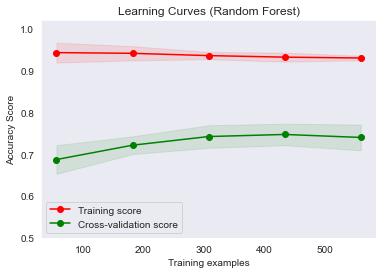

In [135]:
### Learning Curve

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Accuracy Score")
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    plt.grid()
    
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, 
                     alpha=0.1,color="r")
    
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, 
                     alpha=0.1, color="g")
    
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt


X, y = X_train, y_train


title = "Learning Curves (Random Forest)"
cv = ShuffleSplit(test_size=0.2, random_state=0)

estimator = rfc_classifier
plot_learning_curve(estimator, title, X, y, ylim=(0.5, 1.02), cv=cv, n_jobs=4)

plt.show()

# Prediction of Test

In [136]:
pred_proba = rfc_classifier.predict_proba(X_test)[:, 1]
pred_proba

array([0.65668504, 0.17500496, 0.17803439, 0.15284452, 0.69068599,
       0.32954689, 0.09202381, 0.08854167, 0.52373819, 0.06375992,
       0.14152778, 0.05811219, 0.03483631, 0.65200409, 0.67248356,
       0.40246845, 0.20329816, 0.29724625, 0.23018001, 0.09061355,
       0.9016529 , 0.4372282 , 0.09190206, 0.026875  , 0.8031008 ,
       0.17418994, 0.84102294, 0.144794  , 0.2173566 , 0.0551034 ,
       0.20427846, 0.09947466, 0.11039141, 0.42052853, 0.74576686,
       0.30701846, 0.77931511, 0.1434405 , 0.04147727, 0.22796356,
       0.10669147, 0.54874229, 0.86459616, 0.6374162 , 0.24114235,
       0.3188834 , 0.11025603, 0.01572917, 0.21244584, 0.04441964,
       0.16376849, 0.54671563, 0.19383025, 0.78406576, 0.46250215,
       0.19458153, 0.13375992, 0.58649861, 0.        , 0.0713483 ,
       0.66190096, 0.2862237 , 0.08533654, 0.61438613, 0.08641865,
       0.31710705, 0.03487103, 0.09265873, 0.06690024, 0.07065476,
       0.52789763, 0.01950893, 0.48549442, 0.11886676, 0.60007

# Feature Importance

In [137]:
X_test.columns

Index(['Age', 'Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account',
       'Credit amount', 'Duration', 'Purpose'],
      dtype='object')

In [138]:
feat_imp = pd.DataFrame({"Variable": X_test.columns, 
                         "Importance": rfc_classifier.feature_importances_}).sort_values(
    by = "Importance", ascending= False).reset_index(drop = True)
feat_imp

Variable  Importance
0     Credit amount    0.245658
1  Checking account    0.190060
2          Duration    0.157934
3               Age    0.156617
4           Purpose    0.067887
5   Saving accounts    0.065811
6               Job    0.058192
7           Housing    0.032308
8               Sex    0.025533

<AxesSubplot:ylabel='Variable'>

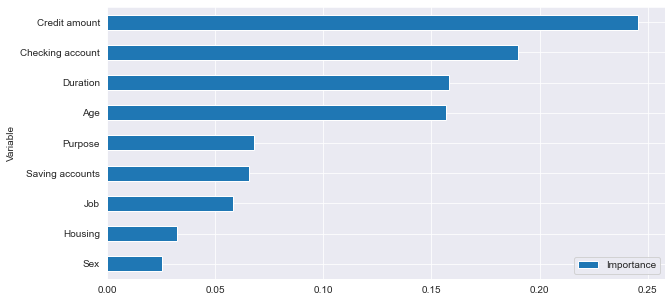

In [139]:
feat_imp.sort_values("Importance").plot("Variable", "Importance", "barh", figsize = (10, 5))

# Decision Making

### ROC curve

[0.         0.01041667 0.08333333 0.08333333 0.13541667 0.13541667
 0.15625    0.15625    0.21875    0.21875    0.23958333 0.23958333
 0.25       0.25       0.32291667 0.32291667 0.33333333 0.33333333
 0.35416667 0.35416667 0.375      0.375      0.38541667 0.38541667
 0.45833333 0.45833333 0.47916667 0.47916667 0.52083333 0.52083333
 0.54166667 0.54166667 0.5625     0.5625     0.58333333 0.58333333
 0.59375    0.59375    0.60416667 0.60416667 0.61458333 0.61458333
 0.64583333 0.64583333 0.65625    0.65625    0.66666667 0.66666667
 0.69791667 0.69791667 0.73958333 0.73958333 0.75       0.75
 0.77083333 0.77083333 0.78125    0.78125    0.79166667 0.79166667
 0.80208333 0.80208333 0.8125     0.8125     0.82291667 0.82291667
 0.84375    0.84375    0.85416667 0.85416667 0.86458333 0.86458333
 0.875      0.875      0.89583333 0.89583333 0.90625    0.90625
 0.91666667 0.91666667 0.92708333 0.92708333 0.9375     0.9375
 0.94791667 0.94791667 0.95833333 0.95833333 0.96875    0.96875
 0.97916667

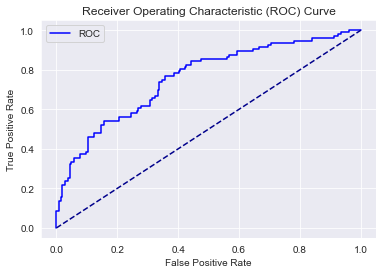

In [140]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='blue', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()


fpr, tpr, thresholds = roc_curve(y_test, pred_proba, )
print(tpr)
print(fpr)
print(thresholds)

print(f"ROC-AUC: {roc_auc_score(y_test, pred_proba):.3f}")

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print(f"Threshold value is: {optimal_threshold:.3f}")

plot_roc_curve(fpr, tpr)

#### Therefore;

In [141]:
df_accept = pd.DataFrame({"Actual Test": y_test, "Probability of default": pred_proba})
df_accept

Actual Test  Probability of default
545            1                0.656685
298            0                0.175005
109            0                0.178034
837            0                0.152845
194            1                0.690686
..           ...                     ...
847            0                0.099562
682            0                0.013393
884            1                0.473602
325            0                0.095192
482            0                0.398999

[300 rows x 2 columns]

In [142]:
df_accept['Prediction'] = np.where(df_accept['Probability of default'] > optimal_threshold, 1, 0)

In [143]:
df_accept

Actual Test  Probability of default  Prediction
545            1                0.656685           1
298            0                0.175005           0
109            0                0.178034           0
837            0                0.152845           0
194            1                0.690686           1
..           ...                     ...         ...
847            0                0.099562           0
682            0                0.013393           0
884            1                0.473602           1
325            0                0.095192           0
482            0                0.398999           1

[300 rows x 3 columns]

In [144]:
df_accept["accept or reject"] = np.where(df_accept["Prediction"] == 1, "reject", "accept")
df_accept = df_accept.reset_index(drop = True)
df_accept.head()

Actual Test  Probability of default  Prediction accept or reject
0            1                0.656685           1           reject
1            0                0.175005           0           accept
2            0                0.178034           0           accept
3            0                0.152845           0           accept
4            1                0.690686           1           reject

In [145]:
df_accept.tail()

Actual Test  Probability of default  Prediction accept or reject
295            0                0.099562           0           accept
296            0                0.013393           0           accept
297            1                0.473602           1           reject
298            0                0.095192           0           accept
299            0                0.398999           1           reject

In [146]:
pd.crosstab(df_accept['Actual Test'], df_accept['Prediction'], rownames = ['Actual'], colnames = ['Predicted'])

Predicted    0   1
Actual            
0          131  73
1           23  73

In [147]:
pd.crosstab(df_accept['Actual Test'], df_accept['Prediction'], rownames = ['Actual'], colnames = ['Predicted']) / df_accept.shape[0]

Predicted         0         1
Actual                       
0          0.436667  0.243333
1          0.076667  0.243333

In [148]:
actual = df_accept["Actual Test"]
thresh_pred = df_accept["Prediction"]

print(classification_report(actual, thresh_pred))
print(confusion_matrix(actual, thresh_pred))

              precision    recall  f1-score   support

           0       0.85      0.64      0.73       204
           1       0.50      0.76      0.60        96

    accuracy                           0.68       300
   macro avg       0.68      0.70      0.67       300
weighted avg       0.74      0.68      0.69       300

[[131  73]
 [ 23  73]]


# Setting Cutoffs

In [149]:
df_cutoffs = pd.concat([pd.DataFrame(thresholds), pd.DataFrame(fpr), pd.DataFrame(tpr)], axis = 1)

In [150]:
df_cutoffs.columns = ['thresholds', 'fpr', 'tpr']
df_cutoffs.head()

thresholds       fpr       tpr
0    1.901653  0.000000  0.000000
1    0.901653  0.000000  0.010417
2    0.787513  0.000000  0.083333
3    0.779315  0.009804  0.083333
4    0.737453  0.009804  0.135417

In [151]:
df_cutoffs['thresholds'][0] = 1 - 1 / np.power(10, 16)
# Let the first threshold (the value of the thresholds column with index 0) be equal to a number, very close to 1
# but smaller than 1, say 1 - 1 / 10 ^ 16.

In [152]:
df_cutoffs.head()

thresholds       fpr       tpr
0    1.000000  0.000000  0.000000
1    0.901653  0.000000  0.010417
2    0.787513  0.000000  0.083333
3    0.779315  0.009804  0.083333
4    0.737453  0.009804  0.135417

In [153]:
df_cutoffs.tail()

thresholds       fpr       tpr
92    0.026875  0.936275  0.989583
93    0.020069  0.960784  0.989583
94    0.019509  0.960784  1.000000
95    0.005000  0.980392  1.000000
96    0.000000  1.000000  1.000000

In [154]:
df_accept.head()

Actual Test  Probability of default  Prediction accept or reject
0            1                0.656685           1           reject
1            0                0.175005           0           accept
2            0                0.178034           0           accept
3            0                0.152845           0           accept
4            1                0.690686           1           reject

In [155]:
# We define a function called 'n_approved' which assigns a value of 1 if a predicted probability
# is greater than the parameter p, which is a threshold, and a value of 0, if it is not.
# Then it sums the column.
# Thus, if given any percentage values, the function will return
# the number of rows wih estimated probabilites less than the threshold. 
def n_approved(p):
    return np.where(df_accept['Probability of default'] <= p, 1, 0).sum()

In [156]:
df_cutoffs['N Approved'] = df_cutoffs['thresholds'].apply(n_approved)
df_cutoffs['N Rejected'] = X_test.shape[0] - df_cutoffs['N Approved']
df_cutoffs['Approval Rate'] = df_cutoffs['N Approved'] / df_accept['Probability of default'].shape[0]
df_cutoffs['Rejection Rate'] = 1 - df_cutoffs['Approval Rate']

In [157]:
df_cutoffs.iloc[40: , ]
# Here we display the dataframe with cutoffs form line with index 63 to line with index 69.

thresholds       fpr       tpr  N Approved  N Rejected  Approval Rate  \
40    0.348150  0.279412  0.614583         185         115       0.616667   
41    0.318883  0.308824  0.614583         179         121       0.596667   
42    0.307018  0.308824  0.645833         176         124       0.586667   
43    0.306264  0.313725  0.645833         175         125       0.583333   
44    0.303543  0.313725  0.656250         174         126       0.580000   
45    0.299353  0.323529  0.656250         172         128       0.573333   
46    0.298840  0.323529  0.666667         171         129       0.570000   
47    0.297246  0.333333  0.666667         169         131       0.563333   
48    0.285731  0.333333  0.697917         166         134       0.553333   
49    0.283115  0.338235  0.697917         165         135       0.550000   
50    0.264046  0.338235  0.739583         161         139       0.536667   
51    0.257468  0.348039  0.739583         159         141       0.530000   
52    0.253258  0.348039  0.750000         158         142       0.526667   
53    0.249226  0.357843  0.750000         156         144       0.520000   
54    0.241142  0.357843  0.770833         154         146       0.513333   
55    0.231707  0.387255  0.770833         148         152       0.493333   
56    0.230263  0.387255  0.781250         147         153       0.490000   
57    0.223557  0.401961  0.781250         144         156       0.480000   
58    0.219669  0.401961  0.791667         143         157       0.476667   
59    0.219650  0.406863  0.791667         142         158       0.473333   
60    0.219411  0.406863  0.802083         141         159       0.470000   
61    0.216490  0.421569  0.802083         138         162       0.460000   
62    0.215386  0.421569  0.812500         137         163       0.456667   
63    0.214389  0.426471  0.812500         136         164       0.453333   
64    0.212446  0.426471  0.822917         135         165       0.450000   
65    0.204278  0.441176  0.822917         132         168       0.440000   
66    0.203593  0.441176  0.843750         130         170       0.433333   
67    0.194582  0.475490  0.843750         123         177       0.410000   
68    0.193830  0.475490  0.854167         122         178       0.406667   
69    0.160054  0.558824  0.854167         105         195       0.350000   
70    0.159244  0.558824  0.864583         104         196       0.346667   
71    0.158145  0.568627  0.864583         102         198       0.340000   
72    0.156349  0.568627  0.875000         101         199       0.336667   
73    0.146004  0.593137  0.875000          96         204       0.320000   
74    0.144508  0.593137  0.895833          94         206       0.313333   
75    0.113934  0.647059  0.895833          83         217       0.276667   
76    0.113576  0.647059  0.906250          82         218       0.273333   
77    0.110256  0.666667  0.906250          78         222       0.260000   
78    0.109807  0.666667  0.916667          77         223       0.256667   
79    0.106691  0.696078  0.916667          71         229       0.236667   
80    0.105372  0.696078  0.927083          70         230       0.233333   
81    0.101434  0.705882  0.927083          68         232       0.226667   
82    0.100709  0.705882  0.937500          67         233       0.223333   
83    0.085486  0.779412  0.937500          52         248       0.173333   
84    0.085337  0.779412  0.947917          51         249       0.170000   
85    0.063760  0.838235  0.947917          39         261       0.130000   
86    0.062083  0.838235  0.958333          38         262       0.126667   
87    0.038636  0.911765  0.958333          23         277       0.076667   
88    0.036176  0.911765  0.968750          22         278       0.073333   
89    0.034285  0.926471  0.968750          19         281       0.063333   
90    0.028547  0.926471  0.979167          18         282       0.060000   


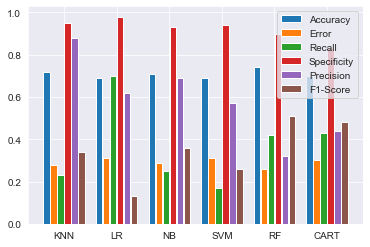

In [158]:
def bar_plot(ax, data, colors=None, total_width=0.8, single_width=1, legend=True):
    

    # Check if colors where provided, otherwhise use the default color cycle
    
    if colors is None:
        colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

    # Number of bars per group
    n_bars = len(data)

    # The width of a single bar
    bar_width = total_width / n_bars

    # List containing handles for the drawn bars, used for the legend
    bars = []

    # Iterate over all data
    for i, (name, values) in enumerate(data.items()):
        # The offset in x direction of that bar
        x_offset = (i - n_bars / 2) * bar_width + bar_width / 2

        # Draw a bar for every value of that type
        for x, y in enumerate(values):
            bar = ax.bar(x + x_offset, y, width=bar_width * single_width, color=colors[i % len(colors)])

        # Add a handle to the last drawn bar, which we'll need for the legend
        bars.append(bar[0])

    # Draw legend if we need
    if legend:
        ax.legend(bars, data.keys())


if __name__ == "__main__":
    # Usage example:
    data = {
        "Accuracy": [0.72, 0.69, 0.71, .69, .74, .70], 
        "Error" : [0.28, 0.31, 0.29, .31, .26, .30], 
        "Recall": [0.23, 0.7, 0.25, .17, .42, .43], 
        "Specificity": [0.95, 0.98, 0.93, .94, .90, .83],
        "Precision": [0.88, 0.62, 0.69, .57, .32, .44],
        "F1-Score": [.34, .13, 0.36, .26, .51, .48]
}

    fig, ax = plt.subplots()
    bar_plot(ax, data, total_width=.8, single_width=.9)
    
    X = ['KNN','LR','NB', "SVM", "RF", "CART"]
    X_axis = np.arange(len(X))
    plt.xticks(X_axis, X)
    plt.show()
